In [131]:
import pandas as pd
import numpy as np
import os
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt

%matplotlib inline

In [132]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [4]:
#A little experiment with data
example_file = "./genres/blues/blues.00000.wav"

In [5]:
signal, sample_rate = librosa.load(example_file)

In [6]:
print(signal)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


In [7]:
print(sample_rate)

22050


In [8]:
FIG_SIZE = (16,8)

Text(0.5,1,'Waveform')

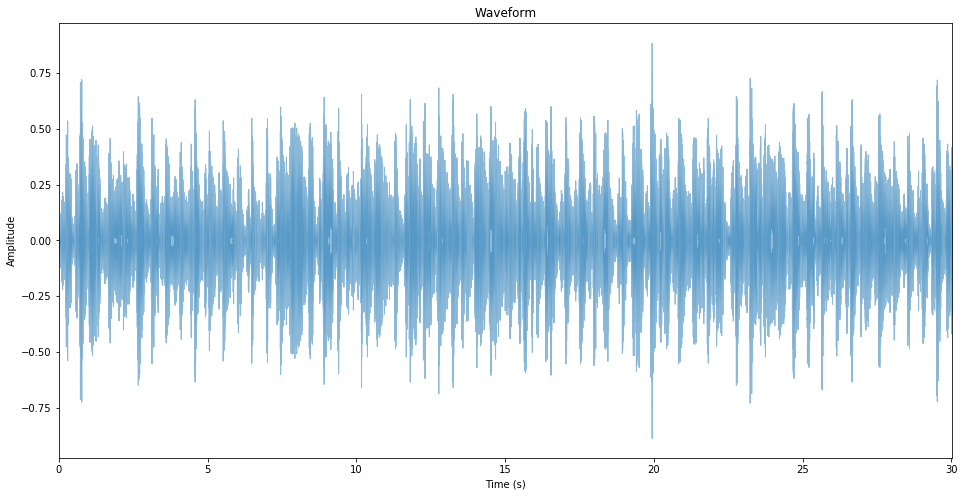

In [9]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [10]:
#Load data

In [11]:
metadata=pd.read_csv('./features_30_sec.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
#     print(audio)
#     print(sample_rate)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [100]:
audio_dataset_path='./genres'
from tqdm import tqdm
#Iterate through every audio file and extract features using Mel-Frequency Cepstral Coefficients (MFCC)
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    try:
        class_labels=row["label"]
        file_name = os.path.join(os.path.abspath(audio_dataset_path), class_labels+'/',str(row["filename"]))    
        data=features_extractor(file_name)
        extracted_features.append([data,class_labels])
        print([data,class_labels])
    except Exception as e:
        print(f"Error: {e}")
        continue

2it [00:00,  6.13it/s]

[array([-1.13570650e+02,  1.21571798e+02, -1.91681418e+01,  4.23664193e+01,
       -6.36466297e+00,  1.86234979e+01, -1.37048897e+01,  1.53431496e+01,
       -1.22741084e+01,  1.09765706e+01, -8.32657219e+00,  8.80379123e+00,
       -3.67229942e+00,  5.74799455e+00, -5.16288123e+00,  7.52738554e-01,
       -1.69021417e+00, -4.08980042e-01, -2.30352202e+00,  1.22128974e+00,
       -3.53434985e+00, -1.14143371e+00, -4.28303215e+00, -4.22619634e+00,
        9.15616877e-01,  9.12686637e-01, -5.76134693e+00, -3.93274384e+00,
        1.51082404e+00,  2.69888200e+00,  5.65747142e+00, -3.26623777e+00,
       -2.03034127e-01, -3.00029329e+00,  4.47723265e+00, -4.75905404e-01,
        6.00923840e+00, -5.88920747e-02, -3.45850755e+00, -1.84239084e+00]), 'blues']
[array([-2.07501685e+02,  1.23991259e+02,  8.95512838e+00,  3.58776468e+01,
        2.90732072e+00,  2.15104671e+01, -8.56043653e+00,  2.33706858e+01,
       -1.00996605e+01,  1.19004968e+01, -5.55563811e+00,  5.37632652e+00,
       -2.23

4it [00:00,  7.13it/s]

[array([-90.72259499, 140.44630574, -29.09389022,  31.68433633,
       -13.98450337,  25.76474346, -13.66487505,  11.63993308,
       -11.78364223,   9.71876045, -13.13380333,   5.79119893,
        -8.90762802,  -1.07700018,  -9.22927373,   2.45168866,
        -7.72909345,  -1.8164078 ,  -3.43972047,  -2.23125884,
        -4.05098072,  -0.57224914,  -2.01849584,  -5.38767611,
        -5.1373223 ,  -7.807413  ,  -1.17329299,  -0.21124015,
         1.39163942,  -3.00248989,  -1.37016067,  -4.74136463,
        -0.37558325,   0.48872432,   0.44240194,  -4.16279005,
        -4.81522602,  -6.70301304,  -4.42440888,  -0.98426654]), 'blues']
[array([-1.99544200e+02,  1.50090908e+02,  5.66267930e+00,  2.68590793e+01,
        1.77140020e+00,  1.42340296e+01, -4.83200589e+00,  9.28649475e+00,
       -7.59185868e-01,  8.13760579e+00, -3.20065242e+00,  6.07931874e+00,
       -2.48017333e+00, -1.07930493e+00, -2.87078827e+00,  7.80872671e-01,
       -3.31959658e+00,  6.36964473e-01, -6.19121030e-01,

6it [00:00,  7.15it/s]

[array([-160.33771108,  126.21963121,  -35.58780915,   22.14807083,
        -32.47860168,   10.85229293,  -23.35233001,    0.49843236,
        -11.79343581,    1.20725418,  -13.08841664,   -2.81386818,
         -6.93338436,   -7.55272615,   -9.16466526,   -4.52057657,
         -5.45403392,   -0.91687452,   -4.40482646,  -11.70323443,
         -5.86422124,   -0.72173005,    0.95665876,   -1.22039539,
          4.5827342 ,    0.30441276,   -1.2786336 ,   -4.48778547,
         -0.41357777,    0.28119848,    8.48492284,    3.64918955,
         -3.00815577,   -6.11342094,   -6.95407558,   -4.06775545,
         -1.13525769,   -0.49206327,   -4.78780374,   -3.22056232]), 'blues']
[array([-177.7742347 ,  118.20548523,  -17.5658787 ,   30.76239999,
        -21.74783904,   11.92099345,  -20.73099398,    3.18657755,
         -8.58603861,   -0.9328524 ,  -11.77243406,   -2.40583281,
         -9.34366475,   -9.93621042,   -3.90399473,   -5.57659056,
         -1.83826304,   -2.78380019,   -3.0479091

8it [00:01,  7.25it/s]

[array([-1.90052373e+02,  1.30289083e+02, -3.63695351e+01,  3.30290337e+01,
        1.11087825e+01, -6.05583466e-01, -2.08718566e+01,  2.73024842e-01,
       -6.48613952e+00, -5.51676724e+00, -7.83975116e+00, -3.12859201e+00,
       -6.59619727e+00, -9.95037890e+00, -6.53517692e+00, -1.00680532e+01,
       -1.09131756e+01, -6.97133707e+00, -3.43650466e+00, -6.48346609e+00,
       -7.10479700e+00, -7.12873681e+00, -5.27547478e+00, -4.59335117e+00,
       -3.24952689e+00, -2.90475764e+00,  1.42719060e+00,  2.92528413e+00,
        2.11899854e+00, -1.48245355e+00, -6.30529074e-01,  2.96685096e+00,
        2.61023519e+00,  1.79435815e+00, -1.98480777e+00, -5.16494510e+00,
       -2.37215457e+00,  1.40128034e-01,  3.70501693e+00,  5.26303911e+00]), 'blues']
[array([-1.79347149e+02,  1.36469013e+02, -2.66731346e+01,  3.99842445e+01,
        5.30441854e+00,  1.09286103e+01, -2.05648272e+01,  8.51115570e+00,
       -1.13572491e+01, -3.46834702e+00, -8.41993697e+00, -6.94971590e+00,
       -3.53

10it [00:01,  6.26it/s]

[array([-121.36393978,  122.50668278,  -14.73819649,   46.13106758,
         -8.18187974,   20.18296351,  -19.17337899,   23.03913981,
        -11.83822438,   21.15999923,   -6.71836617,    6.9925423 ,
        -12.73059788,    5.06132537,   -5.18321475,   -1.45256002,
         -7.04182517,    2.69524786,    3.41230547,   -2.71569238,
         -4.27266745,   -0.62447617,   -4.29011476,  -13.37291454,
         -8.26903471,   -2.0996678 ,   10.5548646 ,    2.92435328,
         -1.03698841,   -0.75597486,   -0.50472925,   -1.40739363,
         -1.8838403 ,   -1.81446799,    2.36448599,   -4.30311169,
         -3.88333508,   -5.09316273,    0.51109332,    1.18746165]), 'blues']
[array([-2.13240002e+02,  1.15165597e+02, -1.16934292e+01,  3.90142736e+01,
       -2.03412778e+01,  1.30776045e+01, -9.17351768e+00,  9.01144551e+00,
       -1.41006318e+01,  4.26594007e+00, -6.04616578e+00,  3.78220542e+00,
        2.21800354e-01, -5.10940041e+00, -4.10229549e-01, -1.17992199e+00,
       -1.9168040

12it [00:01,  6.00it/s]

[array([-1.73792495e+02,  1.37186694e+02, -2.37240476e+01,  2.69784314e+01,
       -1.66576946e+01,  4.18088133e+00, -1.25599294e+01,  5.83218340e+00,
       -2.87431831e+00, -1.19741948e+00, -1.95483460e+00,  1.80150037e+00,
       -2.98964735e+00, -1.86665632e+00, -7.92742657e-01, -3.01596775e+00,
       -4.40053702e-01, -1.99455212e+00, -7.48470056e-01, -4.99131367e+00,
       -1.81365950e+00,  8.19290300e-01,  2.50370257e+00, -1.64438942e+00,
       -3.33937033e+00, -1.41411919e-01,  4.48947835e+00,  8.85525586e+00,
        9.32391037e+00,  1.29145112e+00, -1.81514488e+00, -6.47916000e+00,
       -3.87829504e+00,  1.80429045e+00, -3.19731088e+00, -5.84770711e+00,
       -6.71684170e+00, -1.43771475e+00,  3.27799668e+00,  1.22845722e+00]), 'blues']
[array([-287.92374868,  124.01875684,    5.46989494,   33.65740708,
          1.09549941,   14.70533381,   -4.87700771,    8.67052383,
          0.78540594,    6.57952577,   -4.87497294,   -3.17822404,
         -5.53615787,   -6.78443582,

14it [00:02,  6.69it/s]

[array([-2.07223329e+02,  1.32830564e+02, -1.54288442e+01,  6.09709332e+01,
        7.29871480e-01,  1.24376491e+01,  1.18279876e+00, -1.54662229e+00,
       -1.78794367e+01,  8.35272997e+00, -2.45816164e+00, -6.03384446e-01,
        3.85960438e-01,  2.59954711e+00, -5.17926667e+00, -9.52348045e+00,
       -9.24283651e+00, -2.85502814e+00, -1.42716180e+00, -5.93197863e+00,
        7.76808071e+00,  4.09435278e+00,  4.06212314e+00,  3.65477964e+00,
        6.00881635e+00,  4.26996588e-01,  2.04441399e+00,  1.42176778e+00,
        6.49934253e+00,  9.65503477e+00,  6.68256986e+00,  1.88668856e-01,
       -2.35578085e+00, -1.06479025e+00, -2.56694251e-01,  4.12803299e+00,
        7.89323257e-01,  5.34309553e-01,  9.43141027e-01,  3.30255221e+00]), 'blues']
[array([-2.09826150e+02,  1.24463215e+02,  1.03424563e+01,  4.70109088e+01,
        6.50812687e+00,  1.54105162e+01, -2.00510641e+00,  6.70656440e+00,
       -2.15576317e+01,  1.07184056e+01, -5.52368698e+00, -2.19980624e+00,
       -3.03

16it [00:02,  7.32it/s]

[array([-3.05654723e+02,  1.13086334e+02,  1.21144295e+01,  4.50337062e+01,
        1.77628261e+01,  1.45733284e+01,  4.15943119e+00,  2.13543885e-01,
       -7.02699428e+00,  1.36419907e+01,  8.92917553e+00,  1.30300568e+00,
        5.96125163e+00,  8.54922292e+00,  1.12460628e+00,  6.02692649e-01,
        5.48628633e-02, -3.72226559e+00, -9.94969775e-01, -1.80028895e+00,
        4.96054140e+00,  4.34174883e+00,  3.41411059e+00,  1.27260280e+00,
        2.86784917e+00,  2.22447372e+00,  3.46290844e+00,  6.02333346e+00,
        7.75913180e+00,  9.79724179e+00,  8.95578651e+00,  3.79692781e+00,
       -1.92964731e+00, -6.86303205e-01,  1.94870434e+00,  2.84555694e+00,
       -5.64121906e-02, -7.90055988e-01, -2.32306116e+00,  1.62401820e+00]), 'blues']
[array([-2.38515553e+02,  1.20110177e+02, -4.22935952e+00,  4.22907012e+01,
        5.92856297e+00,  1.39172688e+01,  5.35786719e+00,  1.89555793e+00,
       -1.69366780e+01,  1.23506219e+01,  3.94597951e+00, -1.39358438e+00,
        1.92

18it [00:02,  7.02it/s]

[array([-2.33759102e+02,  1.20675137e+02, -3.17480582e+00,  3.95184804e+01,
        3.81833701e+00,  1.88371423e+01, -3.67781770e+00,  4.43313833e+00,
       -1.49655254e+01,  1.75782152e+01,  1.84187208e+00,  2.54942171e+00,
       -1.23316771e+00,  8.43948593e+00, -2.01897812e-01, -3.89450242e+00,
       -4.45685032e+00,  9.55347081e-03,  1.29303100e+00, -2.09808196e+00,
        6.79461649e+00,  5.87093653e-01,  1.64099197e+00, -7.32613999e-01,
        3.07213756e+00, -1.99719477e+00,  3.64176917e+00,  3.61631734e+00,
        3.62643394e+00,  6.72787674e-01,  5.39095606e+00,  8.28609382e+00,
        8.56836616e+00,  5.55124654e+00,  6.49545368e-01, -2.01327665e+00,
       -7.92553177e-01,  3.99590365e+00,  4.96774111e-01, -8.97820995e-01]), 'blues']
[array([-2.45699369e+02,  1.40491090e+02, -2.78975482e+00,  6.04314342e+01,
        1.89190514e+01,  9.82961013e+00,  3.55914546e+00,  5.15372230e-01,
       -1.63876831e+01,  6.62750959e+00,  7.25921420e+00, -4.01442710e+00,
        1.60

20it [00:02,  6.69it/s]

[array([-2.52493016e+02,  1.04937109e+02,  1.53323124e+01,  4.26669714e+01,
        6.78305854e+00,  2.16056837e+01, -1.29784129e+00,  5.67540776e+00,
       -1.66326351e+01,  1.21731023e+01, -1.94728486e+00,  1.95084429e+00,
       -8.90319163e-01,  7.77052499e+00,  2.38024315e+00,  1.77540519e+00,
        1.32536186e+00,  3.60951120e+00,  4.90769079e+00, -2.65545992e+00,
        4.10127877e+00,  2.21031750e+00,  2.54804440e+00, -1.62808514e+00,
        2.87513326e+00, -3.06124270e+00,  2.42488168e-01,  5.60984840e-01,
        4.80599464e+00,  3.66062231e+00,  3.54143814e+00,  7.43312063e-01,
        1.60832656e+00,  3.34718600e+00,  2.38919688e+00,  3.22229450e+00,
        6.18030999e-02, -1.42651209e+00, -5.64090247e-01,  2.46486238e+00]), 'blues']
[array([-2.36656766e+02,  1.38409257e+02, -4.91291065e+00,  4.76291772e+01,
        5.18420087e+00,  8.87661566e+00,  5.13814632e-01, -3.80467354e+00,
       -1.49888702e+01,  1.04170685e+01, -3.33637850e-01,  7.75984738e-01,
        1.77

22it [00:03,  7.45it/s]

[array([-2.30357656e+02,  1.27078335e+02,  7.12344662e+00,  3.97749007e+01,
        1.92104931e+00,  1.74117813e+01, -5.61941530e+00,  8.24939392e+00,
       -1.81168898e+01,  1.38350652e+01, -3.76993197e+00,  2.57201878e+00,
       -4.31834619e+00,  6.80637635e+00, -6.16710195e+00, -6.19875043e+00,
       -4.50018400e+00, -1.82233885e+00, -5.17100141e-01,  1.50991722e+00,
        9.00003977e+00,  4.42250590e+00,  6.21468535e+00, -1.63312167e+00,
       -3.97355286e-01, -3.00775395e+00,  1.58511789e+00,  1.67088433e-01,
        4.99184687e+00,  5.61921432e-01,  1.46599556e+00,  3.08751922e+00,
        6.68353582e+00,  6.48517386e+00,  4.51970371e+00, -7.88883376e-01,
       -2.27283505e+00, -4.21539357e-01, -2.61238158e+00, -8.55010404e-01]), 'blues']
[array([-2.64722578e+02,  1.38868445e+02,  1.11940626e+01,  4.85042605e+01,
        1.49307563e+01,  2.05802857e+01,  3.20700856e+00,  1.24895614e+00,
       -1.58464569e+01,  1.59784605e+01,  3.36913278e+00, -1.51080653e+00,
        1.90

24it [00:03,  7.13it/s]

[array([-2.33956246e+02,  1.36145711e+02,  3.32441254e+00,  4.89285309e+01,
        8.71544453e+00,  1.39660209e+01,  5.36659822e+00,  3.99538634e-01,
       -1.34698524e+01,  1.68777173e+01,  5.14809190e+00, -2.24982160e+00,
        3.94790797e+00,  5.31648801e+00,  8.10559027e-01, -1.10708189e+00,
       -4.55648032e+00, -2.43078470e+00,  3.32483543e+00, -6.02447185e-01,
        7.07952675e+00,  3.05558739e+00,  5.74800273e-01,  6.07724799e-01,
        2.78841166e+00, -1.44078569e+00,  2.04477981e+00,  5.60021414e+00,
        2.92875613e+00,  2.10995085e+00,  2.53115199e+00, -4.50246377e-01,
       -2.23353418e+00,  1.13526153e-01, -4.65099177e-01, -1.39630974e-01,
       -2.99514643e-01,  5.05058612e+00,  5.31808790e+00,  1.64338309e+00]), 'blues']
[array([-2.27225334e+02,  1.37788075e+02, -1.44995668e+01,  6.35609283e+01,
        5.61766951e+00,  1.19581479e+01,  1.90796946e+00, -1.88938770e+00,
       -7.60421548e+00, -2.47328906e+00, -2.89100946e+00, -9.43339311e+00,
       -1.09

26it [00:03,  7.34it/s]

[array([-2.74365835e+02,  1.30411260e+02, -6.35128534e+00,  7.04029924e+01,
        1.32697296e+01,  9.47377462e+00,  7.73533079e+00, -1.23496683e+00,
       -5.72389418e-01, -2.30335499e+00,  3.77351628e+00,  7.56122642e-02,
       -9.38971611e-01,  2.29622569e+00,  4.29411735e+00, -1.66121504e+00,
       -1.04394250e+01, -6.79310370e+00, -1.06577792e+00, -1.58388700e+00,
       -1.17548834e+00, -1.26530888e+00,  2.48722838e+00,  3.05154747e+00,
        1.34643187e+00,  1.88680260e+00, -6.07645058e-01, -1.58645146e+00,
        5.50718132e+00,  8.93865868e+00,  7.52621019e+00,  5.85081083e+00,
        2.16407390e+00, -3.35215624e+00, -7.33001758e+00, -4.63797767e+00,
       -1.12173767e+00, -9.44868575e-01, -4.85678012e+00, -5.74108130e+00]), 'blues']
[array([-2.49284558e+02,  1.31004697e+02,  6.71433626e-01,  6.67039451e+01,
        1.79148016e+01,  4.62168789e+00,  6.61310411e+00,  1.24252245e+00,
        1.41256665e+00, -1.58980773e+00, -9.81921728e-01, -3.57579077e+00,
       -2.92

28it [00:04,  7.39it/s]

[array([-2.84848383e+02,  1.08749554e+02,  9.12968160e+00,  5.12513158e+01,
        1.81237148e+01,  7.63277846e+00,  8.77537441e+00,  2.36538187e+00,
        1.92611712e-02,  2.23692731e+00,  4.19062935e+00, -3.30458125e+00,
        1.61404845e+00,  2.69186459e+00,  3.37612818e+00,  3.29278587e+00,
       -4.52448325e+00,  4.96720059e-01,  5.92197559e+00,  3.21453976e+00,
        1.88083608e+00,  1.37064350e+00,  2.42600361e+00,  6.56588813e-01,
       -1.79989780e+00, -1.41719401e+00, -1.32262901e+00, -1.86845309e+00,
       -2.53446833e+00, -2.26059431e+00, -1.19403165e+00,  4.65454007e-01,
        1.59310875e-01, -3.29513681e+00, -4.22694237e+00, -2.24669325e+00,
        1.07563871e+00,  1.67306598e-01, -4.92014151e+00, -2.50451178e+00]), 'blues']
[array([-2.28167085e+02,  1.30339664e+02, -2.33107076e+01,  7.02002189e+01,
        1.12932788e+00,  7.58911280e+00,  9.03396972e-01,  1.99444282e+00,
       -6.15884336e+00, -9.38071870e+00, -2.56357419e+00, -4.52184763e+00,
       -2.69

30it [00:04,  7.65it/s]

[array([-2.48962250e+02,  1.39031768e+02, -1.62400237e+01,  5.71161930e+01,
        2.01923618e+01,  1.01603726e+01,  4.57607643e+00,  3.37923717e-01,
       -7.86282473e+00, -3.47024646e+00, -2.64882466e+00, -2.84267072e+00,
       -8.94774777e-01, -2.41337949e+00,  2.57059748e+00, -5.87100136e+00,
       -1.24128879e+01, -7.30200195e+00, -9.23585459e-01, -2.69857942e+00,
       -3.02107420e+00, -2.41844466e+00, -8.12897901e-01,  1.19303343e+00,
        7.30305675e-01, -5.72438339e-01, -3.16899508e+00, -2.40150423e+00,
        2.09532624e+00,  4.77186878e+00,  7.22831615e+00,  5.94072064e+00,
        5.51980681e-01, -4.49209171e+00, -6.73905724e+00, -3.31386115e+00,
       -2.16915425e-01, -7.71034500e-01, -4.73855555e+00, -4.43065497e+00]), 'blues']
[array([-233.71511418,  101.19901742,   17.65090176,   23.74063453,
          2.07988674,   25.93890159,  -16.96904141,   15.0795685 ,
        -22.27737791,    4.38538486,  -23.19757957,   -6.03664692,
         -5.05709774,    1.06903707,

32it [00:04,  7.71it/s]

[array([-206.93811222,  117.79183775,   23.26499249,   28.30004707,
         -1.10228396,   18.86718552,  -21.97161293,   17.84802562,
        -25.59023897,    2.13510511,  -17.77729781,   -8.01059169,
        -17.62014298,   -8.12007451,   -8.62888576,  -15.54049566,
        -15.33203981,   -9.65650994,  -10.08976847,  -17.82687889,
         -6.52171845,   -6.56325024,  -12.74662611,  -12.19625756,
         -9.00693404,  -12.41042827,   -5.77583092,  -11.53270941,
         -6.60025798,   -7.0867012 ,  -11.97115895,  -12.42084279,
        -10.96839254,  -10.98748226,   -8.69429167,   -3.16363122,
         -3.48137422,   -4.73416958,   -0.53882138,    1.46606245]), 'blues']
[array([-221.84347873,  110.85242893,   18.63754895,   30.92843167,
          3.29622739,   22.58995958,  -20.40655713,   12.12297061,
        -26.33045845,   -4.35413022,  -26.38385444,  -13.03219595,
        -12.65503825,   -1.8158427 ,   -7.25900188,   -6.66098598,
        -14.68809344,  -11.71344876,  -11.0246532

34it [00:04,  6.60it/s]

[array([-288.71511033,  105.92634858,   18.81994865,   23.6744617 ,
          5.70016788,   25.55908664,  -13.45049498,   12.42951314,
        -11.96118688,    1.58950825,  -15.62306893,   -6.63875537,
        -11.68578801,   -2.93576543,   -7.37842645,  -15.69384586,
        -10.95729349,  -10.87977918,  -18.50195412,  -19.1178431 ,
         -8.73958123,  -10.32938992,  -15.00054727,  -17.33478648,
        -11.27724554,   -6.72722615,   -3.68839048,   -5.66341629,
         -4.60598612,   -8.28845776,   -6.59977279,   -9.46399317,
         -9.74577313,  -10.61671056,   -8.31283334,   -3.05893799,
          0.80336566,   -1.67597949,   -3.36867162,   -3.97711169]), 'blues']
[array([-238.95119788,  108.70542676,   34.14584859,   30.21114853,
         -0.50258265,   27.29295802,  -21.39948406,   14.17186445,
        -24.5123123 ,   -1.88426516,  -28.05749974,  -11.25574681,
        -16.46436289,   -7.64069339,  -12.78487342,  -15.35247004,
        -13.74590102,   -7.40848592,  -10.0783160

36it [00:05,  7.01it/s]

[array([-217.15491111,  105.78445989,   15.60651011,   25.25981971,
         -1.44576474,   30.19950944,  -17.71738548,   17.3187986 ,
        -27.21879685,    4.33665818,  -20.06199631,  -10.70078594,
        -14.23264166,   -5.15659177,   -3.4814634 ,   -6.18935288,
        -15.32209567,   -6.83231393,   -9.82518763,  -13.94066478,
        -13.69050021,  -15.13021942,  -11.58687806,  -13.27266117,
         -4.78434671,   -6.9637391 ,   -5.56671663,  -13.96129379,
        -11.70401441,   -6.39727815,   -5.99557846,   -5.19987164,
         -3.74625152,   -6.61716295,   -2.29239112,   -3.02500763,
         -6.71224228,   -3.80389763,   -0.4946419 ,   -4.58611755]), 'blues']
[array([-1.71773274e+02,  1.20293583e+02,  1.53404312e+01,  2.11075957e+01,
       -5.38500893e+00,  2.41953647e+01, -2.41375481e+01,  1.85447533e+01,
       -2.23485020e+01,  1.31949600e+00, -2.07632264e+01, -4.98188787e+00,
       -1.71080890e+01, -7.87930513e+00, -1.53001681e+01, -9.34368076e+00,
       -8.9115923

38it [00:05,  7.61it/s]

[array([-2.00199292e+02,  1.16363088e+02,  1.80473704e+01,  2.52635739e+01,
        3.10053809e-01,  2.41772531e+01, -2.22235152e+01,  1.11835348e+01,
       -2.68462664e+01, -7.63737945e+00, -2.48560960e+01, -1.20122672e+01,
       -1.70159767e+01, -8.11307024e+00, -1.19537683e+01, -1.26218134e+01,
       -1.41932028e+01, -8.20775918e+00, -1.50150074e+01, -1.03068489e+01,
       -1.04074606e+01, -1.28484275e+01, -1.18259955e+01, -1.75944613e+01,
       -9.03292696e+00, -8.07093510e+00, -2.97961428e-01, -6.72805353e+00,
       -3.24916833e+00, -4.52052861e+00, -3.51435179e+00, -7.06671428e+00,
       -2.24790218e+00, -8.15232168e+00, -1.13226292e+01, -6.84679358e+00,
       -6.48235436e+00, -1.59836748e-01,  6.32257935e+00,  2.98081809e+00]), 'blues']
[array([-3.28560709e+02,  1.02728512e+02,  1.98365841e+01,  2.67060095e+01,
        7.14540988e+00,  2.27279846e+01, -6.95172684e+00,  1.28169831e+01,
       -1.07279132e+01, -4.24694189e-01, -1.23787956e+01, -8.89833700e+00,
       -9.20

40it [00:05,  7.84it/s]

[array([-192.65747016,  111.15710925,   21.36100685,   26.39940566,
         -0.64434746,   23.49151407,  -25.46989602,   16.92310372,
        -16.9756497 ,    5.77564312,  -25.73842161,   -5.051984  ,
        -17.62748924,   -7.91677537,  -15.15512148,  -12.3561393 ,
        -17.23472845,   -7.77867829,  -13.03093665,  -17.93117018,
         -8.5039871 ,   -4.93812821,  -11.49755228,  -10.16595917,
         -8.14457182,  -17.35137363,   -5.12095407,   -9.5732723 ,
          1.01168182,    5.3726168 ,    3.40246033,   -2.86718762,
         -3.40953017,   -6.1914589 ,   -3.80677926,   -4.61240741,
         -5.02890824,   -6.75632552,   -6.64321799,  -10.26066194]), 'blues']
[array([-3.01730502e+02,  1.11542876e+02,  2.19002287e+01,  1.61511215e+01,
        8.20067267e+00,  2.20843735e+01, -8.59767360e+00,  1.48877550e+00,
       -1.70714026e+01, -8.33458423e+00, -1.70083586e+01, -1.05737701e+01,
       -1.56795759e+01, -1.25944893e+01, -1.22565696e+01, -1.45603171e+01,
       -1.0100236

42it [00:05,  8.06it/s]

[array([-110.24798638,   90.7029327 ,   -2.52575571,   74.05794127,
        -11.75332137,   39.20773618,  -13.16056311,   20.5420935 ,
        -17.15308869,   12.81263293,  -21.4300727 ,    5.95200346,
         -8.02332406,    4.23233182,  -16.48160746,    6.54470882,
         -5.69204619,   -3.64334966,   -4.85275357,    1.85322587,
         -5.48540576,   -4.68459013,   -0.96971834,    1.83328937,
          2.89461656,    0.60376018,   -2.70854934,   -3.00141153,
         -2.95574979,   -4.85118636,   -0.77668926,   -2.27106455,
          0.89739601,    1.67670046,    0.50881963,   -1.88894854,
          3.00577221,   -2.16869031,   -2.84875097,   -5.23484007]), 'blues']
[array([-107.1702651 ,   88.48818681,   -4.16941291,   55.47771483,
         -8.01387232,   38.41516231,   -6.41002593,   28.57266726,
        -19.82160801,   13.23808925,  -19.2530995 ,   12.07236157,
         -4.57839445,    3.78651914,  -16.98638451,   11.62065195,
         -7.3597098 ,   -3.66606092,   -7.1765767

44it [00:06,  8.09it/s]

[array([-1.59551655e+02,  6.97976259e+01, -4.39899149e+00,  7.68465847e+01,
        3.91882695e+00,  4.51731741e+01, -4.85500593e+00,  3.22048253e+01,
       -9.79601485e+00,  7.81265187e+00, -2.18211055e+01,  9.69098761e+00,
       -2.58771310e+00,  3.30557962e+00, -1.49688787e+01,  1.02354814e+01,
       -4.07841318e+00, -5.85013779e+00, -2.47792644e+00,  6.64669887e+00,
        3.70026934e+00, -1.02549098e+01, -6.68452657e+00, -5.44871208e+00,
       -2.36505125e+00, -1.80831644e+00, -1.60335609e+00, -1.65940797e+00,
       -6.11968853e+00, -4.08770432e+00,  3.00086733e+00, -7.92369686e+00,
       -6.08403312e+00, -2.70544054e+00, -2.32813640e+00, -5.57629924e+00,
        4.69968108e+00, -7.94497596e-02, -3.12139301e+00, -1.30471814e+00]), 'blues']
[array([-1.09105990e+02,  1.00608773e+02, -8.65653407e+00,  4.73504142e+01,
       -6.55829767e+00,  3.96076377e+01, -8.51561976e+00,  2.95655455e+01,
       -1.65855363e+01,  1.31639073e+01, -2.42092520e+01,  6.57656246e+00,
       -8.64

46it [00:06,  7.63it/s]

[array([-1.09512599e+02,  8.69213653e+01, -8.59418986e+00,  6.44895289e+01,
       -6.30150761e+00,  4.36434883e+01, -8.29083242e+00,  2.85457841e+01,
       -1.40826748e+01,  8.12862978e+00, -2.14880842e+01,  1.10883375e+01,
       -5.09168454e+00,  3.97649694e+00, -1.28612123e+01,  1.23367554e+01,
        2.05177145e-02, -7.43095136e-01, -5.13095866e+00,  3.29793710e+00,
       -5.46209725e-01, -6.32583770e+00, -2.90484327e+00, -7.84005652e-01,
       -3.94227868e+00, -3.08545588e+00, -6.94398844e+00, -4.21109462e+00,
       -5.24161333e+00, -6.55919743e-01,  3.24860720e+00, -4.43998476e+00,
       -2.23628678e+00,  3.20310352e-01, -1.21349451e+00, -5.23130004e+00,
        3.19373347e+00, -1.58399705e+00, -3.56240886e+00, -5.25725914e+00]), 'blues']
[array([-1.63216766e+02,  8.97788442e+01,  1.29762528e+01,  8.07023023e+01,
        3.66538061e+00,  3.97387409e+01, -5.40673384e+00,  2.64937313e+01,
       -1.31699271e+01,  2.70487687e+00, -2.05501348e+01,  6.01482153e+00,
       -2.90

48it [00:06,  7.92it/s]

[array([-1.82573780e+02,  9.06675595e+01,  1.41245456e+01,  6.75492268e+01,
        2.67869941e+00,  3.84298263e+01, -8.41071460e+00,  2.41295514e+01,
       -1.37899513e+01,  4.83308958e+00, -1.66852286e+01,  5.81760142e+00,
       -5.14669660e+00,  1.94267112e-01, -1.44855015e+01,  6.86408972e+00,
       -4.43979788e+00, -2.98644184e+00, -4.81449282e+00,  5.40597426e+00,
       -1.15245848e+00, -4.64947799e+00, -4.40433601e+00, -1.55627376e+00,
       -9.64684218e-02, -7.15911575e-01, -3.40219108e+00, -3.99889557e+00,
       -4.20361529e+00, -5.09203903e+00,  3.08509000e+00, -2.90027183e+00,
       -2.26250409e+00,  2.48789642e-01, -3.17336986e-01, -1.28407637e+00,
        2.52048678e+00, -5.20208577e-01, -1.78372943e+00, -2.68872960e+00]), 'blues']
[array([-1.49940285e+02,  9.36508826e+01,  6.35506904e+00,  7.15034724e+01,
       -8.12153262e+00,  3.61911651e+01, -9.77533769e+00,  1.76478426e+01,
       -2.11075221e+01, -1.39680744e-01, -2.22019098e+01,  5.42194814e+00,
       -7.45

50it [00:06,  8.14it/s]

[array([-106.35535973,  102.65630816,  -20.14608899,   59.34887916,
         -9.94838305,   33.68739153,  -14.17132307,   23.52147354,
        -13.3135627 ,   15.99045696,  -18.92352982,    7.81308643,
         -7.78544632,    4.03803102,  -11.34364792,    2.06020643,
         -5.73126982,    0.47028306,   -1.90381147,   -3.13163108,
         -7.87394217,   -2.83276049,    3.5167646 ,    0.89329232,
          1.44875952,   -3.43085555,   -8.36860409,   -4.696055  ,
          0.61691925,   -0.92877133,   -1.68298191,   -4.9086579 ,
         -1.72839244,   -4.25461224,    0.99890918,   -2.13167156,
          2.11676165,   -2.33882379,   -1.89433492,   -5.88246189]), 'blues']
[array([-2.56016678e+02,  1.10855848e+02,  2.15257894e+01,  6.75418981e+01,
        4.30601265e+00,  4.30866269e+01, -4.49488596e+00,  1.04163623e+01,
       -8.69455173e+00,  1.65741837e+00, -2.05870490e+01, -2.45185726e+00,
       -7.11945881e+00, -1.11653341e+01, -1.26111290e+01,  2.72651524e+00,
       -8.9515047

52it [00:07,  7.90it/s]

[array([-8.29997185e+01,  1.07085803e+02, -2.53354403e+01,  5.71045123e+01,
        8.55028236e-02,  3.46825855e+01, -1.10551244e+01,  2.05431679e+01,
       -1.11944803e+01,  1.48196071e+01, -1.02333366e+01,  1.25460200e+01,
       -9.75373459e+00,  2.56436965e+00, -6.28951264e+00,  2.99533239e+00,
       -8.71519298e+00, -3.31206140e-01, -2.98263297e+00,  7.02881644e-01,
       -7.32863368e-01,  6.89009318e+00,  2.31964152e+00, -1.49367999e+00,
       -1.03853200e+00, -3.98953101e+00,  2.05320969e+00,  8.89227861e-01,
       -3.29695905e-01, -1.87145356e+00,  2.13782419e-01, -3.16532251e+00,
       -1.38988000e+00, -2.57516900e+00,  2.76127254e+00, -9.43726318e-01,
       -2.97256985e-01, -6.69119983e+00, -1.92307444e+00, -4.33456155e-01]), 'blues']
[array([-55.6075448 , 114.93161785, -37.03194571,  64.88949989,
        -7.14171507,  15.23794075, -16.23267586,  18.63157383,
        -9.75226769,  21.45428245,  -5.64891028,  12.78808429,
       -16.53047678,   3.7929177 ,  -7.90090122,

54it [00:07,  8.14it/s]

[array([-2.25230121e+02,  1.17626888e+02, -1.45393730e+01,  6.47960378e+01,
        1.29086620e+01,  1.90374217e+01,  1.06661702e+01,  9.88666195e+00,
       -2.39664302e+00,  1.16850900e+01,  1.54150663e+00,  3.06581394e+00,
       -7.62712372e+00, -8.95481921e+00, -4.34934266e+00, -6.27212956e-02,
       -2.55891503e+00, -3.44550204e+00, -3.87072239e+00,  1.31471925e+00,
        3.71275105e+00, -3.57210734e+00, -4.83460254e+00, -1.13205443e+00,
       -1.53084713e+00, -4.66620095e-01,  9.41693590e+00,  3.21930860e+00,
       -3.41987885e+00, -3.12976461e+00, -5.94382868e+00, -5.98247723e+00,
       -3.34383662e+00, -2.35694923e+00,  3.32442801e+00,  3.29597798e+00,
       -1.36116289e+00, -2.81249212e+00, -3.46124914e+00, -3.46387799e+00]), 'blues']
[array([-7.66979257e+01,  1.05738204e+02, -4.31721509e+01,  6.09542724e+01,
       -8.75720797e+00,  2.12241457e+01, -1.28557646e+01,  1.85962529e+01,
       -1.13960477e+01,  1.45384671e+01, -6.04813378e+00,  1.27227267e+01,
       -9.36

56it [00:07,  8.30it/s]

[array([-57.91959896, 108.99028135, -36.20756552,  64.04552933,
         1.43884006,  26.31161082, -17.47779071,  20.4252709 ,
        -9.54050716,  18.1697318 ,  -6.06015141,  13.86405041,
       -11.29108848,   4.66549333,  -6.39443467,   3.21811834,
        -8.08370917,  -1.72497133,  -5.42917556,  -2.57944404,
        -2.21512223,   3.09905698,   0.48208535,   2.42487498,
         0.79260209,  -1.72563578,   1.68399113,  -3.62767136,
        -4.77049284,  -3.96851873,  -2.20950723,  -4.56264169,
         0.3862012 ,  -1.48031099,   1.99364343,  -0.82119535,
        -0.43525591,  -2.57188119,  -0.75049251,  -2.66490365]), 'blues']
[array([-98.74344634, 104.79364916, -35.0982519 ,  60.70181131,
        -2.83324986,  22.23449532,  -7.83117179,  19.03585052,
       -11.57360303,  17.01851834,  -5.37615241,  12.20096902,
        -9.95636647,   0.35334801,  -4.26868863,   6.13369863,
        -4.822605  ,   1.50058165,  -1.49384046,   3.50920136,
         3.27916934,   1.53918613,  -1.969

58it [00:07,  8.43it/s]

[array([-1.45280972e+02,  1.02806649e+02, -1.25294329e+01,  5.70058904e+01,
        2.26286797e+00,  2.65854381e+01, -4.28853959e+00,  1.73285243e+01,
       -7.99343706e+00,  1.52294993e+01, -6.93470020e+00,  7.45876939e+00,
       -1.04684530e+01, -2.35956507e+00, -6.78585292e+00,  2.66831776e+00,
       -4.77040012e+00, -9.52051838e-01,  2.25845906e-02, -2.00456166e+00,
       -4.22876872e-01,  2.74575693e+00, -1.63171520e+00, -2.82571271e+00,
       -2.03813501e+00, -5.59864089e+00,  4.90213098e+00,  2.42348753e-01,
       -3.57173452e+00, -1.01756148e+00, -3.25479776e+00, -3.39447904e+00,
       -1.86410115e+00, -2.25648055e+00,  2.00405872e-02, -3.35610091e+00,
       -3.31145160e+00, -7.01362553e+00, -6.39036026e-01, -4.22435697e+00]), 'blues']
[array([-92.70346335, 115.31910934, -35.06797873,  57.87724939,
         1.85239422,  26.61256416, -14.53698058,  22.13023767,
        -8.20334018,  11.02090147,  -5.64760696,   7.27751237,
       -10.20589529,   1.32957178,  -4.10350771,

60it [00:08,  8.41it/s]

[array([-95.41721977, 105.22088265, -26.94136933,  60.80900713,
        -4.8363746 ,  21.53419006, -13.50919337,  12.12408736,
       -20.2290776 ,  12.14219038,  -5.22523983,  10.26172041,
        -9.44368783,   3.87739389, -10.17743888,   3.58485264,
        -3.11315634,   0.19068559,   0.84312368,  -3.4170726 ,
        -4.00132378,   6.3584994 ,   4.57064665,   2.3180944 ,
         5.70237352,  -0.13774583,   3.37070503,   0.2239285 ,
        -0.40006021,   0.36826806,  -1.06845662,  -4.68757848,
        -0.83244361,  -0.65069947,   0.91814324,  -2.21890224,
        -1.41659115,  -2.13947446,   0.57230779,  -3.21643014]), 'blues']
[array([-8.62371559e+01,  9.19612705e+01, -2.34174478e+01,  6.82624840e+01,
       -3.88773749e+00,  2.27471713e+01, -9.89986252e+00,  1.68900666e+01,
       -1.13918626e+01,  1.84314890e+01, -7.01170447e+00,  1.07619708e+01,
       -1.19461400e+01,  9.90867572e-01, -5.92792462e+00,  5.31979089e+00,
       -6.13527128e+00,  1.94959760e+00, -5.09371447e+00,

62it [00:08,  8.43it/s]

[array([-6.77330716e+01,  1.11707292e+02, -3.46386505e+01,  6.13143723e+01,
        5.26362267e-02,  3.05569714e+01, -1.26879033e+01,  2.11548779e+01,
       -1.31193167e+01,  1.62771154e+01, -6.32708271e+00,  1.23005942e+01,
       -1.24682530e+01,  1.67364571e+00, -5.13770304e+00,  4.64371966e+00,
       -6.91059166e+00,  1.04120804e+00, -4.72717790e+00, -6.62127725e-01,
       -7.79458691e-01,  3.73237494e+00, -1.00716070e+00,  1.77201902e+00,
       -5.96813579e-01, -4.48708585e+00,  3.03061710e+00, -1.05690907e+00,
       -4.14184295e+00, -2.07671858e+00, -3.13892673e-02, -4.25448758e+00,
       -1.52491469e+00, -2.33508703e+00,  2.81051729e+00, -1.20141656e+00,
       -1.44322513e+00, -3.55980871e+00,  1.21510936e+00, -2.82892149e+00]), 'blues']
[array([-82.50500078,  94.15338373, -27.10146614,  75.66221196,
       -27.51367047,  35.57133342, -20.29078245,  25.11094582,
       -15.3606453 ,  11.3443844 , -13.39338285,   8.13859085,
        -8.4970687 ,   8.29139815, -10.3441977 ,

64it [00:08,  8.44it/s]

[array([-144.89153951,   95.71115545,  -21.60584613,   49.61889056,
        -29.86957187,   29.34591857,  -18.84198211,   17.88839623,
         -9.6631571 ,    5.50820552,   -9.54762137,    6.35342759,
        -21.07959754,    2.45756254,   -9.53530072,   -1.41673788,
         -9.31276163,    5.1513158 ,   -8.10498746,   -2.43795798,
          2.00851731,   -7.90664742,   -5.07247851,   -6.20679687,
         -4.4820335 ,   -6.11587887,   -3.75238395,   -5.35767257,
         -3.26606382,   -9.63515221,   -2.95463648,   -6.38434354,
         -0.17694996,   -5.3635064 ,   -4.98635019,   -4.67109799,
         -2.09654799,   -5.76691981,   -3.97445962,    1.60386773]), 'blues']
[array([-129.12653095,   72.08250025,   -7.75356726,   49.24270274,
        -32.71528539,   21.59511538,  -27.36063347,   14.99158652,
        -10.24905952,   12.4198114 ,  -17.025764  ,    7.11183128,
        -18.00603949,    2.91835797,  -14.4746785 ,    4.06542083,
        -14.52149451,    7.25345278,   -8.2073067

66it [00:08,  8.48it/s]

[array([-85.10876619,  88.79970617, -16.31286137,  59.22677117,
       -35.97644886,  14.3888409 , -22.29479969,   9.65423082,
       -14.81846059,  11.17513368, -14.7997171 ,   8.47294062,
       -19.58527608,   6.41278484, -13.77569954,   6.1138257 ,
       -13.14797801,   3.93149425,  -7.61243023,   3.75239269,
        -3.00691798,  -0.41956072,  -6.15071299,   3.98144859,
        -1.40571574,  -1.00136017,  -3.59512883,   2.58902834,
         0.21161501,  -6.36848449,   0.50037919,  -3.61277349,
        -6.85754514,  -6.69051393,  -6.61422971,  -2.35856278,
        -3.96315538,   1.87227486,   3.89938915,   1.33885559]), 'blues']
[array([-118.32656714,   74.8702171 ,  -19.86534757,   46.95242738,
        -32.54690858,   23.82530448,  -26.34997886,   17.68398189,
        -13.81481133,   11.93755368,  -17.88491902,    7.53426087,
        -22.89263421,    4.76683627,  -12.79071062,    5.6090019 ,
        -14.72213926,    6.68535994,   -9.16772645,   -2.23774304,
         -3.98617968, 

68it [00:09,  8.47it/s]

[array([-1.16571256e+02,  9.74170895e+01, -1.38755141e+01,  4.89601795e+01,
       -2.25834966e+01,  2.77484111e+01, -2.02331537e+01,  1.86306789e+01,
       -1.46307562e+01,  8.47496157e+00, -1.66332686e+01,  1.10139357e+01,
       -1.38593238e+01,  9.72848081e+00, -5.10174256e+00,  2.63332357e+00,
       -9.87325823e+00,  6.15033015e+00, -7.68768633e+00, -4.83490793e+00,
       -3.01644263e+00, -4.65720124e+00, -3.92625820e+00, -1.40962358e+00,
       -8.72652069e-01,  8.28360696e-02,  8.79329664e-01, -4.39687431e+00,
       -1.91888127e+00, -1.65816333e+00, -1.41659345e+00, -6.01736527e+00,
       -5.72547179e+00, -2.70391536e+00, -2.51703071e+00, -3.25176189e+00,
       -2.66070386e+00, -5.09556156e+00, -6.05303017e+00, -4.98612745e+00]), 'blues']
[array([-9.54267950e+01,  1.01383369e+02, -2.06668548e+01,  4.86668185e+01,
       -3.02402487e+01,  2.08040851e+01, -1.82857623e+01,  1.41328901e+01,
       -1.27929772e+01,  1.34366749e+01, -1.40669724e+01,  7.72664473e+00,
       -1.92

70it [00:09,  8.35it/s]

[array([-113.17526434,   88.73219791,   -8.9295744 ,   49.48322596,
        -34.58989947,   15.86061809,  -17.74231753,   14.71583471,
        -11.19793097,   15.36988375,  -15.07574176,    8.75359036,
        -18.62875125,    5.46340359,   -9.27470563,    8.01656364,
         -9.54359496,    5.8681149 ,   -4.40329398,    3.62405136,
         -4.87237354,   -0.19912526,   -6.34358501,    1.75046472,
         -2.54430557,   -3.56048079,   -2.43993951,   -0.36298798,
         -1.50366383,   -6.18504098,   -0.50465482,    1.64871755,
         -6.259403  ,   -3.8525601 ,   -6.78965802,   -4.90544457,
         -2.62877614,   -3.15528135,    7.56932684,    2.31607533]), 'blues']
[array([-1.21448978e+02,  9.60805375e+01, -1.95898421e+01,  4.80302206e+01,
       -3.87753049e+01,  2.47597076e+01, -3.29304337e+01,  8.09697730e+00,
       -1.78080596e+01,  6.11492057e+00, -1.99837724e+01,  6.80231743e+00,
       -1.93269587e+01, -1.14326951e-01, -1.22544053e+01, -4.92800540e+00,
       -1.0414240

72it [00:09,  8.37it/s]

[array([-1.33015971e+02,  1.05734450e+02, -2.21499993e+01,  4.18311031e+01,
       -2.69845774e+01,  1.91158761e+01, -2.65625161e+01,  1.92307625e+01,
       -1.53380120e+01,  6.98651095e+00, -1.08086720e+01,  6.79641651e+00,
       -1.17252463e+01,  4.39389766e+00, -6.02778313e+00,  1.96199558e+00,
       -1.23091171e+01,  3.25635485e+00, -8.80463893e+00, -3.37186668e+00,
       -2.25682656e+00, -4.44686670e+00, -4.02143638e+00, -7.59891210e+00,
       -2.84579136e-01, -2.73211821e+00,  2.92389214e+00,  3.22154622e-01,
        1.22215973e-01, -3.39317635e+00, -6.78495078e-01, -4.49578322e+00,
       -4.55051585e+00, -6.72646456e+00, -4.46336555e+00, -6.39195432e+00,
       -2.56854720e+00, -5.59197883e-01,  1.32015753e+00, -1.96143833e+00]), 'blues']
[array([-89.35488983,  93.80038982, -14.56004911,  54.38864456,
       -33.50299334,  19.4239045 , -19.76101202,  13.03158417,
       -13.86151115,  14.61530356, -14.9680371 ,  10.59750354,
       -18.02216826,   6.65531887, -10.20849542,

74it [00:09,  8.19it/s]

[array([-1.18685233e+02,  8.76120413e+01,  6.56146055e+00,  4.50977506e+01,
       -3.88903510e+01,  2.08271263e+01, -2.68443135e+01,  1.38026516e+01,
       -1.72249892e+01,  5.10333422e+00, -1.57033874e+01,  3.98486086e+00,
       -2.75231305e+01,  3.05747576e+00, -1.59492931e+01,  1.08665091e+01,
       -1.26464261e+01,  2.81497692e+00, -1.33406939e+01, -4.36855540e+00,
       -3.20114761e+00, -1.40185070e+00, -9.46580716e+00,  6.45009799e+00,
       -3.58827009e+00,  9.91866522e-03, -5.08362878e+00, -1.91932726e+00,
        1.69016535e+00, -4.19466400e+00,  4.49391342e+00, -3.63443172e+00,
       -4.53939722e+00,  2.08599571e+00,  2.59067216e-01, -3.05650915e+00,
       -6.39245863e+00, -1.82040674e+00, -4.49508979e+00, -1.09140139e+01]), 'blues']
[array([-30.09818726, 103.73251787, -19.73797114,  56.41559917,
       -12.69880898,  20.18955172, -17.33753691,  16.28986464,
       -18.44103882,   8.91927502, -11.64942145,  11.21639169,
        -8.83841749,   9.09342031,  -3.57935629,

76it [00:10,  8.05it/s]

[array([-55.97692722,  87.8477066 ,  -1.61070596,  41.19908719,
        -5.61790369,  27.78942736, -23.9892889 ,  21.7777265 ,
       -18.41908417,  12.32368148, -13.71248007,  11.85196415,
        -3.9711195 ,   7.09981501,  -4.46788649,   5.11701488,
        -6.64312359,   5.86720538,  -3.70487949,  -1.96142471,
        -6.14171365,   2.95142015,  -2.616077  ,   1.31049494,
        -0.32503721,  -1.73893752,  -3.09213031,  -3.05721715,
        -2.24910586,   1.98749453,  -2.13343255,   0.51282536,
        -0.09629573,  -0.4653285 ,  -0.13117752,  -1.3891786 ,
         0.78831653,   0.41260082,  -2.5823122 ,  -7.64568591]), 'blues']
[array([-86.47737139,  92.69887804, -15.32585157,  54.05393144,
         0.89535989,  31.57115516, -14.60364143,  23.31784786,
       -14.96416716,  15.33283427,  -7.04320941,  12.17852472,
        -6.08611712,   7.02806251,  -5.80063115,   7.42832725,
        -6.07679467,   3.39581208,  -4.28149372,   1.22628912,
        -2.46649025,   2.65606021,  -4.171

78it [00:10,  8.12it/s]

[array([-5.26972475e+01,  7.44333591e+01, -1.86967667e+01,  5.63123753e+01,
       -3.93903970e+00,  3.19853421e+01, -1.64661888e+01,  2.24031187e+01,
       -1.22579402e+01,  2.72124365e+01, -9.24894607e+00,  7.78540358e+00,
       -1.05684478e+01,  6.94370606e+00, -9.12626649e+00,  1.30168360e+01,
       -9.85711201e+00,  3.68983828e+00, -4.93847515e+00,  4.42173063e+00,
        1.02030015e+00,  7.33161747e+00, -6.42535266e+00, -6.68507196e-01,
        2.17595713e+00, -1.38815199e-01, -4.67490263e+00, -3.29550901e+00,
       -3.93426609e+00,  3.82681764e+00,  1.13150411e+00,  5.89740048e-01,
       -8.92790892e+00, -2.61578943e-02, -1.65556962e+00, -1.19182530e+00,
        5.70119826e-01, -4.58551017e+00, -1.12435329e+00, -3.56962720e+00]), 'blues']
[array([-28.95116822, 104.51780733, -30.97153444,  38.15845146,
        -8.00160435,  30.8860637 , -20.60415446,  25.81614897,
       -12.96270353,  16.93775989, -12.27035139,  10.78237826,
       -10.55727024,   6.87726168, -10.29369538,

80it [00:10,  7.91it/s]

[array([-2.51037028e+00,  1.01255320e+02, -3.39226263e+01,  4.15252511e+01,
       -1.38030044e+01,  3.19179404e+01, -2.18688314e+01,  2.44656600e+01,
       -1.58692526e+01,  1.58005490e+01, -1.43624237e+01,  1.25099074e+01,
       -1.33689656e+01,  6.11748976e+00, -9.05648109e+00,  5.04313626e+00,
       -1.13293226e+01,  3.16968980e+00, -4.57063986e+00, -4.03794221e+00,
       -6.02697375e+00,  8.65771632e-01, -5.87235464e-01,  5.53348385e+00,
        2.50672512e+00, -9.52450832e-01, -3.65213821e+00, -5.44378013e+00,
       -2.05642303e+00,  3.83921849e-01, -3.18356529e+00, -1.42032276e+00,
        6.35532406e-02, -6.06425563e-01,  8.52984630e-01, -3.30597706e+00,
        8.95975601e-01, -3.81926155e+00, -6.05416597e+00, -1.00295530e+01]), 'blues']
[array([ -3.55483227,  92.92088296, -25.07838453,  45.17466796,
       -10.85196123,  31.86245943, -18.03907476,  28.62446525,
       -10.2196104 ,  14.66682877, -14.90048047,  14.73552192,
       -15.59945641,   9.54892485, -14.78619039,

82it [00:10,  7.80it/s]

[array([-5.46832519e+01,  1.19474509e+02, -3.48556329e+01,  3.75355338e+01,
       -1.58733230e+01,  2.20690417e+01, -1.46514315e+01,  1.85196769e+01,
       -9.63394372e+00,  1.12565250e+01, -1.17215094e+01,  1.15380571e+01,
       -6.42489725e+00,  1.79493145e+00, -5.87729257e+00,  3.72079786e-01,
       -9.06851474e+00, -2.03022323e+00, -5.41825830e+00,  2.86471404e-02,
       -1.50691261e+00, -3.76808817e-01, -3.23269243e-01,  1.96096342e-01,
        5.41024828e-01, -4.33719870e+00, -1.00134574e+00, -8.95874947e-01,
       -1.63558287e+00, -5.66742337e+00, -4.45067139e+00, -4.79275724e+00,
        2.53669991e+00, -1.60858893e+00, -2.41930698e+00, -3.98780916e+00,
       -1.74520704e+00, -4.03637096e+00, -3.21705802e+00, -5.37034070e+00]), 'blues']
[array([-26.97749184, 107.32022996, -46.83066048,  40.92365572,
       -21.46411136,  24.82971883, -18.93046477,  15.26915896,
       -15.04907759,  12.26507299, -15.23166281,  14.33675853,
       -13.82736893,   7.55509667,  -6.18309084,

84it [00:11,  7.75it/s]

[array([-29.32649705, 108.64619283, -25.54888274,  38.45244469,
       -18.30903003,  21.78704184, -25.1329032 ,  22.37787163,
       -17.58257755,  14.66404828, -12.07651839,   5.47578216,
        -7.67295487,   7.40195418, -11.30456315,   7.22003513,
        -9.47296752,   1.93365908,  -6.32723706,  -1.30421449,
        -6.58844267,   4.83894571,   0.22310051,  -0.56251464,
        -0.66571322,  -1.15592802,  -1.39686916,   0.79906283,
        -2.86676205,  -7.25157372,   1.26847364,   0.79739166,
        -0.27539251,  -3.80961692,  -3.71564677,  -3.94526908,
        -2.24470489,  -1.89856765,   1.32068016,  -4.21206636]), 'blues']
[array([-1.98508163e+01,  9.88888813e+01, -2.44762025e+01,  4.95854911e+01,
       -1.61992471e+01,  3.01986328e+01, -1.80270769e+01,  2.75583444e+01,
       -1.14088494e+01,  1.48737334e+01, -8.91873336e+00,  1.16711410e+01,
       -1.08943101e+01,  9.30943160e+00, -5.84020135e+00,  9.25125867e+00,
       -4.04932523e+00,  3.25656801e+00, -3.46554372e+00,

86it [00:11,  7.83it/s]

[array([-3.89741727e+01,  1.12064238e+02, -3.18223368e+01,  3.82363152e+01,
       -6.32487266e+00,  2.33233177e+01, -1.87734756e+01,  2.39346892e+01,
       -1.09342245e+01,  1.32408772e+01, -1.43739422e+01,  1.33259733e+01,
       -1.09191549e+01,  9.78820426e+00, -5.02891940e+00,  7.21407440e+00,
       -6.74020253e+00,  2.65693887e+00, -4.38460817e+00,  4.12820596e-01,
       -2.22451292e+00, -1.49227598e-01, -2.81020535e+00,  1.24366580e+00,
        2.96597855e-01, -4.75160111e+00, -1.03013188e+00, -1.97565401e-01,
        3.05120450e+00, -1.10098794e+00, -4.59414222e+00, -4.96904837e-02,
        1.15070950e+00,  7.69674320e-01,  8.26727902e-01, -3.48434772e+00,
       -2.25262831e+00, -1.41334144e+00,  3.95723506e-01, -7.41965950e+00]), 'blues']
[array([-1.80188166e+02,  1.31448948e+02,  5.90290075e-01,  4.31463306e+01,
        1.41393634e+01,  2.56250788e+01, -5.31124353e+00,  1.20266985e+01,
       -1.35406039e+01, -1.10339194e+00, -7.60592134e+00,  2.71688740e+00,
        7.82

88it [00:11,  7.84it/s]

[array([-2.12762214e+02,  1.39049727e+02,  9.45336934e+00,  3.54475401e+01,
        1.27069674e+01,  2.04153944e+01, -5.57832011e+00,  1.08805813e+01,
       -8.73550536e+00,  8.05836935e+00,  1.68200443e-01,  2.64651470e+00,
       -1.02933445e+00, -1.41016618e+00, -4.70768973e+00,  1.13582173e+00,
       -9.46616078e+00, -2.18486511e+00, -4.10164880e+00, -3.34918534e+00,
       -3.93105158e+00, -3.33937822e+00, -4.17234053e+00, -3.81521273e+00,
       -1.36436796e-01, -4.64153640e+00, -2.82438736e+00, -2.60018242e+00,
       -3.04230405e+00, -1.26144463e+00, -1.06828033e+00, -8.11314729e-01,
       -1.38255295e+00, -4.54576719e+00, -4.83320339e-01,  4.86380062e-01,
        4.73827920e-01, -1.64720309e+00, -1.58562953e+00, -2.62677934e+00]), 'blues']
[array([-155.55883299,  125.64532595,    1.60112256,   45.81634456,
          0.92028697,   25.36058043,  -10.78645198,   15.55230152,
        -11.91231642,    1.26702315,   -6.66125909,   -0.79785444,
         -7.74170066,    0.41506033,

90it [00:11,  7.95it/s]

[array([-1.94266359e+02,  1.51869510e+02, -1.21194222e+00,  3.91913108e+01,
        1.65868725e+01,  1.82508978e+01, -1.39816822e+00,  1.48753121e+01,
       -1.16212398e+01,  2.44758527e+00, -5.08245564e+00,  3.93967585e+00,
       -8.97672119e-01,  6.39134144e-01, -8.35695937e+00, -7.52207386e+00,
       -8.05361434e+00, -5.41668995e+00, -2.53420724e+00,  1.25862740e-01,
       -2.81868779e+00, -5.25732756e+00, -1.11938469e+00, -9.20435702e-01,
       -2.05574298e-01, -3.99048150e+00, -1.41503972e+00, -2.41109450e+00,
       -3.04791307e+00,  3.80251919e-01, -2.52731782e+00, -9.29611684e+00,
       -4.44068355e+00, -1.39481812e+00,  1.91389190e+00, -8.19866161e-01,
       -2.54027361e+00, -3.73640950e+00, -5.43361782e+00, -7.92117488e+00]), 'blues']
[array([-3.46969336e+02,  1.39273043e+02,  2.41478601e+01,  2.22099324e+01,
        1.87039739e+01,  1.16690415e+01,  9.03381293e+00,  6.94585792e+00,
       -2.01991832e+00,  5.41892784e+00,  1.67415711e+00, -2.35255336e+00,
        3.19

92it [00:12,  7.92it/s]

[array([-1.77572287e+02,  1.15387251e+02,  9.97987860e+00,  5.40346352e+01,
        7.62512373e+00,  2.83033828e+01, -9.04052720e+00,  2.00456286e+01,
       -1.50402568e+01,  6.21139957e+00, -5.69180245e+00,  1.38771609e+00,
       -5.82240262e+00,  5.01655626e+00, -7.47594699e-01,  5.06811374e+00,
       -5.08811961e+00, -2.80690016e+00,  2.43182413e+00, -5.37906363e+00,
       -1.68340343e+00, -5.41778897e-01, -3.62259856e+00, -6.59534529e+00,
       -5.30150476e+00, -3.72549183e+00, -6.65937726e+00, -3.40607255e+00,
       -3.21629576e+00, -4.05427303e+00, -4.60816107e+00, -3.14170207e+00,
       -1.99682002e+00, -2.50561771e+00, -5.63306667e-01, -1.42684263e+00,
        6.59616075e-01, -3.50277998e+00, -4.66983528e-02, -3.34445997e+00]), 'blues']
[array([-2.36279833e+02,  1.61689460e+02, -1.15080591e+00,  2.72632929e+01,
        9.59769868e+00,  2.06087431e+01,  2.32960484e-01,  1.37955582e+01,
       -5.07790050e-01,  1.01738325e+01, -4.45779270e+00,  5.51183765e+00,
       -3.72

94it [00:12,  8.00it/s]

[array([-332.41271946,  128.06752606,   28.91122103,   41.81930934,
         31.26514595,   23.32264736,    5.81554971,    9.0093068 ,
         -3.87585414,    3.73243148,   -0.86268963,   -0.43275924,
          1.50984182,   -1.56792535,   -0.83960543,    2.15819872,
         -3.90018411,   -4.19514508,   -5.9234426 ,   -3.43142531,
         -2.08410599,   -1.46493983,   -4.18455902,   -6.69069687,
          0.67609425,   -2.60152871,   -2.8933455 ,   -2.32159577,
         -1.44428456,   -1.44755004,   -4.27543642,   -6.00504157,
         -4.87834957,   -5.14946782,   -4.477743  ,   -1.52497681,
          1.28267215,   -0.68378841,   -1.96686022,   -0.71235076]), 'blues']
[array([-3.50434656e+02,  1.69539988e+02,  3.18113120e+01,  1.66838267e+01,
        2.87069195e+01,  1.92516000e+01,  7.86456868e+00,  1.00336604e+01,
        4.73157105e+00,  2.91310950e+00,  3.92205894e+00,  1.82548361e+00,
       -5.96880551e+00, -5.25816515e+00, -2.28380932e-01, -1.78145286e+00,
       -3.7166307

96it [00:12,  7.92it/s]

[array([-2.06264000e+02,  1.26616617e+02,  1.05992611e+01,  4.32179272e+01,
        1.25124243e+01,  1.94336568e+01,  3.63657970e-01,  1.27448471e+01,
       -4.56861583e+00,  4.05173629e+00, -4.40784078e+00,  3.65761939e+00,
       -1.44616451e+00, -1.69198819e+00, -7.16139609e+00,  1.17211282e+00,
       -6.22444756e+00,  6.02098070e-01, -1.60602474e+00, -5.32749340e-01,
       -8.70613961e-01, -6.53396458e+00, -1.10784229e+01, -7.63507778e+00,
        3.12965461e+00, -2.02744117e+00, -2.86365838e+00, -2.88087486e+00,
       -2.53562756e+00, -4.11292727e+00, -3.87337991e+00, -4.88869592e+00,
       -5.78778695e+00, -3.97705456e+00, -6.13491668e-02, -1.87362369e+00,
       -2.74077894e+00, -2.05059071e-01, -1.49354458e-01, -6.39801904e+00]), 'blues']
[array([-1.30551004e+02,  1.39958909e+02, -1.28594058e+00,  3.93191673e+01,
       -6.34000245e+00,  1.97734254e+01, -1.12111920e+01,  2.72435480e+01,
       -1.65490473e+01,  7.03585860e+00, -1.19564719e+00,  1.60250839e+00,
       -6.63

98it [00:12,  8.06it/s]

[array([-3.14549213e+02,  1.39915336e+02,  1.19028389e+01,  3.01425456e+01,
       -7.54729539e+00,  1.49187854e+01, -2.70811729e+00,  6.73042755e+00,
       -6.36428343e+00,  2.81213081e+00, -1.17298425e+01,  2.08711335e+00,
       -1.14379223e+01, -9.49620529e+00, -1.51765439e+01, -9.33956729e+00,
       -5.68214244e+00,  1.56942329e+00,  8.89099661e-01, -7.95903517e+00,
       -7.32027404e-01, -6.45945038e-01, -2.88998878e+00, -7.69707028e+00,
       -1.51041776e+00, -3.46610513e+00, -4.73774528e+00, -3.23878042e+00,
       -3.98034051e+00, -5.62661241e+00, -8.98435485e+00, -6.68021922e+00,
       -2.97915541e+00, -1.30478161e+00, -1.76616320e-01, -3.20184863e+00,
       -5.68136178e+00, -4.90941914e+00, -8.86140316e-01,  9.34532076e-02]), 'blues']
[array([-1.48640408e+02,  1.45781913e+02, -9.36823274e+00,  4.84433940e+01,
        1.05608492e+01,  1.79981093e+01, -2.62860025e+00,  1.69483620e+01,
       -1.15059266e+01,  8.71607916e+00, -8.17325377e+00,  3.21570537e+00,
       -6.64

100it [00:13,  8.09it/s]

[array([-90.64326362, 100.09117557, -23.9290419 ,  52.59300666,
       -20.92109586,  31.49198279, -11.21568282,  20.07836171,
       -10.89381172,  17.55139089, -14.08979665,  12.98485624,
       -11.42914656,   2.91941977, -12.01396706,   4.80992147,
       -11.14745436,   1.15921652,  -3.91287433,   3.23576907,
        -2.53250862,  -1.30224809,  -5.80936042,  -2.67263344,
        -3.73663171,  -3.012125  ,  -1.4047906 ,  -0.62303463,
         0.78701372,  -4.69083153,  -2.71778697,  -1.82059102,
        -1.08596657,  -1.13694374,  -2.1138583 ,  -5.07581464,
        -1.88220104,  -0.94675414,  -1.51436754,  -4.71522108]), 'blues']
[array([-177.22960038,  136.23884627,  -26.89892141,   36.37725704,
        -18.75082403,   20.90453532,   -1.76690305,    3.00813808,
         -5.59913469,    5.64314993,   -8.10522586,    5.65067977,
        -10.78314765,   -2.42004346,   -6.93933736,   -2.51738104,
         -5.2081586 ,   -3.41116106,   -3.25771932,   -2.69126051,
          1.06921513, 

102it [00:13,  8.19it/s]

[array([-2.68195529e+02,  1.35691975e+02, -3.40514073e+01,  2.56155132e+01,
       -1.29775875e+01,  1.79029913e+01, -9.99035069e+00,  5.63070407e+00,
       -1.41425742e+01,  7.49030492e+00, -3.96933292e+00,  8.25857492e+00,
       -1.33532729e+00, -3.65050904e-01,  1.03934076e+00,  3.79138416e+00,
       -3.20783373e-01,  1.77298494e+00,  8.89233743e-01, -8.42025061e-01,
       -2.30875595e+00,  1.67749733e-01,  4.21834414e+00,  6.96227603e-01,
       -1.08576739e+00, -3.46713892e+00,  3.25464578e+00, -4.13473047e+00,
       -1.13877265e+00,  2.38512787e+00,  3.77988649e+00, -3.89014554e+00,
       -3.32070256e+00, -1.25452753e+00,  4.11860984e+00,  5.99352283e-01,
       -1.81382474e+00, -1.03504702e+00, -1.47089215e+00, -3.82384774e+00]), 'classical']
[array([-324.0611694 ,  133.59456795,  -25.04469211,   24.55264681,
        -11.94702413,   17.66756038,   -5.52433681,    1.71105123,
        -10.57714212,   -0.84982931,   -7.80810313,    3.52535477,
          5.04882324,    1.36747

104it [00:13,  8.05it/s]

[array([-2.35253738e+02,  1.41109987e+02, -3.46707321e+01,  3.09666128e+01,
       -1.63800182e+01,  2.31108280e+01, -1.10301493e+01,  7.63868194e+00,
       -1.90119417e+01,  4.21942817e+00, -1.18275986e+01,  8.91182538e+00,
       -1.43163720e+00,  4.28813022e+00,  1.47519263e+00,  3.17156032e+00,
       -1.30943224e+00,  2.94517694e+00, -1.65502665e+00, -2.89619320e+00,
       -3.53980987e+00,  8.12284282e-01,  2.99422447e+00,  3.66475323e-01,
        1.31483981e+00, -2.93169166e+00,  3.65812253e+00, -8.83949817e-01,
       -2.33500008e-01, -3.30541487e+00,  1.63487971e+00, -1.67364572e+00,
       -1.22826437e+00, -3.12725966e+00,  3.43902819e-01, -1.80020855e+00,
       -2.70368713e+00, -6.03177120e+00, -4.19397205e+00,  1.01944682e+00]), 'classical']
[array([-3.26861078e+02,  1.27402411e+02, -3.06068984e+01,  3.74581728e+01,
       -5.30083253e+00,  2.08199641e+01, -1.77482359e+00, -4.61347550e+00,
       -4.04466922e+00,  5.22409059e+00, -6.53076555e-01,  2.79403011e+00,
        

106it [00:13,  8.06it/s]

[array([-259.91512783,  118.95015828,  -35.61749231,   31.96369487,
        -16.52582288,   10.6165331 ,  -15.65391868,    7.41711682,
         -5.82231159,    8.26857093,  -17.98200082,   -1.18553319,
         -6.35577213,    2.74898867,   -2.58519356,    4.40332738,
         -4.12529809,   -4.78777141,   -4.77406897,   -4.6037279 ,
          6.58808576,    4.76632725,    3.67442219,    0.37143324,
          3.28381161,    4.29685226,    9.09797919,    6.1028885 ,
          3.95914362,   -5.26543064,    2.30788602,    8.14408865,
          3.53927744,   -2.50187048,   -1.97314605,   -2.71306457,
         -1.58191584,   -2.81162016,    2.30321359,    4.21907218]), 'classical']
[array([-2.64293036e+02,  1.38175212e+02, -3.00836808e+01,  3.78231754e+01,
       -7.17117572e+00,  6.76084658e+00, -1.17936054e+01,  4.70531394e+00,
       -9.81495764e+00,  5.85040556e+00, -9.55994566e+00,  2.67933265e+00,
       -4.78258788e+00, -1.40966858e+00, -2.09397114e+00,  2.97485025e+00,
        3.358

108it [00:14,  8.09it/s]

[array([-2.95774573e+02,  1.34538841e+02, -2.24295554e+01,  4.07441187e+01,
       -5.87527440e+00,  9.25560714e+00, -1.18645223e+01,  6.28614037e+00,
       -8.85630295e+00,  4.39389616e+00, -9.37219108e+00,  4.06289288e+00,
        1.64539066e+00,  5.13550782e+00,  5.42915331e+00,  2.26820660e+00,
       -1.82953506e+00, -2.92745894e+00,  1.39538261e-01,  3.20195530e+00,
        3.63209194e+00, -3.33443631e+00, -2.82953011e+00, -1.87551560e-02,
        3.43774963e+00, -1.05699420e+00,  3.27318930e+00,  4.70693604e+00,
        3.18719343e+00, -7.06721538e+00, -7.52796317e+00,  4.61064481e-01,
        3.94892164e+00, -2.25843966e+00,  5.38231656e-01,  5.75200784e-01,
       -1.78311756e+00, -1.34516663e+00,  5.15669328e+00,  8.51575469e+00]), 'classical']
[array([-2.86741872e+02,  1.35933198e+02, -2.44393820e+01,  3.66453758e+01,
       -6.23093206e+00,  6.94992381e+00, -8.15900443e+00,  3.83178698e+00,
       -4.39185871e+00,  6.42546578e+00, -4.12499997e+00,  1.54068552e+00,
       -

110it [00:14,  8.09it/s]

[array([-2.92060391e+02,  1.27762561e+02, -2.98942041e+01,  3.74215765e+01,
       -9.55017019e+00,  5.11137967e+00, -1.38127877e+01,  7.02845327e+00,
       -7.02575408e+00,  6.49670982e+00, -9.90227658e+00,  4.70631173e+00,
        3.69217267e-01,  1.46270248e+00,  3.40743470e+00,  6.07848087e+00,
        9.59206743e-01, -7.60935011e-01, -2.11045864e+00,  7.54723327e-01,
        1.54572364e+00, -2.36527915e+00, -2.44643967e-01, -2.06699478e+00,
        1.09194900e+00,  7.43512796e-01,  3.91737304e+00,  4.78106317e-01,
        2.15435622e+00,  1.61008319e+00,  4.40317986e+00,  2.70835705e+00,
       -1.07149209e+00, -4.11767138e+00, -2.26942386e+00, -2.74794238e+00,
       -1.96872096e+00,  1.99016330e-01,  2.18408377e+00, -1.23262610e+00]), 'classical']
[array([-3.56105886e+02,  1.39812664e+02, -6.27857588e+00,  4.31773853e+01,
       -8.85178578e+00,  1.10479026e+01, -8.37514105e+00,  4.41963937e+00,
       -8.28442819e+00,  8.67626451e+00, -8.13502017e+00,  3.42873371e+00,
       -

112it [00:14,  8.12it/s]

[array([-3.14997883e+02,  1.28714629e+02, -2.89227244e+01,  3.08342576e+01,
       -8.99101454e+00,  7.99017708e+00, -9.85089121e+00,  1.43292464e+00,
       -8.97904830e+00,  6.06653731e+00, -3.30295535e+00,  7.61311387e+00,
        3.80175926e+00,  2.92484055e+00,  1.82266437e+00,  5.18784825e+00,
        1.07557362e+00,  1.43249473e-01, -4.53626863e+00, -2.32082469e+00,
        4.41961455e+00,  7.90250574e+00,  7.79666416e+00, -5.83555559e-01,
       -1.44881680e+00, -1.06034496e+00,  2.59966904e+00, -3.89829438e+00,
        2.81292913e+00,  8.38669133e+00,  2.97520734e+00, -4.46683545e+00,
       -4.22648075e+00, -3.72393232e+00, -1.81819550e+00, -1.99604098e+00,
       -7.40081352e-01, -6.16534595e-01,  4.07104461e-01, -4.90086653e-01]), 'classical']
[array([-3.85319582e+02,  1.77190769e+02, -9.31913299e+00,  2.43817209e+01,
        5.81826283e+00, -4.56868676e+00, -6.34938510e+00, -6.97295063e+00,
       -4.13438286e+00,  3.86223624e+00, -3.35566768e-01, -9.24746971e-01,
       -

114it [00:14,  8.18it/s]

[array([-3.62719311e+02,  1.43924156e+02, -1.90011805e+01,  3.06401076e+01,
        1.03931792e+00,  2.53872001e-01, -7.97490227e+00, -3.86373950e+00,
       -8.91307914e+00,  3.26615968e+00, -4.42827779e+00,  3.64547867e+00,
        4.92327671e+00,  3.25628246e+00,  6.35951781e+00,  6.07878044e+00,
        3.84320326e+00, -2.59983657e-01,  1.16698880e+00,  1.80584240e+00,
        7.78265587e+00, -5.74601085e-01, -4.21462316e+00, -4.38044469e+00,
        5.82992269e-01,  5.01833501e+00,  6.60263208e+00,  6.36689583e+00,
        1.56380905e+00, -3.01299678e+00,  2.91185521e+00,  7.22554420e+00,
        8.18483870e-01, -3.81287005e+00, -7.16302545e+00, -4.48394990e+00,
        5.67497946e-01,  2.76061809e+00,  6.37532886e+00,  7.99510195e+00]), 'classical']
[array([-3.43107646e+02,  1.40120192e+02, -2.09248829e+01,  3.23243787e+01,
       -3.68486257e+00,  2.93907803e+00, -1.06730261e+01,  3.10076565e-01,
       -5.79978361e+00,  7.68496607e+00, -3.67243266e+00,  2.55732877e+00,
       -

116it [00:15,  8.24it/s]

[array([-3.24598878e+02,  1.47823279e+02, -3.19173720e+01,  2.73921244e+01,
       -4.48918174e+00, -4.17331324e+00, -1.25801233e+01, -5.14822119e+00,
       -7.73316704e+00,  8.26869979e-01, -8.18844650e+00, -8.40691018e-01,
        9.93326493e-01,  3.66427794e+00,  6.21879454e+00,  4.72595719e+00,
       -2.50198002e-02, -2.32859436e+00,  2.22919349e+00, -5.62390989e-01,
       -2.95989503e+00, -6.02674047e+00,  2.17076862e+00,  6.84394827e+00,
        7.66272165e+00,  6.99843580e+00,  4.44218164e+00,  4.09058695e+00,
        5.53260637e+00, -9.05392403e-01, -6.97686121e+00, -3.91275699e+00,
        5.96166740e-02,  1.90426739e+00,  1.19052277e+00,  2.48569562e-01,
       -1.87612362e+00, -3.72105058e+00, -1.82629855e-01,  4.55619739e-01]), 'classical']
[array([-4.49535801e+02,  1.24970409e+02, -1.98600307e+01,  2.75231005e+01,
       -5.76422154e+00,  2.19679415e+00, -6.58619286e+00,  1.05843618e+01,
        3.34699057e+00,  1.43801503e+01,  1.98047723e+00,  5.25395326e+00,
        

118it [00:15,  7.88it/s]

[array([-4.82586229e+02,  1.54875682e+02, -5.04608514e+00,  2.97365208e+01,
       -1.87234766e+00,  8.21961807e+00, -4.78197438e+00,  9.64819982e+00,
       -3.34443512e+00,  4.54459124e+00, -1.00961408e+01, -6.56024937e-01,
       -2.45511522e+00, -1.65063729e-01,  1.86381944e+00,  3.48260648e+00,
        3.38822138e+00,  1.11572403e+00,  1.27687463e+00, -6.61828154e-01,
       -5.95913892e+00, -8.78415407e+00,  2.89207308e+00,  5.24270785e+00,
        7.32786475e+00,  5.95420813e+00,  4.19725666e+00,  9.75913202e-01,
        3.52419349e+00,  1.65055954e+00, -4.28608178e+00, -4.13197812e+00,
       -4.91675576e-01,  2.06041363e+00,  2.28951359e+00, -1.39722186e+00,
       -2.93889992e+00, -5.05012097e+00, -6.79355712e-01, -1.08995678e+00]), 'classical']
[array([-3.11587259e+02,  1.48711872e+02, -3.34660977e+01,  1.03188616e+01,
       -1.28511030e+01,  1.21479909e+00, -1.28902401e+01,  7.99196835e-01,
       -9.71839893e+00,  2.03512604e+00, -5.11712733e+00,  6.72626825e+00,
        

120it [00:15,  7.87it/s]

[array([-4.05607409e+02,  1.45724343e+02, -8.56799663e-01,  2.30619899e+01,
        9.21399916e+00, -2.63998192e+00, -5.74457603e+00, -2.06818367e+00,
       -6.29087772e-01,  6.74562905e+00,  2.78369093e+00,  2.44386542e+00,
        5.08652961e+00,  2.39273205e+00,  1.86451551e+00,  2.49943492e+00,
        1.52725845e+00, -2.26483851e+00, -1.43600205e+00,  2.62420412e+00,
        4.40011747e+00, -1.34691328e+00, -4.64336416e+00, -5.86040420e+00,
       -3.74829769e+00,  9.24688868e-02,  3.35025959e-01,  2.60153170e+00,
        4.59849499e+00, -2.35427614e+00,  1.14246628e+00,  1.12380902e+01,
        3.55766148e+00, -3.84334839e+00, -4.02644476e+00,  4.03672544e-01,
        5.48857484e+00, -5.09196577e-01, -3.00308276e+00,  5.05153730e+00]), 'classical']
[array([-4.75786447e+02,  1.41497500e+02, -8.47809475e+00,  3.40080105e+01,
        5.25430933e-01,  6.05045438e+00, -8.44112452e-03,  9.53924598e+00,
        2.16366644e+00,  7.10291314e+00, -8.05845614e+00, -1.11796502e-01,
        

122it [00:15,  7.79it/s]

[array([-3.00887298e+02,  1.61138820e+02, -2.42398007e+01,  2.79491995e+01,
       -2.83931987e+00,  2.36200098e+00, -1.12419309e+01,  2.07847890e-01,
       -6.81255697e+00,  6.08477690e+00, -8.13086786e+00, -1.82187621e+00,
       -4.11384309e+00, -2.05052185e+00, -1.59620648e+00,  6.45488170e-01,
        1.44994850e+00, -2.27881658e-01, -1.29540892e+00, -7.09751433e+00,
       -2.01790059e+00,  2.56596140e+00,  6.10778194e+00, -1.32230426e+00,
       -3.64775393e+00, -1.55125958e-01, -1.94577943e+00, -4.63739212e+00,
        2.74772587e+00,  5.35073864e+00,  1.58300029e+00, -2.24211286e+00,
       -2.97876389e+00, -1.42740398e+00,  3.12287172e-02, -1.57725523e+00,
       -2.08221221e+00, -4.22335847e+00, -4.77746904e+00, -2.07399011e-01]), 'classical']
[array([-2.78166206e+02,  1.47911552e+02, -3.15660173e+01,  2.03655431e+01,
       -9.57717416e+00, -6.23715155e+00, -1.35985400e+01, -6.61391990e-01,
       -7.26462082e+00,  1.01412273e+00, -1.17512621e+01, -9.71364286e-01,
       -

124it [00:16,  7.74it/s]

[array([-2.78797411e+02,  1.60029328e+02, -2.84092356e+01,  2.30293511e+01,
       -2.70012843e+00,  3.00246148e+00, -1.13024419e+01, -5.20394565e-01,
       -1.13561251e+01,  3.17512258e+00, -5.07985008e+00,  4.34813187e+00,
       -4.08054164e+00, -1.57476199e-01, -1.67249801e+00,  1.63181969e+00,
        1.00824127e+00, -7.66742581e-01, -3.83722584e+00, -3.54351679e+00,
        4.48064486e+00,  4.49536922e+00,  1.13340640e+00, -4.64485471e+00,
       -4.35262068e+00, -2.97462764e+00, -2.61414520e-01, -2.23589422e+00,
       -1.36744245e+00, -1.73665892e-01,  5.12185371e+00, -9.35430252e-01,
       -4.71449509e+00, -7.09185476e+00, -5.03865400e+00, -2.59347827e+00,
       -1.17547279e+00,  2.52663093e+00,  3.29300273e+00, -1.29391744e+00]), 'classical']
[array([-4.06850725e+02,  1.63108535e+02, -2.40382447e+00,  3.24176403e+01,
        7.95008531e+00,  9.62694269e+00, -5.45104114e+00,  9.50073170e+00,
       -3.06044081e+00,  1.01935440e+01, -1.03524061e+01, -5.39532821e+00,
       -

126it [00:16,  7.54it/s]

[array([-2.23138729e+02,  1.63247258e+02, -3.44070592e+01,  2.41675412e+01,
       -1.02896119e+01,  3.22327231e+00, -1.28685544e+01,  7.97753178e-01,
       -1.42680857e+01,  1.66812684e+00, -1.01410137e+01,  2.35140646e-01,
       -4.54720411e+00,  1.06333821e-01, -2.85906586e+00,  1.35802071e+00,
       -3.28218634e-01, -1.06056873e+00, -1.09588678e+00, -8.05093579e+00,
       -5.53774903e+00, -1.60626051e+00,  1.41247435e+00, -1.23611627e+00,
       -5.45994431e-01, -3.76335617e+00, -3.32150012e+00, -6.99621334e+00,
       -1.78130121e+00,  2.28477288e+00, -1.16001107e+00, -6.08490353e+00,
       -1.97012658e+00, -2.59067878e+00,  2.70331900e-01, -1.53134628e-01,
       -2.47562342e+00, -3.02698746e+00, -2.70028232e+00, -5.70419073e+00]), 'classical']
[array([-2.21280146e+02,  1.73329516e+02, -3.74568206e+01,  2.43634961e+01,
       -8.68472563e+00,  3.38944639e+00, -1.28464609e+01,  1.08354988e+00,
       -1.53267623e+01,  4.28581271e-01, -9.62473005e+00,  2.29236609e+00,
       -

128it [00:16,  7.68it/s]

[array([-3.19223715e+02,  1.43685847e+02, -3.11756284e+01,  1.09342497e+01,
       -5.54238215e+00, -4.25271916e+00, -8.93860460e+00, -5.59128619e+00,
       -8.01912328e+00,  2.33411701e+00, -4.46685062e+00, -3.28314514e-01,
        9.55823600e-01,  1.13931974e+00, -4.72403281e-01, -1.31092072e+00,
        1.46826069e-01,  1.49006704e+00,  3.69610353e+00,  3.05363476e+00,
        1.95084118e+00, -1.64904413e+00,  1.35844754e+00,  4.20161096e+00,
        3.92987153e+00,  3.52108215e+00,  2.77561034e+00,  3.31935211e+00,
        4.85371364e+00, -2.43334144e+00, -6.68121040e+00, -1.36466315e+00,
        3.10150079e+00,  4.17097758e+00,  2.84673445e+00,  9.17572524e-01,
        2.02702259e+00, -1.56072573e+00, -5.54710965e+00, -4.12661165e-01]), 'classical']
[array([-3.66235577e+02,  1.81623238e+02, -5.51850326e+00,  2.69954637e+01,
       -4.81745239e+00,  4.60511338e+00, -1.05303198e+01,  1.52195437e-01,
       -1.11317304e+01,  3.57449506e+00, -1.03356470e+01, -1.08590529e+00,
       -

130it [00:16,  7.58it/s]

[array([-228.91307184,  153.9326285 ,  -30.70715507,   20.79227492,
         -6.10866906,    1.17502755,  -10.78816047,   -3.86753887,
        -11.60189042,    0.86867477,   -8.30429145,   -0.71236957,
         -3.07713928,   -3.4100391 ,   -2.62449434,    0.73030013,
         -1.94655219,   -2.51338177,    1.56297317,   -1.47208962,
         -5.15913831,   -8.0061533 ,   -0.78715417,    0.5885831 ,
          1.59744147,   -0.37060256,   -1.4021065 ,   -3.13196217,
          0.46599009,   -1.47163035,   -4.17859374,   -6.32895918,
         -3.22603657,    2.13998539,    1.72146829,    0.47411302,
         -1.96937167,   -2.45371568,   -2.77122545,   -3.37365956]), 'classical']
[array([-2.97106005e+02,  1.30262122e+02, -3.06015885e+01,  2.74826733e+01,
       -7.07625440e+00,  1.98278483e+00, -1.11443343e+01,  4.74730363e+00,
       -8.77767256e+00,  5.41151173e+00, -5.38987907e+00,  4.45977974e+00,
        1.73964453e+00,  1.89579997e+00, -1.30891801e+00,  1.08757007e+00,
       -9.981

132it [00:17,  7.94it/s]

[array([-3.15770639e+02,  1.49673736e+02, -3.05445776e+01,  2.32112922e+01,
       -8.68314456e+00, -1.00980026e+01, -1.57302262e+01, -4.04179491e+00,
       -7.64699841e+00,  4.69911427e-02, -1.11390832e+01, -7.66793130e+00,
       -5.86705342e+00, -4.85320594e+00, -5.14108873e+00, -5.42151342e+00,
       -3.17691112e+00,  1.45894437e+00,  1.46757776e-01, -4.16484776e+00,
       -3.06407063e+00, -2.35961577e+00,  5.27433068e+00,  8.40667824e-01,
        3.89636741e+00,  8.27055864e+00,  9.13684194e-01, -2.15121884e+00,
       -1.32346233e-01,  2.13636662e+00,  2.71602542e+00, -2.37829002e-01,
        2.01102197e+00,  2.97875685e+00,  2.01777891e+00,  1.33222698e+00,
       -7.59814021e-02, -1.21716776e+00,  2.90646711e+00,  4.55742429e+00]), 'classical']
[array([-3.74040113e+02,  1.72477332e+02,  6.43040616e+00,  2.01018205e+01,
        5.92359567e+00,  1.57006592e+00, -6.70080352e+00, -1.20172976e+00,
       -2.76167084e-01,  3.20391919e-01, -6.54478790e+00, -7.30969653e+00,
       -

134it [00:17,  7.93it/s]

[array([-4.98586257e+02,  1.77526153e+02,  1.12036535e+01,  2.76444501e+01,
       -2.82896762e+00,  5.10143463e+00, -6.59823515e+00, -1.05799937e+00,
       -4.14844727e+00, -3.05142377e+00, -9.91083182e+00, -8.57186468e+00,
       -9.18974580e+00, -1.19297766e+01, -9.18552444e+00, -1.08970340e+01,
       -8.85239769e+00, -3.91974877e+00, -2.38408169e+00, -2.30665855e+00,
        1.64495738e+00, -4.74276254e+00, -1.09148880e+00, -3.42656403e+00,
       -2.40830556e+00,  2.66892460e+00, -2.72382454e+00, -1.84441173e+00,
       -3.77366225e+00, -3.83289854e+00,  6.20451506e-03, -9.01299547e-01,
       -2.90759825e+00, -6.60060722e+00, -5.01915479e+00, -1.47318179e+00,
       -2.15923493e+00, -3.03947037e+00,  5.92694009e-01,  3.10327311e+00]), 'classical']
[array([-4.29051426e+02,  1.20779746e+02, -1.70629788e+00,  1.79475686e+01,
        7.74601128e+00, -2.05364471e+00, -3.93775694e+00, -2.53183351e+00,
       -5.89419840e-01, -8.10366111e-01, -9.05884330e+00, -3.68036051e+00,
       -

136it [00:17,  8.07it/s]

[array([-3.09247338e+02,  1.38669757e+02, -2.97141586e+01,  3.36229184e+01,
       -3.58400374e-01,  5.22252109e+00, -6.32270738e+00,  3.27114362e+00,
       -6.69936565e+00, -6.90090818e-01, -1.32378182e+01, -8.52912825e+00,
       -9.66293632e+00, -4.29061373e+00,  2.63376953e-01,  1.03209860e+00,
        1.90131324e+00,  3.71420553e+00,  2.55171592e+00, -4.94402648e+00,
       -2.23341846e+00,  2.16437090e+00, -2.70554921e+00, -6.83493735e+00,
        4.48975943e+00,  1.98807196e+00,  1.36746794e+00,  7.77983339e+00,
       -1.36797736e+00, -1.79592383e+00,  1.18116371e+01,  2.64439642e+00,
       -7.63904119e+00, -7.85560326e+00, -5.17774521e+00, -4.17151816e+00,
       -1.65759831e+00, -7.30408454e-01,  6.27744511e+00,  1.13837591e+01]), 'classical']
[array([-319.69294635,  166.01069677,  -11.93993182,   27.27754673,
          7.82556276,    1.74272096,   -7.8558047 ,   -2.39678337,
         -2.89845405,   -2.51642163,  -11.37364982,   -4.61236773,
         -4.49078698,   -7.43946

138it [00:17,  8.12it/s]

[array([-4.19295644e+02,  1.27414011e+02, -3.79459343e+00,  2.31944353e+01,
       -4.31573043e+00,  4.05063601e+00, -8.19541682e+00, -7.60879357e+00,
       -7.06922450e+00, -2.91535389e+00, -7.40739383e+00, -5.42996012e+00,
       -9.09216693e+00, -1.06030074e+01, -5.73202743e+00, -3.95500786e-01,
        7.01522411e+00,  5.58725856e+00, -3.46751717e+00, -5.17366944e+00,
        1.22001530e+00,  4.42021217e+00,  7.51107859e+00,  4.74154499e+00,
        3.99249442e+00,  1.08268903e-01, -2.18179008e+00,  7.69470606e-01,
       -1.58505206e+00, -2.17641381e+00, -3.61452664e+00, -2.80238440e+00,
       -1.43337232e-01, -2.05151063e+00,  8.82458072e-01, -4.19033620e+00,
       -7.74558479e+00, -1.57954881e+00, -4.36375028e+00, -8.86972397e+00]), 'classical']
[array([-2.75400631e+02,  1.25332334e+02, -4.10228027e+01,  2.45886670e+01,
       -4.74853402e+00, -4.26751278e+00, -1.49832331e+01, -5.04697536e+00,
       -4.98829744e+00,  2.46680046e+00, -1.08837842e+01, -8.02030127e+00,
       -

140it [00:18,  8.27it/s]

[array([-2.75975371e+02,  1.46346646e+02, -3.65854381e+01,  2.41990765e+01,
       -2.53178755e+00, -2.16128424e+00, -1.32958812e+01, -6.52030035e+00,
       -9.40167402e+00, -3.11775267e+00, -1.15404446e+01, -4.19528051e+00,
       -1.68635542e+00, -1.53828444e+00, -3.21368267e+00, -1.76918885e+00,
       -2.23852966e+00, -3.53203065e+00, -2.99442039e+00, -3.29707825e+00,
       -1.44659905e+00,  1.84297370e+00,  8.29435529e+00,  6.16541781e+00,
        7.64446502e+00,  4.36684055e+00,  9.12957301e-01,  3.36163813e+00,
        2.14602789e+00, -5.97989149e-01,  3.22607667e+00,  3.92924547e+00,
       -8.25559663e-01, -4.13658375e+00, -2.65391035e-01, -1.18912349e-01,
       -1.82554970e+00, -2.00207083e+00, -5.25187092e+00, -3.62225560e+00]), 'classical']
[array([-4.09499986e+02,  1.16796657e+02, -1.61840312e+01,  1.16909517e+01,
        7.10946072e-01,  5.99162588e+00, -4.25298640e+00,  4.99475715e-01,
        4.31557364e-01,  1.25916934e+01, -1.11241764e+00, -1.15022506e+00,
        

142it [00:18,  8.04it/s]

[array([-3.58732865e+02,  1.29086589e+02, -3.03821516e+01,  1.98777536e+01,
       -1.03650202e+01, -6.52081297e-01, -1.05995545e+01,  1.54553313e+00,
       -3.96530079e+00,  1.86927196e+00, -8.84075399e+00, -7.17050099e+00,
       -8.21120228e+00, -5.94153904e+00, -1.15635956e-01,  4.28139904e+00,
        8.96475862e+00,  1.27988451e+01,  1.46949256e+01,  1.15230159e+01,
        7.79178844e+00,  1.75331430e-01,  1.60147364e+00,  4.95789754e-01,
        7.89103149e+00,  6.45372030e+00,  3.47642845e-01, -4.05715780e-01,
       -4.86943016e+00, -4.08534373e-01,  4.22483508e+00, -1.36347849e+00,
       -3.31709491e+00,  1.51201117e+00,  5.49065069e+00,  9.82386489e-01,
       -3.02708159e+00,  3.28246574e+00,  8.85386722e+00,  1.00355572e+00]), 'classical']
[array([-3.68489583e+02,  1.24268048e+02, -3.15697857e+01,  1.75948440e+01,
        2.32177660e+00, -5.94994150e+00, -1.18035674e+01, -5.52495554e+00,
       -5.39424711e+00, -1.30680153e+00, -8.42880284e+00, -3.62049233e+00,
        

144it [00:18,  7.69it/s]

[array([-1.60646123e+02,  1.64280218e+02, -4.87553428e+01,  1.66276762e+00,
       -7.61121601e+00, -2.66230024e+00, -1.10431726e+01, -6.99615528e+00,
       -8.09674559e+00,  1.25308880e+00, -5.36745696e+00, -4.13977796e+00,
       -5.42604143e+00, -1.66424787e+00, -3.09400266e+00, -1.25123531e+00,
       -6.08714977e+00, -1.02805562e+00, -4.12247680e+00, -1.50604358e+00,
       -3.79072892e+00,  2.95736050e+00, -2.77042670e+00, -1.78407930e+00,
       -1.19925057e+00,  1.09971465e+00, -4.39354569e-02,  5.20820183e+00,
       -1.16491760e-01, -6.07496988e+00,  8.20269514e-01,  1.11767933e+01,
        5.28193640e+00, -2.20858477e+00, -3.91472932e+00, -3.17904068e+00,
       -3.43836065e+00,  2.48552751e-01,  3.03692385e+00,  3.51186804e+00]), 'classical']
[array([-2.49634260e+02,  1.61597172e+02,  1.01595462e+01, -3.06641787e+00,
       -5.78075046e-01, -2.06303728e+00, -1.21962414e+01, -8.61408227e+00,
       -1.46394267e+01, -1.20501786e+01, -1.22994731e+01, -7.16260894e+00,
       -

146it [00:18,  8.09it/s]

[array([-4.02196009e+02,  1.54012815e+02, -1.52343067e+01,  1.53064287e+01,
       -3.07141957e+00, -3.16981646e+00, -9.76260965e+00, -1.73150709e+01,
       -1.23082433e+01, -7.91102430e+00, -7.10622198e+00, -2.99757983e-01,
        1.53147761e+00, -1.46133799e+00, -1.72616480e+00,  1.84842013e+00,
        5.03143369e+00, -7.57560938e-01, -1.39754831e-01, -2.85024199e+00,
        1.11503415e-01,  7.47869164e-01, -1.69789601e+00, -1.09903599e+00,
        4.34764182e-01,  1.46605741e+00,  1.96514024e+00,  1.63014438e-01,
        2.06130149e+00,  1.23468629e+00, -4.00640659e+00,  1.08073501e+00,
        3.79308143e+00,  3.04586781e+00,  2.96651522e-01,  7.30371774e-01,
       -1.05692262e+00,  2.17451708e+00,  6.90996566e+00, -3.31421344e+00]), 'classical']
[array([-1.71105182e+02,  1.56930563e+02, -2.18498206e+01,  5.33741691e+00,
       -4.05486921e+00, -3.72082578e+00, -8.90678517e+00, -4.93288745e+00,
       -7.91219837e+00, -5.39717867e+00, -9.33465427e+00, -6.60184468e+00,
       -

148it [00:19,  8.15it/s]

[array([-85.2814111 , 118.44718491, -31.48136667,  20.28513942,
        -4.41913387,   6.91279218, -10.95602029,  -1.62642102,
        -7.36512032,  -3.01696356,  -4.43984808,  -1.41375801,
        -4.25359155,  -4.16999088,  -3.97439958,   0.28099809,
        -3.39436953,   1.69299297,  -3.68054859,  -3.43326114,
        -9.87863179,  -0.75885465,  -0.36627707,   2.04546507,
        -3.71474005,  -6.55784946,  -3.45616323,  -6.44496144,
        -3.22366963,  -3.05742834,   1.93768511,  -5.70967882,
        -1.50071735,  -3.63236598,  -1.97550039,   1.6197909 ,
        -1.02017249,  -3.49758288,  -6.93967694,  -6.27368122]), 'classical']
[array([-4.36858421e+02,  1.54133223e+02, -1.99031937e+01,  2.01828311e+01,
        3.17119383e+00,  4.61730390e-01, -6.52806709e+00, -4.61145392e+00,
       -1.00690523e+01, -6.15906552e+00, -4.53259605e+00, -2.76637614e+00,
       -5.22107586e+00, -7.37396824e+00, -6.99401425e+00, -3.21346194e+00,
       -3.70119918e-01,  2.22120030e+00,  2.57326486e

150it [00:19,  7.43it/s]

[array([-1.24053753e+02,  1.48618041e+02, -2.15585134e+01,  1.74111848e+01,
       -1.43645734e+00,  4.12578687e+00, -7.02297301e+00, -5.12921663e+00,
       -5.84197823e+00,  5.00676999e+00, -6.21887180e+00, -1.90092885e+00,
       -9.00849255e-01, -2.41607746e+00, -4.32231514e+00, -8.65729340e-01,
       -4.69543567e+00, -2.24786581e+00, -5.16584866e+00, -3.22492116e+00,
       -6.27142367e+00, -2.73675172e+00, -2.99969162e+00, -2.35505842e-02,
       -3.39694044e+00, -1.60856008e+00, -3.18530240e+00, -1.95706387e+00,
       -1.82975067e+00,  1.04781254e+00,  2.17176283e-01, -3.33035571e+00,
       -2.04659150e+00, -1.10100487e+00, -1.68647754e-01, -8.99995657e-01,
       -2.13928410e+00, -2.73307877e+00, -1.13623609e+00, -2.52318850e+00]), 'classical']
[array([-98.32329268,  98.35693256, -20.49176243,  18.81813842,
        -2.09672056,   2.66357034,  -7.3099466 ,  -3.58692804,
        -7.98606512,  -1.91630912,  -4.72748667,   0.62707577,
        -2.59127301,  -1.47052518,  -3.17064

152it [00:19,  7.91it/s]

[array([-4.49527836e+02,  1.51519831e+02, -1.27617425e+01,  4.42658395e+01,
        6.23634203e+00,  4.05318861e+00, -1.48316846e+00, -1.61890124e+00,
       -2.48942924e+00, -4.29127804e+00, -9.66742441e+00, -1.34842737e+00,
        1.35895067e-01,  3.71615776e+00,  5.28718308e+00,  1.21541410e+00,
       -2.28744619e+00, -4.10984092e+00, -1.81135083e+00,  1.22975541e+00,
       -1.92428716e+00, -9.73372738e+00, -6.66720021e+00,  7.16896759e-01,
        5.33726209e+00,  4.98288633e+00,  1.96840588e+00,  2.44341705e+00,
       -1.05514062e+00, -3.14057294e+00, -2.10110506e+00, -3.70934137e+00,
       -4.94099874e+00, -4.15350190e+00, -2.16162164e+00, -1.34240942e+00,
       -6.21892157e-01,  1.80092002e+00,  1.27161769e+00, -7.84344779e+00]), 'classical']
[array([-2.30244538e+02,  1.19151290e+02, -1.05099856e+00,  2.83879166e+01,
        1.00087106e+01,  1.61288361e+01,  4.79174914e+00,  6.19090721e+00,
        9.47356483e-01,  5.91257173e+00, -1.17827451e+00,  3.57395969e+00,
       -

154it [00:19,  7.84it/s]

[array([-1.86631966e+02,  8.66453686e+01, -1.57275514e+01,  1.47368362e+01,
       -2.20474110e+00,  6.25611602e+00, -8.92064324e-01,  6.57025951e-01,
       -6.09241047e+00, -5.22396623e+00, -7.87956006e+00, -1.72693909e+00,
       -4.70425205e+00, -2.04931239e+00,  1.43256977e+00,  2.78658730e+00,
        3.31652138e+00,  3.11495670e+00, -4.41128235e+00, -5.03492366e+00,
        4.50907101e-01,  1.21684128e-01, -3.84461099e-01, -1.47999410e+00,
       -8.86749617e-01, -1.42605221e+00,  6.26969222e-01, -1.08557287e+00,
       -2.78604934e+00,  6.34413836e-01, -3.78213846e-01, -1.78292403e+00,
       -3.10490373e+00, -2.67691405e+00, -2.28111157e+00, -1.48812243e+00,
       -3.74623341e+00, -1.29267063e+00, -5.65022944e-01, -4.42882816e-01]), 'classical']
[array([-121.8143359 ,  149.67270576,  -42.84595893,   24.48899376,
         -5.41230643,   10.66771553,   -2.82814171,    0.78715218,
         -6.39939563,    4.48299929,   -1.22438552,    1.25975537,
         -1.19854274,   -2.40736

156it [00:20,  7.81it/s]

[array([-108.03529628,  127.27287685,  -44.95221621,   31.24362855,
          4.35578278,   -4.9459369 ,  -15.87752111,   14.63061769,
         -7.78874462,   -1.210603  ,    2.83152663,   17.27197008,
         -4.09747745,    1.66623403,    0.66879358,    4.61227161,
         -9.87093172,   -3.23866815,   -3.09794136,    1.87386915,
         -4.77219455,    2.29489965,   -2.12280701,    0.41895423,
         -4.02254383,    8.0104338 ,    5.87303766,    8.54910079,
         -0.6831768 ,   -2.19457927,   -5.98079498,   -2.38316868,
         -3.73032408,    1.47189137,   -3.72969681,   -0.89315428,
         -2.91407842,    1.88236913,   -2.29155207,   -0.51534227]), 'classical']
[array([-4.83938537e+02,  1.44207478e+02,  1.37523063e+00,  8.09077524e+00,
        4.93077915e+00, -2.31497255e+00, -2.74719497e+00, -6.84330784e+00,
       -1.01534376e+01, -8.06420603e+00, -7.14567323e+00, -1.05536082e+01,
       -7.78283606e+00, -2.95363115e+00, -2.58520235e-01,  4.30815225e+00,
        5.301

158it [00:20,  8.09it/s]

[array([-81.06881886, 129.0519752 , -42.45161594,  33.1411264 ,
         5.68682891,  -6.50662958,  -2.27293711,   7.40328727,
       -18.70931437,   2.47694762,   3.73856089,   1.88814493,
       -10.07089339,   0.98840549,  -3.57859375,  -6.16990983,
        -8.03343077,   3.77849201,  -5.05711584,  -0.87396808,
        -6.74433119,  -4.22644476,  -0.98545037,   3.80687262,
        -1.42656121,   1.76597281,  -4.26864058,  -1.04432256,
         3.66455497,  -1.92814965,  -8.68794654,  -8.03992815,
        -4.12661039,   3.88676119,   6.83459728,   3.91372614,
         1.51568099,  -5.22141534, -11.32869543,  -7.29773827]), 'classical']
[array([-3.67079547e+02,  1.12855526e+02, -1.87535938e+01,  1.01800606e+01,
       -1.61291357e+00,  3.79988736e+00,  9.23670534e-01,  5.06531554e+00,
       -5.36420003e+00, -9.51391453e+00, -8.49256337e+00, -1.78825042e+00,
        1.28491019e+00, -3.87962987e+00, -2.64618533e+00, -1.06539943e+00,
       -1.27992754e+00, -2.50255732e+00, -2.57021904e

160it [00:20,  8.27it/s]

[array([-3.49938834e+02,  1.61826813e+02, -3.37024011e+00,  1.41954507e+01,
        5.77166037e+00,  3.52603542e+00,  2.96403842e+00, -7.11363133e+00,
       -7.91461972e+00, -3.41503279e-01,  2.85911823e+00, -2.49021732e+00,
       -6.78176442e+00, -8.83083897e+00, -6.67236978e+00, -4.89629993e+00,
        1.14768562e-01,  4.25142265e+00,  5.07931053e+00,  2.60429764e+00,
        3.42331668e-01, -6.30417377e-01, -1.30963181e+00, -3.16637677e+00,
       -6.02248022e+00,  1.16323052e-01,  3.83363722e+00, -1.64933638e+00,
       -5.90737942e+00, -3.32709109e+00,  1.56233545e+00,  1.70495880e+00,
       -3.76780211e+00, -8.99770645e+00, -4.73244955e+00, -2.44377136e+00,
       -4.94580233e+00, -4.54447322e+00, -2.07957091e-01,  3.12438522e+00]), 'classical']
[array([-1.97192099e+02,  1.37404020e+02, -3.41559821e+01,  2.53626751e+01,
       -5.27717162e+00, -2.77517084e+00, -9.49825042e+00, -7.60898226e+00,
       -7.65276488e+00, -5.66613342e+00, -4.37993514e+00, -5.42461801e+00,
       -

162it [00:20,  8.39it/s]

[array([-166.39348143,  122.11941672,  -32.11150035,   16.68393871,
         -5.39567397,   -2.48698283,   -9.82025279,   -4.90154671,
         -6.96492125,   -4.57385555,   -6.64528019,   -5.49103205,
         -5.36800842,   -4.96277626,   -2.78365664,   -3.18463906,
         -4.07664448,   -3.5509354 ,   -4.64379321,   -1.17101604,
         -0.23632051,   -3.31409719,   -4.31475823,   -3.26812024,
         -2.39984169,   -1.15176052,   -1.88087049,   -0.31528387,
         -0.30341085,   -4.23697839,   -4.88434364,   -1.67090484,
         -1.22505134,   -3.52153011,   -3.64071045,   -2.38712507,
         -2.37549461,   -3.93187146,   -3.66315608,   -0.7137729 ]), 'classical']
[array([-274.35939605,  148.37343452,  -20.32382066,   21.79187127,
          7.95032268,    3.78622179,   -2.2285377 ,   -6.08471955,
         -5.62415638,   -6.69615809,   -5.91206748,   -4.58878676,
         -1.53508659,   -3.02774364,   -4.69621436,   -7.71376535,
         -7.21548747,   -5.41074529,   -5.248

164it [00:21,  8.35it/s]

[array([-3.05431508e+02,  1.35937641e+02, -1.17670940e+01,  1.82226645e+01,
        1.03687487e+01,  3.00495124e+00, -5.59476412e+00,  1.48686397e-01,
       -1.35122467e+00, -1.87299862e+00, -3.21131937e+00, -6.74624196e+00,
       -2.69408552e+00, -5.59680589e+00, -4.53113390e+00, -4.79156419e+00,
       -5.36622852e+00, -2.62339648e+00, -5.83359906e+00, -6.92480801e+00,
       -2.95643989e+00, -2.14930264e+00,  6.36436979e-01, -3.59120072e-01,
       -9.26376722e-01, -2.89791601e+00, -4.37958794e+00, -5.33919006e+00,
       -4.42622406e+00,  3.98995752e-01,  5.22562588e-01, -1.55593513e+00,
       -2.64681789e+00, -4.20946429e+00, -2.69370000e+00, -1.77335932e+00,
       -7.17225220e-01, -1.63734187e-01,  3.93347525e-01, -1.19059370e+00]), 'classical']
[array([-4.65922283e+02,  1.80202065e+02,  5.66827981e+01,  1.10312506e+01,
        5.83522288e+00,  7.34211761e-01, -3.96238372e+00, -5.88541573e+00,
       -8.46198310e+00, -9.78401261e+00, -7.69260185e+00, -3.25473453e+00,
       -

166it [00:21,  8.28it/s]

[array([-4.98724787e+02,  1.45691616e+02,  4.65360550e+01,  1.52653684e+01,
        3.05849629e+00, -8.36966212e-01, -5.22745289e+00, -6.21169952e+00,
       -3.81858861e+00,  7.84608377e-02,  2.72305097e+00,  2.22165275e+00,
        2.36477969e-01, -4.66234560e-01, -8.81353696e-01,  5.83056300e-01,
        3.28813638e+00,  2.31611336e+00, -2.57025019e+00, -4.81921379e+00,
       -2.50716372e+00,  9.80320126e-01,  2.92168725e+00,  5.10205353e-01,
       -2.77714747e+00, -9.81694104e-01,  2.28416331e+00,  7.91168288e-02,
       -6.19058755e+00, -8.51019001e+00, -7.56044179e-01,  9.52643086e+00,
        1.01498964e+01,  3.55830698e+00, -5.50592548e-01, -3.28830079e+00,
       -5.20263190e+00,  2.68189109e-01,  4.58726814e+00, -1.12887492e+00]), 'classical']
[array([-4.21616445e+02,  1.72842376e+02,  2.80522533e+01, -2.56252511e+00,
       -3.58456946e+00, -4.86551401e+00, -8.89352670e+00, -1.07039554e+01,
       -7.68103667e+00, -7.95580638e+00, -7.32460651e+00, -2.70902555e+00,
       -

168it [00:21,  8.27it/s]

[array([-4.29173278e+02,  1.75174641e+02,  3.18589889e+01,  4.30197634e+00,
        1.03488985e+00, -5.77147919e+00, -9.49033241e+00, -1.12802665e+01,
       -1.05739949e+01, -8.66582119e+00, -6.32977050e+00, -1.67541180e+00,
        8.25934598e-01, -1.82331997e-01,  2.30082934e-02,  1.98498834e-01,
       -1.85269430e+00, -4.41591359e+00, -4.96511656e+00, -4.61273834e+00,
       -4.11793139e+00, -3.58487306e+00, -3.24134200e+00, -1.39867937e+00,
        7.28517434e-02,  1.14966906e+00,  2.73316821e+00,  3.80815676e+00,
        3.94849710e+00,  7.36882799e-01, -2.69717996e+00,  7.13548549e-01,
        5.80976158e+00,  5.37001309e+00,  3.86335320e+00,  3.17205322e+00,
       -3.74944533e-01, -4.40925276e+00, -3.83427594e+00, -1.04973875e+00]), 'classical']
[array([-4.13441740e+02,  1.43478681e+02,  3.13044007e+01,  1.40244961e+01,
        1.51224927e+00, -2.29459049e+00, -6.46614860e+00, -8.10144890e+00,
       -5.92984900e+00, -4.47449971e+00, -2.79832756e+00, -8.14091011e-01,
       -

170it [00:21,  8.34it/s]

[array([-2.34395407e+02,  1.30259424e+02, -3.95358568e+01,  1.93392740e+01,
       -6.79890789e+00, -5.13726245e+00, -3.71395044e+00, -4.03218901e+00,
       -5.07219863e+00, -1.37055657e+00, -7.74877286e+00, -4.37988232e+00,
        4.71862890e-01,  7.79200703e-01,  5.45728995e+00,  8.77296879e+00,
        7.04606622e+00,  2.42716712e+00, -2.29011886e+00, -2.42599088e-01,
        5.31211622e+00,  1.84823440e+00, -5.41825752e+00, -5.83087025e+00,
       -3.11508598e+00, -1.34070630e+00,  1.37509381e+00,  3.72415391e+00,
       -1.00942982e-01,  3.86690818e-01,  8.81263868e+00,  6.83574232e+00,
       -1.23612316e+00, -7.31679579e+00, -7.64650184e+00, -3.84109119e+00,
        9.79470619e-01,  6.06727992e+00,  7.74485902e+00,  3.22476844e+00]), 'classical']
[array([-3.21263462e+02,  1.36308539e+02, -2.82945799e+01,  3.10389990e+01,
        5.66771562e-01,  2.27003730e-01,  6.58953481e-01, -1.31732189e+00,
       -4.13711392e-02, -4.19356824e-01, -6.18453305e+00, -1.56573179e-01,
       -

172it [00:22,  8.31it/s]

[array([-3.21129998e+02,  1.34603600e+02, -1.82552923e+01,  2.21968242e+01,
        4.21830366e-01, -3.79938751e+00,  4.84666808e-01, -1.14447146e+00,
       -1.89778615e+00, -1.00732881e-01, -2.75460243e+00,  5.86736973e-01,
        2.49475975e+00,  2.99753007e-01,  1.67469385e+00,  2.88459186e+00,
        2.08327332e+00,  1.16375952e+00, -2.39216132e+00, -3.42322652e+00,
       -1.88863657e+00, -7.11934925e-01,  5.61971415e-01,  2.22321889e+00,
        1.68062591e-01, -7.17949894e-02,  9.73497667e-01,  1.00692568e+00,
       -1.67525673e+00,  1.75003537e+00,  8.34773559e+00,  6.03682811e+00,
       -3.15809115e-02, -1.97139512e+00, -3.17821177e-01, -1.05776671e+00,
       -1.69683476e+00,  1.79639115e-01,  2.53296946e+00, -1.48796730e+00]), 'classical']
[array([-2.69672782e+02,  1.36442483e+02, -2.50295755e+01,  2.64013261e+01,
        6.75239399e-01, -5.36564495e+00, -1.10430558e+00, -1.49582999e+00,
       -1.75089853e-01, -3.80364176e+00, -9.29268683e+00, -3.14176749e+00,
        

174it [00:22,  8.23it/s]

[array([-3.60818557e+02,  1.38986088e+02, -1.29369216e+01,  3.37866491e+01,
        7.59070652e+00, -1.71543477e+00,  1.02592825e+00,  4.06954837e+00,
        3.93729791e+00,  9.44112275e-01,  5.20314518e-01,  4.68700425e+00,
        3.33928893e+00, -2.25482368e+00, -1.84651056e+00,  2.22444252e+00,
        1.78607085e+00, -1.51696247e+00, -3.25661778e+00,  4.00094644e+00,
        7.32616697e+00,  3.23613850e+00, -3.45604167e-01,  1.25425157e+00,
        1.93544127e+00, -2.53148184e+00, -6.37439994e-01,  3.06608032e+00,
        2.82486393e+00,  6.59574906e+00,  1.09776412e+01,  3.28509043e+00,
       -4.23945163e+00, -2.83887749e+00, -3.47169671e+00, -3.61419705e+00,
        1.69027460e-01, -2.91044521e+00, -1.59913072e+00,  4.65715582e+00]), 'classical']
[array([-3.06849014e+02,  1.52859270e+02, -2.76010477e+01,  1.63304919e+01,
       -3.14158088e+00, -8.93311654e+00, -5.43667133e+00, -9.77867291e+00,
       -7.10664802e+00,  2.98621501e-01,  8.94270096e-01,  5.44441846e+00,
        

176it [00:22,  8.45it/s]

[array([-2.89710931e+02,  1.43902092e+02, -2.69987981e+01,  2.40679244e+01,
       -1.14862590e+00, -6.29839407e+00, -2.74037032e+00, -3.52354456e+00,
       -3.01998463e+00, -3.14654751e+00, -7.26484239e+00, -1.69572957e+00,
        3.07783086e+00,  2.68729865e+00,  2.52707484e+00,  4.61060832e+00,
        2.38289541e+00, -1.26546182e+00, -3.54934434e+00, -2.81404977e+00,
        3.21202948e+00,  6.50419746e+00,  2.74615131e+00,  8.08914012e-01,
       -1.36748674e-02, -8.17069088e-01,  1.46008892e-01, -2.69497302e-02,
        7.70667065e-01,  6.99361256e+00,  8.37076582e+00, -1.04168844e+00,
       -4.18931255e+00, -4.14908354e+00, -4.50233055e+00, -2.45393151e+00,
       -1.86534898e+00,  7.56759865e-01,  1.37702276e+00, -1.05088013e+00]), 'classical']
[array([-4.12970419e+02,  1.38537788e+02, -1.92484391e+01,  3.41634130e+01,
        8.97239967e+00, -4.29157339e+00,  4.16213825e+00,  8.80626569e-01,
        3.07914027e+00,  1.04659938e-01, -4.06454482e+00,  3.79170860e+00,
        

178it [00:22,  8.55it/s]

[array([-2.38726087e+02,  1.49732686e+02, -2.88622533e+01,  2.82716305e+01,
       -7.83642150e-01, -3.93168415e+00, -2.14899540e+00, -4.34683070e+00,
       -4.18711304e+00, -3.43368454e+00, -5.75495321e+00, -9.46391146e-02,
        2.54150926e+00,  6.88190399e-01,  6.01217300e-02,  1.69655870e+00,
        6.57766027e-01,  1.47757152e+00, -1.83619961e+00, -6.25835260e+00,
       -2.66718677e+00,  3.01553682e+00,  4.67068701e+00,  2.05274945e+00,
       -3.66057613e-02,  4.38609187e-01, -2.48330705e+00,  1.90265480e-02,
        3.23656588e+00,  3.27812528e-01, -4.11792948e+00,  7.24535740e-01,
        9.29226463e+00,  5.85863337e+00,  1.17931284e+00, -2.19343071e+00,
       -6.35285248e+00, -3.59803632e+00, -1.42147411e+00, -6.63873134e+00]), 'classical']
[array([-4.77950780e+02,  1.55363270e+02,  1.27658697e+01,  5.52638395e+00,
        2.40222735e+00, -1.06526092e+01, -1.66452971e+01, -1.25377030e+01,
       -1.11841623e+01, -9.37279927e+00, -3.21233059e+00, -2.76585036e+00,
       -

180it [00:23,  8.47it/s]

[array([-5.52120090e+02,  1.73354793e+02,  2.63522989e+01,  1.41164150e+01,
        7.25691951e+00, -7.08310595e+00, -5.85458131e+00, -1.03393261e+01,
       -1.10157897e+01, -9.18909662e+00, -8.82291092e+00, -4.92747265e+00,
       -3.64565140e+00, -4.27628776e+00, -3.46238069e+00, -4.82863207e+00,
       -5.68434427e+00, -6.54573247e+00, -8.19995388e+00, -6.44456317e+00,
       -3.13006508e+00,  3.85333258e-01,  1.49183619e+00,  2.10791663e-01,
       -1.78515928e+00, -4.38377605e+00, -2.79942171e+00, -5.55560378e-01,
       -1.55905543e+00, -2.43670490e+00, -1.11859884e+00,  2.56069169e+00,
        3.86966885e+00,  4.03594639e+00,  4.45308943e+00,  8.60036101e-01,
       -1.89386212e+00, -2.74315329e+00, -4.96611705e+00, -5.61483789e+00]), 'classical']
[array([-4.37647973e+02,  1.70988126e+02,  7.42747371e+00, -3.10046189e+00,
        8.01415718e-01, -1.11318989e+01, -1.25226113e+01, -6.89777382e+00,
       -5.84257342e+00, -8.44632193e+00, -8.47586023e+00, -8.33965786e+00,
       -

182it [00:23,  8.26it/s]

[array([-5.49756814e+02,  1.57121649e+02,  6.58876982e+00,  3.44301677e+01,
        1.32692848e+01,  5.73420699e+00,  5.04746928e+00, -3.01188216e+00,
        2.05933414e+00,  3.07208842e+00,  2.01480077e+00,  3.23915565e+00,
        5.66909298e+00,  5.70540445e+00,  3.64097791e+00,  4.09593720e+00,
        4.33231094e+00,  3.35746083e+00,  2.62450821e+00,  1.65911456e+00,
        6.77063953e-01,  3.97742042e-01,  3.72092712e-01,  4.54271291e-01,
        3.62746922e-02, -1.03456582e+00, -1.34183730e+00, -8.66609389e-01,
       -6.64376750e-01, -1.50742309e+00, -2.04644172e+00, -4.78938722e-01,
       -2.56760984e-01, -4.13917509e-01, -2.35709974e-01,  6.83662272e-01,
       -2.47519648e-01, -8.60528031e-01, -1.53520434e+00, -2.40520459e+00]), 'classical']
[array([-3.74643670e+02,  1.53851944e+02, -2.15767790e+01,  2.08477292e+01,
        7.00745297e+00, -3.94474421e+00, -2.51822089e+00, -2.81233458e+00,
       -4.29484755e+00, -4.50909467e+00, -5.75868914e+00, -4.25909416e+00,
       -

184it [00:23,  8.38it/s]

[array([-2.63966309e+02,  1.42134085e+02, -5.13868933e+01,  5.02436952e+00,
       -2.02739353e+01, -1.71256332e+01, -1.60706751e+01, -2.03071694e+01,
       -1.50365230e+01, -9.73516277e+00, -8.40569368e+00, -1.17904568e+01,
       -6.88852013e+00, -4.60369477e+00, -2.04469772e+00, -2.37206936e+00,
        9.67172054e-01,  3.01300404e+00,  1.36211414e+00,  5.53854494e+00,
        9.41959147e-01,  1.00930334e+00,  3.04398578e+00,  1.77035849e+00,
        2.11531851e+00,  2.05188261e-01, -4.91912815e-01, -2.97198608e-01,
        1.46071590e+00,  3.48060381e+00,  1.83979891e+00,  2.00431579e+00,
        1.57350607e+00,  2.61141958e+00,  3.11935531e+00,  3.43365156e+00,
        7.30225160e-01,  1.04373751e+00,  4.61899010e-01,  2.98977135e+00]), 'classical']
[array([-3.38835292e+02,  1.90212051e+02, -1.63108359e+01,  3.69767472e+00,
       -4.37514854e-01, -8.89092742e+00, -1.03801998e+01, -1.63675629e+01,
       -1.32825457e+01, -1.07827108e+01, -8.63670195e+00, -8.27822570e+00,
       -

186it [00:23,  8.47it/s]

[array([-3.69035629e+02,  1.71962933e+02, -2.73194385e+01,  6.01866313e+00,
       -1.47743178e-01, -1.06809514e+01, -1.19233712e+01, -1.01925805e+01,
       -1.13567636e+01, -1.04979321e+01, -8.36854120e+00, -9.79535568e+00,
       -5.05496266e+00, -5.08441178e+00, -3.04236183e+00, -1.72517353e+00,
       -1.85162629e+00, -2.26253853e+00, -1.27791546e+00, -4.45498837e-01,
       -3.08494100e+00, -5.20022512e+00, -4.66811464e+00, -1.35139431e+00,
        1.57558469e-01, -2.63091356e+00, -3.80858274e+00,  6.20359596e-01,
        5.39796474e+00,  4.20844144e+00, -1.11721307e-01, -8.95775058e-01,
        2.35464851e+00,  4.36211133e+00,  5.05944276e+00,  3.78319143e+00,
        2.32287512e+00,  3.70401953e-01, -5.80187422e+00, -5.97031202e+00]), 'classical']
[array([-2.46123747e+02,  1.49434738e+02, -4.19903759e+01,  1.16164001e+01,
       -1.02857277e+01, -4.01296342e+00, -7.13682362e+00, -1.01331242e+01,
       -9.41763383e+00, -7.16516858e+00, -3.15568744e+00, -5.64231313e+00,
       -

188it [00:24,  8.59it/s]

[array([-2.83497932e+02,  1.59589544e+02, -2.95363664e+01,  1.85413322e+01,
       -9.86740010e+00, -3.42770477e+00, -1.09908234e+01, -9.78307872e+00,
       -8.29710907e+00, -4.24838013e+00, -2.86979755e+00, -5.97756386e+00,
       -4.02400856e+00, -3.34683286e+00, -3.39433628e+00, -1.86578746e+00,
       -4.46822988e-01,  1.90367924e+00, -1.19082383e-01, -2.80402548e+00,
       -4.25735137e+00,  2.03351828e-01,  2.15676470e+00, -3.91036470e-01,
       -3.82688918e+00, -4.75068627e+00, -5.83364724e+00, -4.81100019e+00,
       -1.13921835e+00, -2.25985993e+00, -2.59215822e+00, -2.24976415e+00,
        2.43636510e+00,  2.01424816e-01, -2.89227382e-03, -1.98796773e+00,
       -3.29665189e+00, -4.86019676e+00, -4.52658282e+00, -3.82906264e+00]), 'classical']
[array([-3.92922926e+02,  1.90782923e+02, -1.33425151e+01,  8.27839476e+00,
        1.54972318e+00, -1.10707821e+01, -1.12403924e+01, -1.40066753e+01,
       -1.06188513e+01, -9.38476873e+00, -4.61954336e+00, -1.00704883e+01,
       -

190it [00:24,  8.54it/s]

[array([-2.99603113e+02,  1.57270760e+02, -3.73316559e+01,  1.57714577e+01,
       -5.74401451e+00, -4.45609895e+00, -6.81254158e+00, -1.07297241e+01,
       -9.87647127e+00, -8.15311156e+00, -5.42321501e+00, -7.83500997e+00,
       -2.73119615e+00, -1.11061552e+00,  1.64473881e+00,  3.63857531e+00,
        3.08260094e+00,  1.06727645e-01, -7.97570310e-01, -2.73752368e+00,
       -6.99425602e+00, -5.87533317e+00, -2.30036303e+00, -4.08522654e-01,
       -1.17487330e+00, -1.96419874e+00, -1.03358163e+00,  4.84686721e-01,
       -1.85830068e-01, -4.68236261e+00, -3.94403070e+00,  2.51214308e-01,
        8.21840704e-01, -1.91933982e+00, -3.88583850e+00, -4.24462430e+00,
       -2.89356905e+00, -2.89047893e+00, -5.13551156e+00, -5.49049433e+00]), 'classical']
[array([-3.01908390e+02,  5.75380679e+01, -5.91341866e+01,  3.35474512e+01,
       -2.09031592e+01,  1.77306056e+01, -6.35740243e-01,  4.90113562e+01,
        1.91330079e+01,  2.70992654e+01, -1.76495916e+01, -2.95554204e-01,
       -

192it [00:24,  8.47it/s]

[array([-326.32939682,   85.93001285,  -42.96249893,   31.84588967,
        -19.57003443,    9.99552162,  -16.44505587,    9.99024952,
         -8.60328879,   25.50757594,    6.53892606,   16.39753923,
          3.48968129,    9.59554116,    5.93618661,    9.29160338,
          9.96845235,    9.2066224 ,    2.80601512,   -5.38898543,
         -5.65357995,    7.58786817,   14.82919187,    3.38820395,
          8.14823058,    7.9306929 ,    1.13441108,    5.97205179,
          2.1298975 ,   -2.9707531 ,    0.75997138,    8.31283922,
         14.38484128,    0.82166519,   -1.17337652,   -7.68406095,
         -7.97298237,   -2.54282243,    1.14189115,   -9.09675157]), 'classical']
[array([-2.51226736e+02,  8.87459720e+01, -4.17873226e+01,  3.79201621e+01,
       -1.20334985e+01,  2.16347896e+01, -5.86258197e+00,  2.57151894e+01,
       -5.21188801e+00,  1.42963377e+01, -7.55420356e+00,  1.04760044e+01,
       -4.91665652e+00,  5.28216020e+00,  2.97458470e-01,  3.32721435e+00,
        1.267

194it [00:24,  8.16it/s]

[array([-2.99648061e+02,  1.03648122e+02, -2.76802479e+01,  5.10120704e+01,
        1.23052210e+01,  1.64783371e+01, -1.09357147e+01, -8.95144034e-01,
        3.86228535e+00,  1.29543653e+01, -1.24072470e+01,  2.46608373e+00,
        5.19035119e+00, -7.53753610e-01, -6.05103486e-01, -1.18037029e+00,
        5.92769915e+00,  9.81975173e+00, -2.67582477e+00, -3.06901991e+00,
        7.53170074e+00,  3.23410234e+00, -1.24602497e+00, -8.74855628e+00,
       -5.04341557e+00,  2.67998389e-01,  2.78846239e+00,  9.68989921e+00,
        4.11899040e+00, -4.65371947e+00,  5.25115007e+00,  5.33249262e+00,
        3.55461261e-01, -2.05128085e+00, -1.31116639e+00, -5.41746738e+00,
       -5.92910770e+00, -5.29898646e+00,  5.96193624e+00,  3.88681344e+00]), 'classical']
[array([-2.07386733e+02,  1.17604774e+02, -4.14135712e+01,  1.32486679e+01,
       -1.65546561e+00,  1.55253581e+01, -1.03328208e+01, -1.88278748e+00,
       -1.27602200e+01,  7.00240433e+00, -7.66792114e-01,  2.06120582e+00,
       -

196it [00:25,  7.37it/s]

[array([-3.85835573e+02,  1.28668985e+02, -2.67185307e+01,  3.94708322e+01,
       -2.15880075e+00,  1.67579664e+01, -5.71922459e+00,  1.47181619e+01,
       -3.08840653e+00,  1.22936420e+01, -5.88920475e+00,  2.78928210e+00,
        3.68231561e+00,  1.09206860e+01,  1.05380417e+01,  9.91040419e+00,
        6.10336885e+00,  3.52281112e+00, -3.32727650e+00, -3.67649095e+00,
       -3.62719502e+00, -1.70933862e+00,  5.48703523e+00,  2.71956918e+00,
        3.31888816e+00,  5.04831521e-01, -3.31533237e-01, -3.61292308e+00,
       -2.90717759e+00,  3.78267572e+00,  5.05492850e-01, -9.07084292e+00,
       -3.14030498e+00, -1.66930616e+00,  2.56922537e+00,  1.28457708e+00,
       -4.57719390e-01,  3.99808399e-01,  1.51873069e+00, -9.29671103e+00]), 'classical']
[array([-422.5392529 ,   89.84893188,  -18.73632345,   37.78148951,
          5.99818392,    4.1557307 ,   -1.99041123,   12.12507339,
          4.16250229,   13.78937256,    2.82735211,    5.89210467,
          6.11967565,    8.14527

198it [00:25,  6.61it/s]

[array([-203.62493921,  111.14586766,  -51.55012404,   39.45784499,
        -10.56658931,   11.89577793,  -13.16206443,   15.12683688,
         -7.2787842 ,   13.37741012,   -7.29388089,    3.84450791,
         -3.77256057,    5.29257451,    4.10110082,    6.63963588,
          2.9888282 ,    3.54861018,   -3.34673512,   -3.68679429,
         -2.49703144,    0.78199837,    8.88010001,    6.65822194,
          9.02085334,    3.09686854,   -1.17979771,   -4.16021041,
         -4.34941658,    1.06864305,    4.9450726 ,   -6.89052537,
         -4.9892212 ,   -2.82320363,    2.16013554,    0.39399073,
         -3.06423413,   -4.96136436,   -3.94479932,   -7.40837548]), 'classical']
[array([-2.80679593e+02,  1.22712802e+02, -1.43948482e+01,  2.68609661e+01,
        1.34765348e+00,  5.99555457e+00, -1.31095835e+01,  3.37472817e+00,
       -1.15567684e+01,  5.18315561e+00, -1.04405789e+00,  2.75108891e+00,
        5.47909812e-02,  1.35164698e+00,  1.50760417e+00, -2.20682946e+00,
        7.871

200it [00:25,  6.88it/s]

[array([-2.87584566e+02,  1.01764267e+02, -3.53542513e+01,  4.12877656e+01,
       -1.27331841e+01,  1.72787341e+01, -1.39672838e+01,  1.63039799e+01,
       -5.59136197e+00,  1.36579660e+01, -8.78626199e+00, -5.22135977e-02,
       -1.37569442e+01,  6.47361222e+00,  6.70430343e+00,  6.98166592e+00,
        7.02649209e+00,  8.37877264e+00, -5.61024377e+00,  1.37921995e+00,
        6.01770679e+00,  4.23826185e+00,  1.36360901e+00, -8.83912752e+00,
        3.41916257e+00,  6.34597184e-02,  1.76771838e-01,  4.63861685e+00,
       -5.63907526e+00, -5.12493054e+00,  1.30308340e+01,  8.07337450e+00,
       -3.44271359e+00, -1.15742372e+01, -4.80073292e+00, -4.84890935e+00,
        9.57433114e-01,  5.87266828e+00,  1.42358369e+01,  1.06675826e+01]), 'classical']
[array([-3.78669731e+02,  1.26482524e+02, -1.88218032e+01,  4.28923355e+01,
       -1.43044869e+01,  2.53521813e+01, -1.46362240e+01,  1.86994508e+01,
       -1.01805362e+01,  2.11164910e+01,  4.44466578e+00,  1.82223275e+01,
       -

202it [00:25,  7.23it/s]

[array([-23.06695701,  70.26165507,   3.81358937,  28.32565628,
        13.75320291,   5.72403032,   3.97462892,   7.47348814,
         2.62885172,   8.49488473,  -2.31571882,   2.08948136,
        -3.37513883,   5.138017  ,  -0.18845262,   0.37501278,
         0.61566145,   4.06263651,   0.90947606,   4.0956113 ,
        -3.14230486,  -1.19801575,  -4.17662653,   0.73546071,
        -0.07737825,   3.39365604,  -2.14694283,  -0.12451903,
         1.32126173,   0.19680918,  -1.34530312,  -1.63064967,
        -4.90114383,  -0.60046474,  -0.76096751,  -0.55882531,
        -1.51905632,  -2.94085848,  -4.73249531,  -4.30588122]), 'country']
[array([-7.93936607, 62.7236683 , -1.45693145, 28.11235644,  9.96690963,
        9.36191223,  5.4119289 ,  9.82258836,  3.02733452,  8.4223029 ,
        0.31230399,  6.54156937,  0.73644206, -1.77368703,  0.84861023,
        2.98355828, -2.76467688,  2.82426774, -1.73878048,  0.97406661,
       -1.43706937, -4.82254035, -3.77355527, -1.12498541, -3.74284

204it [00:26,  6.72it/s]

[array([-1.20270340e+02,  7.92309725e+01,  5.23384820e+00,  3.45482629e+01,
        1.65083900e+01,  1.31308366e+01,  6.34711710e+00,  9.96243727e+00,
       -1.99854265e+00,  6.80957431e+00, -6.35177913e+00,  2.27431727e-01,
       -6.81305675e+00,  1.61726728e+00, -1.78631593e+00, -7.00590806e-01,
       -4.77285577e+00, -2.86399933e-01, -5.35711222e+00, -1.96547309e+00,
       -7.56499240e+00, -1.10367628e-01, -2.82877201e-01,  2.31010926e-01,
       -2.63106368e-01,  1.98557210e+00,  2.05788651e+00,  6.84048620e-01,
       -4.29055318e+00, -1.94161628e+00, -8.45755075e-01,  2.84279354e+00,
        1.45316002e+00, -2.48931361e+00, -6.67978835e+00, -3.69567155e+00,
       -3.99279867e+00, -2.84352111e+00, -3.82257796e+00, -4.16959148e+00]), 'country']
[array([-5.77364739e+01,  9.57702153e+01, -1.01171646e+01,  4.09803044e+01,
        1.39775184e+01, -9.86509316e-01, -1.83442844e-01,  7.43121835e+00,
       -3.62695418e+00,  9.54953834e+00, -2.93994217e+00,  2.43266873e+00,
        1.

205it [00:26,  6.75it/s]

[array([-2.07478718e+01,  6.29539351e+01,  2.30243142e+00,  3.07700902e+01,
        6.97136100e+00,  6.50292328e+00,  6.31989133e+00,  9.86733714e+00,
        3.43581677e+00,  9.37846596e+00, -4.01444265e-01,  7.52136048e+00,
       -9.83493685e-01,  4.02163093e+00, -6.59696923e-01, -6.13153761e-02,
       -1.66441231e-01,  2.41560380e-01, -5.44001314e+00,  1.82735852e+00,
       -5.77401334e-01, -3.70378689e-01, -5.28452664e+00, -6.00170742e+00,
       -7.91042112e+00, -3.35931503e+00, -3.09674673e-02,  5.41166994e+00,
        7.67734567e-01, -3.91949784e+00, -4.37197182e+00, -5.39198657e-01,
       -9.25601874e-01, -3.42572365e+00, -6.20925188e+00, -5.20238481e+00,
       -6.29795324e+00, -5.08654767e+00, -2.78168159e+00,  4.38604650e+00]), 'country']


206it [00:26,  3.78it/s]

[array([-24.65214976,  62.4456345 ,  -7.76371146,  28.43708588,
        10.98707782,   5.54551588,  -0.09318986,  13.74811067,
         2.90678048,   9.913735  ,   0.85807547,   5.96010059,
        -1.21880355,   3.06318644,   0.9277205 ,   2.04945993,
         3.00408149,   2.97544231,  -0.17649362,   3.65614276,
        -1.13218003,  -0.64744724,  -0.5713262 ,   2.23335388,
        -1.42620843,   0.49529657,  -2.44697127,  -0.69320211,
        -1.6983345 ,  -1.23438415,  -3.27068642,  -3.74431029,
        -2.01859125,   0.94095247,  -0.069447  ,  -1.70295883,
        -1.97699939,  -0.64986906,  -4.73358999,  -3.07426229]), 'country']


207it [00:27,  4.04it/s]

[array([-23.16563877,  71.15422748,   1.57896657,  24.44464153,
        16.31776652,   4.57549477,  -3.8825656 ,  17.99947727,
        -3.34344359,   2.43925   ,   2.91622148,   0.82028983,
        -1.10600913,   0.11136671,  -3.34879642,   0.18865813,
        -1.20889897,  -1.514774  ,  -2.72563115,  -2.11001856,
        -2.777362  ,  -1.15392843,  -5.40176511,  -3.06309073,
        -4.00984716,  -2.30002033,  -6.04566405,  -3.28660756,
        -4.48281363,   0.16156684,  -0.60991692,  -0.35252846,
        -5.49265937,  -5.86697933,  -3.0444964 ,  -2.96940957,
        -0.80085035,   0.14923675,  -0.45230751,  -3.74260574]), 'country']


208it [00:27,  2.77it/s]

[array([-20.77587369,  64.90670734,   6.77114617,  26.36333789,
        11.67075191,  13.18567423,  -1.98493041,   8.575973  ,
         0.47335803,   7.44606269,  -0.40830042,   6.95374549,
         3.66210555,   2.02882949,   0.64813651,   4.38371268,
        -2.80713242,   2.97628225,  -1.83500891,  -2.36568823,
        -2.21669784,   0.59753388,  -1.29232644,  -0.08729016,
        -0.48565798,  -0.18295595,  -1.4234795 ,  -0.13105936,
        -6.8347404 ,  -4.37446436,  -4.72941088,   1.69742161,
         2.47386086,  -2.85522762,  -3.08814631,  -4.98075103,
        -4.71543793,  -4.68642088,  -3.82510781,  -2.54894497]), 'country']


210it [00:28,  3.01it/s]

[array([-19.72472306,  76.64905524,  -4.82875451,  32.23617467,
         7.71016493,  17.19084174,  -1.48842285,   9.15117966,
         2.75634276,   9.14774072,  -2.65140558,   7.52700268,
         0.39161955,   4.96770754,   2.8346201 ,   1.89947676,
         2.459803  ,   6.39366611,  -3.35172347,   6.31060696,
         0.12387639,  -1.51655389,  -7.61124318,  -0.72071831,
        -4.94551457,  -4.89315359,  -1.28676127,   3.18290745,
        -2.52446549,  -4.53711179,  -5.67798269,  -0.5447966 ,
         0.65409515,  -3.48663156,  -5.51021978,  -6.09838319,
        -6.1503382 ,  -3.67191697,  -0.58569273,   3.01693596]), 'country']
[array([ 1.21809111e+01,  5.89958499e+01,  9.39474755e-01,  2.67438916e+01,
        9.24587459e+00,  3.56471210e+00,  1.53067309e+00,  8.65344199e+00,
        9.99568096e-01,  1.16488656e+01, -2.19613716e+00,  1.19304842e+00,
        4.83435329e-01,  4.41210788e+00, -1.82597980e-01,  3.07325999e+00,
       -1.16909151e+00,  4.57329665e+00,  8.87555328e-0

211it [00:28,  3.63it/s]

[array([-1.97674507e+02,  1.06498485e+02, -4.42778862e+00,  3.76686501e+01,
       -8.65185198e-01, -9.64314446e-01, -3.45603503e+00, -5.06961263e-02,
       -9.30436514e+00, -5.17819095e+00, -4.25140105e+00, -3.54684194e+00,
       -1.34921901e+00, -7.11747410e+00, -1.62238300e+00, -2.47786640e+00,
       -5.05128598e+00,  2.93273913e-01,  1.07291965e+00, -1.64803721e+00,
       -2.84107389e+00, -2.97050869e+00, -4.76561695e+00, -2.93797070e+00,
       -1.72571183e+00, -3.16109682e+00, -6.70072401e-01, -2.79291726e+00,
       -4.84821177e+00, -2.94060763e+00, -2.13862784e+00, -3.24757491e+00,
        2.94587230e-01, -1.21233165e+00, -4.77126479e+00, -2.81751289e+00,
        1.03479940e-01,  7.06698242e-01,  8.49165071e-01,  9.16191764e-01]), 'country']


212it [00:28,  3.54it/s]

[array([-1.99030796e+02,  6.11356634e+01,  9.97710502e+00,  2.34876062e+01,
        1.02734587e+01,  1.00025841e-02,  8.02295878e+00,  1.12490024e+00,
       -4.89687364e+00,  9.48703011e+00, -6.35768058e+00,  3.87535122e+00,
        1.62411058e+00, -1.34608008e+00,  2.60835429e+00, -3.58841259e+00,
        1.96836463e+00,  2.53898239e+00,  1.04400831e+00, -9.70133917e-01,
       -5.12839137e+00, -3.61915571e+00, -6.45365035e-01, -4.52332246e+00,
       -9.67518169e+00, -6.58884622e-01, -1.94080536e+00, -9.43735488e-01,
        9.34363107e-01, -5.11704078e-01, -6.76200130e+00, -9.88123918e+00,
       -3.33613147e+00,  2.61411038e+00, -1.71725904e+00, -1.87992402e+00,
       -1.14075664e+00, -5.67639275e+00, -5.80547501e+00, -4.56004107e-01]), 'country']


214it [00:29,  3.94it/s]

[array([-1.40985232e+02,  1.23928854e+02, -2.51433095e+00,  2.79643524e+01,
       -6.73829322e-03,  1.20931228e+00, -1.10185671e+01, -1.36176857e+00,
       -7.01709779e+00, -6.12134228e+00, -5.18191134e+00, -2.15844271e+00,
       -4.60053635e+00, -2.34271502e+00, -1.18839587e+00, -3.97204039e+00,
       -4.23522101e+00, -7.81755787e+00, -1.67158495e+00, -1.09474316e+00,
       -2.97643520e+00, -2.65015682e+00, -2.94378829e+00, -4.63868843e+00,
       -3.39373767e+00,  5.82884368e-01,  5.83171807e-01, -2.93424967e+00,
       -2.84822870e+00, -6.11775356e+00, -6.68844152e+00, -4.00172866e+00,
       -2.89495677e+00, -2.93590363e+00, -2.84510347e+00, -1.72803212e-01,
       -1.45024326e+00, -8.95632590e-01,  1.18588425e+00,  1.44023605e+00]), 'country']
[array([-1.26175422e+02,  7.76636521e+01,  3.15907770e+00,  1.99475162e+01,
        1.08165910e+01,  7.30265208e-01,  5.22582176e+00, -4.97593667e-01,
       -9.99875548e-01,  5.39859877e+00, -3.72151682e+00, -3.49314896e+00,
       -5.

215it [00:29,  3.33it/s]

[array([-124.5964543 ,   72.48767093,   16.71291732,   18.24832846,
         12.22703543,    8.09892879,    7.98742341,   -0.50559488,
          2.37357317,   -0.56644633,   -5.56654644,    0.54601546,
         -5.05659464,   -1.16214316,   -3.58596987,   -3.69468648,
         -0.17942104,   -0.65324559,   -4.1430028 ,   -3.98782313,
         -3.63679892,   -3.19709824,    1.2072372 ,   -1.19866493,
         -1.81689819,   -1.51035119,   -1.25110498,   -3.4483426 ,
         -7.06330789,   -4.81540444,    1.19497369,    0.80393144,
         -1.4293931 ,   -4.83243602,   -3.97539932,   -1.6866772 ,
         -0.72380963,   -0.79759304,   -2.4445693 ,   -2.60048294]), 'country']


217it [00:30,  3.44it/s]

[array([-1.16200903e+02,  1.11782341e+02, -5.25975346e+00,  3.40073073e+01,
       -1.24672450e+01,  4.24367424e+00, -1.44051497e+01,  8.50158289e+00,
       -8.20475718e+00, -1.33131485e+00, -1.25488696e+01, -4.99972786e+00,
       -2.14198568e+00, -1.83586002e+00, -8.26470465e+00, -3.01196269e+00,
       -5.47527542e+00, -2.95624391e+00, -2.64056304e+00, -3.38591305e+00,
       -3.10306576e+00, -1.94678374e+00, -3.48962124e+00,  2.16527625e+00,
        6.45110987e-02, -6.09811595e+00, -1.43910944e+00, -3.16425877e+00,
       -3.08191661e+00,  1.37900109e+00, -4.89432330e+00, -4.35807760e+00,
       -2.45131551e+00, -2.67752262e+00, -3.01170850e+00, -6.29298074e+00,
       -4.98794900e+00, -4.70136279e+00, -4.99880941e+00, -2.79752237e+00]), 'country']
[array([-210.06399348,  139.63098787,  -17.02339802,   58.00111924,
         -9.65764261,   -1.95392624,  -17.99674029,   -8.21370453,
        -11.76978399,   -7.87215574,    0.62815151,   -9.96013335,
         -6.46469774,   -3.8349869

219it [00:30,  4.75it/s]

[array([-1.71291309e+02,  1.37330843e+02,  7.95313245e+00,  2.85371825e+01,
        2.69238423e+00, -5.00580803e-01, -2.95442200e+00, -1.14634754e+00,
       -6.15360698e+00, -2.39993704e+00, -5.85693622e+00, -2.17543511e+00,
       -5.33976097e+00, -2.77781494e+00, -1.57023946e+00,  1.29443721e+00,
       -3.41223196e+00, -9.03544289e-01,  2.62118874e+00, -9.67267961e-02,
       -4.28517747e+00, -1.89962674e+00,  4.60063049e-01,  1.60469516e+00,
        2.94942609e+00,  2.95770081e-02, -3.48030752e+00, -2.72900505e+00,
       -2.28909055e+00, -2.09277834e-01,  1.85573176e+00, -1.58642407e+00,
       -3.19501510e+00,  1.05837469e-01,  1.44691086e+00,  2.08030238e+00,
        4.35951254e-01, -2.94172940e-01,  2.65420555e-01, -3.78391819e+00]), 'country']
[array([-131.12711605,  102.98963393,  -11.52698663,   17.74238819,
         16.95088946,    4.44343893,    1.29842616,    3.41600712,
         -1.49986941,    1.61139512,   -7.98604903,   -0.82626179,
         -8.87785941,   -3.8419406

221it [00:30,  5.78it/s]

[array([-2.56087591e+02,  1.63097429e+02, -2.28726401e+01,  2.69220053e+01,
        1.52908121e+01, -3.50479989e+00,  4.23342866e+00, -7.82371930e-01,
       -9.45567258e+00,  1.76356139e+00, -4.42186909e+00, -3.64047547e+00,
       -4.24284665e+00, -8.10604255e+00, -2.37569896e+00, -5.14912004e+00,
       -1.11652376e+01, -2.41587052e+00, -5.47529842e-01, -4.78163133e+00,
       -8.10438796e-01, -4.05616598e+00, -9.64642743e+00, -3.45543379e+00,
       -1.81894099e+00, -3.81136091e+00, -1.48882598e-01,  4.46525753e-01,
       -4.25287384e+00, -4.83397066e+00, -4.99655397e+00,  4.25429639e-02,
        2.66031243e+00, -1.25536429e+00, -3.07627207e+00, -1.44540089e+00,
       -1.59872263e+00, -2.61988453e+00, -3.19773270e+00, -1.34935004e+00]), 'country']
[array([-161.30801755,   74.79750497,   22.43695696,   46.04169039,
          5.29078877,   25.12513052,   -0.577413  ,   10.39138737,
         -6.84363252,    5.05582034,   -0.7791238 ,    1.40776856,
         -6.01804308,   -4.0017881

223it [00:31,  6.80it/s]

[array([-2.09342081e+02,  1.67157270e+02, -2.08692770e+01,  3.68277168e+01,
        1.02691568e+01,  4.01041889e+00, -5.67480076e+00, -4.62275716e+00,
       -6.24632250e+00, -4.17306627e+00, -6.68275369e+00, -3.24892052e+00,
       -7.96940906e+00, -4.05848981e+00, -4.98801769e+00, -4.49866246e+00,
       -4.00488656e+00, -6.39503822e+00, -5.90752429e+00, -8.17858648e+00,
       -8.17294753e+00, -2.79308808e+00, -5.32391097e+00, -3.87822781e+00,
       -6.43856669e+00, -4.20246780e+00, -2.31204177e+00, -3.55294525e+00,
       -2.49847738e+00, -3.69099525e+00, -1.70365307e+00,  3.90770837e-01,
       -2.31750004e+00, -2.69137483e+00, -2.62491128e+00, -4.46507479e+00,
       -2.72113586e+00, -9.16593359e-01,  1.46907686e-01, -4.32792767e-01]), 'country']
[array([-1.95060589e+02,  1.14257191e+02,  5.42271995e-02,  3.82102439e+01,
        1.12874252e+01, -6.04108007e+00,  1.22713506e+00,  5.35541052e-03,
       -1.54145595e+01, -3.57112412e+00, -6.12851389e+00, -4.48702193e+00,
       -1.

225it [00:31,  7.56it/s]

[array([-3.53216112e+02,  1.10699397e+02,  3.28069008e+01,  2.42129452e+01,
        1.87759488e+01,  5.93118286e+00, -1.75595517e+00,  3.88639483e+00,
       -2.97590397e+00, -1.89765619e+00, -2.87080145e+00, -9.69433308e-01,
       -6.47786791e+00, -4.24444535e+00, -3.75814590e+00, -6.02199813e+00,
       -7.17822257e+00, -2.48694772e+00, -4.03285224e+00, -3.42506923e+00,
       -7.05679460e+00, -6.87457103e+00, -1.03432443e+01, -7.80629463e+00,
       -6.11273844e+00, -5.06161858e+00, -1.76566818e+00, -4.03933212e+00,
       -4.41378163e+00, -2.75707286e+00, -9.34138183e-01,  1.64767251e+00,
       -3.24075833e+00, -6.69813420e+00, -5.81204161e+00, -6.26483386e+00,
       -4.94581222e+00, -1.74017441e+00, -1.60098847e-01, -1.79085544e+00]), 'country']
[array([-2.00040123e+02,  1.09128274e+02, -5.53535102e+00,  4.81648104e+01,
        1.23182235e+00,  4.58937626e+00, -9.15533424e+00, -1.47180946e+00,
       -1.16622101e+01, -5.20004052e+00, -1.15460709e+01,  4.98512911e+00,
       -4.

227it [00:31,  8.05it/s]

[array([-2.00636646e+02,  1.19721092e+02, -3.60150278e+00,  3.19482010e+01,
        9.98161661e+00,  1.52987525e+01,  6.45039332e-01,  2.38940856e-01,
       -4.47676365e+00, -2.31184414e+00, -5.26243568e+00, -2.47291428e+00,
       -6.04459941e+00, -7.91396098e-01, -4.69399445e+00, -1.12906353e+01,
       -8.87172953e+00, -8.07256197e+00, -3.15455759e+00,  3.34592840e-01,
       -2.83201403e+00, -3.23875742e+00, -3.96451866e+00, -4.14666500e+00,
       -5.29956521e+00, -4.04199003e+00, -4.97762034e-01, -5.20336857e-01,
       -3.80312560e+00, -3.61351698e+00, -4.11464368e+00, -2.34004344e+00,
        3.64186827e-01,  1.17317429e+00,  1.60906192e-01, -1.13959039e+00,
       -1.43681014e-01, -1.99877849e+00, -2.62157348e+00, -3.56837635e+00]), 'country']
[array([-194.29671898,  151.88169934,   -3.04667463,   29.48513486,
          9.11208156,    5.97740007,    3.79209304,    3.74447296,
         -5.85594769,    1.60615334,   -3.76578253,    0.94661948,
          1.96925285,   -2.2320828

229it [00:31,  7.28it/s]

[array([-100.74244908,  106.98483588,  -27.16100495,   29.10643643,
          5.04351138,   -5.42012722,    3.24662459,   -5.18163462,
         -5.1261837 ,   -0.82200132,   -3.83744669,   -2.70214716,
         -6.64082554,   -4.66333746,   -5.69746732,   -5.99487818,
        -10.2240556 ,  -10.54026975,   -5.73825024,   -7.30099792,
         -8.35362401,   -5.73775825,   -4.46093253,   -7.39461939,
         -7.03194671,   -6.36613448,   -7.87060673,   -5.00815779,
         -5.01096782,   -6.7744848 ,   -0.6446502 ,    0.2882664 ,
         -1.8111206 ,   -2.75956097,   -6.29618146,   -5.9185578 ,
         -2.71689774,   -3.95537074,   -1.50623752,   -1.73126315]), 'country']
[array([-1.69197821e+02,  1.32787648e+02, -1.34804387e+01,  3.11936207e+01,
        6.34063607e+00, -3.75615587e+00, -2.05630925e+00, -3.62301203e+00,
       -4.56114865e+00,  1.28143288e+00, -6.97317861e+00, -7.25320004e+00,
       -1.39912049e+00, -9.51460674e+00, -5.42173618e+00, -1.90783130e+00,
       -7.16292

231it [00:32,  7.83it/s]

[array([-1.71220110e+02,  1.60500330e+02, -1.78125265e+01,  3.04945602e+01,
        7.51268106e+00, -8.24581683e+00, -5.66839360e+00,  1.35328601e-01,
       -8.83462309e+00, -2.65457666e+00,  7.09893601e-01, -3.77930739e+00,
       -6.50476645e+00,  3.78388840e+00, -5.43361802e+00, -3.07887876e+00,
       -6.25089137e+00, -1.93510379e+00, -8.40976648e-01, -1.44054282e+00,
       -5.04745194e-01, -2.79752997e+00,  2.48416659e-02, -4.00797841e+00,
       -8.92675597e-01,  8.73730113e-02, -2.68662848e+00, -5.63574984e+00,
       -3.41435222e+00, -4.16078705e+00, -3.78940189e+00,  4.72490813e-01,
       -4.27928583e-01, -5.11382939e+00, -2.62620014e+00, -6.61627440e-01,
       -2.04417792e+00,  1.34465287e+00,  1.03824818e+00,  1.19266452e+00]), 'country']
[array([-2.77087911e+02,  1.28257744e+02,  4.24308605e+01,  3.76964536e+01,
        1.27562540e+01,  9.58880966e+00, -5.99083169e+00, -7.53186170e+00,
       -8.02954575e+00, -4.94113200e+00, -6.53604663e+00, -3.62724443e+00,
       -7.

233it [00:32,  8.21it/s]

[array([-130.46286349,  104.11335158,  -19.28124876,   34.14440029,
          5.40613785,   -2.15823768,   -0.71590596,   -2.89620297,
         -5.44950538,    4.08188615,   -4.46934463,    3.52580265,
          2.14706151,    0.19136904,    2.67917789,   -3.09218764,
         -3.18862684,    1.66548684,   -0.69273128,   -4.37531409,
         -0.62442722,   -1.30333357,   -7.26027048,   -0.36501125,
         -3.64964054,   -3.35236628,    4.69983238,    4.1206336 ,
         -2.73252568,   -1.08373587,   -3.69898752,   -1.32019066,
         -2.1239549 ,   -4.13216262,   -3.39446376,   -1.86186359,
         -0.29214515,    0.36937439,   -2.59312996,   -1.85681662]), 'country']
[array([-2.37914005e+02,  9.77406621e+01,  6.48699392e+00,  4.59763419e+01,
        2.14795445e+00,  1.62227510e+01,  8.80592307e+00,  7.76276130e+00,
       -5.88120693e-01,  4.48487355e+00,  1.45057396e-01,  3.01941326e+00,
       -1.66211508e+00, -5.40877652e+00, -2.81877489e+00, -3.05319018e+00,
       -4.95630

235it [00:32,  8.27it/s]

[array([-133.23608597,   78.98071038,   -5.65155926,   35.54397192,
         -7.54139865,    7.93428764,    2.73451641,    0.40631841,
         -1.13703564,   -1.10697045,   -7.84348523,   -1.17048946,
         -4.81507349,   -3.13640772,   -5.03675932,   -1.08758637,
         -0.96929443,   -2.45731062,    1.16209334,   -1.84296878,
         -2.6325385 ,   -1.98807665,   -8.59319467,  -10.33025133,
         -5.46822015,   -5.34644746,   -8.30179082,   -1.33493246,
         -0.31439605,   -3.69053084,   -7.50036866,   -6.38301549,
         -3.28622422,    1.04253863,   -1.94809109,   -3.01399334,
         -2.1592987 ,   -3.35543047,   -3.47672916,   -0.6826276 ]), 'country']
[array([-1.53848114e+02,  8.36610344e+01, -8.42343003e+00,  1.39541364e+01,
        1.35293844e+01,  3.77102990e+00,  3.00978984e+00,  6.34992812e+00,
        2.07485484e+00,  2.06593865e+00,  3.16162428e+00, -4.88122659e-01,
       -3.02049206e+00, -4.52001671e+00, -5.04077102e+00, -4.92214780e+00,
       -6.12878

237it [00:32,  7.63it/s]

[array([-1.20392074e+02,  9.53492747e+01, -6.02960741e+00,  2.51704612e+01,
        2.09646923e+01, -7.11864262e+00,  8.55666395e+00,  2.43213352e+00,
       -1.46655737e+01,  9.27844576e+00, -2.36325495e+00, -3.15234105e+00,
        6.12931632e-01, -4.41876357e+00, -7.45331658e+00, -4.42143741e-01,
       -3.58400019e+00, -5.01831489e+00, -2.52208491e+00, -4.75213334e+00,
       -4.26085998e+00, -1.72828024e+00, -4.86238523e+00, -3.45907482e+00,
       -3.64248811e+00, -5.52323627e+00, -3.93984908e+00, -1.47992416e+00,
        3.78779768e-02,  3.15572961e-01,  3.22877968e+00,  1.09036011e+00,
       -5.37592576e-01, -4.18688025e+00, -3.81305227e+00, -4.57075240e+00,
       -7.44771968e-02,  5.36081840e-01, -1.13516902e+00, -6.66326492e-01]), 'country']
[array([-3.39633324e+02,  9.77394379e+01, -9.76053326e+00,  5.09898265e+01,
        7.82681421e+00,  1.17301978e+01,  6.64361117e-01,  2.47930059e+00,
       -4.78294387e+00,  2.09581851e-01, -5.97150123e+00, -2.88807960e+00,
       -6.

239it [00:33,  8.06it/s]

[array([-1.73421483e+02,  1.05072183e+02,  1.15645403e+00,  2.41216441e+01,
        2.21365275e+01,  2.54508537e+00, -1.58700749e+00,  1.72598473e-01,
       -5.32568586e+00,  3.81394826e+00, -4.53017294e+00, -4.58465933e+00,
       -1.56107824e+00, -2.25692282e+00, -3.84898423e+00, -6.45708350e+00,
       -7.46194445e+00, -5.53040291e+00, -2.19405638e+00, -2.45630593e+00,
       -4.84216772e+00, -1.39164003e+00, -3.70592259e+00, -1.33091250e+00,
       -2.06460113e+00, -1.67380461e+00, -2.74983862e+00, -2.04877534e+00,
       -6.57937583e+00, -3.86332860e+00, -2.10504836e+00, -1.23399454e-01,
       -1.32691869e+00, -4.82228821e+00, -3.78111340e+00,  2.56677709e-01,
       -2.23414169e+00, -2.40374186e+00, -1.16857531e+00, -1.54606575e+00]), 'country']
[array([-118.04001383,   74.17073995,    8.27609977,   15.46299028,
          6.16943752,    8.44874997,    4.11200995,    5.71695514,
         -1.97250033,    3.15925932,    5.05585703,   -1.11359329,
          2.44344383,   -1.4232382

241it [00:33,  8.16it/s]

[array([-8.96738619e+01,  3.62857900e+01,  1.14683009e+01,  3.74998910e+01,
        9.17972643e+00,  3.72824655e+00,  2.82853788e+00,  6.82326128e+00,
        1.46985215e+00,  1.01001348e-01,  1.03242180e+00,  1.17421689e+00,
       -3.56374729e+00, -2.08794690e+00,  1.71383128e+00, -1.36435776e+00,
       -4.37556232e+00, -2.59626916e+00, -3.53017304e+00, -4.22981109e+00,
       -5.18112250e+00, -1.51700286e+00,  1.45477644e-01, -1.46978673e+00,
       -1.41655574e+00,  1.98255472e-01, -2.22903774e+00, -3.06865923e+00,
       -7.86968448e+00, -7.59083193e+00, -2.29100135e+00,  2.49360962e+00,
       -5.48801702e-02, -5.50972857e+00, -7.88118344e+00, -6.59561253e+00,
       -1.79355604e+00,  1.13476739e+00,  1.70973735e+00, -5.02255460e+00]), 'country']
[array([-102.8492391 ,   85.32311624,   -4.3276367 ,   30.58086381,
          3.01327642,   -1.94566672,    4.44898698,    3.42865016,
         -4.25002716,   -1.76932705,   -3.97287777,   -1.3631004 ,
         -3.76665107,   -5.1736692

242it [00:33,  4.79it/s]

[array([-111.59851884,   82.24457391,   13.0525576 ,   31.9387376 ,
         23.69724948,   -0.52601894,   12.03251815,    3.65588956,
         -5.74379228,    3.34282979,    1.43584014,    0.77776177,
          0.55331621,   -1.14697462,   -1.74943264,    0.55881744,
         -2.32561451,   -4.61311197,   -0.61872736,   -4.93989919,
         -8.90422053,   -2.26741041,   -2.52758235,   -4.84483166,
          0.11488449,   -3.84163203,   -5.52320294,   -4.16762116,
         -4.49211538,   -0.73956367,    2.2795657 ,    3.90740579,
          0.61387553,   -1.51051761,   -5.36023383,   -5.63495471,
         -3.85813678,   -4.69626208,   -1.45190235,   -2.81228903]), 'country']


243it [00:34,  4.25it/s]

[array([-101.26204476,   84.10950591,    7.77333865,   30.37644997,
         13.85487652,   11.63109093,   -0.11303391,   -4.93345744,
         -2.36473211,   -1.96935594,   -8.18822093,    2.82244287,
          0.54262495,   -6.78858349,   -4.30647243,   -4.56896358,
         -9.83388328,   -5.68237099,  -10.4077947 ,   -7.51344551,
         -9.25499567,   -6.60081416,   -5.15012967,   -2.0529503 ,
         -0.62296029,   -3.68449451,   -1.71652622,   -2.83872112,
         -3.44987082,   -1.65487568,   -0.67273747,   -0.76976887,
         -2.86922329,   -4.67717223,   -5.45846952,   -3.96797378,
         -3.5652095 ,   -1.95392896,   -0.14650522,   -2.84279886]), 'country']


244it [00:34,  4.14it/s]

[array([-1.01155704e+02,  8.54549069e+01, -1.97001465e+01,  2.05724970e+01,
        9.99392217e+00,  7.59915259e+00,  1.01033962e-01,  3.40565429e+00,
        5.64051893e-02,  1.57815084e+00, -1.45011435e+00, -1.29082747e+00,
        2.13616767e+00, -4.78854642e+00, -3.09704144e-01, -4.36625182e-01,
       -4.89035875e+00, -2.98419706e+00,  1.09166915e+00, -1.45582166e+00,
       -4.76163309e+00, -3.24688511e+00, -3.30884151e+00, -3.40709412e+00,
       -2.10467572e+00, -1.38451597e+00, -5.71320334e+00, -3.82883127e+00,
       -1.88313221e+00, -1.24570432e+00,  6.75502350e-01,  1.96863689e+00,
       -8.96808517e-01, -1.74427945e+00,  2.42568185e-01,  1.36588453e+00,
       -1.73541562e+00, -1.08367219e+00,  5.17951976e-01, -8.43428877e-01]), 'country']


245it [00:34,  3.83it/s]

[array([-1.62764526e+02,  1.19903032e+02, -2.91323340e+00,  2.04992693e+01,
        2.78063844e+01,  5.48103648e+00,  6.04295906e+00,  1.20310684e+00,
       -3.68923999e+00,  3.67220505e-01,  4.43003861e+00, -4.15174656e-01,
        2.45613756e+00,  2.14173993e+00, -1.60208291e+00,  3.63392984e+00,
       -3.46720416e+00, -2.55940579e+00,  5.66548211e+00, -3.63504230e+00,
        2.05748713e+00,  5.44807347e+00,  2.26926813e+00,  1.07657064e+00,
        2.18841488e+00, -2.14799954e+00, -3.41103940e+00, -3.22386982e+00,
       -3.33374379e-01, -1.69172871e+00, -2.65248947e+00, -3.44245400e+00,
        3.43121431e+00,  3.24614526e+00,  6.49249783e-02, -8.08748782e-01,
       -2.74800752e+00, -3.01307976e+00, -3.74048908e+00, -3.16112148e+00]), 'country']


247it [00:35,  4.57it/s]

[array([-61.21610461,  71.24164503, -17.03208504,  17.13746518,
         5.06858099,  -4.20918556,  -1.68541899,   1.17685742,
        -0.85587581,   4.96583983,  -1.70271942,   4.84398003,
        -0.16224156,  -2.07726752,  -0.26513855,  -5.31982194,
         0.2388341 ,  -0.09225891,  -3.9422315 ,  -0.9242229 ,
        -1.58154921,   0.12442221,   3.06599063,  -1.21131966,
        -1.99534724,  -2.16526702,  -4.24625465,  -0.99673086,
         0.13857394,  -1.04158289,   0.43685785,   1.14082821,
         3.74563038,   4.63031732,  -0.18136557,  -2.99595636,
        -4.78695068,  -2.95836729,  -2.34082592,  -2.62430935]), 'country']
[array([-126.87774395,  103.50508273,  -31.90220183,   58.72897341,
         -1.96750423,   -3.13012237,   -2.94047404,    0.36032704,
         -3.02471441,   -0.83017781,    5.59179123,  -10.14056383,
          0.72900899,   -1.62727607,  -10.05600708,   -5.21858599,
         -9.04797515,   -4.73801448,   -1.03622103,   -2.83887853,
         -6.74623285

249it [00:35,  5.68it/s]

[array([-1.65501923e+02,  1.17910207e+02, -3.36101746e+01,  4.25966392e+01,
       -1.37972060e+00,  3.83375866e+00,  7.16908870e+00, -7.17230289e+00,
       -1.64777973e+00,  8.61833285e-01, -1.25091552e+01,  2.88635822e+00,
       -1.23615559e+01, -1.31668593e+00, -6.63193229e+00, -8.86545443e+00,
       -5.12287033e+00, -8.08097928e+00, -4.26131924e+00, -1.53448238e-01,
       -4.12937764e+00, -1.82905109e+00, -1.64279949e+00, -8.09750415e+00,
       -2.22257660e+00, -5.03211703e+00, -2.75315249e+00,  1.97102831e+00,
       -3.71860943e+00, -9.20153675e+00, -1.10153350e+01, -7.61651373e+00,
       -2.60535353e+00, -4.31139066e+00, -5.09633537e+00, -3.50360831e+00,
       -6.66005962e+00, -3.72310128e+00, -5.61478747e+00, -6.43327921e+00]), 'country']
[array([-148.96546473,  107.24224923,   11.19309789,   26.70330061,
         11.39614774,   -3.80600194,   14.0228779 ,   -5.87037273,
        -11.04255136,    2.80187592,   -8.44897476,    3.1826927 ,
         -0.76759407,  -12.4009483

251it [00:35,  6.65it/s]

[array([-1.10012102e+02,  1.34781085e+02, -2.40160316e+01,  1.94042499e+01,
       -4.40181727e+00, -4.80392289e+00, -7.80736670e+00, -4.00491588e-01,
       -5.41256884e+00, -2.95473856e+00,  7.84914766e-01, -4.76226184e+00,
       -1.71227716e-01, -1.69397484e+00, -2.41184017e+00, -1.96092212e+00,
       -6.93500545e+00, -4.06562609e+00, -1.94810610e+00, -5.77904093e+00,
       -4.58493972e+00, -4.17728985e+00, -3.08342802e+00, -2.32640182e+00,
       -2.87390843e+00, -3.04122672e+00, -4.41907119e+00,  4.61168870e-01,
        2.73165908e-01,  9.91706336e-01, -1.89057560e+00, -4.78184111e+00,
       -3.29693124e+00,  7.26565444e-02,  4.81014944e-01, -5.87416006e-01,
       -2.27313827e+00, -4.78610641e+00, -5.98019695e+00, -5.06763372e+00]), 'country']
[array([-1.43024053e+02,  1.21870500e+02, -1.33520040e+01,  4.77601243e+01,
       -1.26618469e+01,  2.33618635e+01, -1.10036204e+01,  1.88538087e+01,
       -1.37063920e+01,  1.59442143e+01, -1.13535448e+01,  1.02896940e+01,
       -6.

253it [00:35,  6.86it/s]

[array([-2.04617027e+02,  1.21931763e+02, -1.77593117e+01,  4.63425685e+01,
       -1.80421492e+00,  1.70245648e+01, -1.47030011e+01,  1.46784008e+01,
       -1.93912071e+01,  1.09408102e+01, -1.34793969e+01,  1.19201453e+00,
       -6.21689042e+00, -1.68795165e+00, -8.69573318e+00, -2.50343740e+00,
       -1.13375855e+01,  1.90489430e-01, -7.29186347e+00, -7.49972772e+00,
       -2.19127911e+00, -9.83669078e+00, -9.06799810e+00, -1.33716492e+01,
       -8.11559883e+00, -1.03634699e+01, -3.89091521e+00, -1.84227186e+00,
       -1.55497199e+00, -2.90514940e+00, -2.08544695e+00, -1.88913212e+00,
        4.62660885e+00,  9.35791424e-01,  2.55030578e-01, -4.86819649e+00,
       -5.72584999e+00, -2.74053129e+00, -2.12273754e+00,  9.78354091e-01]), 'country']
[array([-2.65258346e+02,  1.38886597e+02,  6.12183608e+00,  4.74834654e+01,
       -2.39367373e+00,  2.10523359e+01,  4.08632962e+00,  1.76490610e+01,
       -1.20200815e+01,  1.54878902e+01, -1.13317183e+00,  7.89406119e+00,
        5.

255it [00:36,  7.08it/s]

[array([-84.65403933, 100.9681621 , -16.01826658,  51.74296871,
       -17.08517586,  22.57530579, -20.29384828,  18.91281799,
       -19.48342318,  15.33874829, -17.74065654,   8.58293851,
       -15.00414838,   6.43509345, -10.2801966 ,   3.28506255,
        -9.55098025,   4.06306765,  -5.58647921,  -0.69880456,
        -7.84627923,   0.16799537,  -1.3524953 ,   1.3246686 ,
        -3.09596395,  -3.83015689,  -3.48867354,  -4.93201236,
        -3.66879744,  -3.03101538,  -1.3464976 ,  -1.07660333,
        -0.78642746,  -3.51938928,  -0.2357998 ,  -2.70627165,
        -1.16764526,  -0.8744624 ,  -2.79273322,  -5.09257384]), 'country']
[array([-1.74974882e+02,  1.15717140e+02,  5.10638277e+00,  5.81695621e+01,
       -3.30511704e+00,  2.96560052e+01, -1.00294597e+01,  1.96589739e+01,
       -1.63090585e+01,  1.37497959e+01, -8.82823018e+00,  7.22038056e+00,
       -8.88591515e+00,  4.74818414e+00, -1.14870146e+01,  9.17658265e-01,
       -8.15805503e+00,  1.18940316e+00, -7.97638227e+0

257it [00:36,  7.00it/s]

[array([-8.29150543e+01,  1.22523704e+02, -1.66740446e+01,  4.00142621e+01,
       -1.50101150e+01,  2.16733818e+01, -1.82488393e+01,  1.83621032e+01,
       -1.79809485e+01,  1.69861944e+01, -1.60467396e+01,  8.52927943e+00,
       -8.70455996e+00,  1.07676201e+01, -4.62623121e+00,  7.23683609e+00,
       -7.59842138e+00,  5.30504562e+00, -5.50548626e+00, -1.83458911e-01,
       -2.31972149e+00,  1.26121915e+00, -3.52470278e+00, -2.20778904e+00,
       -1.90327545e+00, -5.51098283e+00, -1.67198254e+00, -5.51113126e-02,
       -2.37425104e+00, -4.18773127e+00, -2.33518860e+00, -1.82282699e+00,
        3.84971210e+00, -7.91718091e-01, -2.21629602e+00, -5.43540127e+00,
       -2.52816730e+00, -3.55837445e+00, -1.14709831e+00, -4.14657271e-01]), 'country']
[array([-164.75694726,  123.43169928,    4.23331257,   48.7960172 ,
         -5.13941918,   22.83841251,   -7.80443571,   19.2849778 ,
        -11.00472561,   21.25641471,   -9.73625171,    5.15266442,
         -6.14617356,    5.4143478

259it [00:36,  7.55it/s]

[array([-137.82297039,  121.53432172,  -13.27768576,   43.32655655,
        -10.69765658,   17.85720926,   -7.93705814,    9.1011794 ,
        -19.78599089,    9.43949606,  -19.604364  ,    6.91054394,
        -12.54353719,   -0.76114903,   -9.15202731,    1.46290083,
         -8.29086834,   -3.74437152,   -6.87031117,   -0.4776165 ,
         -8.59947162,   -5.06933995,   -0.95908262,   -0.66775576,
          0.75862095,    0.56913996,   -1.69776774,   -5.27035807,
         -7.21190559,   -6.84272401,   -2.75401491,    1.1913269 ,
          0.33170728,   -5.97493905,   -4.47792958,   -3.87087259,
         -2.69037062,   -3.44129342,   -2.19350716,   -5.48406702]), 'country']
[array([-1.01284464e+02,  1.20425179e+02, -3.72082999e-01,  4.90204248e+01,
       -1.58825161e+01,  1.98604648e+01, -1.30644585e+01,  1.85680973e+01,
       -1.57072270e+01,  1.52352320e+01, -5.91600951e+00,  6.63276953e+00,
       -1.03549893e+01,  7.07894738e+00, -8.20822051e+00,  6.20176398e+00,
       -8.37493

261it [00:36,  7.70it/s]

[array([-1.85047424e+02,  1.20512631e+02,  2.97362249e+01,  5.63772488e+01,
       -3.03077566e+00,  2.22074253e+01, -1.03484288e+01,  2.00542426e+01,
       -1.36827299e+01,  9.17451593e+00, -6.42346260e+00,  3.29468904e+00,
       -8.73530160e+00,  5.01104296e+00, -9.21652505e+00,  3.78325201e+00,
       -1.01989175e+01,  5.90049896e+00, -4.41638088e+00,  1.58087745e+00,
        3.92110070e+00,  4.49424588e+00, -2.07981850e+00, -2.98563069e+00,
        2.81845647e-01, -1.11232827e+01, -6.02060375e+00, -3.11265102e+00,
       -1.14710818e+00, -1.13414543e-01,  3.67308661e-01, -4.38791068e+00,
        4.09685636e+00,  4.60144225e+00,  3.69388631e+00, -8.31806475e-01,
       -1.87625734e+00, -2.41824278e+00, -5.18377303e+00, -8.09294035e+00]), 'country']
[array([-178.44419226,  130.10279858,   12.08443698,   47.03776017,
          2.61943631,   24.08878726,   -4.61345643,   22.77196758,
        -10.92235589,   13.52721695,   -6.79759894,    8.72312973,
         -6.09585554,    4.0779314

263it [00:37,  8.25it/s]

[array([-1.86316058e+02,  1.35882971e+02,  5.95343941e+00,  4.58323342e+01,
       -5.77574547e+00,  2.27719031e+01, -1.29978634e+01,  1.71308096e+01,
       -1.37694662e+01,  9.74205754e+00, -8.36824754e+00,  6.64596634e+00,
       -9.08850288e+00,  5.43977878e+00, -6.85779254e+00,  1.56618634e+00,
       -8.56614224e+00,  5.44795265e+00, -4.36836338e+00, -4.71273296e+00,
       -4.24809981e+00,  5.76670289e-02, -3.07494445e+00,  3.28008455e-01,
        4.23239760e+00, -4.39221994e+00, -4.59822050e+00, -6.00503852e+00,
       -4.80284612e-01,  8.64582413e-01,  2.88176340e+00, -1.14383872e+00,
       -1.08811381e+00,  1.51243602e+00,  7.06143861e-01, -3.84484746e+00,
       -5.69573364e+00, -7.14168164e+00, -5.92732035e+00, -8.37607740e+00]), 'country']
[array([-94.11489428, 109.19517274, -11.85244291,  41.57529603,
       -19.48341501,  23.83704622, -19.92871267,  20.37618931,
       -17.29241618,  16.56681157, -10.20179827,   9.39031562,
       -10.04905517,   7.80344513, -15.0848988

265it [00:37,  8.54it/s]

[array([-185.44035345,  118.4716859 ,   17.84355616,   48.8746209 ,
         -2.1539899 ,   21.35263286,   -8.98993559,   20.51071841,
        -11.41823154,    9.26989333,   -5.45764496,    5.76524246,
         -2.97975932,    3.44195638,   -6.07282603,    1.25456452,
         -5.94792592,    7.07653177,   -2.16587677,    4.89267779,
          5.56243457,    1.37594166,    0.43611387,    2.01256675,
          7.77836212,    1.35572248,   -0.31663088,   -2.47241094,
          1.86030425,    5.00771086,    4.64302181,   -6.09125222,
         -4.89188093,   -4.75725144,   -1.97150064,   -3.60409508,
         -3.45785748,   -0.89919534,   -0.89162609,   -0.2548771 ]), 'country']
[array([-2.17843670e+02,  1.28380814e+02, -7.48943669e+00,  3.92525488e+01,
       -2.51213288e+00,  1.81517963e+01, -1.51308519e+01,  1.67509510e+01,
       -1.52514216e+01,  4.87780927e+00, -6.49360168e+00,  2.89545689e+00,
       -1.14975613e+01, -1.16552793e-01, -1.06229187e+01,  2.25222597e+00,
       -9.16047

267it [00:37,  8.81it/s]

[array([-250.86925036,  163.11736954,   -3.88173726,   30.15442136,
          5.60107521,    7.49288121,    4.0314162 ,   -2.12813167,
         -5.47349625,   -1.06586916,   -9.98602503,    1.82514372,
         -8.74919259,   -7.05251634,   -4.22026402,   -8.83638673,
         -7.40748898,   -3.29702342,   -5.13916907,   -9.96866044,
         -8.4858078 ,   -9.48630128,   -6.04970666,   -6.43009232,
         -2.52146098,   -3.94148129,   -1.95419526,   -1.92947379,
         -5.79646712,   -6.07937409,   -2.03708727,    0.91742357,
         -0.81468698,   -0.53142517,   -1.50262532,   -4.17428674,
         -2.73802185,   -2.63343366,   -4.9391566 ,   -4.4746132 ]), 'country']
[array([-102.45550436,  135.69047043,  -46.89049265,   32.75058379,
        -11.16272435,   23.48087297,   -9.78084218,   16.90673859,
        -11.68944014,   13.22063813,   -7.18270517,    4.75038168,
         -8.19496334,    2.59393028,   -2.99649859,    6.79611071,
         -2.06685718,    3.28520562,    0.27586

269it [00:37,  8.89it/s]

[array([-328.82053969,  167.05555356,   13.08419748,   28.80774761,
         11.26869695,   14.43370147,   11.71044838,    7.77833106,
        -11.71867621,    2.37645646,   -8.34756601,   -3.84149084,
         -6.7159381 ,   -5.76770317,   -8.24603846,   -4.53980984,
         -1.04961439,   -4.59565629,   -2.86713016,   -2.2309654 ,
         -1.52164232,   -3.51048454,   -3.96373795,   -3.2373959 ,
         -1.60671573,   -4.91849679,   -2.989517  ,   -2.57454213,
         -4.14315409,   -1.40462982,    1.56082821,   -1.6515204 ,
         -1.18685239,   -2.42208087,   -3.30291223,   -4.08771777,
         -4.9610844 ,   -4.04430799,   -2.9654851 ,    1.78485881]), 'country']
[array([-2.29470565e+02,  1.57298369e+02, -1.67577322e+01,  3.18909321e+01,
       -1.03370185e-01,  1.66634056e+01,  1.36448607e+00,  1.22169064e+01,
       -3.86982468e+00,  6.83171250e+00, -4.27410851e+00,  1.33352592e+00,
       -5.90187989e+00, -4.01453736e+00, -5.25384637e+00, -4.55115145e+00,
       -6.80192

271it [00:38,  8.42it/s]

[array([-217.09564006,  136.1862686 ,  -10.36036053,   51.37657599,
          2.60140816,   15.1209278 ,   -0.66713176,   12.28390292,
         -6.23083934,    7.79833306,   -5.41699805,    3.61448579,
         -2.79722974,   -0.33839606,   -0.55096078,    0.36735582,
         -2.24079176,   -2.49238336,    4.18531205,    0.33630404,
         -6.17358806,   -8.4070021 ,   -1.19382754,   -1.33660963,
         -1.14555284,   -3.82153907,   -3.58359552,   -8.08227285,
         -3.3021215 ,    5.87216231,    1.02511321,  -10.82064878,
         -3.21387298,    1.37758801,   -1.91323901,   -1.49241457,
         -0.53630838,   -1.89513729,   -4.36797885,   -6.56983686]), 'country']
[array([-9.93002299e+01,  1.17564533e+02, -2.98626447e+01,  4.08493501e+01,
       -1.52449870e+01,  2.79832794e+01, -1.19576855e+01,  1.33302330e+01,
       -1.13726539e+01,  1.05315847e+01, -8.74135781e+00,  8.41596855e+00,
       -6.83777250e+00,  4.37616860e-01, -5.30794891e+00,  1.64825531e+00,
       -7.35380

273it [00:38,  8.11it/s]

[array([-1.85830636e+02,  1.55278499e+02, -2.50146748e+01,  2.05616062e+01,
       -3.84073171e+00, -5.80622328e-01, -4.57067498e+00, -5.90366594e+00,
       -1.65288668e+01, -4.43143628e-01, -1.62957591e+01, -4.20836507e+00,
       -1.68046039e+01, -4.54298226e+00, -8.35937932e+00, -9.97646195e+00,
       -7.76065583e+00, -8.34474519e+00, -6.84370906e+00, -1.01935103e+01,
       -7.18866392e+00, -6.40834791e+00, -6.08707983e+00, -5.60218321e-02,
       -3.41634414e+00, -7.23298855e+00, -5.04420365e+00, -5.76692857e+00,
       -1.23735258e+00,  6.10043739e-01, -2.24583825e+00, -4.15968287e+00,
       -3.20079045e+00, -4.01083345e-01,  1.36879065e+00, -1.36847650e+00,
       -2.77089808e+00, -4.94991907e+00, -3.05728545e+00, -3.52628984e+00]), 'country']
[array([-96.21305186, 131.92570842, -26.342148  ,  35.97560299,
       -22.81029922,  14.4967096 , -11.84674447,  11.81292463,
       -21.22404642,  11.55347219, -12.92473717,   7.1912029 ,
       -13.9435759 ,   2.95142363,  -5.0255901

275it [00:38,  7.62it/s]

[array([-1.66979512e+02,  1.32459206e+02, -1.72906552e+01,  4.69194724e+01,
       -3.62444346e+00,  2.09219455e+01, -8.81971904e+00,  8.52129134e+00,
       -1.51307672e+01,  8.09821833e+00, -1.69429013e+01,  6.65501058e+00,
       -1.09373291e+01,  1.09186234e+00, -6.28933060e+00, -3.63283099e+00,
       -7.37621179e+00, -2.17151529e+00, -3.83742215e+00, -9.66606369e+00,
       -6.61427375e-01, -4.13153803e+00, -7.90086740e+00, -6.77176143e+00,
       -5.94544160e+00, -7.19679100e+00, -2.31923370e+00,  1.03520519e-01,
       -7.79773012e-01, -5.25692579e+00, -4.30144038e+00, -2.79422195e+00,
        2.57094365e+00,  8.29433314e-01, -1.80109701e+00, -4.84686408e+00,
       -4.58210825e+00, -7.30535658e+00, -2.70026912e+00, -8.82632939e-01]), 'country']
[array([-207.21536116,  130.9344742 ,  -18.50074123,   33.3066311 ,
         -3.92500323,   15.37570731,   -6.39925488,    2.93630592,
        -16.7839567 ,    7.08974626,   -8.57888811,    4.81406866,
        -12.2405083 ,   -1.0123884

277it [00:38,  7.77it/s]

[array([-60.88413226, 105.47565544, -16.89128111,  40.70618776,
       -15.02649325,  36.02470938, -12.80359516,  17.48277789,
       -16.73450913,  11.75727524, -10.12963202,  13.1927753 ,
       -12.20250368,   2.3455749 , -12.19084247,   6.43227438,
        -1.78394634,   6.33385559,  -1.32709739,  -2.8020135 ,
        -8.59699691,  -4.57880293,  -4.31198667,  -1.17650924,
        -5.35325244,  -1.60644311,  -3.51502824,  -7.38902256,
        -3.40285943,  -4.6408247 ,  -2.79535754,  -2.89217353,
         2.1282551 ,  -2.45066331,  -4.16232777,  -5.17907972,
        -1.59699167,   2.22379446,   1.27414917,  -6.71218232]), 'country']
[array([-1.84025787e+02,  1.59846489e+02, -2.31187081e+01,  4.30063128e+01,
       -9.44942332e+00,  8.79450892e+00, -1.62158069e+00,  4.32551117e+00,
       -1.33466094e+01,  8.08853854e-01, -1.39643987e+01,  1.43810501e+00,
       -7.37156640e+00,  6.02631003e-01, -3.37987223e+00, -3.59186358e+00,
       -9.06628910e+00, -3.16843768e+00, -4.06289054e+0

279it [00:39,  8.01it/s]

[array([-1.18187077e+02,  1.52966836e+02, -4.65102681e+01,  3.11151041e+01,
       -1.72866925e+01,  6.26556932e+00, -3.67169899e+00,  1.30438412e+01,
       -1.31270553e+01,  1.56891695e+01, -1.30749521e+01,  5.70322194e+00,
       -1.06882240e+01,  1.01493511e+00, -6.70043034e+00,  2.59280277e+00,
       -9.80458032e+00,  1.52961374e-01, -3.45517458e+00, -7.41804248e+00,
        1.56291078e+00, -3.28281829e+00, -7.65463979e+00, -5.37532285e+00,
       -3.23958439e+00, -3.88326846e+00,  3.97141554e+00, -1.66347617e+00,
       -3.56812775e+00, -7.37252548e+00,  4.35587971e-01,  1.75129117e+00,
       -1.20892833e+00, -5.24449346e+00, -5.08883916e+00, -8.12383153e+00,
       -1.91894977e+00,  2.20075749e+00,  5.52215957e+00,  3.33048294e+00]), 'country']
[array([-3.02395557e+02,  1.50123120e+02, -3.70143534e+00,  2.69484811e+01,
       -2.53995592e-01,  1.35093461e+01,  7.23761569e+00,  4.22945961e+00,
        1.76866991e+00,  6.56850608e+00, -4.99207970e-01,  7.89737184e+00,
        1.

281it [00:39,  8.40it/s]

[array([-2.29038060e+02,  1.80356331e+02,  4.52634397e+00,  2.41613807e+01,
        1.09750402e+00,  4.00445379e+00, -5.99827759e+00,  1.89564886e+00,
       -1.31275776e+01,  1.93700624e-02, -1.34981758e+01,  1.58826812e+00,
       -1.34113896e+01, -5.69529986e+00, -7.59443743e+00, -9.80387165e+00,
       -3.77645452e+00, -4.80156684e+00, -4.71180900e+00, -2.95004903e+00,
       -1.74904623e+00, -3.44659308e+00, -6.16212798e+00,  1.26052795e-01,
       -2.94395149e-02, -2.60737056e+00, -7.57430533e-01, -3.77849951e+00,
       -4.67809105e+00, -4.65347291e+00, -2.78079461e+00, -7.09450733e-01,
        4.62775671e-01, -1.41959550e+00, -2.34123281e+00, -1.46534811e+00,
        5.16263837e-01, -2.92277944e+00, -2.60680632e+00, -3.20537821e+00]), 'country']
[array([-1.00994306e+02,  1.11633367e+02, -1.31534340e+01,  4.46213564e+01,
       -5.95080888e+00,  2.93478250e+01, -7.95181121e+00,  1.95936956e+01,
       -2.24416836e+01,  1.72664596e+01, -1.78202216e+01,  1.14117181e+01,
       -1.

283it [00:39,  8.51it/s]

[array([-7.41264226e+01,  1.07600111e+02, -2.11796258e+01,  4.72144242e+01,
       -5.97745025e+00,  1.77876795e+01, -2.04073077e+01,  1.49685171e+01,
       -1.59630076e+01,  1.57408662e+01, -1.46526785e+01,  1.06776839e+01,
       -1.01319509e+01,  4.44637346e+00, -7.64586494e+00,  6.93289550e+00,
       -9.00978673e+00,  4.17219253e+00, -3.74963982e+00, -3.59050370e+00,
       -7.06577257e+00, -6.44173506e-01, -4.22507987e+00,  5.54511185e-02,
       -1.64212028e-01, -2.68556385e+00, -3.42559877e+00, -1.60740912e+00,
        6.66591546e-01, -8.67366623e-01,  3.07099415e+00,  2.31222672e+00,
        1.69183816e+00,  5.34553887e-01, -1.42695344e+00, -5.26824226e+00,
       -1.97083914e+00, -2.60947409e+00,  4.01017509e-01, -1.63952906e+00]), 'country']
[array([-6.85469339e+01,  1.01354209e+02, -1.69026338e+01,  5.15163731e+01,
       -1.02478576e+01,  2.00665138e+01, -2.17917433e+01,  1.55272332e+01,
       -1.87927305e+01,  1.63488381e+01, -1.78988524e+01,  1.21166533e+01,
       -1.

285it [00:39,  8.29it/s]

[array([-148.50250176,  141.27962624,  -15.89220177,   44.66440692,
          0.99908532,   13.65905621,  -13.23948544,   12.64783713,
        -11.7018945 ,   12.15660818,  -10.48056259,    9.91200283,
         -5.06642084,    1.34745071,   -0.55809815,    2.86267865,
         -8.09174326,    2.1117842 ,   -2.48603561,   -4.43461651,
          0.88310575,    2.70402589,   -2.05177341,   -2.69298285,
         -2.39999488,   -1.89143501,   -1.75620497,    0.40502807,
          1.66195063,   -2.27262209,   -0.50959706,   -0.16419351,
          4.6970637 ,    1.07172714,    0.80813138,   -4.215626  ,
         -1.18724869,   -3.74502469,   -3.27479989,   -1.75047887]), 'country']
[array([-80.20111313, 108.20860116, -23.83251722,  52.63199958,
        -6.41144642,  15.06577696, -17.65209678,   9.7215596 ,
       -16.17635887,   8.91545489, -15.95236513,   8.01122557,
       -10.70457488,   4.56685989,  -4.96431006,   3.98912316,
        -9.80815849,   2.68296624,  -8.18767808,  -5.23574938,


286it [00:39,  7.97it/s]

[array([-145.99526747,  124.62666243,  -17.91831984,   49.24787667,
         -0.1556603 ,   22.77977022,   -7.18061284,   16.73962668,
         -9.71318381,   15.43089404,   -7.62808917,   10.9203929 ,
         -3.44984035,    5.42425376,   -4.93461323,    5.11431713,
         -8.04736022,    2.64539126,   -1.85218407,   -3.41741386,
         -0.95660598,   -1.0770114 ,   -3.18531518,   -2.73737259,
         -0.52820996,   -3.26759805,   -1.32308236,   -1.00763636,
         -0.33210288,   -2.90958424,    4.27638383,    1.43077434,
          0.17287813,   -2.79608089,   -2.18213866,   -5.57216683,
         -1.08437607,   -1.62507253,   -0.63429365,   -2.44050442]), 'country']


288it [00:40,  5.90it/s]

[array([-1.22408006e+02,  1.11479032e+02, -1.36925193e+01,  5.38515521e+01,
       -2.66689930e+00,  1.96979285e+01, -1.41185275e+01,  1.37496056e+01,
       -1.40214948e+01,  1.46294661e+01, -1.39829250e+01,  9.23021666e+00,
       -1.05495877e+01,  3.01099246e+00, -8.30783292e+00,  5.08400774e+00,
       -9.63190167e+00,  4.32727425e+00, -5.67812853e+00, -1.65793428e+00,
       -3.01968834e+00,  1.44485747e+00, -5.24020822e+00, -1.62107823e-01,
       -6.82507453e-01, -4.10548052e+00, -2.91875041e+00, -1.13390241e+00,
        1.13063554e-02, -7.47627230e-01,  8.76965650e-01, -3.43477969e+00,
       -1.90482951e+00, -4.35749637e+00, -1.74378417e+00, -5.02160170e+00,
       -1.43088976e+00, -1.29053202e+00,  4.64140551e-01, -2.35123351e+00]), 'country']
[array([-170.80776351,  124.75235127,  -19.22412694,   39.20478435,
         -3.74962302,   15.29565021,  -12.96391328,    8.52456549,
        -11.82491359,   11.32373246,  -13.77237983,    3.10830624,
        -10.0779259 ,    2.9007026

290it [00:40,  4.40it/s]

[array([-1.21932295e+02,  1.23240418e+02, -8.48736718e+00,  5.16018866e+01,
       -8.18780370e-02,  2.04152927e+01, -1.18766848e+01,  1.62557332e+01,
       -1.15281506e+01,  1.18288141e+01, -8.07853345e+00,  9.13059185e+00,
       -8.64956664e+00,  5.54799298e+00, -5.71428293e+00,  3.95703419e+00,
       -5.45743131e+00,  4.97262856e+00, -3.04577458e+00, -3.31541694e+00,
       -1.76987317e+00,  4.80766381e-01, -3.14857951e+00, -2.00803467e+00,
        8.79252025e-01, -2.06574966e+00, -9.96921801e-01, -7.75487975e-01,
        8.49218335e-01, -4.22313703e+00,  3.78255155e-01,  2.18693505e-01,
        2.19994506e+00, -9.02581841e-01, -1.43752312e+00, -4.14918023e+00,
       -1.19573703e+00, -1.83772494e+00, -1.40873727e+00, -2.10837905e+00]), 'country']
[array([-2.05047560e+02,  1.41002682e+02, -8.97326385e+00,  3.69779273e+01,
        6.42916053e+00,  1.48791527e+01, -4.31571493e+00,  1.22306966e+01,
       -1.14403848e+01,  1.18542391e+01, -7.89402058e+00,  9.91331333e+00,
       -2.

292it [00:41,  5.51it/s]

[array([-91.63266836, 115.85077263, -30.20836199,  52.29311142,
        -5.01638889,  16.96722887, -15.65903478,  13.54974682,
       -12.75727033,  15.97238422, -11.96447601,  11.07045548,
        -9.95334545,   2.09912952,  -7.81992108,   5.0443832 ,
        -7.28692573,   3.0511465 ,  -4.43499596,  -2.23097953,
        -1.54040985,   0.19086111,  -2.1494536 ,  -2.1701014 ,
        -2.70295809,  -4.96597279,  -1.71119903,  -1.34969495,
         2.43186456,  -2.14270854,  -0.16788718,  -5.05862603,
        -1.48825036,  -0.67981312,   0.83468258,  -1.62209111,
         0.3908604 ,   0.84834546,   2.39157822,   0.69583708]), 'country']
[array([-193.70384037,  125.57419602,  -20.93847372,   46.35038472,
         -2.6909135 ,   12.83984668,   -6.60561104,   10.74108097,
        -10.90226521,    6.1336625 ,   -9.43506021,    5.17007595,
         -3.65764873,    0.33445567,   -8.01264459,    0.39654167,
         -6.52926379,    1.17947566,    0.72456441,   -5.20311818,
         -5.50591653

294it [00:41,  6.36it/s]

[array([-50.75182086,  96.70516024, -24.31789282,  66.08043537,
       -14.69186673,  24.38598448, -21.02428807,  12.46228019,
       -18.14916673,  13.25215634, -12.80822368,   9.79371829,
       -11.3433716 ,   4.9252258 ,  -7.85349684,   5.74459799,
       -10.29660996,   3.72753762,  -3.2355323 ,   0.38497373,
        -4.40093779,   2.94490069,  -1.14108697,  -0.62532468,
         0.78792651,  -1.14777306,  -5.6970191 ,  -2.56446879,
         2.73871777,  -3.54493433,  -2.32465601,  -3.07643763,
        -0.11325484,  -0.31640759,   3.91559508,   1.7765526 ,
         3.83621848,  -2.43584362,  -1.84294496,  -5.42482982]), 'country']
[array([-2.13582124e+02,  1.17223095e+02, -2.18720708e+01,  4.56519510e+01,
       -1.02898321e+01,  5.05566109e+00, -1.19143636e+01,  5.57570762e+00,
       -1.78046740e+01,  1.86228424e-01, -1.41721008e+01, -1.15787852e+00,
       -1.03059003e+01, -4.06973647e+00, -6.64204011e+00, -5.42538948e+00,
       -9.71961188e+00, -3.20992290e+00, -4.45905444e+0

296it [00:41,  6.54it/s]

[array([-1.04301471e+02,  1.36424008e+02, -2.09689442e+01,  5.28429965e+01,
        2.03335119e+00,  2.04410806e+01, -1.16081031e+01,  1.76621774e+01,
       -1.57405520e+01,  1.10530324e+01, -1.13259960e+01,  3.67365859e+00,
       -6.49436347e+00,  4.30308631e-02, -2.03237761e+00,  2.19564106e+00,
       -7.11677127e+00,  1.85323872e+00,  1.67196201e+00, -1.48940600e+00,
       -3.45480370e+00, -1.57717214e+00, -5.55304212e+00, -5.23866174e+00,
       -3.11623549e+00, -3.68958500e+00,  1.04538003e-01, -1.92092993e+00,
       -5.22582774e-01, -6.61423418e+00, -3.93690645e+00, -2.63113313e+00,
        1.33742393e+00, -1.95778825e+00, -1.22477550e+00, -2.28280609e+00,
       -1.67272307e+00, -3.57547446e+00, -1.55129084e+00, -1.07322179e+00]), 'country']
[array([-1.24767443e+02,  1.27314720e+02, -2.33852727e+01,  4.73842484e+01,
        5.72848952e-01,  1.60168130e+01, -9.98547318e+00,  1.62038021e+01,
       -1.67414117e+01,  6.79256290e+00, -8.20007729e+00,  3.20572321e+00,
       -1.

298it [00:42,  6.32it/s]

[array([-6.98132427e+01,  1.24211158e+02, -3.24819846e+01,  4.76896563e+01,
        1.40272225e+00,  2.26114138e+01, -8.74413771e+00,  2.14269904e+01,
       -1.56708385e+01,  1.57381257e+01, -1.24399835e+01,  9.57057022e+00,
       -9.04307786e+00,  2.89697621e+00, -3.18192507e+00,  5.83532867e+00,
       -5.60910196e+00,  4.16796778e+00,  1.14141560e-01, -1.73458769e+00,
       -8.04197960e+00, -1.98728333e+00, -4.17542989e+00, -9.19718674e-01,
        9.87678754e-01, -2.35366538e+00, -8.13589081e+00, -5.49618119e+00,
        2.00853478e+00,  5.93832226e-01, -1.54538487e+00, -9.23724634e+00,
        1.12201264e-01,  3.08683612e+00,  5.42442258e+00,  2.59464952e+00,
        1.43902209e+00, -6.00771387e+00, -5.12042999e+00, -4.59673697e+00]), 'country']
[array([-1.48325946e+02,  1.26863161e+02, -1.95679918e+01,  5.28514562e+01,
        8.58825424e+00,  1.78797537e+01, -8.07877446e+00,  1.77784829e+01,
       -1.54989243e+01,  1.35075551e+01, -1.09543026e+01,  9.46172591e+00,
       -1.

300it [00:42,  6.09it/s]

[array([-139.55895787,  128.80772968,  -20.22240699,   49.41929469,
         -2.16114898,   16.97099194,   -8.32038729,    9.81127434,
        -20.12680973,    2.49177141,  -11.23603495,    3.76931242,
         -6.39782359,   -3.34213474,   -2.89644657,    1.98150015,
         -4.18436085,    1.38621704,    2.43688686,   -3.61543482,
         -3.82997678,   -3.23053695,   -5.43829355,   -3.35380277,
         -2.86486889,   -3.87464283,    3.11438771,   -1.01871668,
          1.57889466,   -2.83605545,   -4.68866356,   -6.04003409,
          0.40259698,   -0.1983996 ,    1.30897102,   -1.87427362,
         -1.64941538,   -3.78087841,   -0.91631282,    1.54152601]), 'country']
[array([-42.14101732, 106.25694365, -24.20515707,  44.66940144,
       -12.33508359,  20.52279466, -16.04571683,  18.48575329,
       -18.77558178,  15.5104269 , -15.45337377,   8.94884634,
        -9.9699124 ,   6.9285006 ,  -8.80134727,   4.56368182,
        -9.04154049,   1.06234526,  -6.44335782,  -0.98648999,


301it [00:42,  5.55it/s]

[array([-111.09669992,   94.02796505,   12.41717519,   16.64274963,
          8.12397469,   15.66640136,   -1.41197185,    7.02271592,
          0.97305289,   -1.49421857,   -3.08572025,   -5.09838311,
         -3.71344986,    0.22668458,   -2.10351834,   -1.81557179,
         -5.32205697,    1.23946261,   -5.59689102,   -3.59271832,
         -5.37874512,   -1.51887678,   -2.82625877,    0.98497971,
         -2.29502386,    0.94019298,   -3.4648546 ,   -1.16182536,
         -3.3927289 ,   -1.50460782,   -2.90291706,   -3.38658493,
         -0.95244846,    0.29164123,    2.68270092,    5.0516815 ,
         -0.52711115,   -0.64403378,    0.71831738,    0.49741687]), 'disco']


302it [00:42,  5.30it/s]

[array([-28.99652764,  51.86002278,  -7.5677758 ,  21.50885338,
         8.14248876,  18.1125076 ,   6.88548689,   6.5625388 ,
         0.70928805,  11.16365488,  -1.81025186,   1.63889489,
        -2.58855163,  -1.37349345,  -3.61400513,   0.21583046,
        -0.3911821 ,   2.63631274,  -3.36299827,  -0.08929605,
        -2.48491691,   2.16670498,  -1.39858751,  -0.74571824,
        -7.97700825,  -2.39146623,  -0.54906344,   1.71411062,
        -2.92400786,  -5.16818709,  -1.95387185,   1.84276791,
        -2.12642391,  -3.99874888,  -5.11077901,  -5.56088214,
        -3.26610726,  -2.84498272,  -1.05529834,   0.99385281]), 'disco']


303it [00:43,  4.49it/s]

[array([-53.13909313,  57.17435696,  21.16283705,  11.30517972,
        18.12261722,   1.66693094,   0.35104894,   2.33065821,
        -5.10226698,   2.74928767,   3.15215554,  -5.5143642 ,
        -3.15805326,  -0.5187848 ,  -2.64327302,  -1.98654085,
        -1.23333682,  -3.36267946,  -3.73512387,  -1.449847  ,
        -0.67478452,  -5.24352209,  -5.63818476,  -7.14874324,
        -0.10197767,  -3.32515748,  -1.63655419,  -2.59348536,
        -1.74266224,  -0.89899116,  -0.22374284,  -5.93399618,
        -5.45627047,  -4.27803298,  -5.25306735,  -4.31342972,
        -5.53378091,  -3.64212477,  -2.68823718,  -1.91920102]), 'disco']


305it [00:43,  4.78it/s]

[array([-4.44272310e+01,  5.23088655e+01,  3.24182120e+00,  4.39532177e+01,
        1.25883577e+01,  2.45103760e+01,  4.91808040e+00,  1.53083952e+01,
        2.04426206e+00,  1.03941551e+01, -1.46539957e+00,  8.83239734e+00,
        4.10704890e-01,  4.66618072e+00, -1.83278728e+00,  2.98486583e+00,
       -2.03598857e+00, -3.34938592e+00, -4.15585003e+00, -3.57712609e-01,
       -3.51746287e+00,  2.72151414e-02, -2.35110592e+00, -1.76926208e+00,
       -3.16318956e+00, -2.28143666e+00, -3.49553062e+00,  1.04214933e+00,
       -1.71288179e+00, -1.02284898e+00, -1.20305313e+00,  1.24281509e+00,
       -5.00695941e-01, -8.90739119e-01, -3.64969969e+00, -4.15537872e+00,
       -4.05763773e+00, -8.94809194e-01,  2.52829976e+00, -2.14836353e+00]), 'disco']
[array([-8.35243537e+01,  6.44886089e+01,  5.64723851e+00,  2.70412478e+00,
        7.87572251e-01,  6.16655956e+00,  1.88754267e+00,  1.97810047e+00,
       -1.81099471e+00,  1.85941269e+00,  2.45816225e+00, -2.23533807e-01,
        2.95

307it [00:44,  5.08it/s]

[array([-2.47943453e+01,  7.36997733e+01, -1.17511364e+01,  2.83071139e+01,
        6.28955242e+00,  2.19218507e+00,  8.41975372e+00,  1.22014601e+01,
       -4.05677332e+00,  1.35058485e+01,  1.86631770e+00, -9.27237177e-01,
        5.29549254e-01,  2.46822668e+00, -3.80630012e+00, -9.09492377e-01,
       -9.91281986e-01, -3.46310037e+00, -9.59025462e-01,  9.42784922e-03,
       -1.13644469e+00,  2.46097859e-01, -2.93132217e+00, -1.08256138e+00,
       -2.89287674e+00, -1.67529265e+00, -3.98076541e-01, -9.94108073e-01,
       -4.31644440e+00, -4.35843073e+00, -2.83868823e+00, -1.10818692e-01,
       -1.03362981e+00, -1.84426385e+00, -3.31339794e+00, -2.51761558e+00,
       -3.22417677e+00, -2.95993980e+00, -2.23205975e+00, -1.08633536e+00]), 'disco']
[array([-14.54353469,  65.19523281, -19.88802502,  31.50759877,
        -4.81373248,  11.86286294,   9.99263536,   5.9599801 ,
        -3.7954332 ,   9.3891185 ,  -4.38074536,   3.34409457,
        -4.44667109,  -1.27166681,  -0.83688559,

309it [00:44,  5.37it/s]

[array([-53.39798593,  56.16824402,  -6.33771787,  31.60354043,
         4.65069546,  16.3423023 ,   4.1082551 ,   1.87927411,
        -0.38301562,   2.50211648,  -0.54314374,   0.96205254,
         0.49043433,  -0.17256169,  -1.81301574,  -2.52526335,
         0.82347511,  -0.33644636,   0.56160448,   2.76769142,
         1.4112273 ,   1.17637424,   0.71167818,  -1.92644174,
        -1.16729323,   1.59497355,  -0.59102922,  -0.74153211,
        -1.51399789,  -2.64991594,  -0.39503911,  -1.18912839,
        -3.85565595,  -6.82239586,  -5.69722091,  -4.31396965,
        -4.44922957,  -1.62316304,  -1.81247784,  -2.0663728 ]), 'disco']
[array([-3.25368478e+01,  6.50393158e+01, -2.67631001e+01,  3.02974195e+01,
        5.69683850e+00,  1.16638556e+01, -2.22349168e+00,  1.04245056e+01,
       -2.37087758e+00,  5.36994506e+00, -3.87637351e+00, -8.61713072e-01,
       -2.10004015e-01,  3.47398062e+00, -3.05001795e+00,  3.60353698e-01,
       -9.34530450e-01,  1.18293014e+00,  2.21511053e-02,

311it [00:44,  5.49it/s]

[array([-68.89596268,  63.11453199, -15.85637442,  28.00514346,
         8.17757773,   7.32840287,  -4.92869542,   9.4916312 ,
        -0.97325916,  -1.5965479 ,  -6.18443333,  -3.9378379 ,
        -1.16772479,  -6.53953032,  -6.16884175,  -5.03808649,
        -4.40109881,  -5.37956455,  -1.6680164 ,  -0.89588432,
         1.23094228,   1.0301164 ,  -1.73209981,  -3.14545306,
        -0.80252478,  -2.69640992,  -1.81698595,  -2.08176   ,
        -0.69828738,  -2.281145  ,  -4.96972752,  -6.92441913,
        -5.50754246,  -3.33189601,  -4.02994111,  -6.74881766,
        -4.23834343,  -0.82666853,  -1.75990538,  -3.19004788]), 'disco']
[array([ -6.74196089,  61.1274267 , -16.67887025,  27.4395481 ,
         7.73159648,  16.01160603,   4.64572432,  11.44994983,
         0.3496579 ,   9.84483686,   3.19308432,   5.03417952,
        -1.85645986,   1.48271286,   0.94308857,  -0.43828126,
        -0.72910962,   4.44448704,  -1.84688342,  -0.6079325 ,
        -0.59707518,   1.45107549,  -0.849

313it [00:45,  5.66it/s]

[array([-41.29047065,  62.78995746,   7.32552015,  12.12538455,
         6.36550773,   9.25682633,   3.06467548,  13.85224307,
         0.15672716,   8.06883958,  -2.69249056,  -7.21953348,
        -3.24049055,  -1.92396675,   0.5174415 ,  -3.18488676,
        -5.54236721,  -9.15798867, -10.66790976,  -5.97764261,
        -6.01461836,   1.28650504,  -8.85330287,  -4.4150635 ,
        -5.85566615,  -5.46319314,  -3.98454352,  -1.00220838,
        -1.87980049,  -6.10297865,  -3.57170543,  -2.57497694,
         2.12739175,  -2.26535925,  -2.37542339,  -6.85017083,
        -6.92453779,  -3.17993487,  -4.88031363,  -4.36307369]), 'disco']
[array([-5.79335461e+01,  6.84191260e+01, -1.52299611e+01,  2.34136012e+01,
        1.48864434e+01,  1.32178832e+01,  2.18520199e+00,  1.27995219e+01,
        5.43041025e-02,  1.27695530e+01,  1.44500296e-02,  3.38585123e+00,
        8.47012447e-01,  1.05009273e+00,  5.55530542e-01,  2.98545886e+00,
        2.89922807e+00,  4.01801790e+00,  5.20310141e-01,

315it [00:45,  5.57it/s]

[array([-4.00459538e+01,  5.62162639e+01,  2.36948299e+01,  3.19394352e+01,
        2.45256229e+00,  2.56855156e+00, -2.48530353e+00,  3.10261064e+00,
        1.88341630e+00,  3.34903787e+00, -7.12493993e-04, -1.51727424e+00,
       -2.45376957e+00, -5.07434362e+00, -3.67713967e+00, -7.85133239e+00,
       -3.04594440e+00, -2.78466524e+00, -7.49491316e+00, -3.62119231e+00,
       -1.86406316e+00,  9.16401677e-01,  1.25452556e+00, -1.63773430e+00,
       -4.97323937e+00, -4.12284652e+00, -3.15853825e+00, -1.19809743e+00,
        8.77395787e-02,  2.80506156e-01, -1.33999010e+00, -2.00165834e+00,
       -8.49811355e-01, -1.04286192e+00, -1.25994936e+00, -1.81974854e+00,
        6.82699885e-01,  1.02810053e+00, -1.44994629e+00, -2.80826016e+00]), 'disco']
[array([-23.89943742,  61.22460351,  -0.95783973,  25.33339737,
         0.39232643,   6.03359662,   2.49035041,   6.19302466,
        -0.32794162,   9.69827562,  -5.50993402,   1.06033375,
        -2.43921841,  -0.56665679,  -1.55797664,

317it [00:45,  5.50it/s]

[array([-4.67470454e+01,  1.03705006e+02,  2.21420286e+01,  9.22659173e+00,
        2.24432413e+00, -4.80467282e+00,  4.79944232e+00,  9.55588448e-01,
       -9.41071692e+00, -1.07007401e+00, -8.71984082e-01, -5.27624366e+00,
       -1.75706087e+00, -3.65511357e+00, -4.32101011e+00, -8.56817069e-02,
       -2.49897415e+00,  5.37370161e-01,  2.51905780e+00, -3.54392672e+00,
       -2.65376999e+00, -3.51211187e+00, -3.64800470e+00,  9.06064297e-02,
       -1.03324231e-01, -3.17347052e+00, -2.15672317e+00, -2.76198483e+00,
       -1.51938663e+00, -1.95506015e+00, -2.20108892e+00, -4.44559231e+00,
       -2.85582540e+00, -2.24258192e-01, -3.22606079e+00, -2.37055504e+00,
       -3.05902334e+00, -5.16281791e+00, -5.49904129e+00, -3.71024256e+00]), 'disco']
[array([-35.82261707,  83.80553237,  -2.90223963,  32.21156032,
         9.14292004,   4.18392103,   0.1390707 ,  11.09220041,
        -2.89711755,   7.99805883,   0.63171208,   3.66956753,
         3.77809005,   4.05739768,  -3.28359862,

319it [00:46,  5.81it/s]

[array([-9.81617210e+01,  9.24001184e+01,  2.65663783e+00,  1.93686273e+01,
        3.57674501e+00, -1.74922848e+00, -1.70376842e+00, -3.18056093e+00,
       -9.10361673e+00, -4.08356842e+00, -5.18632672e+00, -5.48203579e+00,
       -4.23468183e+00, -3.76799488e+00, -1.71022564e+00, -5.58271445e+00,
       -4.69130921e+00, -2.71494371e+00, -1.85129509e+00, -3.10320267e+00,
       -2.52866160e+00, -1.73108993e+00, -1.45366736e+00, -2.04072392e-01,
       -1.29958968e+00, -3.17749439e+00, -3.25946371e+00, -1.11677771e+00,
       -1.63709188e-01,  1.08263009e-02, -4.71253027e+00, -5.87447109e+00,
       -3.76483214e+00, -2.01891754e+00, -1.57237466e+00, -2.44030888e+00,
       -2.11604368e+00, -1.74333724e+00, -3.46816741e+00, -4.12881262e+00]), 'disco']
[array([-7.30806637e+01,  7.17435614e+01,  1.20506589e+01,  1.42598003e+00,
        4.53303431e+00,  1.08594563e+01,  3.87050740e+00,  9.37320075e-01,
       -5.98053683e+00,  9.04395154e+00, -2.37183751e+00,  3.55507359e+00,
       -1.44

321it [00:46,  5.74it/s]

[array([-9.50154513e+01,  1.09339930e+02, -3.01744635e+01,  1.63720129e+01,
        2.00421101e+01,  1.19619593e+01,  3.49460718e+00,  6.17972865e+00,
        5.21073888e+00,  8.62132319e+00,  3.27903229e-01,  3.77712825e-01,
        5.33115345e-01, -1.80170472e+00,  9.78421534e-01, -5.66684920e-02,
       -3.66772358e+00, -2.14177323e+00, -3.65155193e+00, -4.40416867e+00,
       -3.44482306e+00, -7.17776547e-01, -2.21433972e+00, -3.18942770e+00,
       -3.24769218e+00, -3.46442829e+00, -6.10238950e+00, -3.77123842e+00,
        5.41186567e-03,  1.79073177e+00, -6.89822533e-01, -3.54578130e+00,
       -4.80912798e+00, -2.61564046e+00, -2.93537637e+00, -1.94478366e+00,
       -2.25356725e+00, -3.13221336e+00, -4.80419484e+00, -3.61202253e+00]), 'disco']
[array([-104.11205984,  105.87216125,  -14.32532065,   36.70712091,
        -10.33620759,   16.79382436,   -6.81449731,    8.13214579,
         -4.46544211,    0.97647826,  -10.00800707,    0.38178322,
         -1.70237916,    2.97021258,

323it [00:46,  6.02it/s]

[array([-115.04208454,   70.42209423,   31.22712255,   11.1655284 ,
         13.07117045,    3.88477867,    1.81039573,    4.97501979,
         -1.03700485,    3.93013849,   -1.28410679,   -0.68819934,
         -1.06921416,   -0.13310147,   -2.15523726,   -2.31914019,
         -6.38052107,   -5.30485422,   -4.99283017,   -3.84998537,
         -2.01210225,   -3.91227667,   -1.29298436,   -0.61204264,
          2.4824727 ,   -0.83805508,    1.01486165,   -2.15431834,
         -0.16173627,   -3.71526067,   -4.75827241,   -0.73689473,
         -1.10461542,   -1.20406298,   -0.5042475 ,   -2.18989757,
         -3.12883531,   -1.3949916 ,   -2.58088701,   -3.12656402]), 'disco']
[array([-71.92821687,  46.86369554,  21.03468718,  29.95973733,
         9.51075068,   2.40012659,   8.24451374,   2.5220788 ,
        -2.14798726,   0.45015395,  -0.22858344,  -1.552798  ,
        -3.61470167,  -3.81691256,  -5.29057929,  -2.92028688,
        -2.88993354,  -1.79191925,  -0.71449244,  -0.98579243,
  

325it [00:47,  6.03it/s]

[array([-3.21413841e+01,  6.00431083e+01,  3.37601702e+00,  1.89793903e+01,
        4.33435530e+00,  6.90173470e-01, -2.01884503e+00,  1.33353768e+00,
       -4.63899910e+00,  3.79532346e+00, -6.73615761e+00, -4.88298645e+00,
       -2.33452229e+00, -1.68422247e+00, -3.49514887e+00, -2.67402084e+00,
        1.00405627e+00,  4.01295462e+00,  4.69579888e+00,  5.84249592e+00,
        2.75590336e+00,  2.76503718e+00,  3.64462299e+00,  2.52563539e+00,
        1.81452654e+00,  3.16598527e-01, -3.46644839e-01,  1.83264937e+00,
        1.82579479e+00, -1.45902869e+00, -1.99419099e+00, -2.20125470e+00,
       -1.29364049e+00,  2.50609404e-01, -1.27539112e-01, -1.90095148e+00,
        4.97776903e-02, -1.19101645e+00, -2.31534774e+00, -2.72570396e+00]), 'disco']
[array([-69.60469551,  83.08519497, -16.60028822,   0.11959845,
         7.42456119,   0.77001796,   1.33617622,   4.70217491,
        -1.41332618,   3.32381122,  -2.87450785,  -8.19904038,
        -5.76565445,  -0.25974396,  -3.20420562,

327it [00:47,  6.03it/s]

[array([-124.13812606,   90.15502766,  -11.32676535,   10.93390435,
         -1.14761429,   -3.76095413,   -0.85937123,   -3.83464152,
         -3.70201846,   -0.25868707,   -5.81755534,   -3.43894433,
         -4.63116428,   -4.56042243,   -5.48960285,   -5.19023979,
         -4.59484479,   -1.80106377,   -1.32152028,   -1.96825043,
         -4.04519084,   -4.53957003,   -3.27411769,   -0.52340561,
          1.07254267,    2.52817699,    0.82710187,   -1.3390446 ,
         -4.39803319,   -6.10085342,   -3.79251648,   -0.46591332,
         -1.18337151,   -3.73647251,   -1.88494065,   -1.92870728,
         -0.34083517,    0.43161863,    0.14906897,   -0.93641841]), 'disco']
[array([-6.80187589e+01,  6.63489408e+01,  1.18567909e+01,  2.19792216e+01,
        9.75933498e+00,  6.69141734e+00,  1.59936314e+00,  3.80916939e+00,
        9.50134742e-01,  4.77001232e+00, -4.20975921e+00, -6.49647516e-02,
       -1.23710316e+00,  7.54568790e-02, -1.13394849e+00, -2.06548092e+00,
        2.5616039

329it [00:47,  6.17it/s]

[array([-1.55792063e+02,  6.05784028e+01,  2.31981154e+01,  3.12108969e+01,
        2.50732057e+01,  1.69140684e+01,  9.43668757e+00,  8.45610223e+00,
        5.32689540e+00,  6.55658037e+00,  5.76865118e+00,  3.91931609e+00,
        7.57021390e+00,  2.17476404e+00,  4.42675426e+00,  4.34940113e+00,
       -1.16406319e-02,  8.93013862e-01, -4.82778393e-01, -4.77240508e+00,
       -4.07730246e+00, -8.47344333e-01, -3.74646268e+00, -1.66502451e+00,
       -3.63031483e-01, -1.22409557e+00, -3.13258867e+00, -4.10560363e-01,
       -2.08803441e+00, -1.22139463e-01, -7.59147337e-01, -9.21574126e-01,
        5.82524830e-01,  8.95242254e-01,  7.40075825e-01,  1.34377072e+00,
       -6.47963672e-01, -6.58837484e-01,  3.45350849e-02, -6.40528231e-01]), 'disco']
[array([-2.04705403e+01,  5.36852272e+01,  5.98602855e+00,  1.01436137e+01,
        1.70714644e+01,  9.52999782e+00,  4.61429491e+00,  6.39848635e+00,
       -3.33770297e-01,  1.73018158e+00,  3.67402617e+00, -7.75504871e-01,
       -5.87

331it [00:48,  5.89it/s]

[array([-5.89489000e+01,  6.88653745e+01, -8.46513787e+00,  3.62292304e+00,
        5.07861522e+00,  3.26800352e+00,  1.35155976e+01, -1.37780110e+00,
        1.66193539e+00,  3.70850958e+00, -3.70480857e+00, -3.20661832e-01,
       -2.83131603e+00, -8.79855858e+00, -4.48626319e+00, -6.40176928e+00,
        4.61945430e-01, -2.26989042e+00,  2.98370497e+00, -2.90951574e-02,
        4.82402141e-01, -2.24800638e+00, -3.46361012e+00, -4.34344341e+00,
       -2.70460445e+00, -2.00746586e+00, -7.29141933e+00, -1.72408726e+00,
       -5.56453725e+00, -4.24518575e+00, -6.34524178e+00, -4.05145909e+00,
       -2.94614550e+00, -3.16454556e+00, -2.55185272e+00, -2.97437997e+00,
       -2.07934199e+00, -1.72469225e-01, -9.40596491e-01, -6.01846949e-01]), 'disco']
[array([-40.71369613,  63.95091524,   4.9026446 ,  16.33907129,
        12.11087326,   9.33904399,   4.54207288,   5.18845886,
        -0.59008629,  -0.08363444,   2.95023632,  -1.48273132,
        -1.7668098 ,  -2.27774333,  -6.12212786,

333it [00:48,  6.11it/s]

[array([-66.53787733,  58.33224659,  -8.16687834,  15.47013449,
         5.56229773,   7.68519453,   4.06787201,  -3.59165825,
        -1.33405728,   1.60633574,  -5.48492103,  -3.74469104,
        -3.24798683,  -1.34031963,  -3.44295508,  -1.19136426,
        -4.3740826 ,  -3.64629475,  -2.08361082,  -0.30783324,
        -3.82426755,  -3.00199475,  -1.75370326,   0.82381408,
         1.97162354,  -0.12726392,  -4.05856275,  -2.74609215,
         2.48992695,   2.31563339,  -2.42536106,  -2.12416149,
        -2.66943744,  -1.02493058,  -0.50093658,   0.16176693,
         0.70013052,  -1.09479843,  -2.30233503,  -2.65015678]), 'disco']
[array([-1.23297840e+02,  8.69879983e+01, -2.25101406e+01,  6.94511600e+00,
        8.46402106e+00,  1.26450130e+01, -8.51946373e-01, -8.29922435e-01,
       -3.25598146e+00,  2.62636289e+00, -7.74425422e-01, -4.20110348e-01,
       -3.83773927e+00, -5.65145172e+00, -1.84030497e+00,  1.22950114e-01,
       -1.05499908e+00,  4.49627825e+00, -9.78957548e-01,

335it [00:48,  5.62it/s]

[array([-57.78725194,  86.55981439, -11.81929906,  38.76733744,
         2.36428322,   8.82770145,  -1.28154754,   9.92064171,
        -1.65152938,   9.84506067,   3.01007202,   7.50550737,
         1.70614184,   5.66395451,  -0.69079119,   3.4501663 ,
         0.13710941,  -0.94810566,  -2.63751501,   1.64395411,
         2.71561746,  -0.61185174,  -3.45770082,  -3.6747055 ,
        -3.24908511,  -1.36550635,  -0.92814683,   2.36126483,
        -4.29948678,  -2.58485885,   4.04080709,   3.79359987,
        -3.32459432,  -3.04497653,  -3.65350356,  -2.07917446,
        -0.13985829,  -1.34825562,   1.33902873,   4.3801595 ]), 'disco']
[array([-65.73728449,  52.81753931,  16.57753144,  12.56466661,
         5.61561482,   8.38171323,  -0.62129226,  -0.61691843,
        -4.08177976,   0.68237887,  -7.78121123,  -1.88774716,
        -7.24820057,  -5.26908177,  -3.04664828,  -4.34906262,
        -2.54309696,   0.72622249,  -0.30856996,   2.9316423 ,
        -3.69262165,  -2.08026922,  -2.933

336it [00:48,  6.04it/s]

[array([-51.75624863,  55.67486956,  11.39424321,   7.48306484,
        12.00196952,   6.25932125,   4.35106824,   4.30993055,
        -5.93919983,   0.56390868,   3.59095046,  -2.39515623,
        -5.82557288,  -4.52766412,  -7.01676052,  -4.2611189 ,
        -1.73363265,  -2.14263451,  -2.49100622,  -1.54286228,
        -3.57388291,  -0.85265652,  -2.16381639,  -5.2525804 ,
        -5.73342809,  -4.8727197 ,  -6.63498231,  -5.03869012,
         0.79038932,   0.43838712,  -3.39556767,  -5.4054296 ,
        -4.12193193,  -4.76711642,  -2.37233158,  -3.67230355,
        -4.90409636,  -4.63983814,  -3.74781489,  -5.3150836 ]), 'disco']


337it [00:49,  4.92it/s]

[array([-2.35281045e+01,  5.73398323e+01,  6.99958453e+00,  1.65447288e+01,
        5.50944441e+00,  1.18612561e+01,  1.69022196e+00,  5.46411020e+00,
        2.75281697e+00,  7.33992549e+00,  1.96292232e+00,  1.26830338e+00,
       -2.34314950e+00, -2.32247524e+00,  1.09839026e-01, -1.47478857e-01,
        2.27531425e+00,  1.58663667e+00, -1.83704817e+00, -2.43235051e+00,
       -2.78292377e+00, -3.60895905e+00, -3.50023955e+00,  2.11580672e-01,
       -2.20657552e+00, -1.62849835e+00, -6.75214588e-01,  3.00414843e-02,
       -2.91158990e+00, -2.09481435e+00,  1.22644591e+00,  2.18633093e-01,
       -2.73183055e+00, -3.35898625e+00, -2.34392169e+00, -2.03686739e+00,
       -1.86622132e+00, -1.28709424e+00, -1.34931350e-01,  3.96414451e-01]), 'disco']


339it [00:49,  4.77it/s]

[array([-26.54097103,  52.05400703,   4.1790803 ,  12.86810006,
        16.7434181 ,  10.12204586,   4.47588088,   6.32465382,
         1.16318468,   0.6498784 ,   4.63292839,   2.13593585,
        -3.36562416,   1.63378694,  -1.88389099,  -1.08650179,
        -0.67473608,   2.39251556,   4.17194224,   2.86645674,
        -1.67960654,  -4.42299115,  -3.79375404,  -1.57930454,
         0.42524849,  -0.94304089,  -1.9229532 ,  -2.61978547,
        -2.94083605,  -1.20297661,  -0.78550086,  -6.57103136,
        -4.87950725,  -1.60238729,   0.5359355 ,   0.74310781,
         1.48990575,   1.80991224,   2.66444425,  -1.39883013]), 'disco']
[array([-77.40927543,  52.19617698,  -9.00309282,  12.85837251,
         8.56195952,   2.89171558,   8.93433926,   4.01040121,
        -7.34884314,  -2.26015855,   0.96073879,  -1.04473426,
        -3.76555426,  -3.53225821,  -2.43313643,  -4.88588928,
        -1.85455085,  -4.17345304,  -1.66505372,   3.50692536,
        -1.11167577,  -1.24981475,  -5.367

341it [00:49,  5.78it/s]

[array([-1.07419843e+02,  9.10912208e+01, -8.38252345e+00,  3.43266951e+01,
       -1.92899501e+00,  3.78379510e+00,  1.05236881e+01,  5.57074689e+00,
        6.94512114e+00,  4.77147235e+00,  6.84717349e-01, -3.84545532e+00,
       -2.57535250e+00, -9.01850726e-01,  7.03914242e+00,  3.79234512e+00,
        3.33908237e+00,  5.19125507e+00,  2.87548407e+00,  3.18514310e+00,
       -6.98170709e-02,  1.01058337e+00, -9.75608571e-01,  2.36390170e+00,
        2.77949376e+00,  4.57496152e-01, -2.53945771e+00, -1.26206879e+00,
        7.96128754e-01, -3.57550524e+00, -6.53356264e+00, -8.43405673e-01,
        2.52453133e+00,  9.95354629e-01,  1.46126113e+00, -6.14413671e-01,
       -3.09642163e+00, -1.98958076e+00, -2.47107877e+00, -2.14437210e+00]), 'disco']
[array([-78.27702259,  80.05518793,  -9.14208337,  25.45793652,
        -3.38360807,  16.80183169,   7.25755655,   1.81098214,
         0.48798583,   6.31730745,   1.4957061 ,   2.16510536,
         0.65827388,  -3.37835832,  -0.9124775 ,

343it [00:50,  5.50it/s]

[array([-121.98674003,  116.83763358,   28.31399571,   24.71066805,
         10.90701416,   -1.8986318 ,   -1.40072564,   -0.9551912 ,
         -3.54663326,   -2.61501037,   -1.12023123,   -4.18680247,
         -2.54432489,   -3.77192677,   -0.26496135,    3.24719253,
         -5.75964054,    0.70710159,    0.26981792,   -2.2869044 ,
         -4.44437907,   -3.50432918,   -3.99410864,   -4.82346195,
         -2.12542046,   -1.02896952,   -4.46970479,   -6.32780347,
         -4.54567747,    0.25926898,    2.61363116,   -2.04038206,
         -3.57633464,   -2.15949345,   -2.34306665,   -1.09624634,
         -0.90400584,    0.46933083,   -1.67014593,   -4.27609932]), 'disco']
[array([-6.23059095e+01,  9.20552865e+01, -1.97352475e+01,  1.76311681e+01,
       -3.19349040e+00,  5.41343068e+00, -4.01235822e+00,  8.88142053e+00,
       -2.50603624e+00,  3.15768275e+00, -5.32896286e-01, -1.49593956e+00,
        1.29510829e+00,  8.99665106e-01, -1.58765496e+00, -5.35872713e+00,
       -1.3850508

345it [00:50,  6.59it/s]

[array([-62.79919821,  77.87672378,   3.55012785,  26.02677816,
         5.94118339,  11.30494146,  11.12776045,  -1.96412277,
         1.83545833,   9.16904457,   4.07207411,   0.99885988,
         5.6143069 ,   0.68553287,  -0.13139447,   2.20588141,
        -1.85175136,  -6.81728306,  -3.20000881,  -3.548629  ,
        -3.61099967,   1.67294897,   2.2148656 ,  -0.16463508,
         0.44657535,  -0.21766274,  -2.31558162,   1.07411975,
        -0.78699544,  -1.86571864,  -2.32873247,  -0.15247556,
        -1.00225934,  -2.25930792,  -1.57240886,  -2.09649462,
        -1.87849051,  -0.70692455,  -1.57487792,  -2.00350904]), 'disco']
[array([-7.12674977e+01,  9.77421912e+01, -1.83850569e+01,  8.59028885e+00,
        5.19209927e+00, -9.43534122e-01,  4.54823189e-01,  1.61976974e+00,
       -4.78740900e+00,  6.47207504e-02, -5.51714234e-01, -4.45598717e+00,
       -5.31895785e+00, -4.78297482e+00, -4.60016643e+00, -5.97559791e+00,
       -2.89680157e+00, -3.43250682e+00, -2.56500995e+00,

347it [00:50,  7.46it/s]

[array([-8.12733816e+01,  1.06478100e+02, -9.53958789e+00,  1.79679397e+01,
        3.01112712e+00,  8.30175099e+00,  3.88917502e+00,  4.24968403e+00,
       -3.74193560e+00, -2.07386347e+00, -2.20846923e+00, -4.59159396e+00,
       -1.16441070e+00, -1.87896620e+00, -2.27179667e-01, -1.04564426e+00,
       -3.28415834e+00, -1.86977245e+00, -7.13398762e-01, -5.51771471e-01,
        1.24805434e+00,  1.86878775e+00, -1.04272223e+00,  2.43824494e+00,
        9.91787718e-01, -1.55667500e+00,  6.09176040e-01,  2.21289130e-01,
        3.55383206e-03,  6.43154956e-01, -3.03260609e+00, -3.16592376e+00,
       -2.10015925e+00, -9.85973531e-01,  2.30323042e+00,  1.40259462e+00,
       -1.57661598e-01, -1.09619686e+00, -2.66426859e+00, -3.22249143e+00]), 'disco']
[array([-125.68153857,  101.78447424,  -17.47810036,   33.67275902,
        -15.23632282,   23.70314021,   -8.65907178,   18.54402893,
        -14.05430716,   19.97024035,  -15.13911682,   12.96924723,
        -14.30630806,    3.03457411,

348it [00:50,  7.31it/s]

[array([-2.80810116e+02,  1.20824883e+02, -3.76215649e+01,  2.87212152e+01,
       -1.07909402e+01, -6.39946637e+00, -1.38017281e+01, -4.07398619e+00,
       -1.48352560e+01,  4.80102807e+00, -2.01697725e+01, -5.09765670e+00,
       -6.78831666e+00, -6.39907580e+00, -1.74638473e+00, -4.11547099e+00,
        3.40432145e+00,  4.24828005e+00,  9.92358356e-01, -1.16156291e+00,
       -1.29687455e+00, -5.56059650e+00,  4.06446987e+00, -1.52607765e+00,
       -2.17880163e+00,  1.62725591e+00,  1.66800404e-01, -2.35367942e+00,
       -1.43185457e+00, -4.92891867e+00, -4.39368664e+00, -1.04795436e+00,
        1.15039726e+00,  9.04045289e-01, -2.15345044e+00, -2.03301819e+00,
       -7.79849738e-01,  1.79496243e+00, -4.40389451e-01, -2.40367203e+00]), 'disco']


349it [00:51,  4.83it/s]

[array([-104.97359382,   80.19306819,  -41.08146041,   54.00934563,
         -8.36772126,   25.72383471,  -12.46393121,   28.71552482,
        -15.01728692,   15.61876665,   -7.62206349,   12.43293028,
         -7.36596056,    5.77461693,   -9.62652803,    3.99613913,
         -7.34872859,    3.43886978,   -3.51503148,   -2.89938224,
         -0.34952846,    1.76241648,   -2.97300572,   -6.08308512,
         -2.25664756,   -4.88080079,   -2.41364316,   -3.43436436,
         -0.51175853,   -0.49672013,   -2.87565688,   -5.24720082,
         -1.64696717,   -4.1904754 ,   -2.06216694,   -1.17055456,
          0.11010602,   -2.75903354,   -2.81770295,   -1.65068662]), 'disco']


350it [00:51,  3.80it/s]

[array([-4.51129640e+01,  9.86607541e+01, -2.46651094e+01,  4.04850614e+01,
       -1.80980391e+01,  2.61105543e+01, -1.26792146e+01,  1.39792944e+01,
       -1.54139320e+01,  1.61781068e+01, -1.43695969e+01,  8.14078071e+00,
       -1.19316404e+01,  5.37579546e+00, -7.67336438e+00,  3.67378786e+00,
       -6.80150441e+00,  1.48735923e+00, -5.79520899e+00, -2.50646057e+00,
       -7.60540242e+00, -2.50488002e+00, -3.37810002e+00, -5.28503678e-01,
       -4.63044787e-01,  6.06459722e-01, -2.38446349e-01, -1.46845730e-01,
        4.37196954e-01, -1.44786100e+00, -1.00483256e+00,  8.07240233e-01,
       -6.96346440e-01, -6.54885242e-01,  1.85152083e+00, -1.10177460e+00,
        3.48793770e-02, -5.14742277e+00, -3.09452746e+00,  2.86549724e-01]), 'disco']


352it [00:52,  3.97it/s]

[array([-45.78504127, 101.74593264, -32.09034707,  34.28490101,
       -17.53712587,  32.31634952, -15.64378506,  22.03470315,
       -16.10890863,  18.67568447, -13.07638755,  16.48467232,
        -9.90508765,  11.5698777 ,  -7.74458435,   6.1276834 ,
        -7.36802502,   3.57330622,  -6.61918343,   2.84327858,
        -3.31148616,   2.88002663,  -3.82277526,   0.51473639,
         1.46512458,  -2.28908644,  -5.51028871,   1.78386753,
         2.1357122 ,  -0.35984732,  -6.11794397,  -5.12935398,
         4.10448023,   0.37500346,   1.41500268,  -2.29891544,
        -5.00187159,  -2.04880514,   2.32346286,  -3.2380182 ]), 'disco']
[array([-7.72245797e+01,  8.93870634e+01, -3.42393956e+01,  3.87013084e+01,
       -2.22567042e+01,  3.12559435e+01, -1.63836359e+01,  2.23362526e+01,
       -1.60264128e+01,  1.92804060e+01, -1.32381313e+01,  1.67338480e+01,
       -1.03887439e+01,  1.13893324e+01, -8.54707890e+00,  5.72965682e+00,
       -8.34743064e+00,  3.05831916e+00, -7.58140118e+00,

353it [00:52,  3.94it/s]

[array([-7.05027024e+01,  9.05178551e+01, -4.80660773e+01,  3.66878123e+01,
       -1.76910685e+01,  2.15954462e+01, -3.01988642e+01,  2.40468982e+01,
       -2.04597783e+01,  1.44878484e+01, -1.84997257e+01,  9.12892064e+00,
       -1.20561737e+01,  6.27423634e+00, -1.15533259e+01,  4.91584392e+00,
       -7.87780425e+00, -6.41498364e-01, -4.36486125e+00,  1.95189456e-01,
       -7.52229404e+00,  2.11205282e+00, -2.33407040e+00,  1.49293291e+00,
       -1.76213801e+00, -5.05053591e-01, -1.74055964e+00,  6.59949784e-01,
        2.23203826e+00,  4.87896510e-01,  1.20690240e+00, -3.90527105e+00,
       -5.74148971e-01, -1.76514936e+00, -4.45924040e-01, -3.94085622e-01,
       -3.82882259e-01, -2.09665622e+00,  2.36596652e-02, -2.01275515e+00]), 'disco']


355it [00:52,  4.73it/s]

[array([-1.08520735e+02,  6.99716790e+01,  1.48810996e+01,  4.55145799e+01,
       -5.37834339e+00,  4.17985608e+01, -1.35234336e+01,  3.25664352e+01,
       -2.03868059e+01,  2.34368885e+01, -1.21356129e+01,  1.80030348e+01,
       -9.03009937e+00,  7.00352578e+00, -4.72823147e+00,  2.34501876e+00,
        1.98271366e-01,  2.34501267e+00, -7.84200295e-01, -5.89403835e-01,
       -3.21375714e+00,  5.03596101e-03, -2.54067142e+00, -1.62842929e+00,
       -3.05834268e+00, -8.38722221e-01, -4.18373608e+00, -3.53313385e+00,
       -2.83964962e+00, -4.59051383e+00, -1.11463378e+00, -3.76210291e+00,
        7.93874218e-01, -3.20391249e+00,  8.02408741e-01, -2.17305919e+00,
       -3.08212091e-01, -2.97178790e+00, -1.79441900e+00, -2.30385700e+00]), 'disco']
[array([-2.26287763e+02,  7.83124752e+01,  7.79970261e+00,  5.38421879e+01,
       -1.16245592e+00,  1.13278628e+01, -7.83949796e+00,  2.43870656e+01,
       -1.49547835e+01,  1.84968251e+01, -1.91521744e+01,  6.15431931e+00,
       -1.00

356it [00:53,  4.10it/s]

[array([-1.03079835e+02,  1.07529509e+02, -3.35750010e+01,  5.28072557e+01,
       -9.14379313e+00,  3.03432089e+01, -9.33430417e+00,  2.30329373e+01,
       -1.18833911e+01,  1.81712748e+01, -7.53464110e+00,  9.40401733e+00,
       -5.42706822e+00,  6.64283692e+00, -5.62080121e+00,  4.14621035e+00,
       -5.47430447e+00,  8.37931969e-01, -4.65608431e-02,  3.74488351e+00,
       -1.61938342e+00, -1.99713617e+00, -2.36182177e+00, -1.82375768e+00,
       -4.93789458e-01, -1.52327745e+00,  4.98915630e-01, -1.31402156e+00,
        1.11429121e-01, -1.44484418e+00,  6.77906726e-02, -1.80394900e+00,
       -7.63883155e-01, -1.66747037e+00, -3.89196807e-01, -9.38783469e-01,
       -4.00701303e-01, -1.24949901e+00,  7.53672059e-01, -1.71506876e+00]), 'disco']


357it [00:53,  3.73it/s]

[array([-1.82793599e+02,  1.24233697e+02, -1.00840772e+01,  4.16178731e+01,
       -7.39863236e+00,  2.69571614e+01, -1.23771981e+01,  1.98329573e+01,
       -1.60640384e+01,  1.62123382e+01, -1.02592233e+01,  3.14632324e+00,
       -8.98264014e+00,  2.16058880e+00, -6.11782523e+00,  3.90062604e+00,
       -3.70792412e+00,  4.94664766e+00, -1.23302572e+00,  2.53390491e+00,
        1.50514859e-01, -2.77387110e+00, -5.85749892e+00, -2.75097762e+00,
       -3.08625671e-01, -4.05328044e+00,  1.90660887e-01, -4.14398826e+00,
        4.37976283e-01,  1.17626000e+00, -3.79426569e+00, -5.43969289e+00,
        5.38120426e-02,  7.16445267e-01,  1.06372035e+00, -1.18636484e+00,
        2.08851045e+00,  2.24458649e-01,  4.41628708e-01, -1.58704660e+00]), 'disco']


359it [00:53,  4.69it/s]

[array([-143.20048499,  122.61988099,  -23.92174211,   28.14297525,
        -23.69757287,   23.09466908,  -17.91823855,   18.74415178,
        -18.64185056,   18.35869463,  -13.92031721,    9.72960098,
        -12.23868849,    4.9466412 ,   -8.38405719,    5.48362983,
         -7.86650479,    3.94867942,   -5.7194931 ,   -0.63572757,
         -2.37561654,   -1.70730004,   -0.62465819,   -0.53470352,
         -2.1012156 ,   -3.97745295,   -3.61809821,   -1.15308047,
         -1.94582196,   -4.70729821,   -4.64219333,   -3.08419415,
          3.41439245,    1.94480677,    2.57371829,   -2.18805956,
         -3.00539662,   -5.00077414,   -1.02979523,   -2.13867881]), 'disco']
[array([-109.51821333,  104.14103918,  -16.22426349,   45.35592651,
        -10.19185875,   25.55186643,  -17.15925995,   22.26757661,
        -16.84163678,   16.53217593,  -12.07968027,    8.67125526,
         -8.84507089,    5.24830546,   -9.29130325,    3.45429133,
         -7.89280745,    1.52375808,   -4.0470807

360it [00:54,  3.59it/s]

[array([-109.04690359,  106.84025988,  -18.28569564,   23.42987471,
        -17.75878253,   19.03006095,  -13.61657128,   18.69514296,
        -18.36888709,   18.40076141,   -9.71818341,   11.86281934,
         -5.56134879,   12.89133388,   -3.82733546,    8.68723132,
         -7.07295107,    5.42867349,   -6.19673631,    2.32752035,
         -3.75093112,    3.27566595,   -0.65180325,    0.87443135,
          1.00912371,    1.45048313,   -0.89407527,   -1.54404667,
          0.33356657,    0.79184578,    1.0406937 ,   -1.27100504,
         -1.8844212 ,   -0.39363898,    0.86026936,    0.8723221 ,
          1.90083088,   -0.77025594,   -0.51899089,   -2.55495841]), 'disco']


361it [00:54,  3.11it/s]

[array([-121.14221846,  116.98904088,  -22.79216155,   45.1665997 ,
         -4.230547  ,   30.26257002,  -12.25250048,   21.71712463,
        -16.54531127,   16.2358707 ,  -10.66150251,    7.33826993,
         -9.35005467,    5.79194326,   -8.42069885,    2.75928063,
         -8.09513869,    0.37213964,   -3.23941177,    3.5872573 ,
         -4.18982554,   -2.93282318,   -4.18298425,   -3.21445839,
         -2.5814098 ,   -2.36539771,   -1.97150666,   -1.91271772,
         -2.02727441,   -2.26269968,   -1.28970929,   -2.88638929,
         -1.88407487,   -2.90026075,   -1.0463    ,   -2.27306528,
         -0.64984092,   -2.51454541,    0.25604448,   -2.24780357]), 'disco']


362it [00:54,  3.49it/s]

[array([-91.94893536,  87.66055729,  -2.09094343,  34.27789646,
       -18.11817885,  19.35162639, -14.66726546,  17.11029242,
       -15.33192823,  17.03220689, -13.53746481,  11.83237355,
        -9.82243968,   9.10192226, -11.4593842 ,  -1.04093226,
       -11.63058161,   0.28367805,  -1.29219618,   0.09949834,
        -5.95736886,  -4.22812392,  -2.0356553 ,  -0.96253369,
        -1.12102843,  -0.85938379,  -1.16639489,   0.30185938,
        -1.33603176,  -3.39205689,  -3.24189636,  -3.80401229,
         0.24142166,  -0.95485678,  -1.31594494,  -0.67829063,
        -0.19334034,   0.55844931,   5.57358772,   0.78190946]), 'disco']


364it [00:55,  3.85it/s]

[array([-1.07947976e+02,  8.19392978e+01, -3.06308158e+01,  4.13334360e+01,
       -8.50254444e+00,  3.13538636e+01, -8.86075865e+00,  2.60368480e+01,
       -8.25455652e+00,  1.78997972e+01, -4.64447729e+00,  7.42838215e+00,
       -4.35104819e+00,  4.48641582e+00, -4.10116063e+00,  3.07174651e+00,
       -2.76010150e-01,  4.98871379e+00,  4.03019321e-01,  3.82756965e+00,
        3.80033732e+00,  2.05514964e-01,  7.44700446e-01, -1.48335951e+00,
       -7.02544961e-02, -4.76536467e+00,  3.17105273e-01, -3.77621741e+00,
       -3.39663316e-01, -5.58950164e-01,  4.68380855e-01, -2.90087380e+00,
       -4.00377157e-01, -5.29855417e-01,  5.05839735e-01, -3.19130447e+00,
        1.22884798e+00,  3.14736030e+00,  3.01458638e+00, -1.75469174e+00]), 'disco']
[array([-51.69167845,  70.32147821,  -3.89823547,  49.7414003 ,
         1.5946872 ,  35.70984876,  -4.09580121,  24.78711223,
        -9.70977491,  22.04427198,  -6.11408692,  17.17874039,
        -2.78029525,  11.95753284,  -1.62550042,

365it [00:55,  3.72it/s]

[array([-1.89106793e+02,  9.39500197e+01,  7.85001866e+00,  4.19044770e+01,
       -7.11625830e+00,  3.18821581e+01, -1.25982519e+01,  2.42126441e+01,
       -6.07386209e+00,  2.45430180e+01, -6.02347511e+00,  1.67630161e+01,
       -2.03285475e+00,  6.32493136e+00, -8.55053337e+00,  3.81814138e+00,
       -2.58671043e+00, -8.53577852e-01, -3.10380756e+00,  1.02071178e+01,
       -3.48474721e+00, -4.04645793e+00, -4.78203888e+00, -9.18035214e-01,
       -1.98688493e+00, -7.09084861e+00, -1.17371585e+00,  2.49446994e+00,
        4.67393335e-01, -7.66645326e+00, -3.08313872e+00, -4.51729673e+00,
       -4.14739134e+00, -3.91325116e+00, -2.16490369e+00, -3.61910335e+00,
        1.43554538e-01, -6.22582806e-01, -1.67701659e+00, -1.85792652e+00]), 'disco']


366it [00:56,  3.43it/s]

[array([-1.06258253e+02,  1.05635912e+02, -5.51538443e+00,  5.00734491e+01,
        1.23476841e+00,  3.69945896e+01, -9.63242203e+00,  2.39980719e+01,
       -8.68313547e+00,  1.49598241e+01, -2.54639359e+00,  9.76583194e+00,
       -9.26000638e-01,  3.86490475e+00, -1.55407402e+00,  3.56645847e+00,
        1.53501453e+00,  2.09507215e+00, -4.00173289e+00, -2.62249109e+00,
       -3.10102394e+00, -6.12543174e+00, -3.40698105e+00, -3.38989016e+00,
       -4.41838355e-01,  1.85060474e+00, -2.51608547e+00, -1.18166520e+00,
        2.19817602e-01, -1.44309763e+00,  1.96519325e+00, -5.49760260e+00,
       -1.73776099e+00, -2.48782539e+00,  8.41919575e-01, -5.79433483e-02,
        2.33749713e-01, -2.34080814e+00, -3.17628038e-01, -2.28173420e+00]), 'disco']


367it [00:56,  3.03it/s]

[array([-5.75589048e+01,  9.67118617e+01, -2.44613695e+01,  4.00047805e+01,
       -1.72922489e+01,  2.78359855e+01, -1.32922765e+01,  2.32022413e+01,
       -1.65263332e+01,  1.94352387e+01, -1.54793664e+01,  1.18373271e+01,
       -1.05715934e+01,  8.37859008e+00, -9.37230060e+00,  6.54158765e+00,
       -3.69200262e+00,  3.40288640e-01, -4.40018757e+00,  1.57161665e+00,
       -4.74294757e+00,  2.21864712e+00, -7.98230821e-01,  5.72174172e-01,
       -1.04090191e+00,  8.06433849e-02, -2.59484361e+00, -1.39021524e+00,
       -2.40994321e+00, -2.93814484e+00,  6.53958125e-01, -9.96130419e-01,
       -2.91606310e+00, -2.74689820e+00,  2.33841598e-01, -3.71889146e+00,
       -1.43174435e+00, -2.89696911e-01,  2.55357257e+00, -1.72880982e+00]), 'disco']


368it [00:56,  2.92it/s]

[array([-1.03757768e+02,  9.24667066e+01, -2.72141795e+01,  3.92304443e+01,
       -2.30386308e+01,  2.06353200e+01, -1.77679829e+01,  1.89574180e+01,
       -1.52108412e+01,  1.63902662e+01, -1.46602182e+01,  1.22445016e+01,
       -1.49826204e+01,  8.23127938e+00, -1.18970558e+01,  1.02492384e+00,
       -8.90482144e+00,  5.19175339e+00, -6.44187629e+00,  1.69872612e+00,
       -6.15262003e+00,  4.75999814e+00,  9.90869902e-01,  1.29081538e+00,
       -1.35090302e+00, -2.39021992e-01,  3.91597028e-02, -2.72596611e+00,
       -4.21546130e+00, -2.14273775e+00,  4.02454927e+00,  4.80768606e+00,
        3.51273041e-01, -4.10807424e+00, -2.01833226e+00, -3.67059856e+00,
       -2.57430577e+00, -7.37925394e-01, -1.07285709e-01, -1.69993167e+00]), 'disco']


369it [00:57,  2.76it/s]

[array([-93.29671721,  77.85692828,  -8.78597405,  42.05845234,
       -11.24806181,  24.2373599 , -17.91122104,  22.24928717,
       -16.02669531,  16.68924687, -15.66407299,  15.41136072,
       -18.10974433,  10.21511829, -14.60467758,   1.84862902,
       -11.08541453,   1.14921088, -10.55246455,   5.18912409,
        -5.19019864,  -0.29552723,  -4.70092625,   0.56237061,
        -3.47375773,  -0.1256327 ,  -2.3255025 ,  -1.9984559 ,
        -2.71148166,  -1.54460975,  -0.59585894,  -2.98116606,
        -3.77219751,  -3.38848489,  -1.68575292,  -1.00641144,
         1.38817009,  -0.23973623,  -2.85666827,  -5.18236719]), 'disco']


370it [00:57,  2.84it/s]

[array([-118.35622239,  114.2326268 ,   -6.76305486,   37.38879676,
        -17.42553349,   28.37262694,  -23.71597654,    9.27923948,
        -10.43419736,   12.623583  ,   -5.14056078,   12.25361853,
         -3.86533412,    4.37196797,   -9.242657  ,    3.4813724 ,
         -7.94578999,    3.66668174,   -6.15641693,    2.69689649,
         -3.44411647,    6.52264542,   -2.51315009,   -1.28318278,
         -4.99164224,   -0.45362701,   -4.16925076,    1.08144597,
         -1.03564763,    1.42833222,   -5.27483422,   -2.9455377 ,
         -2.66964842,   -1.34891588,    0.60347908,   -3.61392908,
         -1.05101223,   -3.83238862,    2.22454185,    1.10150269]), 'disco']


371it [00:57,  2.88it/s]

[array([-8.17126111e+01,  9.76055670e+01, -2.76130040e+01,  3.66538289e+01,
       -1.72549071e+01,  3.07481479e+01, -1.59449947e+01,  2.09700957e+01,
       -1.62181697e+01,  1.74124420e+01, -1.33674260e+01,  1.50907770e+01,
       -1.03804898e+01,  1.02531784e+01, -8.39484082e+00,  4.79584657e+00,
       -7.94763861e+00,  2.29592597e+00, -7.11901880e+00,  1.77243656e+00,
       -3.81424266e+00,  1.66625667e+00, -4.24707099e+00, -2.86002200e-01,
        9.01280923e-01, -2.99162104e+00, -5.36601946e+00,  1.18107003e+00,
        1.85806477e+00, -8.02355867e-01, -5.85876444e+00, -5.22590721e+00,
        3.85715556e+00,  8.65500834e-02,  1.45497763e+00, -2.54395807e+00,
       -4.66607829e+00, -2.05054876e+00,  2.11880426e+00, -3.20924865e+00]), 'disco']


372it [00:58,  2.80it/s]

[array([-1.05484422e+02,  7.92549929e+01, -1.52058457e+01,  4.08143979e+01,
       -1.22526867e+01,  2.35427188e+01, -1.99472022e+01,  2.73101726e+01,
       -1.64980885e+01,  2.15276693e+01, -1.16750019e+01,  1.39901624e+01,
       -1.07688597e+01,  9.37444242e+00, -1.22200978e+01,  2.07039786e+00,
       -1.22272363e+01,  2.87297729e+00, -4.68442248e+00,  8.16966298e+00,
        2.51886456e+00,  6.30570605e+00, -8.67405793e-02, -4.28972711e+00,
       -6.62579707e+00, -3.30377684e+00, -2.26226150e+00, -1.35678996e+00,
       -1.91752540e+00,  3.18646933e-01,  5.87792843e-01,  1.80842235e+00,
       -9.75635913e-01, -3.79144408e+00, -4.15309769e+00, -4.90555124e+00,
       -3.35067864e+00, -2.75005136e+00,  2.60898965e+00,  4.75871446e-01]), 'disco']


373it [00:58,  3.06it/s]

[array([-128.39271574,   67.27215856,  -36.93485012,   40.89586732,
        -21.76049396,   23.15173827,  -13.25924633,   13.09013472,
        -14.01433541,   17.79652127,  -15.17475194,   16.38143699,
        -10.46213043,   12.83192017,   -9.22771876,    4.39345108,
         -5.43420814,    7.25154389,   -2.67368178,    6.57906191,
         -1.07360888,    3.95428744,    4.87180441,    1.09456872,
          2.27378975,    1.39135023,   -4.48007073,   -4.4348378 ,
         -3.41461653,    0.59800476,    3.74501945,   -3.30100885,
         -3.9397142 ,   -2.44546283,    0.69105405,   -1.36423949,
         -2.13667814,   -2.34831559,   -1.68817921,   -2.186612  ]), 'disco']


374it [00:58,  2.98it/s]

[array([-95.2214868 ,  82.23148311, -26.24018751,  37.51552587,
       -16.37323464,  25.29083046, -21.81360274,  21.80915813,
       -20.07526774,  16.30264146, -16.12744974,  14.43736393,
       -11.91586528,   7.16927665, -11.67398511,   5.08248989,
       -10.23015688,   4.79567597,  -6.01439726,  -0.23613609,
        -4.34183038,  -3.45457448,  -2.21046772,  -5.45629468,
        -1.91461896,  -5.50588323,  -4.0552676 ,  -2.73139405,
        -3.99599325,   2.21571121,  -4.19422104,  -2.14370047,
        -5.83823373,  -0.38344471,   0.70278313,  -0.6909593 ,
         2.04798082,  -3.11934166,  -5.11703019,  -4.51236013]), 'disco']


375it [00:59,  3.01it/s]

[array([-40.76066226,  86.80615739, -26.93748879,  34.95228786,
       -20.04855024,  21.66263295, -23.95484295,  19.28034143,
       -17.52503227,  18.05656576, -16.02089225,  12.44241406,
       -13.88409162,   6.01525843, -14.2097719 ,  -0.81271232,
       -14.49174348,  -1.22638445,  -7.70115061,   4.31449002,
         0.70296216,   4.6967594 ,  -0.70233258,  -4.50306298,
        -8.82317474,  -5.26952926,  -3.78933877,  -2.90864767,
        -3.35062127,  -1.47281457,  -0.7447755 ,   0.75123617,
        -0.49578513,  -3.83853998,  -3.79623377,  -5.39369536,
        -3.81710494,  -5.1242768 ,   0.67616943,  -0.47462767]), 'disco']


377it [00:59,  3.90it/s]

[array([-91.6981    ,  86.31831878, -17.36131623,  43.10182178,
       -18.39504718,  34.05959432, -18.39469518,  26.84001625,
       -13.56659432,  20.21466592, -14.60720116,  12.67619253,
       -12.59511864,   6.20550143, -10.4359441 ,   7.3584689 ,
        -8.05848835,   7.11451748,  -2.44391305,  -0.10597183,
        -6.94306924,  -1.86288611,  -8.38476051,  -0.65602068,
        -2.10025502,  -1.55935171,  -2.98134107,  -2.76016481,
        -3.1138298 ,  -3.13257352,  -2.86999009,  -5.86281877,
        -1.4032758 ,  -2.84139506,  -2.26542794,  -0.71412716,
        -0.27031887,  -2.39729173,  -1.40097817,  -1.59571887]), 'disco']
[array([-9.58788399e+01,  1.03382531e+02, -3.65182039e+01,  2.71133456e+01,
       -2.28833177e+01,  9.99558667e+00, -2.46666962e+01,  1.56610580e+01,
       -2.01605537e+01,  1.87431905e+01, -1.85594315e+01,  9.85994061e+00,
       -1.50835372e+01,  3.91262747e+00, -1.11771507e+01,  5.14003358e-01,
       -5.47991477e+00,  3.11683086e+00, -7.90230994e+00,

379it [00:59,  5.16it/s]

[array([-56.84374541,  97.00343054, -17.86770443,  44.93722797,
        -6.93463353,  23.80619104, -23.31509122,  25.99818138,
       -10.48977578,  10.44819672, -15.22992012,  10.03675061,
        -9.16866849,   3.7424649 ,  -9.38281888,   3.48622459,
        -8.04724156,   1.66275658,  -6.0179456 ,   4.418926  ,
        -5.69069959,  -4.16484213,  -6.57269892,  -8.9052831 ,
        -4.26088855,  -7.65672803,  -2.87622715,   1.89802085,
        -6.01281846,  -8.94495902,  -2.77802319,  -1.00416303,
         0.4659056 ,  -5.9590327 ,  -4.03765507,  -5.18115385,
        -5.13967334,  -3.04680449,   0.42793045,  -0.46076198]), 'disco']
[array([-1.82073431e+02,  1.03437639e+02, -1.81974025e+01,  3.12022404e+01,
       -1.25405315e+01,  1.88470817e+01, -1.28775799e+01,  1.93793911e+01,
       -1.77105730e+01,  1.85027748e+01, -1.43289972e+01,  1.15479360e+01,
       -1.16329566e+01,  5.60088594e+00, -8.04706864e+00,  2.70297375e-01,
       -8.09095525e+00,  2.72503350e+00, -3.29257932e+00,

380it [01:00,  4.15it/s]

[array([-154.6035955 ,   97.93430054,  -10.35341081,   39.13413517,
        -11.21811637,   24.10825063,  -11.85542417,   24.20142701,
        -13.4569201 ,   20.55890588,   -8.31884005,    5.88574914,
         -9.68874902,    3.93924861,   -8.82405208,    3.3041649 ,
         -0.30845744,    7.59001989,    0.65116008,    0.80102657,
         -2.0419521 ,    2.50309055,   -2.67414648,   -1.48844527,
         -1.55611772,   -2.00854912,   -0.53000843,   -3.21009641,
         -3.38412129,   -5.51111031,   -2.12343847,   -2.9019312 ,
         -0.45228298,   -2.96448438,   -1.16067066,   -2.11831544,
         -1.75446958,   -0.86595404,   -0.31900902,   -2.75717504]), 'disco']


381it [01:00,  3.51it/s]

[array([-2.19364711e+02,  9.46832668e+01,  1.21110785e+01,  4.88740659e+01,
       -7.21725590e+00,  1.66493937e+01, -1.50949380e+01,  2.17228442e+01,
       -2.00056000e+01,  1.32508989e+01, -1.57049483e+01,  5.06585079e+00,
       -1.52841227e+01,  8.48653096e-02, -9.21296093e+00,  2.44296871e-01,
       -9.55769413e+00, -7.48920997e-01, -4.54081099e+00, -3.68326765e+00,
       -4.99920928e+00, -1.94735913e+00, -2.31961805e+00, -5.85753434e-01,
       -6.16827520e-01, -1.51122589e+00,  2.30707244e-01, -3.17257878e+00,
       -1.14683827e+00, -2.76167779e+00,  2.35915169e+00,  1.05466912e+00,
       -1.98355452e-01, -3.13030648e+00, -1.00966231e+00, -1.49564318e+00,
        3.38556050e+00,  1.70516790e-01,  2.13378518e+00, -8.18034634e-01]), 'disco']


382it [01:01,  3.18it/s]

[array([-1.93110836e+02,  8.91806107e+01, -1.99950976e+01,  3.87474620e+01,
       -2.72288565e+00,  1.70598427e+01, -7.94447070e+00,  1.60890165e+01,
       -1.67640369e+01,  7.71232567e+00, -1.57154129e+01,  9.02753219e+00,
       -1.13094075e+01,  3.90934057e+00, -8.22258553e+00,  3.01015217e+00,
       -6.87540199e+00, -7.13053668e-01, -6.41862001e+00, -5.62401200e-01,
       -1.07134966e+00,  2.99483716e+00, -3.97148567e+00, -2.35819495e+00,
       -4.88463935e+00, -4.24662309e+00, -2.24919581e+00, -3.39513726e+00,
       -5.30675081e-01, -8.77473307e+00, -5.64353059e+00,  3.11487569e+00,
        7.12188605e-03, -3.38338618e+00, -3.32280187e+00, -3.56893535e+00,
       -4.14424332e+00, -9.03688946e-01, -1.36189007e+00, -5.92814160e+00]), 'disco']


383it [01:01,  2.99it/s]

[array([-6.35642627e+01,  9.44764106e+01, -1.34473642e+01,  3.27691310e+01,
       -1.37470214e+01,  2.67847156e+01, -1.94149633e+01,  2.46633849e+01,
       -1.16832249e+01,  1.37402421e+01, -9.46010067e+00,  8.84669909e+00,
       -4.99369855e+00,  9.22836345e+00, -3.48015608e+00,  1.49914503e+00,
       -8.88744681e+00,  2.62670253e-01, -5.46049215e+00, -1.12325890e+00,
       -3.78821610e+00, -1.85832368e-01, -5.23860713e+00, -4.65412450e+00,
        2.53139916e+00,  1.58323194e+00,  5.47080301e-01,  1.69739355e+00,
       -9.47359652e-01, -7.93466216e+00, -5.07711416e+00,  1.86696107e-01,
        8.24280397e-01,  1.04267692e+00,  2.28466714e+00, -2.42846608e+00,
       -3.26993900e+00, -2.94172662e+00,  6.38649916e-01,  5.07422575e-03]), 'disco']


384it [01:01,  2.86it/s]

[array([-1.67438298e+02,  1.12506636e+02, -4.58199437e+00,  3.70985284e+01,
       -8.61737746e+00,  2.78201284e+01, -1.47072686e+01,  1.85181625e+01,
       -1.64791178e+01,  1.37558768e+01, -1.33269451e+01,  1.02072479e+01,
       -1.15728581e+01,  6.74529245e+00, -9.19463148e+00,  4.89535090e+00,
       -9.71641479e+00,  1.52032125e+00, -5.56898619e+00, -2.06244079e+00,
       -2.04796363e+00, -1.45306890e+00, -4.05035601e+00, -9.74684077e-01,
       -3.15062198e+00, -2.79255229e+00, -3.30325478e+00, -4.11552429e+00,
       -1.22751233e+00, -4.58336552e+00, -2.67283781e+00, -2.49086700e+00,
       -2.46940339e+00, -6.95542676e-01, -7.22207068e-02, -9.30245207e-01,
       -9.63591755e-01, -3.76462845e+00, -8.64969094e-01, -2.61935226e+00]), 'disco']


385it [01:02,  2.89it/s]

[array([-1.97174018e+02,  8.33586399e+01, -3.85944392e+01,  4.36913113e+01,
       -7.31738080e+00,  2.56402682e+01, -8.67621811e+00,  1.33820778e+01,
       -1.21681203e+01,  1.21598234e+01, -1.20588649e+01,  1.06160406e+01,
       -2.41465553e+00,  1.20216974e+01,  1.38573160e+00,  6.78309596e+00,
       -3.37477601e+00, -1.65418299e+00,  6.45020985e-02,  1.40586013e+00,
       -1.61159170e+00, -2.75177734e+00, -5.96933893e+00, -3.03061401e+00,
       -1.72106152e+00, -2.77454061e+00,  2.03605533e+00,  1.91201844e+00,
       -1.85671824e-01, -2.68184601e-01,  1.76992308e+00, -1.03595897e+00,
       -1.86958515e+00, -3.06286662e+00, -1.49810760e-02, -1.91566940e+00,
       -2.51190719e+00, -1.63467275e+00, -4.01717584e-02, -2.00304071e+00]), 'disco']


386it [01:02,  2.87it/s]

[array([-1.66828914e+02,  6.76770419e+01,  1.12125801e+01,  3.74402708e+01,
       -1.09354177e+01,  2.73952342e+01, -1.89385763e+01,  2.72950558e+01,
       -1.58486953e+01,  2.05400381e+01, -8.61811337e+00,  1.41814029e+01,
       -6.04616025e+00,  1.20070697e+01, -6.07614232e+00,  7.27498293e+00,
       -4.23133613e+00,  5.12649745e+00, -4.52766738e+00,  3.45783756e+00,
       -2.26343642e+00, -5.95565761e-01, -8.90843292e-01, -1.73910018e+00,
        1.42211922e-01, -1.54734048e+00,  4.27574242e+00,  7.40599587e-01,
        3.46990158e+00, -5.72453407e-01,  5.30661278e-01,  1.60835312e+00,
        1.04904728e+00,  1.70662545e-01,  8.85770633e-01, -1.31560371e+00,
       -2.67841109e-01, -1.15214938e+00,  1.26214822e+00,  7.41937827e-01]), 'disco']


387it [01:02,  2.69it/s]

[array([-9.57729399e+01,  1.22081232e+02, -2.93506837e+01,  5.03469469e+01,
       -1.19649566e+01,  2.84148860e+01, -7.06016603e+00,  1.18747568e+01,
       -8.62287526e+00,  1.15848354e+01, -1.84121307e+01,  6.88055394e+00,
       -1.16657540e+01,  2.69134267e+00, -5.79036230e+00,  6.59385851e-01,
       -7.26243724e+00,  1.74729610e+00, -6.14646308e+00, -3.73909706e+00,
       -1.35951507e+00, -1.25739295e+00, -1.27457243e+00, -9.25929208e-01,
       -2.71484954e+00, -5.38388117e+00, -1.82632335e+00, -1.76013507e+00,
        1.87465653e+00, -3.96912175e+00, -4.02964307e+00, -2.65624035e+00,
        2.23923883e+00, -8.43607265e-02, -4.60780446e+00, -6.96223733e+00,
       -3.09118674e+00, -4.84156962e-01, -4.07395280e-01, -3.42782635e+00]), 'disco']


388it [01:03,  2.53it/s]

[array([-100.23896419,  110.00404588,  -26.65406552,   36.85219248,
        -10.4186288 ,   28.79527935,  -14.85513364,   21.30070122,
        -19.69344695,   18.52043234,  -16.40674226,    9.16394899,
        -13.80094948,    4.00016639,  -10.45810411,    2.85474648,
         -4.32070186,    3.17076284,   -3.74971823,    3.56495095,
         -2.47956069,   -0.62406936,   -3.05229014,   -4.4428719 ,
         -4.03989966,   -1.90928241,   -1.76390553,   -3.37431642,
         -2.16989897,   -4.27907291,   -1.14858559,   -3.03443295,
         -0.88407141,   -2.73213844,   -1.0461825 ,   -4.13734686,
         -1.27830691,   -2.44794309,   -0.37380386,   -1.11415088]), 'disco']


389it [01:03,  2.68it/s]

[array([-9.78570829e+01,  1.01016330e+02, -4.05664758e+01,  5.10351483e+01,
       -1.17105025e+01,  2.50699134e+01, -1.40352314e+01,  1.72026061e+01,
       -9.61401589e+00,  1.69791281e+01, -7.17067455e+00,  1.17196013e+01,
       -5.72696888e+00,  6.24328667e+00, -6.06330734e+00,  4.68809099e+00,
       -6.24429044e+00, -9.82725550e-01, -2.74997510e+00,  6.34303552e-01,
       -3.97960998e+00, -7.22497938e+00, -4.14686182e+00, -4.31773446e+00,
       -5.87459036e-02, -2.16108994e+00, -3.91109450e-01, -2.26379619e+00,
       -2.33528254e+00, -4.30468441e+00, -3.55693223e+00, -1.65552480e+00,
       -8.09511849e-01, -2.22600192e+00, -2.94294174e-01, -2.52999318e+00,
        4.22039068e-01, -1.34020450e+00, -9.07606313e-01, -1.14838843e+00]), 'disco']


390it [01:04,  2.62it/s]

[array([-114.88239141,  113.4952994 ,  -29.83628883,   42.62417321,
        -10.31863435,   26.99551185,  -14.49591017,   21.24673183,
        -17.6582184 ,   17.10006482,  -13.48570857,    8.6012855 ,
        -11.41353701,    6.22204791,  -10.89792623,    3.66176484,
        -10.32013616,    0.57840458,   -4.15516803,    3.48331613,
         -5.23092552,   -2.13110932,   -5.60936948,   -2.42409166,
         -3.32522546,   -1.86135085,   -2.26372438,   -1.72428024,
         -2.1310735 ,   -2.13308931,   -1.65734581,   -2.63668926,
         -2.18063662,   -2.39175434,   -1.60302031,   -1.57221654,
         -1.15658404,   -1.97157601,    0.16817545,   -2.2479447 ]), 'disco']


391it [01:04,  2.76it/s]

[array([-1.25637736e+02,  8.85358652e+01, -1.67492466e+01,  4.27875133e+01,
       -9.90289847e+00,  2.91522651e+01, -1.93602777e+01,  2.04589518e+01,
       -1.64785800e+01,  1.50168310e+01, -8.75514196e+00,  1.27706040e+01,
       -7.75371423e+00,  7.03931867e+00, -8.51584794e+00,  3.27214804e+00,
       -6.47369805e+00,  5.79818698e+00, -3.49454536e+00, -6.01744945e-02,
       -6.20961971e+00,  5.81124701e-02,  4.87982213e-01, -7.21399456e-02,
       -1.85484963e+00, -1.40843260e+00, -4.59726441e+00, -3.80058277e+00,
       -2.99115346e+00, -5.35172186e-01, -7.77623143e-01, -3.57489573e+00,
       -2.59115393e+00, -3.42796782e+00,  1.42894893e+00,  9.17931449e-02,
        5.05489304e+00, -1.37854993e+00, -2.10943693e+00, -2.70813137e+00]), 'disco']


392it [01:04,  2.71it/s]

[array([-116.83857153,   98.45072899,  -18.99992603,   44.83131875,
          3.80851587,   28.49592617,   -1.08791723,   14.70935243,
         -7.73764094,    9.76047489,  -10.10924155,    6.36034882,
         -3.92294786,    7.89893327,   -3.21512123,    0.13212085,
         -7.83959362,   -1.72392245,   -2.42330816,   -0.72034209,
         -2.85588003,   -4.1996282 ,   -6.42560716,   -5.78215851,
         -3.47350282,   -5.45130435,   -6.8028263 ,   -5.14396672,
          0.34420789,   -1.2977969 ,   -5.38292194,   -7.63921971,
         -3.5107156 ,   -3.87884145,    0.61424029,   -1.79746013,
         -3.2722177 ,   -2.88081506,   -5.2069008 ,   -6.15438994]), 'disco']


393it [01:05,  2.73it/s]

[array([-123.78595388,   89.85278462,   -1.84589863,   51.16405769,
        -16.24934755,   28.2694773 ,  -12.48165518,   19.02971982,
        -13.27245745,   18.4801058 ,  -13.77101105,   12.86414464,
         -8.75574123,    8.24920661,   -8.23250335,    5.51191294,
         -8.40503869,    4.47561369,    0.31576114,    1.82809532,
         -9.06016277,   -4.92723964,   -6.01585384,   -3.38953986,
         -1.40915986,   -1.91215426,   -2.66347086,   -2.35332488,
         -3.00601248,   -6.16891323,   -3.51103416,    3.22257664,
          1.28684845,   -2.19295232,   -0.6325713 ,   -2.97898143,
          0.47392099,   -1.37876127,   -4.41580933,   -1.08736557]), 'disco']


394it [01:05,  2.61it/s]

[array([-86.03013951,  87.55901667, -20.17249967,  54.02266903,
        -1.05325829,  19.55821635,  -4.08089649,  21.04189577,
       -19.55497665,  12.39330593, -22.01619401,   9.58743315,
       -15.91617049,   3.98316586, -13.91827718,   2.39176256,
        -7.73513312,   3.44848946,  -4.14655515,   5.92777601,
        -3.13642489,   2.29874376,  -2.03350402,  -1.82617019,
        -2.88035201,   2.08089118,   1.26139219,  -1.65786534,
        -5.4403832 ,  -4.85627058,   3.85305621,   3.08694645,
         0.50842253,  -7.20795456,  -5.18015373,  -3.94226716,
        -1.7842444 ,  -4.42524537,   1.00891697,   2.70881007]), 'disco']


395it [01:05,  2.73it/s]

[array([-129.99971259,  102.53726339,   -4.45765526,   50.06240257,
        -15.54056282,   32.13776776,  -18.17759513,   24.29378478,
        -11.90743672,   13.76654774,  -12.89345088,    7.28040492,
         -9.37204361,    4.6071725 ,   -9.58020674,    4.24572573,
         -4.6929243 ,   -0.44875884,   -6.88092576,    4.75874207,
          0.41313162,   -5.31620737,   -3.86592554,   -2.99826819,
         -6.09226182,   -1.45842407,   -3.96763861,   -2.78485814,
          0.63674161,   -7.63511231,   -1.4896077 ,    1.47004509,
         -3.99679926,   -5.23087803,   -2.20390682,   -4.91602858,
         -3.03777394,   -5.855341  ,    1.20705961,   -2.63854357]), 'disco']


397it [01:06,  3.15it/s]

[array([-159.88990693,   82.02948983,  -16.84228658,   52.51004827,
         -4.49715313,   22.84280748,   -8.23145005,   23.36139464,
         -5.51666405,   17.7168486 ,  -15.37218297,   10.8113108 ,
        -13.51668833,    1.73301107,   -6.55824951,    5.11225379,
          0.34013081,    7.00625725,   -5.46471445,    0.79442191,
         -6.66383536,   -4.56588699,   -2.54932412,    0.90526885,
         -1.56195485,   -2.28649248,   -3.5243624 ,   -4.6171933 ,
         -2.02921247,   -3.05092943,   -3.57436428,   -2.87475493,
         -3.4780817 ,   -4.04032653,   -2.78925189,   -2.76470653,
         -0.37317289,   -5.92265441,   -1.82661008,   -1.87288675]), 'disco']
[array([-133.81931379,   93.49035962,  -24.23086325,   61.44729061,
        -22.85627592,   30.98703291,  -14.96641909,   20.23717046,
         -9.30037705,   15.79240849,   -8.73884393,   11.97636983,
         -5.32451206,    4.99752836,   -0.6735901 ,    3.72863332,
          2.09882265,    5.43370916,    3.0840941

398it [01:06,  2.95it/s]

[array([-116.92185899,   75.74846474,   -4.25749629,   37.31088904,
         -5.34509905,   31.40894826,  -12.16337946,   22.95018142,
        -11.44823329,   14.64030987,  -13.067988  ,   13.41018887,
        -13.23156985,    8.26275531,  -15.24231871,    9.85181718,
         -6.22120395,    8.01479216,   -8.03692997,    4.39132362,
          0.94220836,    1.56714023,   -8.48260569,   -2.08038871,
         -6.43106695,   -0.66396412,   -0.87232366,    0.82333054,
          1.33947621,    5.67771789,    2.4730977 ,   -6.96766108,
         -8.83078462,   -4.66183274,   -1.43857043,   -1.84811071,
          0.20547124,   -5.6968374 ,   -7.07289469,   -3.77118198]), 'disco']


399it [01:07,  2.84it/s]

[array([-91.57614839,  99.4574722 ,  -8.97748715,  40.19168499,
       -18.03180124,  22.56118455, -21.96254549,  15.78849753,
       -25.66102489,  17.65334836, -13.67356141,  15.63873499,
       -15.45616693,   4.52235942, -10.14485661,   0.47792424,
       -10.15688782,   4.78772507,  -6.89725875,  -0.99348921,
        -4.49377854,  -1.45496942,  -4.53907833,  -1.59454261,
        -5.15569979,  -2.30217621,  -1.16745322,  -2.43167635,
        -3.04186602,  -3.57047732,  -6.31979936,  -7.56342478,
        -3.4398012 ,  -4.2261185 ,  -1.84110057,  -1.18913301,
        -0.42336402,  -2.76998311,   0.2237759 ,  -1.98795435]), 'disco']


400it [01:07,  2.95it/s]

[array([-91.57614839,  99.4574722 ,  -8.97748715,  40.19168499,
       -18.03180124,  22.56118455, -21.96254549,  15.78849753,
       -25.66102489,  17.65334836, -13.67356141,  15.63873499,
       -15.45616693,   4.52235942, -10.14485661,   0.47792424,
       -10.15688782,   4.78772507,  -6.89725875,  -0.99348921,
        -4.49377854,  -1.45496942,  -4.53907833,  -1.59454261,
        -5.15569979,  -2.30217621,  -1.16745322,  -2.43167635,
        -3.04186602,  -3.57047732,  -6.31979936,  -7.56342478,
        -3.4398012 ,  -4.2261185 ,  -1.84110057,  -1.18913301,
        -0.42336402,  -2.76998311,   0.2237759 ,  -1.98795435]), 'disco']


401it [01:07,  2.86it/s]

[array([-8.08921979e+01,  8.47820872e+01, -3.15480296e+01,  3.39053160e+01,
       -1.98489188e+01,  2.35588835e+01, -2.21487576e+01,  2.00262267e+01,
       -1.67810356e+01,  1.92165145e+01, -1.31140446e+01,  1.14986532e+01,
       -1.07295685e+01,  1.05818614e+01, -8.42402030e+00,  7.32350759e+00,
       -5.37767420e+00,  7.69277428e+00, -5.55303544e+00,  1.51609233e+00,
       -4.64171051e+00,  2.82410538e+00, -2.19914172e+00,  1.84320368e+00,
        5.00779599e-01,  1.62132644e+00, -1.58880040e+00, -4.40773907e-02,
        5.82979224e-01,  1.30414889e+00,  3.44793954e-01,  1.42974756e+00,
        1.79014140e+00,  2.96015235e+00,  2.00647151e+00, -4.25226502e-01,
       -8.79967277e-01,  6.54363592e-02,  1.57340345e+00,  1.74438711e+00]), 'hiphop']


402it [01:08,  2.81it/s]

[array([-8.11816135e+01,  4.95891631e+01, -1.45503720e+01,  5.79588203e+01,
        6.81549880e+00,  2.71473044e+01, -6.85330235e+00,  3.13132705e+01,
       -1.00727245e+01,  2.03197107e+01, -2.53213955e+00,  1.27531510e+01,
        3.98650248e+00,  1.32411795e+01, -2.36743764e+00,  1.22586530e+01,
       -7.04624565e+00,  4.73523566e+00,  1.86720176e+00,  3.08051501e-02,
       -3.94889762e+00,  4.09536392e+00, -5.48381322e+00, -2.71106424e+00,
        1.32985880e+00,  2.66819357e+00,  5.85462999e+00,  2.04602290e+00,
        2.43764056e+00, -1.36880744e+00,  8.09073266e-01, -3.27456599e+00,
       -5.28529359e+00, -7.26129150e+00, -5.56901722e+00, -6.99281350e+00,
       -5.54581750e+00, -5.81091623e+00, -1.54612352e+00, -3.30692590e+00]), 'hiphop']


403it [01:08,  2.89it/s]

[array([-202.8812476 ,  132.397726  ,   12.01718319,   43.76176505,
        -10.23124487,   17.14081796,  -13.56288154,   15.06673893,
        -16.26229871,    9.44021844,  -11.64484532,    7.07010606,
         -4.33227805,    0.83503551,   -5.61082177,    1.26635713,
         -6.97513112,    0.39502011,   -2.43032354,   -2.93296277,
         -2.12791127,   -1.44937046,   -2.51465007,   -2.60673107,
          0.51524194,   -4.2781432 ,   -0.79954003,   -3.10870539,
         -3.94479753,   -4.06700653,   -3.06869871,   -1.63827142,
          0.4759244 ,   -3.9966589 ,   -1.12576056,   -3.22637405,
         -2.08526378,   -4.59729991,   -2.2866202 ,   -3.03679433]), 'hiphop']


404it [01:09,  2.87it/s]

[array([-4.02650598e+01,  8.08553113e+01, -2.56852810e+01,  3.84582018e+01,
       -1.10845523e+01,  2.49075345e+01, -7.38152746e+00,  2.67698883e+01,
       -5.31427168e+00,  1.67947779e+01, -3.51115043e+00,  8.46721671e+00,
       -5.60945715e+00,  1.20566676e+01, -1.89346644e+00,  1.04700627e+01,
        6.37127144e-01,  2.61577608e-01, -5.10205250e+00, -4.01659511e+00,
       -2.45928987e+00, -2.33159245e+00, -6.77095510e-01, -1.64057805e+00,
        1.94337945e+00, -5.41199881e-01, -1.41490946e-01, -1.15055086e+00,
        3.17765759e+00, -1.13873575e-02, -1.20006318e+00, -4.06610487e+00,
       -1.07177261e+00, -2.10602237e+00, -8.22553259e-01, -3.41936562e+00,
       -1.95842682e+00, -1.49038571e+00, -1.31813420e+00, -3.24655185e+00]), 'hiphop']


405it [01:09,  2.86it/s]

[array([-140.26133969,   71.62600287,   -3.82686743,   39.02438403,
          4.16765242,   31.57911323,   -3.94188359,   19.79690891,
         -3.73963864,   16.04145621,   -3.19049647,   11.84471044,
         -1.24947042,    5.76354684,    1.27933901,    1.66995726,
         -0.82471676,    1.6364303 ,   -4.06712393,    1.12367505,
          3.80568555,    5.20944007,    0.96413122,    3.87216627,
          1.25714541,   -1.90453664,    0.6787382 ,   -1.08846072,
         -1.24027138,   -2.81077557,   -0.65329664,    1.17926604,
          2.41512982,    3.1250952 ,    1.02633604,    1.49010201,
          1.19093809,   -2.198289  ,   -3.18023413,   -0.56902544]), 'hiphop']


406it [01:09,  2.66it/s]

[array([-1.16884873e+01,  8.19715340e+01, -8.52493535e+00,  5.27888900e+01,
       -1.47094377e+01,  3.19765970e+01, -1.96897043e+01,  2.28762759e+01,
       -1.47180705e+01,  1.45143664e+01, -1.01001202e+01,  1.40098442e+01,
       -8.08379430e+00,  7.43928842e+00, -5.50448120e+00,  1.28513071e+01,
       -3.69689723e+00,  6.24069496e+00, -2.57855403e+00,  1.17559737e-01,
       -4.68889662e+00,  1.28582601e+00,  1.80857986e+00, -1.78642253e-01,
       -3.78714015e+00, -1.67000362e-01, -2.03413018e-01,  2.07388732e-01,
       -5.50603221e-01, -2.27131610e+00,  2.70926262e+00,  5.55385275e-01,
        4.83490111e-02, -3.31438419e+00, -4.69631022e-02, -2.06390542e+00,
       -2.49175083e+00, -3.56491201e+00,  9.80750784e-01, -1.21276390e+00]), 'hiphop']


407it [01:10,  2.76it/s]

[array([-59.57893188,  63.90921086,   3.45841453,  45.27070419,
        -1.14585932,  28.27123815, -13.18700112,  23.60394292,
        -6.63225836,  16.48481154,  -7.26999636,  14.49432504,
        -5.79893177,   8.18165175,  -6.85753269,   6.73966267,
        -4.48083332,   0.95436257,  -7.12893294,  -1.26530328,
        -3.60065666,   1.35969704,  -0.11735357,   4.64750524,
        -0.25991274,   1.68176072,  -0.80166963,  -2.14368162,
         2.86349862,  -1.20612704,  -1.5157731 ,  -3.62831117,
        -1.33604473,  -1.504517  ,  -0.25948785,  -3.90201244,
        -1.216075  ,  -2.86344481,  -1.65108852,  -3.95878733]), 'hiphop']


408it [01:10,  2.83it/s]

[array([-58.49050521, 103.08843048,  -7.2526002 ,  44.89999599,
        -8.62269994,  12.37571462, -13.77452184,  19.99382521,
       -13.14433109,  17.1612717 ,  -3.95229727,  15.5940542 ,
        -0.45735871,   6.93922732,  -6.0313798 ,   5.64379937,
        -3.1735251 ,   1.81608653,  -2.56693493,   0.10894986,
         0.46186296,   3.07549604,   2.32817859,   0.28916267,
        -3.2901825 ,  -5.07510674,  -1.21295688,  -0.97768664,
         1.12077169,  -0.60311629,   0.79997229,   3.22612821,
         2.70185063,  -0.24795283,  -1.36317282,  -6.19056053,
        -4.35557558,  -0.41362349,   0.75702333,  -2.05470152]), 'hiphop']


409it [01:10,  2.83it/s]

[array([-111.12619478,   55.17322473,  -18.43106466,   47.1947596 ,
        -24.79258233,   22.54099184,  -21.14255998,   12.5410889 ,
        -15.87192527,   16.29066154,  -12.56584011,    9.62347024,
        -12.13131373,    4.85841636,   -2.20703535,    6.88644192,
          0.47697242,   12.99180512,    5.94565254,    5.44108426,
          1.23814584,    0.98905451,   -1.02727659,    0.49959461,
         -1.79971031,   -2.60839766,   -2.32332392,   -1.89961795,
         -1.2682235 ,   -3.99903545,   -2.63438202,   -4.06632494,
         -0.17161462,   -1.78279481,    0.55359894,   -0.22005142,
          2.01284161,   -1.78315479,   -0.3870866 ,   -2.15688672]), 'hiphop']


410it [01:11,  2.83it/s]

[array([-9.49005027e+01,  9.42156214e+01, -2.53471327e+00,  4.95437296e+01,
       -6.60454412e+00,  3.32225672e+01, -7.62474437e+00,  2.09506959e+01,
       -8.86235562e+00,  1.67881580e+01, -5.25357014e+00,  1.07633495e+01,
       -3.47175190e+00,  7.29719822e+00, -3.45004166e+00,  3.84169664e+00,
       -3.25045769e+00,  1.79535939e+00,  7.72773763e-02,  3.98158361e+00,
        2.29090276e+00, -3.11759209e-01, -1.51321622e+00, -2.59525908e+00,
       -2.29284751e+00, -3.77780886e+00, -1.91673070e-01, -2.91074104e+00,
       -1.14497042e+00, -3.01757322e+00, -1.21048400e-01, -3.08052516e+00,
       -1.66372320e+00, -1.37148220e+00, -1.08836384e+00, -1.37972745e+00,
        4.65570170e-01, -4.02687710e-01,  1.76837095e-01, -2.96652756e-01]), 'hiphop']


411it [01:11,  2.78it/s]

[array([-67.43657675,  94.85132371, -38.85618954,  37.63746248,
       -12.2494711 ,  36.8940492 , -12.64287658,  18.29716517,
        -8.84675761,  17.98247067,  -7.27425321,   9.71357627,
        -8.73821868,   4.5025363 ,  -7.59792862,   0.21149008,
        -4.88043601,   4.84707624,  -1.99298983,  -0.73606403,
        -4.10751731,  -1.77619906,  -1.96373302,  -2.67590767,
        -3.22743834,  -5.31148986,  -2.79859749,  -3.82658249,
        -0.52685523,  -2.27572813,  -2.02516698,  -3.27948261,
         1.46398634,  -1.34973088,  -1.76584024,  -2.74844319,
        -2.02791361,  -4.11915192,   0.3779027 ,  -3.92229326]), 'hiphop']


412it [01:11,  2.84it/s]

[array([-74.18608961, 104.59842615,  -8.3796616 ,  49.65112289,
        -9.3699834 ,  21.44277594, -16.32986868,  18.78068256,
       -13.06475965,  18.4653896 , -14.94874581,   6.88184305,
       -15.32659732,   4.77806319, -11.09758907,   4.7361104 ,
        -2.81252827,   6.79824194,  -5.80380167,  -3.76723733,
        -7.0561343 ,  -5.29615575,  -3.62280416,  -3.4359798 ,
        -5.3229461 ,  -5.93646985,  -1.96081863,  -3.88980096,
        -4.1554459 ,  -7.14093083,  -1.38620109,  -2.47953291,
        -0.23717707,  -3.05634662,  -1.31226285,  -2.23482293,
        -1.38877126,  -3.85826067,  -1.3324648 ,  -1.52184418]), 'hiphop']


413it [01:12,  2.92it/s]

[array([-6.70334706e+01,  1.12404818e+02, -2.36423424e+01,  4.42772014e+01,
       -1.88668362e+01,  2.38746006e+01, -1.34036883e+01,  2.01464168e+01,
       -1.06461917e+01,  2.06213337e+01, -7.50544668e+00,  1.44253074e+01,
       -9.38940939e+00,  1.12904524e+01, -8.86753984e+00,  7.08205145e+00,
        4.47909152e-01,  9.38128803e+00, -8.92655767e-01, -5.75755005e-01,
        2.85542125e+00,  1.89122819e+00,  1.43725491e+00, -1.62776365e+00,
       -4.61433649e+00, -7.30458774e+00, -4.35104385e+00, -5.04463117e+00,
       -1.35998185e+00, -6.03189944e+00, -3.10097404e+00, -3.58144424e+00,
        4.16199158e-02, -2.85419121e+00,  2.06003332e-01, -1.46004263e+00,
       -1.16118602e+00, -2.43570712e+00, -3.10008998e+00, -6.40094424e+00]), 'hiphop']


414it [01:12,  2.91it/s]

[array([-129.31536981,  141.70192747,  -42.46165265,   34.01468744,
         -6.95481488,    8.68023627,  -11.36440953,   15.92452128,
         -9.0105196 ,    6.63046718,   -8.33511824,    7.55520489,
         -5.46816413,    5.87056056,   -3.1387166 ,   -1.68496819,
         -8.80093805,   -4.8492457 ,   -9.28230598,    2.12165005,
          9.27317565,   15.51851477,    9.60836272,    3.63354234,
         -1.85183494,   -6.63832451,   -1.84478581,    1.45646775,
         -0.56425384,   -2.06899932,   -4.74621516,   -1.76341882,
          1.35579334,   -1.08306817,   -1.87982072,   -2.81351143,
         -2.83841651,   -4.20573909,   -5.9399096 ,   -3.9690822 ]), 'hiphop']


415it [01:12,  2.94it/s]

[array([-51.27286559,  91.11834647, -33.76714282,  69.93479494,
       -12.92821821,  23.17801067, -13.75459684,  23.77651129,
       -14.72882526,  10.69719459, -13.46425208,   6.07783259,
       -14.71827167,   1.67510245,  -7.23916933,   3.96555094,
        -2.64374666,   7.55351337,  -0.13442325,  -0.73208454,
        -4.78230114,  -1.83511329,   0.55256729,   0.7334173 ,
        -0.37194371,  -1.39727324,  -0.90871138,  -1.0899226 ,
         0.80684019,  -4.36656488,  -4.21157973,  -3.02279049,
         0.15996694,  -1.54716448,   1.9375579 ,  -3.10367513,
        -1.59842695,  -4.75852893,  -2.85502878,  -1.26498631]), 'hiphop']


416it [01:13,  2.95it/s]

[array([-81.87313901,  94.7135805 , -16.2133847 ,  40.53869338,
       -12.24270505,  28.19236669, -20.11312802,  18.10816651,
       -14.63543075,  14.17969433,  -7.27254456,  13.66045385,
        -8.49154312,   7.90013478,  -4.82884778,   5.1064451 ,
        -5.8751465 ,   2.0764192 ,  -5.6641072 ,  -1.36720753,
        -1.70385468,   1.38710981,   2.36197331,   0.49391382,
         2.56081664,   1.29462559,   5.19282868,   2.30882412,
         1.59607018,  -1.17889295,  -0.39991061,  -1.77889269,
        -0.16175965,  -1.65687526,  -1.60861978,  -4.51039286,
        -0.19885154,  -2.86267685,  -2.52512268,  -4.27657758]), 'hiphop']


417it [01:13,  2.91it/s]

[array([-8.81161730e+01,  7.73824356e+01, -1.90742418e+01,  5.16070585e+01,
       -1.17553391e+01,  2.22428974e+01, -4.72678599e+00,  2.01279411e+01,
       -8.32261659e+00,  1.46210423e+01, -3.80042274e+00,  8.59377236e+00,
       -1.14619938e+01,  2.15375562e+00, -1.26841042e+01,  4.00232388e-01,
        9.80956740e-01,  1.05348009e+01,  7.63060191e+00,  4.39437135e+00,
       -9.77811253e-01, -2.59452455e+00, -4.68459403e+00, -1.93984554e+00,
        1.05113480e-01, -4.45518751e+00, -3.49907989e+00, -2.87927538e+00,
       -2.26347214e+00, -6.55004864e+00, -1.89613564e+00, -3.54744031e+00,
       -1.94688458e+00, -9.16254411e-01, -4.27507322e-02, -3.82065643e+00,
       -2.24661753e+00, -2.80817493e+00, -4.46940194e-01, -1.74688764e+00]), 'hiphop']


418it [01:13,  2.80it/s]

[array([-7.67762005e+01,  9.83795300e+01, -5.03351390e+00,  4.93443431e+01,
       -1.02783196e+01,  3.32856267e+01, -9.96405709e+00,  1.75989885e+01,
       -1.22275695e+01,  1.86520337e+01, -1.09711546e+01,  1.15062183e+01,
       -1.04808883e+01,  6.25058851e+00, -6.97125577e+00,  2.49515983e+00,
       -4.88710303e+00,  5.46580668e+00, -1.82248928e+00,  6.43465859e-01,
       -4.53877981e+00, -4.94078643e+00, -3.32018602e+00, -3.45761420e+00,
       -3.42713668e+00, -2.61062437e+00, -3.47659205e-01, -2.32795773e+00,
       -4.66801689e-01, -1.14595290e+00,  1.00085380e+00, -4.50437126e+00,
       -3.93551368e+00, -2.91427413e+00, -1.48280836e+00, -2.05229431e+00,
        7.83855552e-01, -2.56356775e+00, -4.66729735e-02, -2.28615547e+00]), 'hiphop']


419it [01:14,  2.82it/s]

[array([-1.13494651e+02,  6.84971245e+01, -1.57377896e+01,  5.63830509e+01,
       -8.18190302e+00,  2.70190434e+01, -1.23722913e+01,  2.06609105e+01,
       -1.26740732e+01,  1.54278062e+01, -1.10038634e+01,  1.40401860e+01,
       -1.25080897e+01,  7.40154992e+00, -1.33260758e+01, -2.40504480e-01,
       -1.20524329e+01,  3.81756391e+00, -2.67367659e+00,  5.63995892e+00,
        4.73045037e+00,  6.12186745e+00,  3.99830984e+00, -1.35997889e+00,
       -1.60381877e+00, -6.63574979e+00, -3.33437404e+00, -3.32503173e+00,
       -2.43210878e+00, -4.86425825e+00, -1.00319962e+00, -2.17199902e+00,
       -7.53365140e-01, -3.74023416e+00, -1.85974196e+00, -3.61121387e+00,
       -9.15287712e-02, -1.91610951e+00,  1.46019747e-01, -9.50961948e-01]), 'hiphop']


420it [01:14,  2.84it/s]

[array([-64.72915808,  88.2224191 , -10.35605041,  41.79507163,
        -2.55534828,  22.91316763,  -6.49106979,  16.62977334,
        -5.80104188,  13.09120794,  -6.91522797,   3.01571768,
        -9.76856216,   2.34232356,  -7.05130098,   3.20085685,
         1.72375404,   6.07880046,   0.36414825,  -3.03678775,
        -5.56506753,  -6.72627146,  -3.8414016 ,  -2.41855351,
        -1.74554652,  -7.39109977,  -2.43389476,  -3.4161369 ,
        -1.91624712,  -2.59062596,  -2.45431909,  -1.64381152,
         0.97737822,  -2.26948361,   0.17519606,  -1.77765486,
        -1.32044909,  -2.10865008,  -2.3139765 ,  -0.98074149]), 'hiphop']


421it [01:14,  2.92it/s]

[array([-1.22235028e+02,  5.05331859e+01, -2.78027514e+01,  6.65617858e+01,
       -6.59245629e+00,  3.20591462e+01, -8.23685204e+00,  2.24244024e+01,
       -6.94561602e+00,  2.10495209e+01, -6.17005770e+00,  1.36391178e+01,
       -3.08525265e+00,  8.70336646e+00, -2.90365860e+00,  3.69150890e+00,
        2.94469647e-01,  1.28842846e+01,  1.46564188e+01,  1.53696261e+01,
        1.30521201e+01,  8.74662353e+00,  3.99961300e+00,  3.74405854e+00,
        3.64525172e+00, -2.04580069e-01,  1.45422853e+00, -1.89128833e+00,
        8.90362059e-01, -3.09174701e+00,  1.12167065e-01, -3.30185696e+00,
       -1.31141186e+00, -2.50544160e+00,  2.56057566e-01,  1.33533332e+00,
        2.09453042e+00,  2.08695292e+00,  2.77798750e+00,  6.01239338e-01]), 'hiphop']


422it [01:15,  2.48it/s]

[array([-27.63745371,  94.33495228, -20.57230696,  49.87952625,
       -14.68272119,  23.8508395 , -17.61611158,  24.02611472,
       -15.86315551,  16.42804646, -10.62676864,  13.88343236,
       -10.46011361,   8.19920502, -10.29294424,   5.01222441,
        -5.74948597,  10.31273254,   3.63307836,   9.20316939,
         2.39889002,   4.17542303,  -4.62512745,   1.13999197,
         0.19643603,   1.16504534,  -1.19800885,  -0.58785389,
        -1.65619061,  -2.27810054,  -2.79989468,  -3.33649349,
        -1.13978465,  -2.1345341 ,  -0.75744019,  -0.33318281,
         1.87561268,  -1.84637811,   0.78707465,  -0.70761719]), 'hiphop']


423it [01:16,  2.33it/s]

[array([-100.60972782,  110.21587464,    1.036663  ,   38.75178547,
        -14.49621258,   20.63346612,  -18.03163708,   12.56823123,
        -14.12162959,   15.09257347,   -9.24266661,   11.39288749,
         -9.50577121,    8.63479205,   -7.09697474,    2.99067352,
         -4.50805982,    4.68786719,   -4.11394646,   -2.78182518,
         -2.31426536,   -4.89645373,   -2.88055439,   -1.70716018,
          0.34482752,   -2.67384456,   -1.86612096,   -4.0478054 ,
         -2.56874146,   -3.80946798,   -2.20156938,   -5.94756091,
         -1.32924285,   -2.87090523,   -1.66042069,   -2.19986026,
          0.96524152,    0.92964479,    1.34338616,    0.28751702]), 'hiphop']


424it [01:16,  2.26it/s]

[array([-4.46886349e+01,  1.01191873e+02, -2.62635165e+01,  5.29245354e+01,
       -1.17147117e+01,  2.69409968e+01, -1.32849283e+01,  2.07106609e+01,
       -1.74829994e+01,  1.18641277e+01, -1.06626281e+01,  8.38172787e+00,
       -1.54265278e+01,  4.87696263e+00, -1.00518039e+01,  4.56140065e+00,
       -1.99407363e+00,  7.97669831e+00,  1.21347104e+00,  1.36785820e+00,
       -5.00038943e+00, -5.06095635e-01, -2.50634443e+00, -2.71361761e-02,
       -1.57390616e+00, -4.45073954e+00, -3.68662873e+00, -5.05659566e+00,
       -2.02055733e+00, -2.32530623e+00, -1.66254041e+00, -4.69936964e+00,
       -3.34472672e+00, -1.87331526e+00,  8.69035534e-01, -2.04906825e+00,
        1.15939471e+00, -1.37492120e+00,  1.30537149e+00,  3.36795987e-01]), 'hiphop']


425it [01:16,  2.24it/s]

[array([-63.1531985 ,  86.27130846, -37.94920897,  39.54778922,
       -16.49565002,  21.09178599, -12.24218223,  13.06792829,
       -12.37298766,  16.61737099,  -3.98006689,   8.83541094,
        -6.31523161,   5.68614119,  -6.31089712,   2.30113186,
        -0.85039618,   6.5217906 ,   4.70280249,   4.41943858,
         1.49458229,  -0.59102193,   1.00281441,  -0.68942959,
         1.20131011,  -5.04099045,  -2.39990334,  -4.13627448,
        -0.96908477,   0.54965283,   1.78630026,  -2.41837803,
        -1.12705726,  -0.81877255,   1.82138726,  -0.52360249,
        -0.17802289,  -0.92212889,   0.17496835,   0.76413887]), 'hiphop']


426it [01:17,  2.06it/s]

[array([-44.2986381 ,  93.36123525, -22.28966618,  48.83119957,
       -13.88679811,  34.3941984 ,  -6.30677472,  25.85499946,
       -12.3276641 ,  20.41567241,  -5.74830656,  11.85303884,
       -11.5456693 ,  10.14455345,  -3.94710515,  10.5988452 ,
         0.84321542,   9.20616208,   1.72848176,  -0.22074416,
        -3.35152303,   1.48663156,  -4.35345947,  -0.86090523,
        -1.2708082 ,  -2.64057156,   1.03736209,   0.58716377,
         0.98930191,  -2.02883171,   2.11824626,   0.9837727 ,
         3.19185519,   3.49274803,   2.42397296,   1.16368481,
         2.04897926,  -1.15662498,   0.10124506,  -0.68979483]), 'hiphop']


427it [01:18,  2.01it/s]

[array([-102.87786197,   30.64616817,   20.85638672,   45.67443218,
          9.68394916,    8.77524278,    1.56138151,   12.38266044,
          0.55637786,    5.13669567,   -2.71953995,    8.17322018,
         -1.32451229,    3.32541798,    1.23787796,    3.22954943,
         -2.71374497,    5.74977304,   -0.72394454,    2.69959874,
         -1.13397361,   -0.28149788,   -4.59922599,   -0.75927865,
         -4.14368567,   -2.34090631,   -4.61059122,   -1.53564753,
         -2.36119688,    0.22041654,   -2.83674806,   -0.10589268,
         -1.0817677 ,    2.87013662,    3.22676748,    1.3734125 ,
          1.37526002,    0.56422666,   -1.02668572,   -0.81631122]), 'hiphop']


428it [01:18,  1.94it/s]

[array([-109.31510777,   76.73073036,    2.77773112,   19.19476903,
          0.56286964,    8.23796618,   -8.04208244,    6.01126391,
         -4.28002831,    3.66136582,   -1.52660768,    2.67748667,
          2.29282691,    2.86311615,   -5.2243152 ,    5.36616076,
         -6.16579318,    2.2486411 ,   -2.45432369,   -5.94405498,
         -2.85670906,   -2.18904699,   -0.45100655,    3.90939464,
          3.61232686,    3.65479   ,    2.50757293,    2.62433541,
         -0.113217  ,    2.73916095,   -0.54552073,   -2.40630825,
         -2.00223527,   -2.24728501,    0.33634676,   -0.68581209,
         -1.55650233,   -3.32663937,   -3.76495983,   -0.52139474]), 'hiphop']


429it [01:19,  1.93it/s]

[array([-83.21358239,  67.7367161 ,   1.24581471,  29.65699116,
        12.58547975,   5.61726111,   6.20929156,   8.086646  ,
        -4.76351278,   7.67184037,  -1.17308429,   4.24715728,
         1.94857475,   1.03624023,   2.38624732,   3.10637107,
        -8.06030674,   1.66555766,  -1.64937798,  -3.28238644,
        -5.53735612,  -1.84146944,  -6.25247538,   1.38887592,
         3.19252204,   6.19008985,   9.26955738,   7.14398804,
         3.15073083,   3.4513155 ,   2.20859222,   3.49258395,
         3.73495038,   1.26745862,  -3.17812345,  -2.15252933,
        -1.17242936,  -0.52813524,  -2.09402983,  -2.56792196]), 'hiphop']


430it [01:19,  1.92it/s]

[array([-7.22797144e+01,  5.71489447e+01,  5.84068814e+00,  2.59139483e+01,
        6.70666579e+00,  1.14007319e+01,  5.05231450e+00,  1.00264769e+01,
        9.38637244e-01,  8.56502123e+00, -1.70329134e+00,  6.05552320e+00,
        2.16719561e-01,  5.04241123e+00, -1.90396633e+00,  6.20943907e+00,
        2.18802685e-01,  4.18429990e+00,  2.92855908e-01,  5.90860393e+00,
        2.87521574e+00,  6.72816618e+00,  4.51357174e+00,  3.49643764e+00,
        1.46414893e+00,  3.37779360e+00, -1.18517773e+00,  7.53113955e-01,
       -8.72057936e-01,  7.29674958e-03, -3.31091086e+00,  1.84274440e+00,
        1.54796529e-02, -2.22338839e-01, -8.38370712e-01, -1.38801124e+00,
       -1.77328716e+00, -7.41658985e-01, -1.97256245e+00, -7.38564733e-01]), 'hiphop']


431it [01:20,  1.94it/s]

[array([-23.82780675,  43.71737172,  30.56438199,  26.47723164,
         4.33664233,  21.9184688 ,   2.59601333,   7.00523292,
        -1.49033814,   4.5786472 ,   0.41586929,   2.46839504,
        -4.06809469,  -2.01479941,  -3.56259975,  -0.12501881,
        -2.4743779 ,  -1.03367702,  -4.767419  ,  -2.60734275,
        -5.7656337 ,  -2.38606824,  -4.68761934,  -2.17580012,
        -4.83291577,  -4.33161485,  -4.8185227 ,  -3.70107928,
        -4.44275339,  -3.1082955 ,  -5.81217141,  -3.57520222,
        -5.25240575,  -2.9223095 ,  -3.05651104,  -2.44177777,
        -2.59976483,  -1.47212072,  -3.12180135,  -2.91111624]), 'hiphop']


432it [01:20,  2.00it/s]

[array([-2.50811398e+01,  6.08242532e+01, -4.18714596e+00,  1.48500264e+01,
        6.79827476e+00,  6.10104580e+00,  1.54527223e+01,  3.78345673e+00,
        5.65675976e+00,  1.02454651e+01,  8.62812240e-01,  4.18631531e+00,
        9.29877900e-01,  3.25635073e+00,  2.17884751e-01,  2.69732923e+00,
        7.03059220e-01,  8.93560092e-01,  3.58786303e-01, -6.13396070e-03,
        2.50258165e-01,  3.83144892e+00, -1.06419044e+00,  4.14201683e-01,
       -3.44761730e+00, -2.34142016e+00, -3.67558167e+00, -9.83103999e-01,
       -5.79519065e-01,  3.23167732e+00,  3.69762076e+00,  3.01940895e+00,
       -1.06201390e+00, -3.35182812e-01, -1.73828734e+00, -5.31080306e-01,
       -2.21192763e+00,  1.33250434e-01, -4.83008139e-01,  1.70523440e-01]), 'hiphop']


433it [01:20,  2.19it/s]

[array([-148.07508895,   90.56193759,   -0.28120373,   28.85222277,
         19.30828709,   15.25498345,    4.28980455,   15.52381419,
          1.27282744,   11.12922282,    8.84883923,    6.31531094,
          1.62916765,    1.42678311,   -3.41010035,    1.19856706,
         -0.71882759,    0.78607275,   -0.44991369,    1.71785014,
         -1.12702716,    0.449784  ,   -3.23350285,    0.54378355,
         -1.16370697,   -0.67104596,   -2.14674556,   -1.01655701,
         -2.03994022,   -1.56575439,   -2.35249009,    1.74768165,
         -0.45872013,   -0.72285947,   -2.74182851,   -2.03737738,
         -1.73477355,    0.77728854,    1.03270589,   -0.41228462]), 'hiphop']


434it [01:21,  2.22it/s]

[array([-31.72867064,  59.69973941,  -2.74356419,  33.42127472,
        13.09400734,   9.4082909 ,  -1.72694335,  14.1711301 ,
         3.08094055,   6.73362238,   1.08498809,   3.81955421,
         1.65476084,   1.22678741,  -1.49959678,  -0.14122696,
        -1.54536446,   1.80053828,   1.54879007,  -2.30555428,
        -2.95874126,  -1.23236275,  -3.81688735,  -1.20187902,
        -4.25329339,  -0.8438396 ,  -4.02222906,  -0.93396718,
        -3.22759574,  -2.26253453,   0.36216637,  -2.53412352,
        -2.92393951,  -0.13261034,  -0.19472295,   0.63874719,
         0.24524871,   0.65161678,  -0.60544487,  -0.78591032]), 'hiphop']


435it [01:21,  2.18it/s]

[array([ 5.67662103, 53.15765595, -9.09564534, 26.9774909 ,  0.58909627,
       15.5679144 ,  1.59536069,  7.68184522,  4.97658124,  8.550534  ,
        3.34730074,  8.5110825 ,  1.08959141,  4.90855101,  0.84694982,
        3.35563934, -2.90106326,  2.77766823, -1.79868411, -0.27835775,
        0.59804466,  2.39817422, -0.57858254,  2.21268336, -1.36130379,
        0.84953329, -1.51528769,  0.66195461, -0.72230012,  0.08075994,
       -1.99263229, -1.80100138, -1.78899689, -1.22114195, -1.96921239,
       -0.96901856, -1.56353452, -0.37261333, -1.88124457, -0.60736502]), 'hiphop']


436it [01:22,  2.10it/s]

[array([-1.00842016e+02,  6.42140510e+01,  1.28186502e+01,  2.65566259e+01,
        1.26659871e+01,  1.21820565e+01,  2.40399796e+00,  1.85032668e+01,
        1.56898607e+00,  1.20327160e+01, -1.55128610e+00,  6.71400943e+00,
        3.87888099e+00,  3.07781952e+00,  1.75563730e+00,  4.56132354e+00,
       -2.37495332e+00,  5.44944903e+00,  2.79035384e+00,  3.65433518e+00,
        2.55070969e-01,  5.27446192e+00, -1.79436888e+00, -1.15239046e+00,
       -1.54009999e+00,  3.94381682e-02, -1.13379473e+00,  1.74110056e+00,
        1.22210556e+00,  3.09129554e+00,  4.21561142e+00,  3.62223833e+00,
       -1.69150283e-01,  9.58969942e-02,  2.50992754e+00,  2.55287884e+00,
        2.91221950e+00,  2.23655458e+00,  1.44953145e+00,  6.26417868e-01]), 'hiphop']


437it [01:22,  2.05it/s]

[array([-2.18077383e+02,  4.08334500e+01, -1.43123040e+01,  3.39093177e+01,
        1.21566462e+01,  1.36072768e+01,  5.87416076e+00,  7.52113054e+00,
        5.38478595e+00,  1.05610146e+01,  4.75887019e+00,  6.44956398e+00,
        6.52891607e+00,  5.53182528e+00,  2.59790551e+00, -1.68056793e+00,
       -1.64172495e+00,  3.31774777e+00,  5.21631957e+00,  4.04005646e+00,
        5.60690680e+00,  9.22119949e+00,  7.86107852e+00,  6.34467165e+00,
        1.52009648e+00, -6.55876840e-01, -1.15033038e+00, -1.01821173e+00,
        3.14181806e-01, -2.32828768e-01, -2.42374272e-01, -1.56125787e+00,
       -4.25577094e-01,  7.48133763e-01, -2.89007145e-01, -1.11970713e-01,
       -2.03162593e+00, -1.48313487e+00, -2.29100293e+00, -3.26916119e+00]), 'hiphop']


438it [01:23,  1.95it/s]

[array([-9.59373420e+01,  3.02699461e+01,  2.64072737e+00,  1.25949446e+01,
       -1.11740154e+01, -2.20980066e+00, -3.68803093e+00, -7.67018558e+00,
       -5.38816968e+00, -7.31557674e-01, -4.04837536e+00, -3.05993703e+00,
       -4.97602641e+00, -3.20907675e+00, -4.25551440e+00, -2.67773122e+00,
       -3.52842471e+00, -4.15397000e-01, -2.97881586e+00,  2.30069473e+00,
        1.72361704e+00, -3.55287308e-01, -3.18924525e+00, -1.44204918e+00,
       -1.07809177e+00, -2.72815303e+00, -2.61242561e+00,  4.99468904e-01,
       -1.82921022e+00,  1.30147944e+00, -8.85973008e-01, -2.21433920e+00,
        5.44602854e-01,  1.19991397e+00,  8.82308297e-01,  2.59450386e+00,
       -3.68214262e-02,  2.88822363e-01, -2.25889743e+00, -3.28081166e+00]), 'hiphop']


439it [01:23,  2.01it/s]

[array([-6.18326330e+01,  7.21334096e+01, -1.63037159e+01,  2.74428386e+01,
        5.20866845e+00,  1.50019989e+00,  3.94820350e+00,  8.33461627e+00,
       -2.12821981e+00,  5.83830759e+00,  4.80416647e-02, -4.34967275e-01,
       -7.84852301e-01, -1.62347397e+00, -7.38761319e-02,  3.23783913e+00,
        6.91360639e-01,  1.08801505e+00, -1.11619225e+00, -3.26972746e+00,
       -1.07802146e+00, -1.34204995e+00, -1.17460987e+00, -2.34967830e-01,
       -2.96737716e+00, -2.97641768e+00, -1.90667714e+00, -1.01550028e+00,
        3.80897559e+00,  6.19059917e+00,  2.89715619e+00, -2.67596241e+00,
       -4.07792703e+00,  3.96411678e-02,  2.22279326e+00,  4.37908700e+00,
        2.60603633e+00,  3.14818078e-01, -1.90353730e+00, -1.68992694e+00]), 'hiphop']


440it [01:24,  1.94it/s]

[array([-1.20936802e+02,  7.72746911e+01,  2.90691349e+01,  1.04384592e+01,
        3.56550470e+00,  5.36492535e+00,  5.19499651e+00, -8.04142735e-01,
        1.34809478e+00,  2.30220117e+00,  3.07391724e+00,  1.19825633e+00,
       -6.71643560e-01, -4.94201025e+00, -6.35473221e-02, -4.48780311e+00,
       -2.21504908e+00, -1.37774954e+00, -3.07954583e+00, -7.35511051e+00,
        9.50236138e-01, -3.56930057e+00,  1.43017324e-01,  4.84871999e+00,
        7.57656389e-02,  4.97095202e+00, -2.41975855e+00,  3.98746169e+00,
        9.46330796e-01,  1.59263455e-02,  7.80303048e-01, -3.53173719e+00,
       -7.84821931e-01, -8.52930342e-01, -1.06527658e+00, -3.71333671e-01,
       -2.58661610e+00, -1.12388705e+00, -2.11654504e+00, -2.71335996e+00]), 'hiphop']


441it [01:24,  1.98it/s]

[array([-1.82986384e+02,  9.59579876e+01,  4.39511833e+01,  1.35226439e+01,
        5.98537354e+00, -3.02184210e+00,  3.08677621e+00, -9.80013974e+00,
       -3.76952604e+00,  5.30899440e+00, -1.04625251e+00,  7.54307543e+00,
        5.85480641e+00, -2.97365627e-01,  5.00533305e-01,  7.63489901e-01,
       -5.52861632e+00, -5.22931848e+00, -3.30586493e+00, -5.08585198e+00,
       -5.87608084e-01, -3.03972138e+00, -2.68613584e+00, -4.07538334e+00,
       -4.06888151e+00, -6.42417039e-01, -2.30130391e-01, -1.76537893e+00,
       -2.90269023e+00,  3.17399331e+00,  5.85521039e-01, -5.14372200e+00,
       -4.61024681e+00, -2.85819449e+00,  1.11006007e-01,  2.32734897e+00,
        5.99838098e-01,  5.91314523e-01,  1.94410824e+00, -3.32492162e+00]), 'hiphop']


442it [01:25,  1.93it/s]

[array([-7.70028728e+01,  6.83199932e+01, -6.47168668e-01,  3.07102115e+01,
        3.95105848e+00,  5.49532784e+00,  3.38772177e+00,  3.04742911e+00,
        5.65020681e+00,  4.72510974e+00,  4.28563700e+00,  3.46101910e+00,
        2.88807343e+00,  1.43700743e+00, -2.29712869e+00, -2.56503578e+00,
       -5.01509222e+00, -3.96415733e+00, -5.72184991e+00, -3.92386815e-02,
       -2.89742041e+00, -2.32219242e+00,  2.49568593e+00,  1.44974167e+00,
       -1.16973241e+00, -1.47570663e+00, -1.77467817e+00, -3.15764896e-01,
       -1.73020738e+00, -5.90583423e+00, -3.70351586e-01,  2.38929160e-01,
       -2.76767566e+00, -3.01087066e+00, -1.17603993e+00, -1.80338158e+00,
       -2.86649175e+00, -4.49373873e+00, -4.20839284e+00, -2.11462267e+00]), 'hiphop']


443it [01:26,  1.95it/s]

[array([-74.73235017,  48.88424048,   3.8220532 ,  36.29385984,
        12.97328044,  13.44945949,   9.11898747,  12.72906749,
         2.49459387,  12.09411238,   8.99433019,   3.90966865,
         4.78486813,   1.49277786,   3.05122728,   4.43849879,
        -4.18172291,   2.84633872,   2.76177231,   2.7771573 ,
        -1.78686672,   1.23405807,  -2.55596405,   0.7169755 ,
        -0.91934323,  -0.4940658 ,  -4.74335078,  -2.35697944,
        -2.40431379,  -2.57070439,  -3.1651694 ,  -3.13986796,
        -4.36428253,  -5.57801708,  -6.50510241,  -4.68520574,
        -5.61503428,  -2.25105817,  -2.62132682,  -3.52192332]), 'hiphop']


445it [01:26,  2.89it/s]

[array([-154.78525966,  113.06908942,   -3.83638763,   18.29098796,
         13.33233511,    8.43629953,    8.84235761,   11.33674511,
          8.99574368,   10.14447828,    6.1995223 ,    9.77373141,
          9.38955664,    2.3379516 ,    2.91834229,    7.59697955,
         -2.64945128,    0.90437938,    0.50360264,    0.80596596,
         -3.38696568,   -1.38653375,   -1.31181622,   -5.07180798,
         -5.33035322,   -6.78062698,   -6.46087595,   -6.79490463,
         -1.25445791,    6.35238669,   10.76504838,   10.32808963,
          4.74652344,   -1.55837731,   -7.28902588,   -7.8038515 ,
         -3.57951467,    0.52277021,    0.16446268,   -4.31275436]), 'hiphop']
[array([-2.68961555e+02,  7.99272945e+01, -1.69685829e+01,  1.90578768e+01,
        2.34234189e+00, -7.10592309e+00,  4.77000870e+00, -7.59883824e+00,
       -1.00137184e+01,  1.08150239e+01, -2.77237411e+00, -5.47962418e+00,
        2.29714050e+00, -6.88485509e+00,  3.93649760e-01, -1.93472925e+00,
       -8.538865

446it [01:26,  2.51it/s]

[array([-1.20936802e+02,  7.72746911e+01,  2.90691349e+01,  1.04384592e+01,
        3.56550470e+00,  5.36492535e+00,  5.19499651e+00, -8.04142735e-01,
        1.34809478e+00,  2.30220117e+00,  3.07391724e+00,  1.19825633e+00,
       -6.71643560e-01, -4.94201025e+00, -6.35473221e-02, -4.48780311e+00,
       -2.21504908e+00, -1.37774954e+00, -3.07954583e+00, -7.35511051e+00,
        9.50236138e-01, -3.56930057e+00,  1.43017324e-01,  4.84871999e+00,
        7.57656389e-02,  4.97095202e+00, -2.41975855e+00,  3.98746169e+00,
        9.46330796e-01,  1.59263455e-02,  7.80303048e-01, -3.53173719e+00,
       -7.84821931e-01, -8.52930342e-01, -1.06527658e+00, -3.71333671e-01,
       -2.58661610e+00, -1.12388705e+00, -2.11654504e+00, -2.71335996e+00]), 'hiphop']


448it [01:27,  3.37it/s]

[array([-75.59872752,  91.01150159,   9.83845619,  25.11180198,
        11.79189532,  10.17076685,   0.12910047,   8.23004455,
         1.63251694,   0.48769158,   1.80638911,   5.49157413,
         1.31034038,   1.1403406 ,  -1.18916511,   0.38346683,
        -1.20005775,  -2.04127421,  -1.19360551,  -2.63528726,
        -3.23438689,  -2.08307226,  -2.16375721,  -4.65788282,
        -4.11664106,  -3.22569838,  -2.79098179,  -0.70058554,
        -1.46522245,  -0.23605922,   0.35079124,   0.69200942,
        -1.49352043,  -2.32080434,  -2.27735034,  -2.26722558,
        -1.88877914,  -2.96420411,  -0.63018305,  -0.33603466]), 'hiphop']
[array([-76.68158556,  52.77576437,  34.63283927,  26.19929831,
        16.67121757,  11.36414235,   5.87011541,   6.91724774,
         3.67811028,  -0.95736396,   3.87552282,   4.48532317,
         0.63512855,   5.42849748,   4.19285716,   0.81368944,
         1.63386404,   0.69328291,  -2.80812707,  -3.40879277,
        -4.52045251,  -8.61790941,  -5.95

450it [01:27,  3.95it/s]

[array([-8.75333189e+01,  7.93582629e+01,  2.50528956e+01,  4.51582219e+01,
        1.11817778e+01,  1.81731062e+01,  3.51566139e+00,  7.00263975e+00,
        1.26170573e+00,  2.35824666e+00, -1.77576096e+00, -6.98289135e-03,
       -2.70018118e+00, -4.85104492e-01, -5.25409921e+00, -3.86328369e+00,
       -2.50150777e+00, -4.67534054e+00, -4.98286799e+00, -4.42239589e+00,
       -7.05589563e+00, -5.78592420e+00, -4.88105521e+00, -5.04867236e+00,
       -3.68416297e+00, -3.49512749e+00, -3.44089474e+00, -1.55855988e+00,
       -3.22886148e+00, -2.03520378e+00, -1.24557816e+00, -2.48080443e+00,
       -1.92230402e-01, -6.76178653e-02, -1.69399801e-01, -7.20566767e-01,
       -2.07449613e-01, -1.59637609e+00, -1.96686258e+00, -1.11468606e+00]), 'hiphop']
[array([-4.45522562e+01,  4.15898545e+01,  2.99258124e+01,  5.18723014e+01,
        1.28710849e+01,  1.37140738e+01,  7.95629363e+00,  9.29072984e+00,
        8.39695941e+00,  1.90700512e+00,  1.13671057e+00,  4.55704855e+00,
        5.5

452it [01:28,  4.89it/s]

[array([-1.14013179e+02,  1.10141654e+02,  1.78957638e+01,  3.79462129e+01,
        2.79907023e+01,  1.40950886e+00,  1.55582406e+01,  1.41677105e+00,
        7.35012158e+00, -3.32875771e+00,  8.26050234e+00, -1.83180960e-01,
        6.89857372e-01,  3.34723253e+00, -2.47352534e+00,  7.69995522e-01,
       -4.85483379e+00, -2.39365949e+00, -3.29235796e+00, -4.61006530e+00,
       -2.18160481e+00, -7.89124256e-01,  2.92513795e-02, -3.88767229e+00,
       -2.05162177e+00, -3.35950754e+00, -4.10217406e+00, -8.29187981e-01,
       -6.53858900e-01,  4.45523205e-01, -7.99791100e-01, -3.27077852e+00,
       -2.89236939e+00, -3.03472975e+00, -4.36025700e+00, -3.78502460e+00,
       -4.21054480e+00, -3.32957544e+00, -4.01027276e+00, -4.77506309e+00]), 'hiphop']
[array([-78.67942921,  73.1010322 ,  21.82421934,  49.1989047 ,
         3.1087601 ,  18.31938389,   1.86408318,   8.39819416,
         1.42988594,   4.22763658,  -1.31179378,   1.25786653,
        -3.0090848 ,   1.79589506,  -1.84863728

454it [01:28,  5.66it/s]

[array([-1.46488197e+02,  8.15662926e+01,  3.19694523e+01,  2.24421031e+01,
        5.07465402e+00,  1.36308152e+01,  6.48383940e+00,  8.40804080e+00,
        4.41911396e+00,  4.98887922e+00,  1.83571161e+00,  2.87154237e+00,
        4.53995598e+00,  3.85905091e+00,  1.33833300e+00,  1.21924465e+00,
        5.61398922e-01, -1.70566184e-01, -6.42979618e-01, -6.02198922e-02,
       -2.81563463e+00, -1.60225723e+00, -1.56058419e+00, -1.86767400e+00,
       -1.09248354e+00, -7.76138787e-01,  1.56157174e+00,  4.42899187e+00,
        3.62874369e+00,  3.48057884e+00,  3.81924976e+00,  8.25166377e-01,
       -1.80507397e+00, -9.65164748e-01, -1.35779008e+00, -1.65728962e+00,
       -9.41389055e-01, -2.36400720e+00, -2.17259943e+00, -2.48312317e+00]), 'hiphop']
[array([-1.44889730e+02,  6.66733560e+01,  4.42702521e+01,  2.25147389e+01,
        6.50824688e+00,  8.84925315e+00,  1.18891345e+01,  5.83865777e+00,
        3.04791609e+00,  6.45736257e+00,  3.56627086e+00,  2.52382684e+00,
        3.8

456it [01:28,  6.40it/s]

[array([-1.04801994e+02,  6.40140459e+01,  2.88084572e+01,  1.05736151e+01,
        1.51867229e+01,  1.30673461e+01,  8.02251475e+00,  5.24274039e+00,
        6.75381347e+00,  5.12840383e+00,  4.45350337e+00,  4.47366264e+00,
        3.35750096e+00,  2.42759896e+00,  1.91138703e-01, -1.51986472e+00,
       -2.56192098e+00, -1.19095277e+00, -2.19709342e+00, -1.88287512e+00,
       -5.07843174e+00, -2.72030365e+00, -3.70004767e+00, -3.70658924e+00,
        1.11003674e+00,  5.00467797e+00,  4.80314134e+00,  6.09382205e+00,
        1.59606813e+00, -1.31259786e+00, -1.03179815e+00, -9.50305727e-01,
        1.02408571e+00,  6.13189623e-01, -2.17609760e+00, -6.41724185e-02,
       -8.91312580e-01, -5.47191112e-01,  1.79437104e+00, -2.68574562e-01]), 'hiphop']
[array([-1.61611503e+02,  1.04057203e+02, -1.08988967e+01,  4.37628970e+01,
        1.39714524e+01,  1.44514914e+01,  7.49647101e+00,  9.48076724e+00,
        6.42055201e+00,  6.98666899e+00,  1.35115025e+00,  4.44596052e+00,
       -2.9

458it [01:28,  6.88it/s]

[array([-101.04390589,   72.40503121,   -2.37211812,   46.02698808,
          5.53330742,   24.22011554,    3.5536924 ,   14.53842835,
          5.65650848,   13.52494766,    4.96513155,    9.90825972,
          2.93036122,   -3.0155707 ,   -1.2496987 ,    2.31365362,
         -2.81191288,    1.76305158,    0.85690104,   -4.35831726,
         -3.84003876,   -4.80692023,   -2.40922814,   -3.5882651 ,
         -5.50810014,   -2.97250392,   -1.18279311,    1.39352431,
          0.33601225,   -2.47622701,   -6.37667421,   -7.89178437,
         -3.93001813,   -1.23910941,   -1.22051705,   -1.34843331,
         -3.88852428,   -2.48002477,   -3.73379366,   -4.69965974]), 'hiphop']
[array([-113.67067049,   87.02968105,   -0.6442507 ,   52.28988316,
         19.38161993,   19.68790984,   15.39512268,   13.7162484 ,
          6.95149374,    9.07802565,    7.97644341,    4.42330166,
         -0.15444157,   -0.43766882,    0.22450794,   -0.83329241,
         -2.17865731,   -2.00023681,   -4.449685

460it [01:29,  7.06it/s]

[array([-109.81406065,   63.03426116,  -13.83467961,   43.03319678,
          6.18314697,   23.1948888 ,    8.03542876,   10.6675705 ,
          0.9696158 ,    5.34475676,   -1.804572  ,   -1.42443142,
         -1.87172464,   -3.20151835,   -4.75109731,   -3.8035842 ,
         -5.52113226,   -3.17978038,   -3.25402284,   -3.92868154,
         -5.53464391,   -3.73520244,   -4.42539885,   -3.39479275,
         -0.84486004,   -1.89523147,   -2.06894186,   -2.33479537,
         -2.36489665,   -2.21448349,   -2.6722012 ,   -2.67484349,
         -4.80469254,   -3.91826612,   -4.32913591,   -3.37465476,
         -3.56250559,   -3.62569368,   -2.12568259,   -0.55849706]), 'hiphop']
[array([-1.33206674e+02,  9.39549413e+01, -2.24987740e+00,  5.02359051e+01,
        1.24982867e+01,  1.50446554e+01,  1.14967581e+01,  1.02529845e+01,
        7.97058816e+00,  1.07947335e+01,  1.96122393e+00,  5.19910206e+00,
        1.06421322e+00,  2.17351213e+00, -1.51249580e+00, -4.49804394e-01,
       -2.464082

462it [01:29,  7.29it/s]

[array([-1.53554177e+02,  9.28163116e+01, -1.58737930e+01,  5.79560683e+01,
        8.57527411e+00,  1.84691533e+01,  1.32796186e+01,  1.11646003e+01,
        7.61872170e+00,  1.29675246e+01,  5.66280151e+00,  7.02234285e+00,
        2.89211538e+00,  1.61493143e+00,  1.36717984e-02,  3.02516473e+00,
       -2.36980212e-01, -1.39133123e+00, -2.31766352e+00, -1.32505636e+00,
       -2.71421751e+00, -1.48096155e+00, -1.51694363e+00, -1.27872022e+00,
       -7.46282269e-01,  1.01771176e-02, -1.57246262e+00, -3.04369088e+00,
       -3.81361854e+00, -2.80021620e+00, -3.37970549e+00, -4.38653958e-01,
        3.65284585e-01, -1.49130950e-01, -3.70580238e+00, -4.89483772e+00,
       -4.97773633e+00, -3.52294252e+00, -4.16958166e+00, -2.05821161e+00]), 'hiphop']
[array([-1.27271180e+02,  9.57985039e+01, -1.27944398e+01,  3.79445814e+01,
        2.05778231e+01,  2.32280367e+01,  8.27986354e+00,  9.62421969e+00,
        8.66410747e+00,  5.50688498e+00,  6.66529387e+00,  4.02303521e+00,
        1.7

464it [01:29,  7.55it/s]

[array([-1.44106157e+02,  7.33640472e+01,  4.64612200e+00,  2.40129379e+01,
        1.29039852e+01,  1.40137799e+01,  8.62823387e+00,  6.89859875e+00,
       -1.23180952e+00, -8.58232992e-01,  1.15226699e+00,  2.58017805e+00,
       -1.11099297e+00,  3.13702265e+00, -4.23723286e+00, -4.62213158e-01,
        1.65640037e+00,  1.20788860e+00, -4.74729471e-01, -2.03140525e+00,
       -7.97721082e-01,  1.22855005e-01, -1.03130047e+00, -4.55857347e+00,
       -4.19910106e+00, -3.66317580e+00, -5.01136792e+00, -5.81447561e+00,
       -3.16277872e+00, -2.11508721e+00, -6.78288299e+00, -3.91853729e+00,
       -2.46792757e+00, -2.70835118e+00, -2.06666828e+00, -1.38748558e+00,
        2.14239519e+00,  1.12131539e+00,  1.23139744e+00,  1.41994452e+00]), 'hiphop']
[array([-9.88159297e+01,  7.11161119e+01, -1.00488157e+01,  3.17372392e+01,
        5.15143645e+00,  1.87960124e+00, -8.90296287e+00, -4.26035504e+00,
       -5.96332083e+00, -4.26343455e+00, -6.57268753e-01, -1.85784875e+00,
       -5.0

466it [01:30,  7.60it/s]

[array([-82.37301532,  69.95229845,  10.71023658,  48.84868026,
         4.66259789,  13.30108513,  -1.79997353,   5.13398339,
        -1.07992091,  -2.79259591,  -2.54796878,   0.22446623,
        -3.12078487,   2.30972574,  -2.7007917 ,  -0.77516231,
         1.73678773,  -5.12125144,  -5.69517783,  -3.79769786,
        -5.28056439,  -5.34716761,  -4.31168076,  -5.94830847,
        -4.95762903,  -6.3122645 ,  -5.07824829,  -3.60777064,
        -3.6494258 ,  -1.73971895,   0.68839234,   2.82644997,
         5.55367701,   3.6917507 ,  -0.17049786,  -0.41787625,
        -3.32059847,  -1.55913781,  -0.24450237,  -0.58780713]), 'hiphop']
[array([-140.11802937,   77.09138683,   42.0776179 ,   31.24612686,
         12.19572951,   10.22420386,    3.74064746,    8.29965162,
         -1.55541054,   -1.76456411,    3.62267748,    4.59410986,
         -2.55301157,    1.84870052,   -2.76334453,   -3.61864061,
         -2.63448277,   -1.51912566,   -2.64568645,   -5.08164443,
         -3.31414133,

468it [01:30,  5.86it/s]

[array([-111.99335583,   89.10267935,   13.1760544 ,   36.38459571,
         -3.29081601,    3.87737217,    0.57557082,    6.34327083,
         -2.18417511,    2.96819939,   -1.64009474,   -0.37648128,
         -3.48434738,    0.77366224,   -0.23225639,   -3.19162468,
         -3.70702033,   -3.98668158,   -3.00807227,   -2.45170068,
         -2.09342953,   -0.72989806,   -3.18886447,   -2.65700808,
         -1.76845299,   -3.03349464,    0.66578399,   -1.36164122,
         -1.94344856,   -0.57549017,   -2.12480762,   -3.46450864,
         -3.92961531,   -3.54478028,   -1.4000631 ,   -0.97743374,
         -0.29060041,   -1.3722942 ,   -2.0252697 ,   -2.01004377]), 'hiphop']
[array([-74.63184264,  58.72817445,   9.91884099,  21.56100568,
        15.05877594,   4.93253069,   2.28346057,   5.46800041,
         3.1232085 ,   0.60456461,   2.46601807,   4.20610303,
         3.47176908,   3.59833773,   2.77562362,   1.88673637,
        -1.6994648 ,  -1.14382972,  -1.34842978,  -4.01256005,
 

470it [01:30,  6.78it/s]

[array([-6.61058981e+01,  7.49046245e+01,  2.06474084e+01,  3.93072781e+01,
        8.16380548e+00,  1.51399315e+01, -3.75667285e-01,  5.57290444e+00,
        1.46588739e+00, -6.46783088e-01, -1.55966804e+00,  1.44126339e+00,
       -2.40106727e+00, -2.19067338e+00, -4.32782193e+00, -4.41298371e+00,
       -5.12503689e+00, -4.29769058e+00, -6.34075120e+00, -5.01382014e+00,
       -6.26535563e+00, -5.07835413e+00, -3.17387308e+00, -3.18257967e+00,
       -1.73590109e+00, -2.74188575e+00, -3.36193810e+00, -3.27007763e-01,
       -2.87668760e+00, -1.51068705e+00, -3.58252558e-01, -2.94458239e+00,
       -7.70397320e-01,  1.20517940e-02,  2.48255638e-02, -1.08050669e+00,
       -1.52232465e+00, -2.49164230e+00, -2.76078332e+00, -1.39570178e+00]), 'hiphop']
[array([-59.32588054,  36.27533715,  39.86483219,  49.98747517,
        10.1392618 ,  16.89098858,   9.78378853,   4.44187869,
         2.44395664,   1.70536326,   2.3698208 ,   3.91742354,
         3.17284515,   2.63149576,   3.22810596

471it [01:30,  6.02it/s]

[array([-8.17270445e+01,  8.23195313e+01,  5.35544024e+01,  2.55409657e+01,
        1.57344815e+01,  1.92009344e+01,  8.42293740e+00,  6.38772187e+00,
        2.03193715e-01,  1.29219420e-01,  1.20502799e+00,  1.53985787e+00,
       -7.28635786e-01,  1.34984066e+00, -3.93555175e-01, -3.13012064e+00,
       -4.94541245e-01, -7.42532157e-01, -3.76952203e+00, -2.51010242e+00,
       -4.48677245e+00, -4.74934180e+00, -5.63064987e+00, -5.10793215e+00,
       -2.86909828e+00, -3.82925018e+00, -5.01861355e+00, -7.91646387e-01,
       -2.09159271e+00, -2.37604979e+00,  5.94375723e-02, -4.09899736e+00,
       -5.50172696e-01,  3.03665641e+00,  3.35216786e-01,  1.42548475e+00,
        1.87871670e+00, -3.55151298e-01, -2.73055064e+00, -2.23825260e+00]), 'hiphop']


473it [01:31,  5.90it/s]

[array([-78.81976968,  51.53002443,  42.26774075,  30.08855717,
        20.08476287,   6.9696897 ,   8.02785837,   6.88174834,
        -4.62348783,   3.66335569,   3.63463636,   4.33386477,
         2.60577193,   0.76168345,  -9.15877865,  -2.16345206,
        -2.67922395,  -5.52998955,  -1.32859919,  -2.47707157,
        -9.01911819,  -2.5949695 ,   0.08319883,  -7.39120226,
        -2.74111289,  -2.41710128,  -7.37018174,  -1.2090603 ,
        -5.30501028,  -5.60306173,  -1.20477329,  -9.55389463,
        -2.32895625,  -4.40833752,  -2.36525837,  -6.30470145,
        -4.6956598 ,  -3.27110839,  -8.73322734,  -2.77361685]), 'hiphop']
[array([-1.18051057e+02,  1.02180381e+02,  2.07555589e+01,  3.70023989e+01,
        2.43881845e+01,  7.83282082e+00,  1.59447393e+01, -1.58825435e+00,
        6.77313424e+00, -7.60249703e-01,  8.58453576e+00,  1.48935068e+00,
       -4.21911645e+00,  3.00915235e+00,  9.98061772e-01, -9.89756414e-01,
       -5.46609420e+00, -1.29701054e+00, -4.24759412e+00

475it [01:31,  6.35it/s]

[array([-7.81812875e+01,  7.01856917e+01,  4.59009782e+01,  4.20757275e+01,
        1.50847892e+01,  1.06887738e+01, -6.93344778e-01, -6.08944028e-01,
        3.69128817e-01, -3.58662045e-01,  1.09236600e+00, -6.72534492e-01,
       -8.13537372e-01, -8.17502153e-01, -4.24774315e+00, -6.08298606e+00,
       -2.95753517e+00, -3.70377893e+00, -4.60412589e+00, -4.97984035e+00,
       -5.51710210e+00, -6.23470179e+00, -4.31427657e+00, -3.72220423e+00,
       -2.07180326e+00, -1.97796464e+00, -4.83806338e-01, -5.32200877e-01,
       -1.12880697e+00,  1.11465125e+00, -6.04377853e-02, -1.97874668e+00,
       -1.23506046e+00, -2.50121755e+00, -1.83447509e+00,  4.85083307e-01,
       -1.05056298e+00, -6.08150234e-02, -3.93976381e-01, -1.43184741e+00]), 'hiphop']
[array([-6.88737666e+01,  6.24031316e+01,  2.42787605e+01,  5.37742649e+01,
       -1.94188117e+00,  1.28182708e+01, -4.35602634e+00,  1.23551172e+01,
       -2.17954893e-01,  9.06057882e+00, -9.76616225e-01,  3.93446045e+00,
        1.9

477it [01:31,  6.64it/s]

[array([-9.45252793e+01,  5.16804406e+01,  1.75403018e+01,  2.89292584e+01,
        2.05951617e+00,  3.73497301e+00, -1.84320775e+00,  4.37565308e+00,
        8.77471082e+00,  2.13178041e+00, -1.38398542e+00,  4.68264867e+00,
        4.07236013e+00,  1.14680755e-02,  2.11872456e-01, -4.36722554e-01,
       -4.11844839e+00, -1.10412493e+00, -1.24494125e-01, -2.75577263e+00,
       -3.96389766e+00, -4.40493383e+00, -1.33450354e+00, -5.41508305e+00,
       -3.05623653e+00, -4.67503638e+00, -2.06200585e+00,  8.55708989e-02,
       -1.48310011e+00,  6.42699844e-01,  5.91590532e-01,  4.40447329e-01,
        1.46311924e+00,  3.18831741e+00,  2.53697513e+00,  4.79955518e+00,
        1.30405450e+00,  2.02434010e+00,  2.17185303e-01, -8.65299038e-01]), 'hiphop']
[array([-111.34972919,   89.94798394,    4.45532726,   14.53881377,
          9.92424358,   -9.49294015,    2.88321818,   -0.17028657,
         -3.09330307,    3.24729531,   -1.50475286,    1.57730939,
          2.3991653 ,   -1.16256638

479it [01:32,  7.08it/s]

[array([-25.80898735,  70.88470837,   9.56194817,  17.49679212,
        -1.62117234,  -0.53819316,   0.26280381,  -4.63194856,
        -0.57113605,  -3.0633573 ,  -2.40711709,   0.38231306,
        -2.14304415,  -0.32566456,  -2.36655368,   1.94205502,
         1.31548533,  -1.28335397,  -2.01782995,  -0.19128576,
        -2.33376374,  -1.39818444,  -0.54170323,  -3.51719377,
        -2.24679573,  -3.66083506,  -3.30661355,  -0.81410383,
        -0.47611829,  -1.53884472,  -4.50572479,  -1.41688821,
         1.15345586,   0.50655516,  -0.81325912,  -3.32447019,
        -3.49755379,  -1.87555353,  -1.87985094,  -2.88307031]), 'hiphop']
[array([-111.34972919,   89.94798394,    4.45532726,   14.53881377,
          9.92424358,   -9.49294015,    2.88321818,   -0.17028657,
         -3.09330307,    3.24729531,   -1.50475286,    1.57730939,
          2.3991653 ,   -1.16256638,    0.87870348,    0.67478751,
         -5.14993465,    2.72269688,    2.34908752,   -0.24388435,
          0.28964409,

481it [01:32,  7.43it/s]

[array([-79.68350728,  62.31433778,  -5.13002403,  18.23199852,
        12.87376552, -14.08976981,   4.90944859,   1.67843327,
        -5.76908705,   0.82100025,  -3.7986311 ,   2.01666437,
         3.42104602,  -2.85616692,   1.27263176,   1.74674165,
        -2.26595482,  -1.02875078,  -4.60186727,  -2.82247864,
        -1.52262426,  -1.81615705,  -0.41604223,   1.47718622,
        -2.50878364,  -2.00334676,  -0.16958241,  -0.72437444,
         1.9238788 ,   3.02085812,   3.34870141,   2.11257006,
         1.31900646,   0.85262527,   0.11649778,  -0.9654975 ,
        -1.38204483,  -0.44826535,  -1.20899476,  -1.88468292]), 'hiphop']
[array([-63.99711239,  50.78819966,   6.62852727,  27.82755457,
         6.64667556,   0.30345385,   2.83239372,   3.22669134,
         0.15854357,   0.61113662,   0.10150755,  -5.05579819,
         2.67064449,  -1.63736071,   3.1062554 ,   5.16328924,
        -0.83211602,   4.85124869,   0.24205751,  -4.86518708,
        -3.66828303,  -0.98415748,  -2.51

483it [01:32,  7.45it/s]

[array([-2.15964345e+02,  1.22528880e+02,  9.08286920e-01,  3.93405694e+01,
        9.27582473e+00,  2.60418639e+01, -4.04735364e+00,  1.82550654e+01,
       -6.52018622e+00,  1.39171439e+01, -3.07489016e+00,  8.88948905e+00,
       -4.34829221e+00,  4.69576957e+00, -1.10316033e-01,  9.17223912e-01,
       -1.92317052e+00, -1.77116560e+00,  1.16799390e+00, -4.01457716e+00,
        2.38013520e+00, -1.42075496e+00,  1.77788543e-02,  6.69364129e-01,
       -1.26626752e+00, -4.87090936e-01, -7.02095255e-01, -2.97288462e+00,
       -2.85449556e+00, -2.13252318e+00, -8.64168746e-01, -5.67854674e-01,
        1.01399545e+00, -5.03555610e-01,  1.57256173e+00, -1.57539588e+00,
        8.39004369e-03, -3.39745490e+00, -2.08879129e-01, -7.37352654e-01]), 'hiphop']
[array([-1.22758965e+02,  9.49986368e+01, -2.93628142e+01,  4.67706732e+01,
       -1.59868648e+01,  2.70964717e+01, -1.31153162e+01,  2.02379832e+01,
       -5.37562520e+00,  1.54507635e+01, -6.90759342e+00,  1.56353105e+01,
       -6.7

485it [01:32,  7.55it/s]

[array([-1.21972752e+02,  8.96217568e+01, -2.57911392e+01,  4.09633611e+01,
       -4.29248322e+00,  2.75675277e+01, -1.55695209e+01,  2.24062415e+01,
       -1.08406301e+01,  1.98134495e+01, -8.64547416e+00,  1.90867637e+01,
       -8.47562773e+00,  9.42641854e+00, -3.39892097e+00,  9.77020709e-01,
       -5.64283330e+00,  2.00520145e+00, -4.32412085e+00,  1.88213101e+00,
       -2.52944777e+00,  2.99234417e+00,  2.09876208e+00,  3.38478134e-03,
        5.36520611e+00, -1.46887298e-01, -6.96748040e-04,  2.61654330e-01,
       -1.16270083e-01, -8.57857272e-01,  1.54101998e+00, -1.08630528e+00,
        4.01763302e-01, -2.84679565e+00, -1.21567639e+00,  4.17783845e-01,
        1.30682821e-01, -2.76208686e+00, -1.15037709e+00, -2.08425355e+00]), 'hiphop']
[array([-2.14260436e+02,  1.00346495e+02, -3.34794685e+01,  4.72486331e+01,
       -8.95387148e+00,  1.29796710e+01, -1.73078998e+01,  1.10748495e+01,
       -1.17115075e+01,  8.79929665e+00, -7.83692327e+00,  6.26174196e+00,
       -1.0

486it [01:33,  7.05it/s]

[array([-1.14285015e+02,  8.08519894e+01, -1.81931328e+01,  5.06726927e+01,
       -1.49116368e+01,  2.92568790e+01, -2.00642734e+01,  1.85643452e+01,
       -1.76815469e+01,  1.66754995e+01, -1.14226995e+01,  1.62916488e+01,
       -4.45513568e+00,  1.05583505e+01, -4.05601129e+00,  9.13653107e+00,
       -2.84508370e+00,  6.21565562e-01, -2.00666527e+00,  5.50879843e-01,
       -8.89687244e-01,  5.74200353e+00,  2.44784157e+00,  3.35787140e+00,
        3.05053768e+00, -1.30301103e+00,  1.51826744e+00, -8.51010282e-02,
        2.13136872e+00, -8.01361430e-01,  1.94201683e+00, -2.80126005e+00,
       -1.05160191e+00,  3.16129826e-01, -2.26532705e-01, -2.22431484e+00,
       -2.63205621e+00, -1.51284771e+00,  6.34285560e-01, -3.95386002e+00]), 'hiphop']
[array([-1.98935195e+02,  9.26138589e+01, -1.95310540e+01,  3.95327239e+01,
       -6.44653524e-01,  3.35903863e+01, -6.46728396e+00,  2.75323083e+01,
       -2.39801474e+00,  1.50029770e+01, -2.99162949e+00,  1.48940317e+01,
       -3.3

489it [01:33,  6.99it/s]

[array([-168.25819849,   70.93019061,   -3.0505635 ,   54.82121124,
        -12.12147258,   30.50674614,   -1.53909849,   28.832743  ,
         -8.93963754,   18.75934318,   -6.60499459,   14.59882768,
         -3.58584636,   14.18618173,   -3.9758156 ,    6.92776527,
         -4.17792124,    5.86906422,   -1.51629733,    1.28547652,
         -2.13804607,    2.0204642 ,   -0.24841725,   -0.76076142,
         -3.07241233,    0.54974138,   -0.90787834,   -2.97590703,
          2.27210574,   -0.38682973,   -1.15475435,   -1.88778482,
          1.17327482,   -1.6462611 ,    0.28109914,   -0.62826248,
         -1.60947795,   -3.94295711,   -1.63293298,   -3.35167732]), 'hiphop']
[array([-8.98741026e+01,  7.97621226e+01, -2.57310569e+01,  4.77343513e+01,
       -1.00150489e+01,  3.15502721e+01, -2.22029994e+01,  2.66360887e+01,
       -1.09679583e+01,  1.88267038e+01, -1.55450723e+01,  1.44183456e+01,
       -1.00319459e+01,  8.89484971e+00, -8.93696384e+00,  7.22800041e+00,
       -5.002688

490it [01:33,  5.65it/s]

[array([-1.03108942e+02,  7.40857653e+01, -2.24393360e+01,  5.15796157e+01,
       -7.07305810e+00,  3.26555504e+01, -1.49756651e+01,  1.96219680e+01,
       -7.05464995e+00,  2.22532596e+01, -7.31043353e+00,  1.76121263e+01,
       -2.91181019e-02,  1.47066651e+01, -4.23086485e+00,  1.06554450e+01,
       -6.32223879e+00,  1.03978101e+00, -1.81561501e+00,  5.55814268e+00,
       -2.11966649e+00,  4.56101811e+00,  1.59847143e+00,  3.73871792e+00,
        5.32768180e+00,  4.32636458e+00,  4.66025975e+00,  4.51197857e+00,
        9.84969351e-01, -5.74313194e+00, -4.25746287e-01,  1.74325329e-01,
        2.84083580e+00, -8.97962716e-01, -2.90218934e+00, -2.81130544e+00,
        2.61837381e+00,  3.88811816e+00,  7.73200167e-04, -3.05217937e+00]), 'hiphop']


492it [01:34,  5.64it/s]

[array([-1.09488443e+02,  9.73729880e+01, -2.06228469e+01,  3.73631225e+01,
       -3.10897288e+00,  2.85983961e+01, -1.41600211e+01,  2.38397012e+01,
       -8.72960469e+00,  1.98915319e+01, -1.12814066e+01,  1.79326177e+01,
       -3.46776359e+00,  8.23062973e+00, -8.94111424e+00,  9.26607721e+00,
       -4.98239132e+00,  1.84415402e+00, -2.23974437e+00,  6.70280586e-01,
        3.54139937e-01,  5.16259442e+00,  2.05840903e+00,  2.17124765e+00,
        2.71382013e-01, -9.84298709e-01,  1.20309786e+00,  1.21818380e-01,
        8.81929522e-01,  7.71995018e-02,  2.58096467e-01, -1.59409091e+00,
        2.65299017e+00,  4.68791351e-01,  1.13137031e+00, -4.67235179e-01,
        1.26117764e+00, -1.36199598e+00,  1.36647096e+00, -1.44777469e+00]), 'hiphop']
[array([-1.05506321e+02,  7.66788616e+01, -2.47876699e+01,  5.52134539e+01,
       -8.26317945e+00,  2.89028545e+01, -1.57467577e+01,  2.63009362e+01,
       -8.48373126e+00,  2.04527767e+01, -8.14847400e+00,  1.39138859e+01,
       -6.5

494it [01:34,  6.34it/s]

[array([-1.45022411e+02,  8.40694786e+01,  1.08708015e+01,  4.36178677e+01,
        6.29472890e+00,  3.61340892e+01, -1.46571529e+01,  2.68062677e+01,
       -1.03319961e+01,  2.47038107e+01, -8.71469130e+00,  1.87914170e+01,
       -4.39891127e+00,  9.87757022e+00, -8.13070920e+00,  8.81870667e+00,
       -7.87711486e+00,  2.87697551e+00, -4.34361592e+00, -1.12089008e+00,
       -7.75553989e+00,  1.39312484e-01, -2.05753191e+00, -1.46656576e-01,
       -9.79163367e-02, -1.79253752e+00, -3.54969029e-01, -1.06840503e+00,
       -1.08406561e+00, -2.55206441e+00, -6.04749675e-01, -1.78738594e+00,
        4.46388099e-01,  4.54710517e-01, -4.72240496e-01, -9.89369737e-01,
       -2.33445302e+00, -1.63840180e+00, -6.86554977e-01, -3.14299420e+00]), 'hiphop']
[array([-1.91622116e+02,  4.13124953e+01,  5.00989966e+00,  6.54685091e+01,
       -4.31969125e+00,  4.26433696e+01, -1.22613221e+01,  2.38161956e+01,
       -4.26644171e+00,  1.60344173e+01, -5.09207721e+00,  1.64367822e+01,
       -9.3

496it [01:34,  6.79it/s]

[array([-169.890242  ,   98.03752744,  -11.32262233,   38.2564009 ,
          5.07686517,   25.40871992,  -11.83929755,   25.13459996,
         -5.54079336,   19.21935207,   -2.91384583,   18.2128992 ,
          6.09384658,   13.96551894,   -0.29499428,   12.49898393,
          0.41666008,    1.65247642,    1.5151683 ,    2.80361561,
         -1.18454728,   -2.30521506,   -1.15239055,   -4.826356  ,
         -0.65883904,   -2.2516953 ,    2.94398076,    4.50056501,
          6.49175426,    4.00059049,    3.34967656,    0.21259286,
          2.43957638,    0.6547634 ,    1.740753  ,   -0.35919092,
          1.97275284,   -0.77887876,    1.04438774,   -0.49057032]), 'hiphop']
[array([-92.60460315,  77.3935935 , -32.74525562,  54.56873008,
       -13.19012344,  33.64670421, -12.06078478,  28.01458907,
       -11.94249034,  18.82566368,  -6.64793548,  13.03872407,
        -7.00304216,   7.07002304,  -4.52583618,   6.48872925,
        -2.96953822,   3.70095147,  -5.40560031,  -4.2110855 ,
 

498it [01:35,  7.24it/s]

[array([-1.28158217e+02,  1.24537642e+02, -3.71713744e+01,  4.38835397e+01,
       -1.27513631e+01,  1.89938340e+01, -9.26993526e+00,  1.97715518e+01,
       -6.87363829e+00,  1.34636459e+01, -5.96647639e+00,  1.23133678e+01,
       -4.63764494e+00,  5.82482032e+00, -2.86180592e+00,  3.68196429e+00,
       -1.87328687e+00, -1.49131439e-01, -2.05367899e+00, -3.22451743e+00,
       -1.69916054e+00, -2.85680894e+00, -2.24753810e+00, -3.29926894e+00,
       -1.29388629e+00, -3.98503238e+00, -6.52551866e-01, -4.92213524e+00,
        1.05799798e-03, -2.14323311e+00,  1.33420666e+00, -4.82456303e-01,
        2.86727454e-01, -2.39482569e+00,  2.56990629e-01, -7.06988930e-01,
        1.53680006e+00, -9.03785129e-01, -2.05228169e+00, -1.17695630e+00]), 'hiphop']
[array([-1.11162881e+02,  8.06154967e+01, -8.80428115e-01,  5.06204065e+01,
       -1.34627354e+01,  3.53140236e+01, -1.48343632e+01,  2.11869351e+01,
       -1.35714398e+01,  1.96163085e+01, -1.17559290e+01,  1.69650111e+01,
       -9.3

500it [01:35,  7.31it/s]

[array([-129.82090531,   71.9982381 ,  -23.26576453,   63.21123516,
         -6.86746478,   34.38985538,  -12.19735679,   30.47676339,
         -7.58845699,   20.58669423,   -6.2068936 ,   14.66526752,
         -2.94397864,    9.03939776,   -4.73554264,    5.37721088,
         -2.4183743 ,    1.61918318,   -5.97422751,   -0.82437844,
          4.25743957,    2.37945904,   -0.34826549,   -0.75240876,
          1.15852048,   -2.63988149,    3.54350096,   -1.15913223,
          0.23294756,   -2.97139318,   -0.3430374 ,   -3.1218474 ,
         -0.18396429,   -1.65463385,   -3.6093202 ,   -3.81903818,
         -0.7709371 ,   -3.32235414,   -2.70686588,   -2.78463044]), 'hiphop']
[array([-138.86056577,  100.21755986,  -31.45503923,   32.47090448,
         -2.75822545,   13.10635385,  -14.51135648,   13.95823041,
        -15.17947816,    8.19560812,   -4.92645849,    3.51824573,
         -7.98611197,    0.80056453,   -2.97762072,   -0.7312738 ,
         -7.72791243,   -1.2295001 ,   -6.521407

502it [01:35,  6.75it/s]

[array([-2.52073205e+02,  1.37903207e+02, -1.11309720e+01,  8.36511634e+00,
        7.30072846e-01,  1.59043289e+00, -3.72943001e+00, -4.13251534e+00,
       -5.49907027e+00, -2.63416666e+00, -3.53799881e+00, -3.14769017e+00,
       -1.84936251e+00, -1.00187994e+00, -2.58042855e+00, -1.95742113e+00,
       -1.50343370e+00,  2.21948000e-01, -1.99148522e+00, -3.35382566e+00,
       -1.53707402e+00,  3.24664389e-01,  1.03346631e+00, -1.75011832e-01,
       -1.64287844e+00, -1.25162849e+00, -4.76547711e-01, -4.55710344e-01,
       -2.52638249e-01, -3.05738379e+00, -2.69615926e+00,  5.56367653e-01,
        2.47684313e+00,  7.47457427e-01, -7.79237471e-01, -1.89410937e+00,
       -1.92123352e+00, -7.98352719e-01, -1.06377055e+00, -2.75755033e+00]), 'jazz']
[array([-3.45721545e+02,  1.46972844e+02, -5.23530116e-01,  2.26410242e+01,
        5.81040037e+00,  1.03669038e+01, -1.49165302e-01, -1.71468258e+00,
       -6.11518283e+00, -5.19257593e-01,  1.03522664e+00,  1.22123290e+00,
       -1.930

503it [01:35,  5.78it/s]

[array([-2.56959014e+02,  1.75358759e+02, -4.48222818e+01,  2.56506119e+01,
       -4.25573252e+00, -2.22765051e-01, -1.13127483e+01, -9.18911207e+00,
       -4.09535890e+00, -8.30826006e+00, -2.25482152e+01, -7.60858734e+00,
       -7.65129061e+00, -1.17430579e+01, -8.16970283e+00, -7.49750930e+00,
       -1.22921020e+01, -6.76534641e+00, -3.49698874e+00, -8.64532591e+00,
       -8.52150911e+00, -4.61418129e+00, -5.82661305e+00, -7.82563288e+00,
       -1.07914166e+00, -2.91566704e+00, -2.05286761e+00,  2.71408456e-01,
       -3.42151800e+00, -6.23533217e+00,  7.67540198e-01, -1.37015374e-01,
       -5.64763881e+00, -6.80046456e+00, -3.56007723e+00, -4.60090893e+00,
       -4.75574700e-01,  3.19160283e+00, -4.98905240e-01, -9.88754252e-01]), 'jazz']


505it [01:36,  5.67it/s]

[array([-2.97319603e+02,  1.93097399e+02,  1.02089537e+01, -1.62838115e+00,
        3.38840598e+00,  9.98655939e+00, -7.24464321e+00,  4.68489307e+00,
       -5.38333772e+00, -2.86178416e+00, -1.02227625e+01,  3.69898873e-01,
       -4.96456519e+00,  3.23732990e+00, -4.47315931e+00, -1.89177109e+00,
       -2.27164583e+00,  3.88290435e+00,  3.43478660e-01, -2.22177516e+00,
       -4.29527996e+00, -5.63458965e-01,  1.73102534e+00,  1.99828350e+00,
        1.25708202e+00, -1.70538437e+00, -2.96999988e+00, -6.60636781e+00,
       -3.29269988e+00,  4.49627641e-01, -1.65775293e-01, -4.31151124e+00,
       -5.26225197e+00, -5.75487828e+00, -2.34636409e+00, -1.11105846e+00,
        1.61083789e+00,  1.69315596e+00, -1.22147617e+00, -6.26875610e+00]), 'jazz']
[array([-270.26434964,  137.61294074,    5.66761672,   42.45900439,
         -7.94635073,    9.91973203,   -6.7854672 ,    8.24296453,
         -6.18240142,    5.47777302,   -5.42768305,   -5.18521366,
         -6.98883121,   -3.23863065, 

507it [01:36,  6.27it/s]

[array([-2.46234900e+02,  1.20192549e+02, -9.65612576e-01,  3.06899206e+01,
        1.80724302e-01,  2.31573767e+01,  4.47277069e-01,  9.16493142e+00,
       -5.55828225e-01,  5.71078986e+00, -3.75172124e+00,  4.22199229e+00,
       -2.78574837e-01,  7.45037618e+00,  7.11005952e-01,  7.08291301e+00,
        8.88772940e-01,  9.79151666e-01,  1.72931075e+00, -1.35618197e+00,
       -4.62897719e+00, -3.81115983e+00, -2.01992349e+00, -2.85878733e+00,
       -1.68632473e+00, -4.20442978e+00,  6.80022808e-01, -1.64215596e+00,
       -3.23395856e+00, -8.98092141e+00, -9.32872032e+00,  1.73303382e+00,
        3.85158764e+00, -8.98617878e-01, -4.43874388e+00, -5.05744373e+00,
       -6.29602372e+00, -7.65890402e+00,  2.60052079e-01,  1.62625719e+00]), 'jazz']
[array([-234.35920353,  142.7346531 ,  -14.27472583,   51.95100977,
         -8.18298959,   12.75984513,   -4.26942061,   12.07412288,
        -13.69599338,   -1.56661624,   -3.96891696,    4.91924114,
         -3.94262228,    2.1876762 , 

508it [01:36,  4.36it/s]

[array([-2.91943781e+02,  1.37734834e+02,  2.66625362e+00,  3.56322788e+01,
       -1.23022405e+01,  1.55589496e+01, -6.77807443e+00, -2.82671102e+00,
       -3.76353777e+00, -3.46312825e+00, -1.71784814e+00,  1.04138221e+01,
        8.31174251e+00,  5.20979067e+00,  3.15225829e-01,  3.87010046e-01,
       -1.46562959e+00, -7.60350248e-01, -6.34101016e+00, -5.51115120e+00,
        2.54114557e+00,  3.23380519e+00, -1.73662727e+00, -3.21687303e+00,
        3.60034535e+00, -5.77777584e-01, -2.96970260e+00, -3.43357446e+00,
       -1.93968785e+00, -2.74084321e+00, -9.70898847e-02,  1.10135671e+00,
       -3.27590922e+00, -3.85681161e+00, -1.89738494e+00, -3.82522225e+00,
       -2.70851395e+00, -1.67175412e+00, -2.20135380e+00, -7.93263329e+00]), 'jazz']


509it [01:37,  3.44it/s]

[array([-189.94782057,  134.41722802,  -25.64155004,   45.71974023,
          8.19515303,   21.43625419,   -4.57285577,   14.38424113,
        -12.65551271,   10.2761162 ,   -7.9299192 ,   -1.1402018 ,
         -5.04478351,    2.41425634,   -5.01056364,   -2.15674766,
         -4.23858298,    1.84497525,   -0.44101707,   -4.77074866,
         -1.23712413,   -3.90448652,   -1.9274458 ,   -4.69729828,
         -3.78689898,   -1.63545701,   -0.23659592,   -4.94711599,
         -5.47849053,   -1.94789131,   -3.19054053,   -5.52537218,
          1.38586458,   -2.81551521,   -5.65927564,   -4.50266939,
         -0.98849923,   -2.12165086,   -1.57742572,   -3.17928539]), 'jazz']


511it [01:37,  4.19it/s]

[array([-2.96690090e+02,  1.72365919e+02,  1.68855429e+01,  1.89259074e+01,
        1.37056516e+00,  1.43958436e+01,  1.01389928e+00,  9.51599017e+00,
       -7.39995253e+00,  3.51457231e+00, -7.64957725e+00, -1.09132622e-01,
       -7.93210732e+00, -3.18826569e+00, -8.08109157e+00, -4.06651367e+00,
       -8.35615037e-01, -3.87112324e+00, -2.82176714e+00, -6.92429562e+00,
       -3.64335107e-01,  4.12972450e-01, -3.88418127e-01,  1.95497759e-01,
        2.11013333e+00,  1.35694367e+00,  2.58945550e+00, -1.69827658e+00,
       -2.83229692e+00, -2.68524390e+00, -6.02266548e-01,  1.85860888e+00,
       -2.77815961e+00, -2.72987014e+00, -2.58089711e+00, -3.86370319e+00,
       -1.87526442e+00, -2.30114696e+00, -4.00463678e+00, -4.94801099e+00]), 'jazz']
[array([-3.18744898e+02,  1.62664966e+02, -1.64970233e+01,  3.91389757e+01,
        3.14405852e+01,  1.52665733e+01, -6.84112513e-01,  5.80978309e+00,
       -8.63568472e+00, -4.00496338e+00,  1.35789588e+00,  5.44139203e-02,
       -3.111

512it [01:38,  3.69it/s]

[array([-1.92500589e+02,  1.13180499e+02, -6.33455226e+00,  3.95711038e+01,
       -9.16430203e+00,  1.72023942e+01, -1.90824222e+01,  1.21911147e+01,
       -1.54678719e+01,  9.67531233e+00, -1.09406243e+01,  1.29322479e+01,
       -7.26508717e+00,  8.48380155e+00, -4.16027123e+00,  9.68229306e-01,
       -7.13907006e+00,  1.17169298e+00, -1.18130115e+00, -1.29922027e+00,
        2.72078639e+00,  2.52831489e+00, -3.85139794e+00,  3.83074246e-04,
        3.83328752e+00, -4.04502747e+00,  1.05131053e+00, -2.00658001e+00,
       -1.07359227e+00, -1.02308870e+00,  1.90109079e+00, -4.02822178e+00,
       -6.93463490e+00, -1.10567344e+00, -1.50626032e-02, -9.97915678e-01,
       -8.01143572e-01, -6.06836148e+00,  3.86374469e-01, -1.89028778e+00]), 'jazz']


514it [01:38,  4.59it/s]

[array([-2.53174593e+02,  1.22694508e+02, -5.66368252e+00,  4.05626707e+01,
       -5.82480094e+00,  1.83970471e+01, -1.66572616e+01,  1.45853575e+01,
       -1.51560093e+01,  8.20347078e+00, -1.38886758e+01,  8.28474592e+00,
       -7.30111300e+00,  5.41302464e+00, -6.31231571e+00,  2.78366017e+00,
       -4.22958631e+00,  5.37275771e-01, -1.49404045e+00, -2.54159532e+00,
       -3.30415633e-01, -2.89859116e+00, -6.01661866e+00, -3.02101121e+00,
        2.85098232e+00, -4.13084659e+00,  1.06929292e+00,  4.65097535e-01,
       -1.34088923e-01, -1.91702584e+00,  1.16529835e+00, -2.90367900e+00,
       -3.44712518e+00, -9.57949235e-02,  8.94856225e-02, -1.45847611e+00,
        5.54776502e-02, -5.71024589e+00, -1.54118724e+00, -2.09632372e+00]), 'jazz']
[array([-217.62345219,  112.63629422,   12.68465904,   39.51863579,
         -9.82147338,   17.37467919,  -12.36032346,   20.7020415 ,
        -18.30261111,   16.34987292,  -10.01782768,    9.04335147,
         -6.87489621,    7.31080099, 

515it [01:38,  4.96it/s]

[array([-3.58276991e+02,  1.37981099e+02, -1.09833632e+01,  2.08250168e+01,
        1.98161519e+00, -3.42760046e+00, -1.15259451e+01, -3.25846813e+00,
       -1.10188776e+01, -8.42717566e+00, -7.46449141e+00, -9.94094828e-01,
       -6.71011136e+00,  2.40460185e+00, -2.63492547e+00, -3.00827116e-01,
       -1.42450900e+00, -1.70083954e+00,  9.04567917e-01,  4.42051509e+00,
        7.13624028e+00,  1.55880548e+00, -1.45709863e+00,  1.91807808e+00,
        2.55833655e+00, -3.51960189e+00,  1.00582419e+00,  2.21852653e+00,
        2.81399549e+00, -1.73500406e+00, -5.71349894e+00, -1.47913871e+00,
       -1.91104318e+00, -4.28102571e+00, -3.26792939e+00, -3.22909627e+00,
       -3.13473368e+00, -3.15689270e+00, -3.83500681e-01,  2.82069426e+00]), 'jazz']


516it [01:38,  4.50it/s]

[array([-199.97598557,  117.23459022,  -12.37593511,   39.11137376,
         -6.35159483,   16.5291913 ,  -17.30337862,   13.62555712,
        -17.66363982,   14.03773915,  -10.20392128,   12.1830782 ,
         -6.70865553,    7.74876431,   -8.08096968,    2.63041408,
         -6.6495317 ,    4.86695457,    0.69827737,    0.46344224,
          0.7121316 ,    1.02412149,   -3.90233398,    1.88434576,
          3.02753993,   -5.21829609,    1.47948699,   -1.48583441,
         -1.79119485,   -5.07458593,    0.6321784 ,   -0.58137966,
         -2.90297095,    1.50699189,   -0.41428371,   -2.34041631,
         -0.37484981,   -4.90565156,    0.28813837,   -3.0929455 ]), 'jazz']


518it [01:39,  4.82it/s]

[array([-2.59876732e+02,  1.23187170e+02, -6.39084319e+00,  3.75703359e+01,
       -2.97765659e+00,  1.30578960e+01, -1.40830375e+01,  5.31000701e+00,
       -1.19615489e+01,  3.52462796e+00, -9.63351689e+00,  5.33328770e+00,
       -7.84349919e+00,  3.25789588e+00, -5.53103968e-01,  2.88779188e+00,
       -2.76957111e-02,  2.09847425e+00,  1.10970925e+00,  2.93580600e+00,
        4.04496631e+00, -2.11104808e+00, -2.53792893e+00, -1.99924141e+00,
        3.68292236e+00,  1.25444349e-01,  2.77191751e+00, -2.27585654e+00,
        4.01972501e+00,  1.70308709e+00, -3.29390301e+00, -3.35269028e+00,
       -1.31017310e+00, -7.83163061e-01, -3.15917394e+00, -3.95774575e+00,
       -3.28906758e-01, -6.73822764e+00, -3.91004432e+00,  3.17720915e+00]), 'jazz']
[array([-2.33111506e+02,  1.05915090e+02, -2.66299141e+00,  3.74323451e+01,
       -8.16161913e+00,  1.57329844e+01, -1.50693600e+01,  8.36477339e+00,
       -1.63798906e+01,  8.64055642e+00, -9.36995598e+00,  7.10340250e+00,
       -5.988

520it [01:39,  5.19it/s]

[array([-192.07293153,  105.57013487,  -26.02050631,   40.16647359,
         -6.66160866,   26.50360857,  -10.37877166,   18.47354277,
        -14.00291242,   14.93220531,  -12.69628693,    9.58019867,
         -5.19794035,    7.83396157,   -3.85348001,   12.36652977,
         -1.11021409,   -0.78424935,   -2.98420629,    0.35045481,
          1.35596541,    2.79663317,   -9.31277176,   -4.47855957,
         -0.48005387,   -1.33402915,    3.9516609 ,   -3.55337176,
          6.86286495,    3.83099235,   -2.9356326 ,   -0.84780049,
         -0.44165934,   -3.28545387,    0.38322118,   -0.22987368,
          0.47151317,   -3.05371907,   -0.33096037,   -2.20910466]), 'jazz']
[array([-2.67278798e+02,  1.29049668e+02, -1.47201316e+01,  4.12674864e+01,
       -1.01470810e+00,  2.29581327e+01, -8.13000180e+00,  1.11830940e+01,
       -9.07856370e+00,  1.13211448e+01, -5.50474001e+00,  1.35697553e+01,
       -1.18388179e+00,  1.87898743e+00, -2.70822468e+00,  3.28623464e+00,
       -1.59795199

521it [01:39,  4.78it/s]

[array([-3.76732026e+02,  1.19150519e+02, -2.95215822e+00,  4.85102595e+01,
        1.31655872e+01,  2.12524037e+01,  1.92761491e-02,  8.01180426e+00,
       -3.98332479e-01,  2.37953428e+00, -2.87795428e-02,  9.03352774e-01,
        1.66682268e+00, -1.44858059e-01,  1.33599446e+00, -1.93916179e-01,
        1.97971774e+00,  2.71043081e+00,  1.76351275e+00,  4.61242949e-01,
       -9.63989359e-01, -1.59144611e+00, -3.67569577e+00, -3.84602206e+00,
       -3.58723927e+00, -2.63452084e+00, -2.45258547e+00, -2.56696597e+00,
       -2.78555742e+00, -4.66016789e+00, -6.70249467e-01,  9.34247251e-01,
        1.03061314e+00, -1.58955972e+00, -9.57629940e-01, -1.97644898e+00,
       -1.22969204e+00, -2.22345890e-02, -2.02425763e+00, -4.80743625e+00]), 'jazz']


523it [01:40,  4.98it/s]

[array([-174.67983404,   75.89472638,  -12.79903447,   52.61589718,
        -29.40114165,   22.75975233,  -22.36271024,   18.62619705,
        -24.71154896,   21.16701751,  -13.80563165,   13.01253196,
         -7.86257732,    8.01911171,   -5.96734272,    9.53187679,
         -6.002379  ,    2.34754268,   -3.35230633,    2.50893493,
         -3.19287536,   -1.01273279,   -9.39064887,   -0.29632662,
         -0.48363322,   -7.9797784 ,   -6.06194126,    2.04698982,
         -3.43674895,   -5.2066477 ,    3.27898175,   -1.1565897 ,
         -6.76017619,   -4.66897504,   -1.88067523,   -4.6002395 ,
         -1.2963684 ,   -1.16036266,   -2.19790488,   -6.80861097]), 'jazz']
[array([-2.98757336e+02,  1.12056835e+02,  6.48709657e+00,  2.84050643e+01,
       -6.75392816e+00,  1.66598893e+01, -1.17995725e+01,  1.27523506e+01,
       -8.34520843e+00,  1.38840894e+01, -4.24234373e+00,  2.32341173e+00,
       -4.31973823e+00,  1.41560381e+00,  7.07297891e-01,  1.34571501e+01,
        9.40363224

525it [01:40,  5.12it/s]

[array([-188.0823255 ,   98.61334403,  -11.28542565,   47.21876732,
        -20.33642886,   18.78945007,  -15.79051862,   13.69086994,
        -15.4697452 ,   17.42210703,    1.00436396,   18.28682366,
          4.63967584,    9.82837988,   -5.49895142,    2.12999389,
         -6.24722307,   -3.41844624,   -2.99419469,    2.21740947,
          3.35863114,   -0.88869591,   -4.20861142,    2.54042249,
          5.45817665,   -9.2111393 ,   -4.11482845,    0.96404732,
         -6.38811877,   -9.60059977,    2.5156444 ,    0.61659324,
         -5.38399851,   -8.21073419,   -1.71763457,   -3.43150752,
         -0.50708889,   -0.67899722,   -1.74649424,   -5.69529537]), 'jazz']
[array([-202.58476278,  105.84423187,  -20.55629986,   43.88286004,
        -14.27311202,   25.29083712,  -15.58792164,   15.31671774,
        -13.28726494,   12.2722033 ,   -8.76304496,   10.15810697,
         -1.85826585,    6.18866156,    0.23188994,    8.04301244,
         -3.15803854,   -0.46436149,   -3.58533462

527it [01:40,  5.91it/s]

[array([-2.37638697e+02,  1.08319506e+02,  2.03135755e+00,  4.17650900e+01,
       -1.04558886e+01,  1.69449964e+01, -8.59091180e+00,  1.28004044e+01,
       -9.11109843e+00,  1.59431703e+01, -6.52560234e+00,  7.17211567e+00,
       -8.25585218e+00, -1.98907712e-01, -8.69244359e+00, -2.24798206e+00,
       -4.73035983e+00, -3.51070774e+00,  1.45992450e+00,  2.41200957e+00,
        1.83902992e+00, -5.84460801e+00, -8.25599569e+00, -3.21142993e+00,
        2.53019032e+00, -6.22156816e+00, -2.54730877e+00, -7.34999616e-01,
       -1.45441626e+00, -3.95272782e+00, -1.96313495e+00, -6.86732697e+00,
       -6.27092174e+00,  6.51703655e-01,  1.45909795e+00, -9.25261831e-01,
        6.17014218e-01,  1.09279206e+00,  2.31502585e+00, -6.73231360e+00]), 'jazz']
[array([-4.14035328e+02,  1.04864691e+02, -7.83993546e+00,  3.78524108e+01,
        1.76041218e-01,  2.34092132e+01, -7.30267777e+00,  5.75804226e+00,
       -1.05686523e+00,  8.49579398e+00, -5.50583585e+00,  8.66882944e-01,
       -1.460

528it [01:41,  6.04it/s]

[array([-2.62060683e+02,  1.08989748e+02, -6.33793506e+00,  5.51663994e+01,
       -1.06591593e+01,  1.85191046e+01, -4.24462797e+00,  1.85448476e+01,
       -1.97028396e+01,  1.75734230e+01, -1.09770345e+01,  1.19274861e+01,
       -3.43239852e+00,  7.18309884e+00, -8.85880058e+00,  4.97193279e+00,
       -4.03415798e+00, -9.65949216e-02, -8.09871227e-01, -6.10765153e-01,
       -1.29088623e+00, -2.11803281e+00, -1.35859773e+00,  2.57910462e+00,
        4.60912813e+00, -5.79513685e+00, -6.63009517e+00, -4.67449010e+00,
       -5.85564815e-01, -4.26066398e+00, -4.46706985e+00, -4.52576056e+00,
       -2.95199081e+00, -2.72217846e+00,  1.16175620e+00, -2.49746957e+00,
       -5.35431180e-01, -3.56321573e+00,  2.61599286e-01, -5.80161843e+00]), 'jazz']


530it [01:41,  5.89it/s]

[array([-233.76523614,  108.45363494,  -10.68267134,   38.70037954,
        -10.76812241,   14.15940843,  -16.25610369,   10.3753974 ,
        -20.81400056,   10.08061173,  -12.01349951,    7.76766784,
        -12.03162789,    3.37172059,   -6.35567657,    3.98944243,
         -1.27606096,   -3.82667822,   -6.22699393,   -4.94698494,
         -3.44116636,   -3.81677982,   -4.40374957,   -2.41125166,
          3.08154889,   -9.93112866,   -2.81396154,   -3.15658962,
          1.17287128,   -3.84847618,   -3.22196714,   -1.39418987,
         -3.65489627,   -2.19877513,   -1.28292311,   -2.96800791,
         -3.8531151 ,   -6.31569332,   -1.10583521,   -4.0331874 ]), 'jazz']
[array([-2.32928755e+02,  9.38222448e+01, -1.61782419e+01,  4.95860868e+01,
       -1.39445420e+01,  1.34933570e+01, -1.18251307e+01,  1.32932197e+01,
       -2.58171818e+01,  1.73753195e+01, -1.33141116e+01,  9.28391097e+00,
       -5.48660026e+00,  1.92405359e+00, -1.44028893e+01,  2.59080345e+00,
       -1.14795183

532it [01:41,  6.30it/s]

[array([-3.18999937e+02,  1.15664680e+02, -2.30198748e+01,  5.25942176e+01,
       -1.27982476e+01,  1.46164992e+01, -8.20450929e+00,  2.98208375e-01,
       -2.38398069e+01,  1.08543938e+01, -9.56308886e+00,  7.47017904e+00,
       -4.24943719e+00,  2.97633563e+00, -4.40166825e+00, -1.04323674e+00,
       -5.38359620e+00, -5.51616608e+00, -6.97802266e+00, -1.73013048e+00,
        2.93953536e-01,  3.12919861e-01,  1.71458112e+00,  9.94485914e-01,
        4.33892176e+00, -3.23239747e+00, -1.76445772e+00, -3.38272571e+00,
       -4.60586628e+00, -8.31552809e+00,  7.10956292e-01,  1.98130783e+00,
       -1.99859639e+00, -3.34570072e+00, -3.50935496e-01, -3.38053080e+00,
       -1.71689822e+00, -9.71999550e-01, -4.71600024e-03, -6.77029186e+00]), 'jazz']
[array([-237.50237883,  115.93068974,  -15.40991764,   47.10355811,
        -13.50592302,   18.1935216 ,  -13.94201523,   15.34044733,
        -17.5271873 ,   13.40024084,   -6.2344463 ,    8.6295089 ,
         -7.23836986,    4.78237205, 

534it [01:42,  6.65it/s]

[array([-3.05444907e+02,  1.21933465e+02,  2.60640732e+00,  3.69422418e+01,
       -8.55887985e+00,  1.79203605e+01, -9.26938117e+00,  1.05718279e+01,
       -9.92961915e+00,  2.32525477e+00, -1.26832341e+01,  3.11591328e-01,
       -8.62239577e+00,  2.59432232e+00, -6.97347991e+00, -2.91538614e+00,
       -4.64340712e+00, -3.24103666e+00, -4.44527926e+00, -3.95587959e+00,
       -1.97714622e+00, -4.84626586e+00, -3.85695000e+00, -6.04184559e+00,
        4.08285904e-01, -3.80051281e+00, -4.49066239e+00, -4.25384048e+00,
       -1.15313443e+00, -3.98603749e+00, -3.36109077e+00, -4.36602175e+00,
       -2.36262810e+00, -2.39066362e+00, -6.94866331e-01, -5.99852811e-01,
        2.36735681e-01, -1.03735268e+00, -1.99409200e+00, -3.02420710e+00]), 'jazz']
[array([-2.61820514e+02,  1.39550012e+02, -1.71065327e+01,  4.98903121e+01,
       -5.85979014e+00,  1.98390754e+01,  1.86522910e+00,  5.70702718e+00,
       -7.82731562e+00, -4.33148933e-01, -1.25232913e+00, -2.19624467e+00,
        4.468

536it [01:42,  6.21it/s]

[array([-146.33411   ,  118.20204991,  -34.68312864,   58.77827318,
        -14.96131365,   34.30592357,   -6.58312091,   13.89394172,
        -14.63604069,    9.19114852,  -11.32563707,    1.09632631,
         -5.49802908,   -0.16466885,   -2.19792073,   -2.7256821 ,
          1.13398118,   -5.59352114,   -2.76346842,   -7.14493598,
         -0.73091191,   -5.03138771,    0.30613484,   -7.44167617,
         -4.52639357,   -9.19974092,   -2.85788604,   -4.24610907,
         -4.63972323,   -4.23407706,   -2.46919405,    0.4354411 ,
          3.0187279 ,    2.2714114 ,   -1.75053722,   -0.85842379,
         -3.35789512,   -3.02783199,   -1.1159511 ,    4.66033551]), 'jazz']
[array([-2.61892673e+02,  1.82538136e+02, -1.68916931e+01,  4.98500974e+01,
       -1.20529958e+00,  6.32424103e+00,  6.01287080e+00, -8.89939063e+00,
       -1.03051304e+01, -3.21012457e+00, -5.35858081e+00, -3.55068855e+00,
       -2.89333706e+00, -7.46999666e+00, -5.40485081e-01,  1.12530177e+00,
       -1.97434305

538it [01:42,  6.08it/s]

[array([-1.96911386e+02,  1.52828679e+02, -3.68623266e+01,  4.17934246e+01,
       -8.67953035e+00,  4.39746977e+00, -1.15493113e+01,  1.41148481e+00,
       -1.47252887e+01,  4.66441461e-01, -1.01624145e+01, -6.92650051e+00,
       -6.24395941e+00, -3.71605895e+00, -4.56204320e+00, -6.40277677e+00,
       -2.88974864e+00, -4.85811281e+00, -5.88678100e+00, -9.12035325e+00,
       -1.92863736e+00, -3.71816349e+00,  1.77163197e+00,  1.01984268e+00,
        4.18069221e-01, -2.43254382e+00, -7.17564064e-01, -4.89665828e+00,
       -3.90218650e+00,  1.79007389e+00,  3.14096723e+00, -2.12659268e+00,
       -6.55087619e+00, -1.96979646e+00, -1.67355192e-02, -2.17277327e+00,
       -7.92278497e-01,  2.63759938e+00, -3.64352555e+00, -6.27474414e+00]), 'jazz']
[array([-198.48673015,  140.71710593,  -18.42088456,   30.51125321,
         -6.68979032,   15.72161631,   -0.72759533,    7.2931229 ,
         -6.58698832,    6.06577298,   -5.12178523,    3.45595899,
         -2.83468255,    7.18135262, 

540it [01:43,  6.53it/s]

[array([-1.79571263e+02,  1.24310794e+02, -2.97273287e+01,  4.53509891e+01,
       -1.01833523e+01,  1.77564530e+01, -8.79944381e+00,  1.27403948e+01,
       -1.07429583e+01,  8.60383964e+00, -1.23886011e+01,  3.38159792e+00,
       -1.20224968e+01,  6.51411819e+00, -9.86410384e+00, -2.81247478e+00,
       -5.11979941e+00, -1.20361044e+00, -1.87854117e+00, -5.63064672e+00,
       -3.08865949e+00, -8.22741593e+00, -6.73794465e+00, -9.26093373e+00,
       -3.87768393e+00, -4.74964655e+00,  1.97624314e+00, -3.43651491e+00,
        1.74097665e+00, -2.67041216e+00, -2.19856478e+00, -4.81345028e+00,
       -9.72828025e-02, -2.03819821e+00, -1.84571656e+00, -1.43097022e+00,
        1.56527019e+00, -1.21011728e+00, -2.63291372e+00,  2.26571738e+00]), 'jazz']
[array([-2.37322078e+02,  1.46840840e+02, -2.44193618e+01,  6.42713389e+01,
       -1.08104747e+01,  3.27544126e+00, -1.31975263e+00,  2.69617344e+00,
        5.14240087e+00,  3.94428578e-01,  9.63440416e+00,  2.50866312e+00,
        3.125

542it [01:43,  6.25it/s]

[array([-1.79787612e+02,  1.47776713e+02, -2.04739909e+01,  5.86189262e+01,
       -2.37965198e+01,  2.45913185e+00, -3.19225621e+00, -9.32533094e+00,
       -5.75728645e+00, -4.28394050e-01, -8.35532495e+00,  3.08984471e+00,
       -6.85347693e+00, -4.39035629e+00, -1.17176549e+00, -4.26564818e+00,
       -5.49911502e-01, -3.58292222e+00,  1.50086162e+00, -6.02440886e-01,
       -1.35574157e+00, -3.12869581e+00, -1.27810901e+00, -3.30216022e+00,
        2.80637526e+00,  1.46519856e+00,  2.11985802e+00,  2.39390380e+00,
        8.09300208e-01, -2.17663610e+00, -3.30149814e+00,  1.11099717e-01,
        8.55880407e-01,  1.19992028e+00, -5.04678256e-01, -1.91059932e+00,
       -3.21016107e+00, -8.89800268e-01, -7.71157040e-01, -1.70657151e+00]), 'jazz']
[array([-2.16309797e+02,  1.35014049e+02, -3.54796253e+01,  6.16026083e+01,
       -1.45534337e+01,  1.10371674e+01,  1.21350983e+00,  1.09539821e+01,
       -8.29370765e+00, -1.44592689e+00,  1.20980466e-01,  8.27198062e+00,
       -4.579

544it [01:43,  6.64it/s]

[array([-2.06823032e+02,  1.41839923e+02, -1.37865410e+01,  4.93281642e+01,
       -2.47963888e+01,  1.17869216e+01, -1.27781914e+01, -1.65658495e+01,
       -8.37778603e+00, -1.22388651e+00, -7.65679986e+00, -1.37795421e+00,
       -9.34943796e+00, -7.49967741e+00, -2.86425940e+00, -6.15510257e+00,
       -9.41571496e-01, -1.29130323e+00, -2.23308421e+00, -3.27412116e+00,
        4.18831578e-01, -3.46721927e+00,  1.16005200e+00,  4.31037628e-01,
       -9.79301780e-01, -3.81729010e+00,  8.99243744e-01, -1.49489818e-01,
        1.67651220e+00,  3.74235423e+00, -1.68449955e+00, -1.51227410e+00,
       -5.02649625e-01,  1.32903754e+00, -3.97815992e-01,  9.95814014e-01,
       -4.28433667e-01, -1.27313339e+00,  7.77029197e-02, -4.40992495e-02]), 'jazz']
[array([-1.73176366e+02,  1.11634360e+02, -3.59067275e+01,  4.58388336e+01,
       -1.14073970e+01,  1.96954924e+01, -8.06245329e+00,  1.79437456e+01,
       -8.93547203e+00,  1.47065869e+01, -1.03183767e+01,  4.67461399e+00,
       -1.180

545it [01:43,  6.37it/s]

[array([-247.04441024,  168.02613946,  -19.70769488,   21.93689079,
         -0.7276315 ,   15.07290696,   -1.23995536,    4.7362909 ,
         -2.02994291,    6.52989666,   -1.39245566,    5.61014982,
         -0.29335806,    5.66122136,    3.21043125,    1.86739978,
          7.02272226,    5.04899616,    2.44627767,   -0.90899605,
          1.81302861,    4.72572284,    5.43419071,    1.93055195,
          1.00246068,   -0.53022224,    0.85930156,   -0.90608926,
         -3.65116585,   -1.7575948 ,   -1.03261243,   -2.03822691,
         -2.47376095,   -3.45689296,   -0.40536589,   -1.61696104,
         -1.93900721,   -3.36809999,   -4.15606757,   -3.16396818]), 'jazz']


547it [01:44,  5.81it/s]

[array([-231.29897777,  174.37900891,  -19.72312153,   47.34838498,
         -1.94328072,    6.65707333,   -1.08848575,   -5.51492866,
        -13.73874924,   -3.71045233,   -6.30788228,   -1.50477391,
         -2.62427341,   -7.2709212 ,   -2.30930207,    1.02905018,
         -1.10970728,   -8.56890078,   -4.06076333,   -3.92161018,
         -1.60072545,   -2.48012435,   -0.94039849,   -0.65882257,
          0.91993155,   -1.9260537 ,    0.78576437,    6.48099953,
          3.4523721 ,   -1.41871602,   -2.41921646,    0.31860226,
          2.66206599,    3.95041416,    1.01289712,    0.31065804,
          0.79894946,    0.50311613,   -2.01525672,   -3.10744948]), 'jazz']
[array([-2.04183961e+02,  1.47606350e+02, -2.52146652e+01,  4.93401660e+01,
       -1.56595647e+01,  2.70034544e+00, -7.84069378e+00, -1.06435064e+01,
       -4.79373858e+00, -3.67017391e+00, -3.51332718e+00,  1.56035928e+00,
        1.47955070e+00, -2.73226567e+00, -2.90209003e-01, -2.21973620e+00,
        1.51893318

549it [01:44,  5.99it/s]

[array([-2.01769536e+02,  1.09304942e+02, -1.55162702e+01,  4.42764291e+01,
       -1.10483576e+01,  1.88444530e+01, -1.13113214e+01,  1.84020034e+01,
       -1.89115648e+01,  1.12157284e+01, -1.19060805e+01,  6.96071746e+00,
       -1.16536883e+01,  7.08248005e+00, -9.11771189e+00,  9.88481503e+00,
       -5.66099137e+00, -3.32429278e+00, -5.44806454e+00, -3.13401455e-01,
        8.18292931e-01,  6.18552550e+00, -6.15322594e+00, -2.76201263e+00,
        3.04238734e+00, -2.52883360e+00, -3.32307610e-01, -4.34940949e+00,
       -3.66215324e-01,  3.78285919e-01, -4.41176515e+00,  5.88996513e-01,
       -2.85907240e+00, -3.95566191e+00, -1.86305180e+00,  5.77620078e-01,
       -5.07686691e-02, -4.22349327e+00,  1.25966147e+00, -2.56992552e+00]), 'jazz']
[array([-204.75440971,  117.43120345,  -20.93976688,   42.01603576,
        -10.34818014,   19.23233481,  -11.63473232,    7.98409292,
        -20.27089207,    8.78356017,  -11.70514591,    5.17106026,
        -11.23264565,    6.07235524, 

551it [01:44,  6.46it/s]

[array([-1.65484424e+02,  8.72777357e+01,  2.48293298e+01,  2.83971166e+01,
       -2.77161264e+00, -1.32894814e+00, -1.40754539e+01, -4.76464994e+00,
       -1.92065258e+01, -6.02844916e-01, -1.19432781e+01, -8.32547785e+00,
       -8.23043644e+00, -4.20997704e-01, -6.41961471e+00, -1.53179006e+00,
        2.01795439e+00, -4.45975859e-01, -9.05180926e-01,  1.54293994e+00,
       -2.24137477e+00,  1.93557419e+00,  1.74064464e+00, -8.44826945e-02,
       -9.29044749e+00, -3.92695403e+00, -5.60204488e+00, -7.27122066e+00,
       -5.41549759e+00, -3.57460907e+00,  1.04113834e+00,  3.49044198e+00,
       -4.01006309e+00, -3.60213400e+00, -1.25949002e+00,  1.99381678e+00,
       -1.80391288e+00, -2.51502180e+00, -1.14311701e-01, -6.11686196e-01]), 'jazz']
[array([-54.85723661,  77.3185412 ,   8.34405727,  31.68655982,
        11.31171027,  11.73536579,   7.87811406,  13.47424862,
        -2.21651066,   5.58906612,   1.52539732,   7.42108413,
        -0.92447592,   1.60180683,  -6.05088308, 

553it [01:45,  6.87it/s]

[array([-2.60927742e+02,  1.38559246e+02, -1.63395286e+01,  4.91559516e+01,
       -5.25930337e+00,  1.93495837e+01,  2.20460346e+00,  5.55116580e+00,
       -7.87970305e+00, -2.08587947e-01, -1.62057087e+00, -1.72442169e+00,
        3.94454321e+00,  2.27895223e-01, -4.34754581e-01,  2.27893592e-01,
        1.51629095e+00, -2.23903144e+00, -1.45430033e+00, -5.16226296e+00,
        3.08940279e-01,  2.97857275e+00,  3.04871965e+00, -3.92520421e-01,
        2.49201062e+00,  1.12664479e+00, -1.68395753e+00,  2.09266240e-01,
       -8.67592820e-01, -9.15946880e-01, -1.43691176e+00,  9.80202776e-01,
        9.81180879e-01, -1.44750456e+00, -3.05894418e+00, -3.08823773e+00,
       -1.03418777e+00,  4.06971438e-01, -2.39126253e-01, -2.60568964e+00]), 'jazz']
[array([-1.41025392e+02,  1.10779573e+02, -2.75060578e+01,  5.19848132e+01,
       -8.67541276e+00,  2.86349043e+01, -1.60984748e+00,  9.67114316e+00,
       -1.11891461e+01,  6.52196245e+00, -9.41014158e+00, -1.11763253e-01,
       -4.934

555it [01:45,  6.23it/s]

[array([-1.11641365e+02,  1.21766389e+02, -3.12014159e+00,  2.09521450e+01,
        2.54380574e+00,  5.57656190e+00, -3.24417411e+00,  2.60703039e+00,
       -2.30182985e+00,  3.93025983e+00, -3.64029144e+00, -1.63651154e-01,
       -3.89005131e+00,  4.40806662e-01,  2.61314425e-01, -8.76081492e-01,
       -5.27327690e+00, -1.60597573e+00, -2.93223994e+00, -1.41892245e+00,
       -3.14345348e+00,  2.05147019e+00, -4.91099880e+00,  1.16471113e+00,
        1.18623256e+00, -1.96731809e-01, -1.78475121e+00,  2.48899431e-01,
       -3.76170861e+00, -4.94126176e+00, -2.53742997e+00,  1.08620909e+00,
       -4.49728757e+00, -1.00271171e+01, -9.06999374e+00, -3.11742986e+00,
       -4.28668689e-02,  6.00495377e-01,  1.11792934e+00, -7.45655915e-01]), 'jazz']
[array([-2.60397362e+02,  1.80651736e+02, -1.53852659e+01,  4.85717006e+01,
       -9.22450931e-02,  5.43517877e+00,  6.59242342e+00, -9.16567321e+00,
       -1.02895902e+01, -2.98554457e+00, -5.81495835e+00, -2.92937949e+00,
       -3.620

557it [01:45,  6.66it/s]

[array([-37.88875542,  65.09345448,  14.32889081,  21.30530138,
         7.49668705,   6.31797564,   1.89944617,   6.55688181,
        -2.91660705,   5.56405037,   2.43879476,   2.99353653,
         0.59177867,   2.01133779,  -1.76421417,   4.52103584,
         0.08407813,  -2.02735121,  -3.86705225,  -2.11458489,
        -6.27898084,  -2.07088732, -11.05913339,  -7.14693714,
        -1.66744152,  -3.75050533,  -8.39391989,  -4.26821542,
        -3.97784367,  -1.00739979,  -7.44002463,  -1.0825023 ,
        -7.43679566,  -5.70857415,  -5.61366898,  -5.67135067,
        -1.45664665,  -5.30964562,  -1.64159173,   0.43253813]), 'jazz']
[array([-2.48030892e+02,  1.25956251e+02, -1.26089192e+01,  3.02734631e+01,
       -1.07520925e+00, -2.22638785e+00,  1.92853235e+00,  2.29403176e-01,
        2.70075477e+00, -4.39965946e+00, -6.44457416e+00, -6.49640838e+00,
       -3.99148851e+00,  2.32267826e+00,  3.49835861e-01, -4.04858801e+00,
       -1.49845192e+00, -3.52007177e+00, -6.18749720e+00, 

559it [01:45,  6.94it/s]

[array([-190.61631403,  144.05436533,  -28.4109981 ,   33.81686692,
         -1.29720279,   -2.29456314,   -5.6446376 ,   -3.64270373,
        -10.53387731,   -2.84816143,   -7.70797017,   -8.58215597,
         -5.29809914,   -4.02931387,   -4.78270502,   -5.74865839,
         -3.87239614,   -3.64984309,   -7.23566231,   -7.69695518,
         -3.34755753,   -2.35681847,    0.52247605,    2.11531688,
         -0.51051039,   -1.66943409,   -1.30783389,   -4.47758675,
         -4.17193015,    1.92985122,    3.12913445,   -2.21191138,
         -6.38871897,   -2.19189046,    0.23901757,   -2.44786434,
         -0.50910774,    2.36169384,   -3.37873366,   -6.51603385]), 'jazz']
[array([-1.79770430e+02,  1.14687935e+02,  2.83916041e+01,  3.60706601e+01,
        1.11519861e+01,  1.27713376e+01,  3.79959097e+00,  8.48492454e+00,
       -5.34516224e-02,  5.39435428e+00,  1.01190324e+00,  2.67566097e+00,
       -3.73108282e+00, -3.27861395e-01, -8.28103592e-01,  2.48097648e+00,
        1.56614995

561it [01:46,  6.98it/s]

[array([-1.90423081e+02,  1.29542057e+02, -7.84552956e+00,  2.07260654e+01,
        2.20279483e+00,  7.79785732e+00,  6.19228321e+00,  1.35095136e+00,
       -1.59773070e+00,  2.01462554e+00, -1.98617741e+00,  1.17690901e+00,
       -1.34708363e+00,  6.41832909e+00, -2.04338407e-01, -1.57287487e+00,
        2.23840531e+00,  2.04014991e+00,  1.77265960e-01,  1.18608609e+00,
        6.52120080e+00,  5.61042052e+00,  1.43200804e+00, -2.18116426e+00,
       -1.99444556e+00,  4.37536800e-02, -1.74305939e-01, -5.00065309e+00,
       -7.04384982e+00, -5.91292924e+00, -4.70916218e+00, -4.44481286e+00,
       -4.40313764e+00, -5.70666600e+00, -2.07517694e+00,  6.82215030e-02,
       -2.60887374e-01, -2.24016298e+00, -3.98439626e+00, -1.98053919e+00]), 'jazz']
[array([-2.37835245e+01,  8.29775320e+01,  2.33253665e+00,  2.94738334e+01,
        6.61763531e+00,  6.47129411e+00, -7.13146257e-01,  6.21924283e+00,
       -3.37414945e+00,  5.66673343e+00, -3.56495707e-01,  3.19948027e+00,
       -2.204

563it [01:46,  6.65it/s]

[array([-168.12302372,  108.28653574,  -14.16461993,   30.45107411,
          3.87773445,    4.67160461,    3.1896068 ,    1.91851946,
         -1.14193514,    0.23442639,   -5.25400941,   -2.55693104,
         -7.22994188,    2.7848936 ,   -7.11770004,   -4.67680874,
         -4.04071169,   -1.61901527,   -2.0196161 ,   -5.04397502,
         -4.03012183,   -7.03608016,   -8.09790784,   -7.80429715,
         -5.3834984 ,   -3.25064151,    0.51714968,   -2.05746836,
          0.45296503,   -1.48780351,   -3.27076142,   -3.86663515,
         -0.92739789,   -1.32583636,   -2.45155371,   -0.93525105,
          1.1699863 ,   -0.9206389 ,   -2.82837345,    2.37270047]), 'jazz']
[array([-50.56663247,  85.05270456,   3.55414417,  22.80799118,
        -1.58527874,   6.11711647,   2.35546403,   3.64813388,
        -1.87341579,   4.31954455,   1.0411176 ,   0.80003554,
        -0.78082196,   0.36341039,  -3.3955023 ,   1.41134419,
         0.41280043,   3.64441949,  -1.35007585,   1.22598519,
   

565it [01:46,  6.86it/s]

[array([-6.95684919e+01,  1.26005775e+02, -5.15233500e+00,  3.07840084e+01,
        8.31467123e+00,  5.08999483e+00, -3.91170155e+00,  5.37987136e+00,
       -1.07856634e+01,  9.03311643e+00, -8.26383028e+00,  4.79473186e+00,
       -5.12715496e+00,  2.20979902e+00, -4.78237531e+00,  6.22267789e-01,
        3.00141805e-02,  1.23636966e+00,  4.03650888e+00,  5.09086300e+00,
       -4.19483602e+00,  1.68970899e+00, -6.38716950e+00, -1.42343510e+00,
        5.10621959e-01, -5.38094195e-01, -1.74770697e+00,  4.70497031e+00,
       -5.44698762e+00, -4.35451511e+00, -1.35264955e+00, -2.82275755e-01,
       -5.71141176e+00,  5.79878578e+00, -1.14942969e+00, -7.63383931e-01,
        6.75820519e-01, -2.76980052e+00, -1.75221284e+00, -2.67234791e+00]), 'jazz']
[array([-2.35768010e+02,  1.44793004e+02, -2.25867312e+01,  6.25685891e+01,
       -9.31170434e+00,  2.04131539e+00, -3.34438676e-01,  1.99547761e+00,
        5.52759836e+00,  3.06340578e-01,  9.45729670e+00,  2.89997195e+00,
        2.564

567it [01:47,  6.53it/s]

[array([-1.18420588e+02,  1.22299963e+02, -1.29552397e+01,  2.68439036e+01,
        4.37314599e+00,  6.90101377e+00, -6.81857280e+00, -3.91321918e-01,
       -8.27093394e+00, -5.01124163e+00, -4.35081614e+00,  3.21263439e-01,
       -4.54260270e+00,  2.83821974e+00, -5.16908951e+00,  5.33526467e+00,
       -1.23629259e+00,  3.58047091e+00, -5.13063294e-01,  3.26944070e-01,
       -6.81820431e-02,  1.58899177e+00,  7.64246395e-01, -3.82246674e-02,
       -1.91555531e+00,  1.27617134e+00, -2.95823158e+00, -1.27459812e+00,
       -1.48558241e+00,  5.67715689e-01, -4.85754399e+00, -4.72848875e+00,
       -3.76333616e+00, -2.23008620e+00, -1.86954607e+00,  4.46981566e-01,
       -1.03225429e+00, -6.07739512e-02, -8.61713722e-01, -4.90330280e+00]), 'jazz']
[array([-1.77289102e+02,  1.44355853e+02, -1.72796429e+01,  5.56990614e+01,
       -2.12464298e+01,  3.60008904e-01, -1.58798965e+00, -1.04141439e+01,
       -5.18556776e+00, -5.06121585e-01, -8.73398554e+00,  3.86323857e+00,
       -7.962

568it [01:47,  6.17it/s]

[array([-2.04455873e+02,  1.38616850e+02, -1.07982105e+01,  4.65622285e+01,
       -2.23151728e+01,  9.67913171e+00, -1.10976115e+01, -1.77960281e+01,
       -7.58252140e+00, -1.61227096e+00, -7.66036194e+00, -1.02308471e+00,
       -9.98172159e+00, -6.66065584e+00, -3.85838016e+00, -5.07479582e+00,
       -2.03518555e+00, -2.55899842e-01, -3.17736644e+00, -2.43985624e+00,
       -2.61177790e-01, -2.95750617e+00,  8.10330787e-01,  6.19106325e-01,
       -1.02286734e+00, -3.89120052e+00,  1.07655704e+00, -4.04809967e-01,
        1.98754522e+00,  3.39609924e+00, -1.34777864e+00, -1.82666788e+00,
       -2.03173230e-01,  1.06946191e+00, -1.95978689e-01,  8.55476064e-01,
       -3.54272347e-01, -1.29528153e+00,  5.13272764e-02,  8.53729546e-03]), 'jazz']


570it [01:47,  5.20it/s]

[array([-159.16352442,   91.98928564,  -16.73997908,   27.38222075,
          6.12892632,    3.25119342,    7.15552849,    4.0335265 ,
          3.60713392,    3.55791184,   -0.56491041,   -3.71833818,
         -4.72924251,   -2.60440148,   -3.29931979,   -3.53674291,
         -0.8835069 ,   -2.30788998,   -0.94941188,   -5.45298262,
         -4.39789372,   -4.55932114,   -0.46709587,    0.1622296 ,
         -1.36443551,   -3.57383774,   -2.8894765 ,   -2.80531593,
         -4.19502231,   -4.99118711,   -5.20921651,   -1.58046144,
          1.3037432 ,   -0.83028379,   -3.78505098,   -3.91497103,
         -1.57321037,   -0.85700827,   -2.43557082,   -4.6821821 ]), 'jazz']
[array([-2.38008152e+02,  1.55916632e+02, -9.19562446e+00,  1.31707372e+01,
        6.58551453e+00,  8.89847366e+00,  4.00101943e+00,  2.70703680e-01,
        1.76721298e+00,  3.35736350e+00,  1.17449521e+00,  3.61132079e+00,
        1.15033932e+00,  4.80376559e+00,  3.48121947e+00,  2.06686822e+00,
        6.53836113

572it [01:48,  5.07it/s]

[array([-2.28418309e+02,  1.70472403e+02, -1.61046690e+01,  4.39844903e+01,
        1.09985236e+00,  4.01233017e+00,  1.09500753e+00, -7.20338332e+00,
       -1.25347540e+01, -4.42602777e+00, -6.07139630e+00, -1.32845569e+00,
       -3.14765359e+00, -6.47299663e+00, -3.30377091e+00,  2.14959765e+00,
       -2.30330099e+00, -7.36457248e+00, -5.20727638e+00, -2.86838771e+00,
       -2.53955496e+00, -1.67782179e+00, -1.56623146e+00, -1.96155933e-01,
        5.92384126e-01, -1.75913044e+00,  7.45089017e-01,  6.43241436e+00,
        3.59436923e+00, -1.61804935e+00, -2.17918426e+00,  5.10771020e-02,
        2.91938980e+00,  3.69108069e+00,  1.26484034e+00,  9.79913695e-02,
        9.76745202e-01,  3.59190502e-01, -1.90027550e+00, -3.18492110e+00]), 'jazz']
[array([-2.02788208e+02,  1.45769757e+02, -2.35835135e+01,  4.78533252e+01,
       -1.43699434e+01,  1.65652405e+00, -7.06786666e+00, -1.11212519e+01,
       -4.60223575e+00, -3.60516582e+00, -3.79931429e+00,  2.04051421e+00,
        8.504

574it [01:48,  5.88it/s]

[array([-84.02204485,  63.09621238,   5.61357369,  24.92837176,
         6.190077  ,  -2.91164653,  -0.36553587,  -1.0756996 ,
        -4.24471029,  -2.31959491,   1.57847413,   1.94049862,
         1.54131893,  -4.47472293,  -5.31226428,  -3.0017466 ,
        -2.89612698,  -3.32560914,   0.3178118 ,  -3.97071492,
        -6.96714038,  -4.65214624,  -4.91186938,  -4.97487075,
         1.06754312,   3.60036009,   5.7374536 ,   0.7557199 ,
        -6.30313516,  -1.45591527, -11.52393037,  -2.50168264,
         3.57015763,  -1.7748748 ,  -2.12453709,  -6.32222571,
        -1.22708535,  -1.03106281,  -1.27925846,   0.74284017]), 'jazz']
[array([-149.18184319,   79.08159251,    2.02872124,   27.62010551,
          0.31513587,    1.72980712,   -3.60654581,   -0.15250483,
         -5.03052435,    1.24524679,    1.14952388,   -0.61243126,
          1.82345817,   -2.0553768 ,   -6.00781389,   -4.92892404,
         -3.95888647,   -3.55970684,   -0.85613639,   -2.18518623,
         -1.43345253,  

576it [01:48,  5.94it/s]

[array([-78.16747472,  63.23966298,  -1.67471826,  21.01893517,
         4.45493411,  -3.60054103,  -1.55842056,  -3.072726  ,
        -6.07442869,  -1.95315497,   1.78444742,  -1.20553807,
         0.95073444,  -2.56365753,  -7.77657467,  -5.94619068,
        -3.02166539,  -2.46342113,  -1.03423643,  -5.11480605,
        -1.19527724,   1.16985608,  -3.32901844,  -7.11720172,
        -0.45149744,   1.69743294,   2.56139559,  -2.327115  ,
       -10.20819538,  -4.0065849 ,  -8.68077334,  -2.79455671,
         0.35839662,  -3.05361329,  -2.63927405,  -4.7975802 ,
        -2.20199296,  -1.48495256,  -1.58861438,  -0.44892209]), 'jazz']
[array([-1.54323525e+02,  1.10695782e+02, -2.23069684e+01,  2.11693925e+01,
        4.26351523e+00,  4.75245036e+00, -4.09998569e+00, -1.00605899e+00,
       -6.40592692e+00, -9.24215841e+00, -3.63192286e+00, -5.50525330e+00,
        5.47401478e-01, -5.00196247e-01, -4.80239878e+00, -1.12050594e+01,
       -3.92714218e+00, -1.45792875e+00, -4.40317463e+00, 

578it [01:49,  6.15it/s]

[array([-77.01703697,  64.53250501,  -2.85618458,  28.52058234,
         4.68807066,  -2.80380824,  -5.93900467,   1.90965062,
        -5.19697978,  -2.31824295,  -2.93983839,  -6.15502933,
        -0.75997061,  -4.47698564,  -4.15154419,   2.13265463,
         0.84941214,  -2.65870345,  -3.32783056,  -8.30700019,
        -5.60961276,  -1.0725005 ,  -3.70581981,  -7.51828972,
        -6.50820879,  -5.78014701,  -0.66657441,  -3.59442102,
        -7.3833294 ,  -0.48712962,  -0.46578456,   0.29246807,
        -4.89748749,  -7.62859802,  -3.81450855,  -4.68233646,
        -4.62088922,  -0.12524103,   0.86599514,  -1.18062857]), 'jazz']
[array([-1.41466926e+02,  7.08791105e+01, -5.29633043e-01,  3.35740678e+01,
        1.43103489e+00, -9.16224707e+00,  7.94130236e-01,  5.65875128e-01,
       -9.17290537e+00, -2.56525608e+00,  4.06334338e+00, -2.23227654e+00,
       -6.87585360e-01, -8.29319186e-01, -6.47843181e+00, -5.98408727e+00,
       -4.22665408e+00, -3.22671710e+00, -4.07462503e+00, 

580it [01:49,  6.42it/s]

[array([-1.63530363e+02,  6.59724417e+01,  5.34755056e+00,  4.19055404e+01,
        7.03160489e+00,  5.49966680e+00,  8.92478990e+00,  2.67937671e+00,
       -1.75657592e-01,  5.16955711e+00,  1.04896339e+01,  3.33969659e+00,
        3.84138108e+00,  2.54549422e+00,  5.69798833e+00, -1.08103218e+00,
       -1.76036099e+00, -5.18688600e+00, -5.65477498e+00, -9.77227222e+00,
       -7.11543240e+00, -3.83317069e+00, -2.47186736e+00, -1.15932413e-01,
       -5.18513777e+00, -7.03875340e+00, -2.14500872e+00, -3.26243413e+00,
       -5.72229260e+00, -1.56734985e+00, -1.20152369e+00,  1.37969451e+00,
       -3.58467176e+00, -2.94734206e+00, -2.79875067e+00, -7.25932630e+00,
       -2.29274569e+00,  7.66410855e-01,  3.39585626e+00, -2.55639556e+00]), 'jazz']
[array([-117.23739683,   56.9844141 ,   -2.10004024,   35.61289039,
          4.70549904,    3.89643231,   11.5943257 ,    6.07679767,
          0.57868861,    2.27355287,    2.70375889,   -1.85036739,
          1.67814095,    0.39385364, 

582it [01:49,  6.75it/s]

[array([-2.28334146e+02,  6.75511500e+01,  3.70631441e+01,  2.13153673e+01,
        1.70551875e+01,  1.01336601e+01,  1.07844210e+01,  8.01732802e+00,
        2.04060416e+00,  2.79190489e-01,  2.48517094e+00,  3.84457760e+00,
        1.58592341e+00,  2.84537180e+00,  5.56532226e-02, -2.07114612e-01,
        2.29849391e+00,  3.29080776e+00,  4.05773321e+00, -1.84873661e-01,
       -2.61579919e-01, -3.21927105e+00,  9.22675562e-01,  3.35562855e+00,
        7.10324413e-01, -2.47781889e+00,  3.20977474e+00, -1.38815208e+00,
        5.55481479e-01, -1.07640711e+00, -3.47260234e+00, -4.02573106e+00,
       -3.66826878e+00,  6.45319745e-01, -2.45720584e+00, -2.12865208e+00,
       -3.22547408e-02, -6.70568608e-01, -2.87367738e+00, -1.43635296e+00]), 'jazz']
[array([-1.58332069e+02,  4.96206374e+01,  2.16097130e+01,  1.65227649e+01,
        1.14287340e+01,  6.25660257e+00,  5.63796120e+00, -1.87471966e-01,
       -2.38298540e-01, -1.98775283e+00,  2.03329841e+00,  2.69245061e+00,
       -1.458

584it [01:50,  6.29it/s]

[array([-1.25947400e+02,  5.66322511e+01,  2.34712155e+01,  2.37110725e+01,
       -2.97329043e-01,  7.15576542e+00,  1.81810787e-01, -8.40293775e-01,
       -4.15373776e+00, -1.88983338e+00,  2.52474539e+00,  5.21171884e-01,
        9.21902383e-01,  4.39373817e-02,  2.92202488e+00,  1.33862576e-01,
        1.32425197e+00,  3.71897763e-01, -6.13228032e+00, -4.94589730e+00,
        3.22064702e+00,  2.34459467e+00, -2.03254697e+00, -1.54984553e+00,
       -3.44954910e+00, -4.89504803e+00, -2.39046591e-01,  4.54133601e-02,
       -2.16385764e+00, -3.47402078e+00, -5.75666697e+00, -6.36437294e+00,
       -4.71880537e+00, -3.82098177e+00, -5.47938677e+00, -5.29058869e+00,
       -2.07905090e+00,  5.00171264e-01, -2.75541854e+00, -3.26671730e+00]), 'jazz']
[array([-1.78011394e+02,  6.19306747e+01,  1.48411709e+00,  3.60439852e+01,
        7.58253066e+00,  5.15558083e+00, -9.07832527e-01,  2.95199692e+00,
        1.44944914e+00,  2.13971552e+00,  5.17533739e+00,  2.02774807e+00,
        5.200

586it [01:50,  6.43it/s]

[array([-1.31874357e+02,  6.16085089e+01, -1.26733425e+01,  3.50820234e+01,
       -2.13719328e+00, -9.55419269e-01, -4.83950660e+00, -4.10691934e+00,
       -3.27176030e+00,  2.50856981e+00,  6.40194311e+00,  3.41199819e+00,
       -2.90238223e+00,  3.22747326e+00, -1.33915154e+00,  8.76794442e-01,
        3.68093022e+00,  6.49491622e-01, -3.57969827e-01,  6.31517125e+00,
        6.76143123e+00, -9.78681742e-01, -6.33162840e+00,  2.11994307e+00,
       -1.97247899e+00, -4.15413096e+00, -5.15624670e+00, -1.96506266e+00,
        7.12072034e-01, -1.45852342e+00, -3.11321799e+00, -3.63138006e+00,
       -5.86873586e+00, -3.40147772e+00, -2.13386724e+00, -1.48897707e+00,
       -3.30121776e+00, -8.84219262e-02,  4.82969312e+00, -1.39146889e+00]), 'jazz']
[array([-156.61806643,   22.76470226,   10.47274861,   24.15121608,
         10.13465063,    2.96715668,    2.48851454,    0.48511388,
          2.69306422,    1.23404036,    3.32714122,   -7.80959645,
          1.10468662,    1.87958504, 

588it [01:50,  6.46it/s]

[array([-3.40980937e+02,  8.97767414e+01,  4.45694269e+01,  2.88859358e+01,
        1.63333592e+01,  1.06158350e+01,  6.99583728e+00,  8.43770958e-01,
        6.09380899e+00,  7.13511320e+00,  5.44010916e+00,  2.73931602e+00,
        9.36457740e+00,  5.58260473e+00,  3.78094311e+00,  3.15734252e+00,
        2.84559903e-01, -1.37779394e+00, -1.59303450e+00, -1.99684867e+00,
       -2.56966107e+00, -1.26408108e+00, -1.29358428e+00, -3.54284414e+00,
       -5.65916407e+00, -4.86303198e+00, -1.91558576e+00, -5.40956723e+00,
       -5.61583866e+00, -6.49725232e-01, -4.68887595e+00, -4.73869660e+00,
       -2.94138397e-01, -9.58367063e-01, -2.96119907e+00, -3.33673315e+00,
       -5.89466884e+00, -6.22605775e+00, -3.33855023e+00, -1.64578790e+00]), 'jazz']
[array([-1.92507460e+02,  8.09705423e+01,  2.56951726e+01,  1.85401857e+01,
        1.41712334e+01,  1.25742001e+00,  4.08661434e+00, -1.41490843e+00,
        2.66731165e+00,  5.24538607e+00,  3.72357822e+00,  2.89518898e-01,
        7.333

589it [01:50,  6.11it/s]

[array([-3.22430722e+02,  9.06841896e+01,  2.70277241e+01,  3.78493669e+01,
        1.96934203e+01,  4.61314398e+00,  3.07157447e+00,  7.97813151e+00,
        1.93277904e+00,  2.09258196e+00,  4.44901729e-01,  4.88469092e+00,
        1.30513136e+01,  4.01961583e-01, -7.22642822e-01,  4.72095443e+00,
        1.24500842e+00, -3.74810358e+00,  1.69357665e+00,  3.93201427e-01,
        4.18351824e+00,  2.19641287e+00,  2.51776106e+00,  4.51589704e+00,
        5.92982091e-02,  2.49107424e+00, -1.14146671e+00, -2.23929189e+00,
       -1.66136162e-01, -4.85344671e+00, -6.17844339e+00, -4.00229711e+00,
       -4.80307720e+00, -2.81905294e+00, -4.03278731e+00, -5.54433800e+00,
       -7.23161509e+00, -6.29510646e+00, -2.48148170e+00, -4.63132591e+00]), 'jazz']


591it [01:51,  5.65it/s]

[array([-2.17629207e+02,  1.05631744e+02,  1.93163297e+01,  2.83538576e+01,
        8.65882285e+00,  1.47331676e-01,  6.37977853e+00, -2.52802432e+00,
       -1.29832101e+01, -1.11449793e+01, -6.15960289e+00, -7.74604418e+00,
        4.13542583e-01, -1.26240084e+00,  1.70614372e+00, -2.30687081e+00,
       -3.80831233e+00, -3.67695546e+00,  5.80355550e-01,  5.76808911e-01,
        2.06916071e+00,  7.04371250e-01, -6.40365004e-01, -6.35448940e-01,
       -9.53170918e-01,  3.38656766e+00,  3.63969568e+00,  4.48063444e-01,
       -3.23094743e+00, -3.18062665e+00, -7.46376333e-01, -1.76594502e+00,
       -6.07219310e+00, -6.08725398e+00, -2.57682051e+00, -3.60900095e+00,
       -3.83602376e+00, -4.24062244e+00, -1.35831112e+00, -5.69380586e-01]), 'jazz']
[array([-2.99332672e+02,  6.07607079e+01,  3.20897549e+01,  2.56932598e+01,
        7.44333683e+00, -1.29735183e+00,  1.85891159e+00,  5.25804892e+00,
       -5.53919529e+00, -3.09357680e+00,  3.64950570e+00, -2.30443993e+00,
        8.978

593it [01:51,  5.91it/s]

[array([-2.94042068e+02,  8.46250905e+01,  3.90867149e+01,  2.86197166e+01,
        1.41187131e+01,  1.01943561e+00,  7.34159343e+00,  5.20527528e+00,
       -3.73856416e+00, -5.04310122e+00,  2.21853479e+00, -5.73586486e-01,
        4.20956974e+00,  1.13638472e-01,  8.46507139e-01, -2.12795786e+00,
       -4.50140633e+00, -1.08839140e+00,  7.24624052e+00, -2.65428757e-01,
       -1.65538543e+00,  4.51829446e+00,  6.19863626e+00,  2.77331815e+00,
        5.75387286e-01,  1.58423576e+00, -1.68034183e+00, -1.34238397e+00,
       -5.75370992e-01, -2.75243895e+00, -5.79139941e+00, -4.05939724e+00,
       -1.92786723e+00, -1.22033023e+00, -1.40926705e+00, -3.44662669e+00,
        1.86095380e+00, -4.54703081e+00, -6.33163894e+00,  3.61972141e+00]), 'jazz']
[array([-2.15344068e+02,  1.00933145e+02,  1.71047861e+01,  1.29817989e+01,
        1.60580660e+01,  4.76252188e+00,  4.56776007e+00, -3.13599568e+00,
       -4.15434927e+00, -2.29964739e+00, -4.92363541e+00, -3.34408208e+00,
       -1.422

595it [01:51,  5.93it/s]

[array([-3.66385598e+02,  1.31695022e+02,  1.65163783e+01,  3.63085567e+01,
        5.07753486e+00,  1.46661990e+01, -6.15535789e+00,  4.70817356e+00,
       -9.59035069e+00, -1.31217596e+00, -2.68695377e+00,  1.57213209e+00,
       -2.26995653e+00, -1.80144192e-01, -3.25069563e+00, -4.68836065e+00,
       -3.56656571e+00, -3.95780737e+00, -1.82239411e+00, -9.24695086e-01,
        7.30319079e+00,  6.53244281e+00,  1.56456398e+00, -1.03100495e+00,
        6.04496869e-02, -4.30890437e+00, -2.97417874e+00, -3.45201650e-01,
       -8.62797978e-01, -7.05928580e+00, -7.99377878e+00, -2.47159416e+00,
       -1.57370521e+00, -6.57296207e+00, -9.79768145e+00, -7.16126346e+00,
       -6.25123674e+00, -5.29263311e+00, -3.75233081e+00, -7.59503601e-01]), 'jazz']
[array([-2.19770298e+02,  1.00836500e+02, -1.42050666e+00,  4.12656250e+01,
       -9.40096513e-01,  2.33716795e+01, -1.15027734e+01,  2.00081989e+01,
       -1.59707469e+01,  1.39435146e+01, -7.97917398e+00,  5.73332536e+00,
       -6.874

597it [01:52,  6.10it/s]

[array([-2.77261402e+02,  9.57763878e+01, -2.93732297e+00,  4.39078269e+01,
        1.93654500e+00,  2.22601228e+01, -6.12611354e+00,  2.24530502e+01,
       -1.28449510e+01,  1.07586665e+01, -7.53784007e+00,  3.58766132e+00,
       -5.07186283e+00,  6.75804619e+00,  3.64146861e+00,  6.71703776e+00,
        1.77886735e+00, -2.12414338e+00, -5.36979964e+00, -5.33000116e+00,
        3.25985639e+00,  5.11681431e+00, -2.28777299e-02, -6.90958422e+00,
       -8.01839833e+00, -6.54350061e+00,  2.19925865e+00, -5.49114328e+00,
       -9.07281300e-02,  9.27744809e+00,  7.48678282e+00, -3.99091953e+00,
       -8.83788628e+00, -2.21506787e+00, -1.35199318e+00, -5.54285837e+00,
       -2.93204578e+00, -2.29565627e+00, -6.39706623e+00, -9.92380622e+00]), 'jazz']
[array([-413.61992419,  118.26567525,   31.12332618,   40.14469352,
         13.12253325,   13.93663502,   -3.70458396,    4.74874353,
         -9.87598432,   -3.07342729,   -6.27664214,   -3.62253107,
         -5.28104696,    1.11934576, 

599it [01:52,  6.27it/s]

[array([-222.9824181 ,  102.86214465,   -1.65183786,   45.21669454,
         -6.74656667,   25.35337329,  -14.37547312,   24.23842977,
        -10.41800659,   11.15750015,   -9.13848094,    6.63582651,
         -7.82793657,    9.36856663,   -3.43146796,    2.67783642,
         -6.20716204,    0.87340165,   -3.39311901,   -0.37728928,
         -0.50189949,    2.10430778,   -1.08427598,    2.18328266,
          2.56782841,   -1.39470988,    1.83416862,   -4.83617686,
         -1.73601245,   -5.95229314,   -0.84517219,   -1.1681364 ,
         -5.5015569 ,   -5.03107974,   -4.64058461,   -4.84518416,
         -2.24131055,   -3.96460216,    0.89546924,   -2.27465927]), 'jazz']
[array([-315.02592404,  112.73625792,    9.76694379,   38.97482882,
          3.93295954,   20.02737212,   -7.21198735,   15.29182304,
        -13.68592741,   10.15585015,   -4.88047584,    4.70483692,
         -2.70632196,    3.8312359 ,    0.84835036,    3.36103116,
         -2.10126469,   -1.23917094,    1.7908188 

601it [01:53,  5.57it/s]

[array([-52.88402361,  50.08953387, -11.48973184,  46.32278056,
         6.53848674,  10.11226962,   5.4848598 ,   8.84922946,
         5.93559233,   6.62832426,  -4.03249857,   9.77878288,
        -3.11406174,   3.65630051,  -6.50012012,   1.08395968,
        -4.48598761,   4.70735704,  -2.75457935,   0.49985588,
        -9.29271792,   2.02644978,  -3.48829891,   2.50485428,
        -4.65761446,  -1.89811067,  -5.68484291,  -3.18410907,
        -4.81554451,   0.86037722,  -5.73362128,  -0.40469197,
        -5.27320577,   0.46516366,  -0.6073936 ,  -0.66032286,
        -2.42942981,   1.95024787,  -4.04984705,  -2.84899926]), 'metal']
[array([-80.14115967,  64.83789015, -15.45377438,  46.84407896,
         7.92076117,  21.76623684,  -2.17633652,  21.98025396,
        -7.70877185,  11.14333554,  -4.28461338,  11.44083436,
       -10.36393555,  11.71974591,  -7.09724355,   5.9300473 ,
        -9.02876141,   5.50684461,  -6.19488041,   3.12424059,
       -11.22254171,   6.74750707,  -7.811

603it [01:53,  5.97it/s]

[array([-62.17746456, 115.16430407, -42.77956809,  54.29420431,
       -24.86427551,  20.12844894, -21.62540686,  20.84350469,
        -8.39074569,  20.32077975, -10.73049576,   9.66100047,
       -14.54356547,   6.92618997,  -7.4788248 ,   5.97021119,
        -3.46952463,   6.57020052,  -6.57410869,   2.96293913,
        -0.57915509,  -0.5001064 ,  -4.44532075,   2.40962639,
        -1.57037742,  -1.19356701,  -1.60028541,  -2.93697243,
        -0.61122731,  -2.0492081 ,   0.82411344,   0.50951772,
        -0.13821284,  -3.15697039,   1.88634968,  -0.27804692,
         1.43812202,   0.83475944,   1.18346762,  -1.53087315]), 'metal']
[array([-43.04721507,  75.3641121 , -47.8205665 ,  53.02225897,
       -12.31985798,  36.86349205,  -8.28025836,  28.38590274,
       -14.52061517,  22.09068493,  -7.34196615,  15.96926139,
       -13.12972497,  12.25383077, -10.44499157,   5.92774521,
        -6.66766164,   5.28270855,  -2.32466276,   3.5796805 ,
        -5.63723935,   0.98686414,  -6.280

605it [01:53,  5.90it/s]

[array([-107.10685363,   47.65484613,   -8.62263065,   38.40586073,
          8.4688542 ,    9.54378562,    1.01190415,   20.75159521,
          0.71217982,   11.78319833,    1.16744796,   11.06470496,
         -2.53758484,    7.58284003,   -4.19870938,    7.08020179,
         -6.62335743,    4.54500371,   -4.26457829,    4.28873769,
         -6.34646835,    1.18929209,   -5.45803421,    3.97330537,
         -9.3230384 ,    2.44004363,   -4.6981785 ,    2.70012158,
         -3.90493498,    1.48132259,   -3.3089131 ,    4.80756696,
         -4.649679  ,    2.48511821,   -2.90870833,    0.45224862,
         -2.76066282,    3.51521619,   -1.38294106,    0.69365833]), 'metal']
[array([-7.95791154e+01,  9.34706674e+01, -2.77453049e+01,  6.40879507e+01,
       -1.88101647e+01,  2.33328469e+01, -1.05516261e+01,  1.33735145e+01,
       -1.75455605e+01,  1.64053528e+01, -1.00486824e+01,  8.95802887e+00,
       -1.60863298e+01,  4.28877837e+00, -1.48106429e+01,  2.66020830e-01,
       -8.2188784

607it [01:53,  6.27it/s]

[array([-140.72939354,   55.93773609,  -12.31335603,   44.34432164,
        -10.59938218,   10.8757328 ,   -0.94933847,   22.25333745,
         -9.3803698 ,   15.24242753,   -3.06190503,    9.06086089,
         -8.80405793,    8.73262831,  -12.11564481,    5.55673266,
        -12.47387913,    6.36119742,   -3.8533559 ,    4.72244527,
         -8.3342922 ,    6.01087288,   -8.97344939,    3.1767133 ,
        -11.84322352,    1.72169683,   -5.21366807,    4.21990205,
         -6.77694741,    4.09805673,   -3.25049839,    5.55116359,
         -6.41164457,    1.16449433,   -5.13739587,    1.39086795,
         -5.14344368,    1.51548165,   -5.04738936,    1.59676574]), 'metal']
[array([-108.04986653,   65.76786819,  -20.8387899 ,   47.55787612,
          0.86943599,    8.99118894,   -3.19990812,   20.97174497,
        -10.3414252 ,    7.86924444,   -8.12166692,   12.04748335,
         -9.146291  ,    6.99693272,   -8.74551799,    5.77891516,
        -12.35712006,    3.44528231,   -7.3671363

609it [01:54,  6.50it/s]

[array([-149.94891883,   67.8627842 ,   -6.66663321,   32.07483736,
          6.09404249,   12.2366349 ,    9.1477686 ,   10.18932282,
          3.77429141,   10.60115848,    0.77058744,    7.71943298,
         -1.153849  ,   -3.29700586,   -7.53191547,    0.4281837 ,
         -4.00349988,    1.26337928,    1.48019083,    5.4847209 ,
         -5.20362392,    0.70251571,   -6.51384429,   -3.63652432,
         -9.36176508,   -4.44769505,   -7.68488095,    0.91088781,
         -4.7554296 ,   -2.62562631,   -5.5234234 ,   -1.87879385,
         -4.63123475,   -1.50610064,   -4.79967535,   -3.86146231,
         -6.29512113,   -3.06389261,   -3.1987896 ,   -1.47147915]), 'metal']
[array([ 3.68608083e+00,  1.04759295e+02, -8.37993865e-01,  5.59254947e+01,
       -2.92375666e+01,  3.12514730e+01, -1.41901407e+01,  2.02256142e+01,
       -8.27461652e+00,  1.51826361e+01, -1.45968079e+01,  1.56651438e+01,
       -1.29936535e+01,  1.52849402e+01, -6.92541540e+00,  9.86537223e+00,
       -6.4998864

611it [01:54,  6.75it/s]

[array([-58.70251804,  70.53017789, -19.41768416,  73.60441814,
       -27.75742581,  23.76865734, -17.90460093,  21.22724448,
       -16.95365512,  16.13277762, -15.23386217,  14.86946307,
       -18.70455188,  11.31229683, -14.64001233,   4.30787235,
       -12.72458672,   1.16510978,  -8.02242889,   0.92191311,
       -10.37015231,   1.14611591,  -7.23269465,  -0.54442292,
        -5.4190276 ,  -1.00069324,  -4.78409575,  -2.30215954,
        -2.63142763,  -1.74659191,  -5.04940209,  -0.77716513,
        -2.66015152,  -1.94647761,  -2.05637089,  -1.74833662,
        -0.38634563,  -2.37471532,  -1.23403084,  -1.57600998]), 'metal']
[array([ 8.82927274e+00,  8.28137718e+01, -3.05611232e+01,  6.67013618e+01,
       -1.63529514e+01,  1.65541901e+01, -1.07418299e+01,  2.95287957e+01,
       -2.50855089e+01,  1.68080062e+01, -1.13814524e+01,  1.27733067e+01,
       -1.33386852e+01,  9.78348348e+00, -1.42515977e+01,  9.59297488e+00,
       -8.02795468e+00,  5.17059895e+00, -2.94950706e+00,

613it [01:54,  6.98it/s]

[array([-64.12176086,  74.5084809 , -45.96644334,  65.87426748,
       -14.65213902,  23.85495207, -13.76839701,  37.75226916,
       -10.57836751,  21.38804898,  -9.33074826,  17.91198735,
       -10.78160116,  11.35401964, -11.16330842,   8.7069841 ,
        -8.9621787 ,   3.22218084,  -5.74546443,   2.41017025,
        -4.95076859,  -2.12547205,  -3.38894832,   0.72960169,
        -9.09905793,  -1.65940632,  -2.12799638,  -0.92126341,
        -0.82376892,  -3.50462537,  -1.77078474,   0.75475123,
        -2.01542534,  -1.70059624,  -1.35236071,  -3.84570696,
        -1.20811771,  -1.30603056,  -0.35019557,  -1.55354882]), 'metal']
[array([-8.48676250e+01,  6.46537546e+01, -3.63366922e+01,  6.53806474e+01,
       -1.38768643e+01,  2.28666038e+01, -1.55654301e+01,  3.62970961e+01,
       -1.36702144e+01,  2.12647740e+01, -9.24984658e+00,  1.91724695e+01,
       -1.06060143e+01,  1.23197005e+01, -9.79088819e+00,  1.05555798e+01,
       -9.90580885e+00,  5.05386642e+00, -5.34667347e+00,

615it [01:55,  6.67it/s]

[array([-117.85633945,   65.44216226,  -51.41939438,   74.09528281,
        -13.75764522,   25.73512566,  -13.12990801,   32.22340176,
        -10.34403682,   21.69994443,   -7.79306922,   12.35100138,
        -14.4438932 ,    5.78603027,  -13.26358312,    4.56798731,
        -11.38567557,   -0.66572151,   -4.56600727,   -0.21836611,
         -7.02227907,   -6.69279142,   -4.59747242,   -2.09129724,
        -11.36955545,   -6.36600972,   -4.85915213,   -2.83602791,
          0.76380707,   -3.45734961,   -4.02682491,   -4.15237328,
         -3.87847572,   -0.94118221,    0.1291709 ,   -3.83613267,
         -1.57105482,   -2.63248104,   -0.15389314,   -1.68972732]), 'metal']
[array([-76.7714537 ,  67.99773777, -11.24468168,  76.37576286,
       -17.46794074,  25.33632708, -17.89357138,  20.36639115,
       -21.40998077,  14.21650983, -15.76415484,  12.51373674,
       -18.49928095,  10.82957949, -13.69621318,   4.86615485,
       -11.97183716,   1.64319754,  -7.63669186,   2.22754474,
  

617it [01:55,  6.29it/s]

[array([ 26.71179151,  79.78943063, -52.05177714,  51.31947323,
       -16.36447375,  22.01895818, -17.45836315,  30.91807546,
       -15.99358543,  16.13265943, -12.18792587,  11.3093317 ,
       -12.45072356,   5.20516657,  -7.67563392,  10.18643182,
        -9.72725324,  -1.6970932 ,  -7.6136671 ,  -3.93222062,
        -8.95392572,   2.09206608,  -1.54721415,  -3.85038269,
        -3.02137873,  -2.75963466,  -2.15619245,  -1.13422281,
        -1.56455347,  -0.49324283,  -0.56290723,   1.18692316,
        -2.12804489,  -4.97628127,  -0.50780414,  -3.8412371 ,
        -2.45854754,  -1.43984921,  -1.27259744,  -5.9078136 ]), 'metal']
[array([-7.54769747e+01,  8.18612765e+01, -2.20296851e+01,  6.98648468e+01,
       -1.17154925e+01,  2.57298396e+01, -1.85104978e+01,  2.70193893e+01,
       -1.40658565e+01,  2.21312772e+01, -1.20883158e+01,  1.49345566e+01,
       -1.35101331e+01,  5.80420842e+00, -1.01392527e+01,  6.77106126e+00,
       -1.04782620e+01,  4.36840848e+00, -5.45410909e+00,

619it [01:55,  6.18it/s]

[array([-7.63247211e+01,  1.23248238e+02, -8.98701968e+01,  7.64255980e+01,
       -2.12565636e+01,  2.23007797e+01, -1.36542854e+01,  1.46454638e+01,
       -6.31365252e+00,  9.90427501e+00, -3.92529459e+00,  5.39333020e+00,
       -2.48423479e+00,  5.02596132e+00, -2.98454680e+00,  5.09807793e+00,
       -4.39031434e+00, -1.28453924e+00,  3.08527827e+00,  1.73330990e-01,
       -2.26235879e+00,  5.51525708e-01,  1.96460348e+00, -1.91090526e+00,
       -1.26290521e+00, -3.26759180e+00, -1.87060863e-01, -8.48821658e-02,
        8.99908475e-01, -3.08340771e+00, -8.32479364e-01, -2.48530349e+00,
       -1.76312948e+00, -3.63316308e+00, -8.52135916e-01, -4.74815121e+00,
       -4.49475818e+00, -2.35596885e+00, -9.24194046e-01, -2.23923792e+00]), 'metal']
[array([-8.93101474e+01,  8.23572442e+01, -2.32525508e+01,  6.81154840e+01,
       -1.30745091e+01,  2.24487263e+01, -1.85191926e+01,  2.62296355e+01,
       -1.43486730e+01,  2.15033110e+01, -1.38760701e+01,  1.24792948e+01,
       -1.41

621it [01:56,  6.55it/s]

[array([-74.96539512,  81.18477781, -20.21007848,  68.31020587,
       -11.35679676,  23.660812  , -19.8335807 ,  24.19831857,
       -13.16482089,  22.28861902, -11.55654511,  13.5570351 ,
       -15.05438912,   3.31373494, -10.50250781,   5.08919035,
       -10.67639011,   3.87515444,  -4.94356044,   3.2558987 ,
        -7.39533773,   0.86280369,  -6.33490211,  -2.10772118,
        -3.58288269,  -1.71581266,  -3.16787568,   0.31140917,
         0.90400791,   0.10891881,  -1.60080426,  -1.51876437,
        -0.68444227,  -0.5796481 ,  -0.45902533,  -0.74259588,
        -1.82553331,  -2.29507397,  -0.08930771,  -1.9947162 ]), 'metal']
[array([-7.62645200e+01,  6.17722394e+01, -3.71335485e+01,  6.24552636e+01,
       -1.48412797e+01,  3.45733950e+01, -1.14997290e+01,  3.09690607e+01,
       -1.22810067e+01,  2.23207151e+01, -7.51174470e+00,  1.78533043e+01,
       -1.11294431e+01,  1.02350351e+01, -1.08018141e+01,  5.16248889e+00,
       -7.72223887e+00,  2.58682242e+00, -3.08921042e+00,

623it [01:56,  6.70it/s]

[array([-45.80070159, 108.00016258, -11.73930123,  66.32607187,
       -30.21012368,   9.24003279, -25.78284006,  21.8721297 ,
       -17.93596003,  10.27689966, -14.11439356,  18.74499224,
       -14.23591494,  -2.22920044,  -5.78519474,  -5.86057424,
        -2.55116638,   1.48224568,  -5.62316901,  -2.82013775,
        -7.0056337 ,   0.96211361,  -3.06034012,  -1.18796092,
        -4.04459597,  -7.01734715,   0.49803373,  -4.47050971,
         2.07067386,  -2.9759515 ,   0.85947179,   2.64536581,
        -0.44078708,   0.1738167 ,  -1.7541439 ,  -2.40862707,
        -1.7488618 ,  -4.1215375 ,   2.06420844,  -3.07376809]), 'metal']
[array([-43.77534284,  82.79746793, -29.63450679,  70.4264948 ,
       -21.61573187,  31.16362208,   2.07140668,  28.89523357,
        -2.70193942,  19.90419118,  -6.93998514,  19.14306503,
        -7.3782896 ,   7.89154804, -13.87182453,   4.06186203,
        -6.87519567,  -1.7822141 ,   1.45863446,   4.53176609,
        -7.95381119,  -1.47251877,  -1.422

625it [01:56,  6.15it/s]

[array([-16.67900265,  94.11322949, -32.80900584,  61.48679827,
       -10.09252234,  34.24339566, -11.96597368,  28.19967527,
       -15.33017741,  19.32777355,  -8.2922016 ,  17.94853101,
        -7.45379421,  12.83024313,  -6.20164539,   6.39498642,
        -6.89412788,   4.47045333,  -4.17077401,   4.21928363,
        -3.4262386 ,   1.24506558,  -3.08513793,  -1.44857099,
        -2.31024426,  -1.1644674 ,  -0.61764893,  -0.44013299,
         0.41646154,  -0.81472876,  -4.18716014,  -4.0680448 ,
        -0.41459821,  -0.60710033,   2.87524644,   0.81676658,
         0.4763304 ,  -0.73556717,  -1.35464754,   0.470403  ]), 'metal']
[array([-1.20100119e+02,  9.13110543e+01, -3.88438156e+01,  7.50114884e+01,
       -3.81392733e+00,  2.26712614e+01, -8.12301224e+00,  2.36596269e+01,
       -1.46345706e+01,  1.33765259e+01, -9.41183418e+00,  1.37086650e+01,
       -9.32038614e+00,  3.59820601e+00, -1.18533943e+01,  1.03771130e+00,
       -1.07086419e+01, -3.24625173e+00, -3.47277704e+00,

627it [01:57,  5.81it/s]

[array([-61.51149387,  71.77092216, -46.31328673,  75.43179883,
       -18.52943671,  35.94542055, -12.68847527,  28.38585093,
        -9.36064302,  14.50938056,  -4.27323389,  11.87320734,
       -16.03540771,  12.11400461, -16.08211457,   2.37080909,
        -8.11967167,  -1.4398062 ,  -0.95138886,   0.81614803,
       -10.06629693,  -0.6176203 ,  -7.79784738,  -1.81736164,
        -4.93895264,  -4.40622745,   2.01661401,  -2.64830837,
        -0.28597655,   1.53611561,   0.09531107,  -0.07706819,
         0.90402771,  -1.07455473,   2.10401284,  -0.99201719,
        -2.50327411,  -1.62175602,   1.2810416 ,  -1.0963977 ]), 'metal']
[array([-36.47113779,  94.80391764, -36.59895891,  54.99756571,
        -8.21981632,  29.66993866, -13.69394269,  28.70633908,
       -11.98929866,  19.3693275 , -15.6583053 ,  13.93797025,
       -11.96155728,   7.53474192, -11.91248877,   5.4818658 ,
        -9.26017602,   6.18052697,  -4.31363435,   1.8207354 ,
        -6.85806407,   0.7690522 ,  -3.179

629it [01:57,  6.32it/s]

[array([-28.05164462,  84.02332543, -43.7107314 ,  47.97641926,
       -22.45586453,  19.91448269, -25.18957983,  24.79342334,
       -13.11446349,  24.66841219, -16.41345533,  17.55513282,
       -15.41428026,   8.63733757,  -9.94239891,   7.06424425,
        -9.48250666,   8.43004477,  -3.53153079,   2.62940363,
        -7.90215761,   3.8039666 ,  -3.09368334,  -1.08270244,
        -4.53181381,   1.97232959,   0.12048243,   1.66883379,
        -1.37588786,  -0.95371498,  -0.87657846,   0.13308216,
        -0.94663438,  -3.80133684,  -5.46380873,  -5.9941314 ,
        -3.10329506,   1.00035977,   1.24694761,  -2.751549  ]), 'metal']
[array([-1.03599894e+02,  7.38454846e+01, -1.61421565e+01,  5.31682679e+01,
       -2.50804548e+01,  3.39970500e+01, -1.36572008e+01,  2.59859452e+01,
       -1.89051247e+01,  1.86676608e+01, -1.27864751e+01,  9.54708233e+00,
       -1.61540654e+01,  8.77417599e+00, -1.25407084e+01,  5.37202454e+00,
       -8.10503555e+00,  6.67019215e+00, -4.50006594e+00,

631it [01:57,  6.65it/s]

[array([-77.45717686, 130.93647813, -23.32906198,  62.03897254,
         0.88416649,  30.53416389,  -8.76360207,  19.45333608,
        -2.24236477,  13.11585193,  -3.30783361,   8.94434993,
        -8.96959857,  -0.34060073,  -6.02549389,  -0.38944542,
        -6.78481173,  -4.38090398,   0.98412277,   3.98741078,
         3.22293658,  -1.1293318 ,  -2.23182203,  -3.49674287,
        -1.51212986,  -1.70447687,   3.98728281,   0.40376832,
         0.51382151,  -2.95806258,  -0.67507814,  -1.84321496,
        -2.11595225,  -4.11705846,  -2.47680463,  -4.84405135,
        -2.0665774 ,  -4.20865213,  -3.52202844,   2.60718979]), 'metal']
[array([-1.24778601e+01,  9.13266781e+01, -2.30955822e+01,  5.09945017e+01,
       -1.21029855e+01,  3.09385461e+01, -1.50085560e+01,  2.30684408e+01,
       -1.42871324e+01,  2.30809711e+01, -1.76987150e+01,  1.31633245e+01,
       -1.52058844e+01,  3.95994118e+00, -9.09280373e+00,  5.56490810e+00,
       -9.84737002e+00,  5.63517970e+00, -7.04822752e+00,

633it [01:58,  6.60it/s]

[array([-61.86215731,  93.01878732, -39.95066229,  56.14816485,
       -19.67370036,  23.39663191,  -7.64659037,  17.71830065,
       -19.32574761,  17.79000872, -13.08951914,  14.30447853,
       -13.07907609,   5.45490977, -10.79485165,   3.73406301,
       -10.74197821,   1.2716315 ,  -4.61732015,   0.33885391,
        -7.88648304,  -3.80980376,  -6.6173197 ,  -3.56724521,
        -6.30280917,  -4.83163048,  -3.2274569 ,  -1.48866918,
        -1.93896814,  -1.72676558,  -2.02768517,  -0.50250736,
        -0.19609077,  -3.34589842,   0.22926418,  -2.6455069 ,
        -1.86389529,  -2.48652877,  -2.52494158,  -1.56187302]), 'metal']
[array([-35.66924825, 115.45772072, -40.65793606,  75.38602509,
       -12.57575955,  21.85125408,   1.79005876,  15.62501525,
        -0.18791324,  10.25429541, -11.76920847,  15.41307801,
       -12.47447104,   4.63225428,  -2.47580323,  -1.67513558,
        -0.34266323,  -7.77083678,   0.99387204,  -4.18314999,
       -10.08595212,  -1.09733775,  -2.522

635it [01:58,  6.71it/s]

[array([-1.04675403e+02,  8.77509480e+01, -3.32513136e+01,  4.84808784e+01,
       -2.89110174e+01,  2.25191401e+01, -2.49836460e+01,  2.05390066e+01,
       -1.20674996e+01,  1.82504831e+01, -1.51880666e+01,  1.03007335e+01,
       -1.38888235e+01,  1.02875141e+01, -4.69855180e+00,  9.93794906e+00,
       -5.62807734e+00,  4.79015456e+00, -1.16736415e+01,  2.96412793e+00,
       -6.92090077e-01,  8.64297026e-01, -6.68929349e+00, -1.78901452e+00,
       -4.25466611e+00, -1.33264607e-01, -1.50071383e+00,  6.59746475e-01,
        5.32162786e-01, -4.76698265e-01, -1.41259140e+00, -1.57472448e+00,
        8.48368106e-02, -6.93896026e-01,  1.46284107e+00, -7.35302167e-01,
       -1.51667604e+00, -2.38443655e+00, -1.36186995e+00, -7.19340396e-01]), 'metal']
[array([ 13.5215123 ,  78.02088793, -32.99618986,  55.5452572 ,
        -9.96719408,  35.40666549, -17.64198104,  29.05409097,
       -11.24433236,  14.01315622, -10.08766502,  16.53108409,
        -8.48130183,   5.91806587, -11.87010121,

637it [01:58,  6.61it/s]

[array([-71.25567184,  82.35173663, -30.17868435,  56.47988074,
       -10.87972124,  26.82850488, -15.81869679,  25.34568809,
       -15.63702676,  17.7713232 , -13.06486228,  14.6225249 ,
       -14.28672372,   9.53971905, -10.38038651,   8.10077175,
        -7.46607311,   5.4292934 ,  -4.40417337,   3.05214182,
        -6.16405872,   0.45143262,  -3.50849086,  -0.77890538,
        -5.06790133,  -1.48085683,  -5.4525068 ,  -1.24393306,
        -0.78947813,  -2.19890014,  -0.61000766,  -0.62631466,
        -1.0438627 ,  -1.44456948,  -0.31781597,  -0.22197123,
        -1.52969681,  -0.92286819,  -0.38974375,  -0.41092016]), 'metal']
[array([-7.90542972e+01,  1.06825289e+02, -3.87503701e+01,  3.98620289e+01,
       -2.67584018e+01,  3.24776499e+01, -1.50281230e+01,  2.97088239e+01,
       -1.13734984e+01,  1.37748448e+01, -1.45047840e+01,  1.61667598e+01,
       -3.07382460e+00,  3.56860194e+00, -1.72777938e+01, -2.12380663e+00,
       -1.25704547e+01, -1.23836023e+00, -1.20597174e+00,

639it [01:58,  6.69it/s]

[array([-122.09360173,   62.30723858,  -34.47746549,   75.64954807,
          6.24775434,   22.05799593,  -10.9697634 ,   23.25006988,
        -12.30139146,    5.62895431,   -7.00933817,    5.62624662,
        -14.40746197,   -0.46668242,  -11.29354313,    2.13716232,
         -7.72859389,   -2.7116177 ,    0.85603303,   -5.31120993,
         -5.61751712,   -6.06354892,   -6.83744221,   -3.84599057,
         -4.19026405,   -4.81594214,   -4.23091857,   -3.78203246,
         -3.93763536,   -4.28560474,   -0.80653091,   -2.70334467,
         -3.06490634,   -4.05799358,   -2.69916276,   -3.96420114,
         -1.66531474,    0.49473277,    0.35118302,    0.26204552]), 'metal']
[array([-99.89219671, 102.19483817, -23.65568734,  63.06182475,
        -8.74860609,  30.71488979,  -9.63326624,  14.16362137,
         0.37418546,  13.22307769, -10.08426131,   9.19486441,
        -4.92309317,   2.31260559,  -7.17934592,  -1.09047031,
        -4.92850474,   6.32252048,  -5.05053513,  -9.29050039,
  

641it [01:59,  6.51it/s]

[array([-7.40835251e+01,  8.00687583e+01, -4.69538021e+01,  5.10109074e+01,
       -9.12493626e+00,  3.17709400e+01, -6.37896638e+00,  2.48551816e+01,
       -1.91346576e+01,  2.07844215e+01, -1.16711144e+01,  1.38417794e+01,
       -1.64672854e+01,  7.74648282e+00, -1.06066317e+01,  7.50005505e+00,
       -1.03561176e+01,  4.98375055e+00, -8.21559670e+00,  1.23167226e+00,
       -7.47074933e+00, -5.06055435e-01, -8.90275914e+00, -4.87119951e+00,
       -4.35412369e+00, -7.31590774e-01, -3.64814645e+00, -1.18253314e+00,
       -2.54853825e+00, -2.73428245e+00, -2.57171681e+00, -9.03207422e-01,
        7.28376258e-02, -2.18215980e+00, -2.96786989e-01, -1.27830856e+00,
        3.18626132e-01,  4.45027180e-01,  1.33530126e+00, -2.39895612e+00]), 'metal']
[array([-100.38412177,  104.68810885,  -57.24786206,   56.56850347,
         -5.55169852,   22.82483675,   -6.16526669,   23.09178744,
        -19.06533058,   17.79144821,  -13.77254133,    9.95872453,
        -14.85240484,    0.34011142,

643it [01:59,  7.29it/s]

[array([-93.55592017,  89.86495882, -55.88470969,  51.63796867,
        -5.57456107,  28.79075478, -13.89674014,  27.35802667,
       -15.31793437,  22.83704035, -12.41051944,   9.70461879,
       -19.73362103,  -0.77601863,  -9.10202343,  12.42103118,
        -5.46190396,   4.24080128, -10.86964547,  -2.94268632,
        -8.79340612,  -1.89780265,  -4.63236417,  -1.90384009,
        -5.28014526,  -6.75610213,  -4.0581638 ,  -2.49119837,
        -3.14243598,  -3.38418597,  -0.95264403,   0.72802757,
         3.83366054,   2.19887432,  -0.40164396,  -3.56264133,
        -2.3567203 ,  -3.44140622,   1.30014759,  -0.57781472]), 'metal']
[array([-1.10851628e+02,  8.31617299e+01, -4.52518445e+01,  5.65738471e+01,
       -7.48155707e+00,  1.99665981e+01, -1.33753750e+01,  2.12056935e+01,
       -1.56998733e+01,  1.80846517e+01, -1.81021548e+01,  1.29295542e+01,
       -1.72363187e+01,  3.30835683e+00, -7.56727319e+00,  5.86032878e+00,
       -7.91458012e+00,  6.83000868e+00, -5.65946338e+00,

645it [01:59,  7.51it/s]

[array([-86.2079078 ,  76.77991396, -42.37549742,  54.00172526,
        -8.34103495,  29.41394343,  -7.90738813,  26.66766722,
       -14.23571104,  18.46707472, -17.9571711 ,   9.87235839,
       -19.03131288,   6.47885222,  -8.35119477,   4.87079668,
       -11.78484137,   1.65690969, -10.60118294,  -3.77742001,
       -12.15534875,  -2.7272436 ,  -8.44714622,  -3.97713324,
        -7.08076068,  -3.04484399,  -1.08620501,  -0.26792012,
        -3.21063083,  -1.94842128,  -1.25247363,  -1.13486911,
        -1.0577692 ,  -0.93052754,  -0.32903184,  -1.05004728,
        -0.70091025,  -2.15329418,  -1.05443431,   0.09964979]), 'metal']
[array([-135.43704016,   93.33584297,  -43.29352047,   59.21975086,
         -8.51669687,   20.95394929,   -6.52788653,   21.89766053,
        -18.97167044,   17.04528593,  -15.88041166,   11.06768064,
        -18.48112936,   -0.8215114 ,   -5.6179327 ,    4.66116094,
         -8.73960982,    2.11624896,   -8.55291752,    0.21810569,
         -3.78192271, 

647it [02:00,  7.59it/s]

[array([  0.39372735,  79.70981102, -30.64588335,  61.07866102,
       -17.4601413 ,  26.7060563 , -21.25132003,  22.36266425,
       -13.02052732,  17.87908121, -13.37153303,  19.26209292,
       -10.97928478,  10.7098666 ,  -9.43125198,   7.66867708,
        -8.68956702,   3.17121461,  -6.83735221,   3.88633762,
        -4.88494222,   4.09850445,  -2.94108386,   0.53900191,
        -0.83997897,  -0.88134634,  -2.56599151,  -1.0866412 ,
        -1.86647255,  -0.98834303,  -1.90610854,  -2.80795107,
        -2.6319588 ,  -4.34197505,  -2.62962799,  -4.97745075,
        -2.26488839,   0.25462348,  -2.12604915,  -2.24408406]), 'metal']
[array([ -1.88180721,  72.67928533, -32.79029089,  63.60359657,
       -18.55076435,  25.87162031, -13.85207366,  18.07798821,
       -11.94410962,  19.66920044, -13.95313877,  18.75240594,
       -11.18512249,   7.9588059 , -10.28310191,   5.31584533,
        -9.0279743 ,   4.32293599,  -5.63685099,   8.73717105,
        -5.10936795,   5.32658077,  -1.950

649it [02:00,  7.28it/s]

[array([ 9.62591744e+00,  7.63310286e+01, -3.12609717e+01,  5.68725025e+01,
       -2.07359496e+01,  2.72278869e+01, -1.66277870e+01,  1.93556005e+01,
       -1.39024210e+01,  1.96545642e+01, -1.60511711e+01,  1.74805921e+01,
       -1.29379998e+01,  1.17063314e+01, -1.11754883e+01,  5.46262232e+00,
       -8.57281058e+00,  4.10047094e+00, -4.40844294e+00,  8.82203890e+00,
       -5.29854718e+00,  2.00481037e+00,  1.55796036e-01,  1.25016183e+00,
       -9.84252423e-01, -6.44724721e-01, -2.07304096e+00, -1.27962234e+00,
       -5.43181700e+00, -3.52501667e+00, -4.49685097e-02,  5.40274316e-01,
       -1.56112600e-01, -4.34173480e+00, -1.82720334e+00, -2.97388411e+00,
       -1.03035357e+00, -1.16446997e+00, -5.80514177e-01, -3.70771814e+00]), 'metal']
[array([ 1.00467517e+01,  7.41258385e+01, -3.22394035e+01,  6.27735371e+01,
       -2.33281321e+01,  3.00357694e+01, -1.48794555e+01,  2.01620738e+01,
       -1.21503383e+01,  1.91913121e+01, -1.49752321e+01,  1.88046969e+01,
       -1.22

651it [02:00,  7.32it/s]

[array([ 16.51337432,  71.18853013, -22.35643036,  60.2839151 ,
       -18.5555407 ,  27.63103774, -12.41634951,  16.95655643,
        -8.73503066,  17.87451785, -13.47106561,  18.92974933,
       -11.02947393,   9.91793859,  -7.37150406,   6.73730882,
        -5.95197315,   3.82741998,  -6.1853894 ,   7.17395081,
        -6.0589991 ,   4.62690694,   1.19165354,   1.53138564,
         1.12924458,   1.08919029,  -1.54217113,  -0.14145656,
        -2.70013722,  -2.77302274,  -0.84081719,  -0.98829604,
        -3.07664743,  -3.68172966,  -2.64104672,  -3.49855209,
        -3.98152533,  -1.89790163,  -0.66827272,  -3.49853132]), 'metal']
[array([  9.6312246 ,  54.67641465, -21.03277766,  60.16302487,
       -21.07917416,  32.13755271, -15.84116287,  21.44365628,
        -8.72070026,  19.36607192, -12.37460754,  19.74918941,
       -10.80161324,  12.30873271,  -8.36947743,   8.23406222,
        -7.08811813,   4.32264869,  -7.3373157 ,   6.02504231,
        -6.40742183,   4.27435911,   1.102

653it [02:00,  7.51it/s]

[array([  4.0652353 ,  83.25507316, -37.23687409,  62.32441924,
       -14.83873636,  23.39433281, -10.45684091,  16.78327739,
        -7.94246147,  16.28141682, -11.24837002,  13.3112853 ,
        -7.81047412,   6.41892531,  -5.47246783,   4.6773499 ,
        -5.13568946,   3.02069073,  -2.77053605,   3.81015899,
        -4.85493937,   1.91660201,  -0.88999492,  -0.48453663,
         0.31321454,  -2.63649513,  -0.21971243,  -0.18726564,
        -0.18268274,  -1.54204917,  -1.46967299,  -1.75528785,
        -2.36272771,  -3.75976814,  -1.73554886,  -5.41748713,
        -3.20175056,  -0.97584574,  -1.58195212,  -2.28433684]), 'metal']
[array([  4.94769006,  75.0616768 , -24.72662285,  57.00703733,
       -21.7779359 ,  26.028249  , -12.55394601,  17.43335448,
       -10.23024155,  18.59914082, -13.01309877,  18.95201926,
        -9.68611332,  11.35792212,  -7.26271804,   7.72367145,
        -5.39015384,   3.40891392,  -6.92728495,   6.54590842,
        -6.08306439,   3.81198187,   0.082

655it [02:01,  7.76it/s]

[array([ 1.18937916e+00,  6.66648904e+01, -2.37009256e+01,  6.09670720e+01,
       -1.88813840e+01,  2.97578095e+01, -1.75441367e+01,  2.10372181e+01,
       -1.11934654e+01,  1.88135033e+01, -1.30702742e+01,  1.99598676e+01,
       -1.05697513e+01,  1.05194416e+01, -9.34069389e+00,  8.42126456e+00,
       -6.65448085e+00,  5.01197484e+00, -6.48016596e+00,  7.60788926e+00,
       -5.75371498e+00,  6.21913543e+00,  1.44565287e-01,  1.29897265e+00,
       -6.12924111e-02,  3.68305518e-01, -2.94415725e+00,  5.69995685e-02,
       -2.91737159e+00, -1.97787427e+00, -1.65336352e+00, -1.68845447e+00,
       -8.55034056e-01, -2.16240813e+00, -1.05948529e+00, -3.09115547e+00,
       -2.72471756e+00, -8.98602087e-01, -1.65488475e+00, -4.64729646e+00]), 'metal']
[array([ 10.49365925,  63.70228803, -28.41004385,  62.5973947 ,
       -19.58825547,  28.81731978, -15.21956205,  19.29532282,
       -10.68276339,  18.85542481, -12.69802924,  18.0315569 ,
       -10.82011295,  12.70721824,  -6.11060723,

657it [02:01,  4.67it/s]

[array([ 1.19822422e+01,  6.94099108e+01, -2.32661801e+01,  6.07010090e+01,
       -2.08135313e+01,  2.50977570e+01, -1.61875880e+01,  1.55427326e+01,
       -1.05045740e+01,  1.87707044e+01, -1.33954394e+01,  1.73706179e+01,
       -1.10512352e+01,  1.02698008e+01, -8.70469146e+00,  8.18343728e+00,
       -4.96025543e+00,  5.41749555e+00, -5.49766438e+00,  9.08058220e+00,
       -4.32343366e+00,  5.15022970e+00,  8.57210702e-01,  1.33254169e+00,
       -2.14847115e-02,  3.86687313e-01,  3.15443718e-01,  2.44100240e+00,
       -2.43186331e-02, -1.43646199e+00, -1.01411631e+00, -1.87201843e+00,
       -1.88778725e+00, -1.55789120e+00, -4.87219788e-02, -1.79322788e+00,
       -2.38435341e+00,  4.59946664e-01,  4.01415710e-01, -2.49286804e+00]), 'metal']
[array([-2.49491437e+01,  7.75243526e+01, -3.03692141e+01,  6.83611765e+01,
       -6.50195156e+00,  2.46928620e+01, -9.80125202e+00,  1.95128127e+01,
       -1.14540393e+01,  1.85942166e+01, -1.41560132e+01,  1.44445850e+01,
       -5.91

659it [02:02,  5.77it/s]

[array([-15.52408259,  99.91709519, -37.42917752,  45.79159785,
       -20.60397623,  25.4758984 , -18.47053512,  26.3445001 ,
       -20.00874388,  20.96514256, -13.49651403,  10.8164573 ,
       -15.38413507,   3.53813978,  -7.56317519,   3.79828524,
        -7.98264539,   6.81925723,  -1.93562087,   3.7738153 ,
        -4.47603956,   0.4415508 ,  -5.26032692,   2.05505348,
        -2.78006656,  -3.87008232,  -1.69680069,  -1.01446329,
        -3.37919113,  -1.36385564,  -1.83427724,  -1.85222115,
        -1.06158335,  -2.54534818,  -0.56283238,  -2.77157162,
        -0.16107907,  -2.10392095,  -1.14059718,  -3.80105589]), 'metal']
[array([-1.55876417e+01,  9.91354103e+01, -4.56235028e+01,  5.50085079e+01,
       -1.80147389e+01,  2.38916548e+01, -1.95972930e+01,  2.73365665e+01,
       -1.50955148e+01,  1.87947545e+01, -1.61451369e+01,  9.20840665e+00,
       -1.62161486e+01,  5.44235635e+00, -4.64970883e+00,  6.27870036e+00,
       -4.69882361e+00,  7.44927425e+00, -5.88305020e+00,

661it [02:02,  6.71it/s]

[array([-58.22716347, 105.84018478, -43.88441286,  58.44004298,
       -18.42330975,  27.96684534, -17.95960641,  21.0407682 ,
       -15.54589126,  13.38797021, -15.6801162 ,   9.35906506,
       -15.31559324,   1.53238896,  -5.97052615,   2.05183356,
        -6.81086038,   4.21454893,  -3.40119779,   1.76215534,
        -4.72312302,  -0.98610796,  -1.31306827,  -0.76618266,
        -1.61184675,  -5.38081054,  -1.22295433,  -2.38614834,
        -3.53008955,   1.2118934 ,  -0.73788589,  -1.46181798,
        -1.47563936,  -3.60509833,   0.8513629 ,  -3.27931838,
        -0.77095605,  -2.73110164,  -1.3938196 ,  -3.70850536]), 'metal']
[array([-7.40835251e+01,  8.00687583e+01, -4.69538021e+01,  5.10109074e+01,
       -9.12493626e+00,  3.17709400e+01, -6.37896638e+00,  2.48551816e+01,
       -1.91346576e+01,  2.07844215e+01, -1.16711144e+01,  1.38417794e+01,
       -1.64672854e+01,  7.74648282e+00, -1.06066317e+01,  7.50005505e+00,
       -1.03561176e+01,  4.98375055e+00, -8.21559670e+00,

663it [02:02,  6.96it/s]

[array([-100.38412177,  104.68810885,  -57.24786206,   56.56850347,
         -5.55169852,   22.82483675,   -6.16526669,   23.09178744,
        -19.06533058,   17.79144821,  -13.77254133,    9.95872453,
        -14.85240484,    0.34011142,   -7.33362357,    6.97110892,
        -12.66880492,   -0.5568849 ,  -11.75422502,   -1.54081441,
         -7.61477542,   -5.27162741,   -7.38237177,   -4.04237083,
         -5.48609432,   -4.58445146,   -3.60623351,   -1.23161442,
         -1.02973559,   -2.24432398,   -0.97407536,    0.47952883,
          2.35359945,   -0.62855457,   -1.30981082,   -2.82645079,
         -1.38984436,   -0.52911345,    0.95386709,   -2.09187841]), 'metal']
[array([-93.55592017,  89.86495882, -55.88470969,  51.63796867,
        -5.57456107,  28.79075478, -13.89674014,  27.35802667,
       -15.31793437,  22.83704035, -12.41051944,   9.70461879,
       -19.73362103,  -0.77601863,  -9.10202343,  12.42103118,
        -5.46190396,   4.24080128, -10.86964547,  -2.94268632,
  

665it [02:02,  6.42it/s]

[array([-1.10851628e+02,  8.31617299e+01, -4.52518445e+01,  5.65738471e+01,
       -7.48155707e+00,  1.99665981e+01, -1.33753750e+01,  2.12056935e+01,
       -1.56998733e+01,  1.80846517e+01, -1.81021548e+01,  1.29295542e+01,
       -1.72363187e+01,  3.30835683e+00, -7.56727319e+00,  5.86032878e+00,
       -7.91458012e+00,  6.83000868e+00, -5.65946338e+00,  1.34222339e+00,
       -7.62080331e+00, -1.45328611e+00, -7.98947288e+00, -1.96156251e+00,
       -1.91499516e+00, -1.32763089e+00, -8.55703782e-01, -1.12195606e+00,
       -4.17558830e+00, -2.18814212e+00, -7.38978566e-01,  9.81842174e-01,
        1.17178874e+00, -1.89227190e+00, -9.97310635e-01,  2.72270665e-01,
        1.31419027e+00,  1.92777710e+00,  1.12078338e+00, -1.80764345e-03]), 'metal']
[array([-86.2079078 ,  76.77991396, -42.37549742,  54.00172526,
        -8.34103495,  29.41394343,  -7.90738813,  26.66766722,
       -14.23571104,  18.46707472, -17.9571711 ,   9.87235839,
       -19.03131288,   6.47885222,  -8.35119477,

667it [02:03,  7.10it/s]

[array([-135.43704016,   93.33584297,  -43.29352047,   59.21975086,
         -8.51669687,   20.95394929,   -6.52788653,   21.89766053,
        -18.97167044,   17.04528593,  -15.88041166,   11.06768064,
        -18.48112936,   -0.8215114 ,   -5.6179327 ,    4.66116094,
         -8.73960982,    2.11624896,   -8.55291752,    0.21810569,
         -3.78192271,   -4.02230013,   -6.35203018,   -3.94946512,
         -1.81463374,   -4.05297778,   -3.51384766,   -0.45416135,
          0.24531165,   -1.59059855,   -1.18220051,   -2.50377009,
          2.06757651,    1.19610408,    0.97045416,   -2.86922068,
         -2.73315945,   -2.16151796,   -0.62478036,   -1.19136221]), 'metal']
[array([-82.47146226,  97.3574232 , -34.3859305 ,  71.42521105,
        -3.3021016 ,  17.39071788,  -9.03285158,  16.02745367,
       -19.01930925,  12.08881529,  -9.57392117,  13.96149493,
       -14.46036569,   7.96219445,  -7.12828627,   5.17315488,
        -7.20586964,   0.66969638,  -4.83153042,  -2.10651095,
  

669it [02:03,  7.16it/s]

[array([-9.99023575e+01,  1.06374379e+02, -4.06689923e+01,  5.27195198e+01,
       -2.07393198e+01,  2.52787805e+01, -1.18268008e+01,  2.20885219e+01,
       -1.24768130e+01,  1.37690824e+01, -1.43850232e+01,  1.59697619e+01,
       -1.17203730e+01,  5.76917810e+00, -9.16256857e+00,  3.63372948e+00,
       -8.88887823e+00,  2.38445286e+00, -3.68547492e+00,  1.57980305e-01,
       -3.32950190e+00,  1.63154852e+00, -2.91424932e+00, -3.84122217e+00,
       -3.61535076e+00, -8.70165854e-01, -1.21810718e+00, -1.26955752e+00,
        6.34814979e-03, -3.03659845e+00,  9.71240385e-01, -9.33345199e-01,
        2.71767284e-01, -1.78083848e+00, -1.36220890e+00, -2.98064438e+00,
       -2.55548697e+00, -2.11973275e+00,  1.24529066e+00,  1.06310274e+00]), 'metal']
[array([-1.11650277e+02,  1.11157665e+02, -1.06581455e+01,  6.97052972e+01,
       -4.91210150e+00,  2.98432579e+01, -1.04052980e+01,  2.12654041e+01,
       -6.65460994e+00,  2.00960514e+01, -7.23129238e+00,  1.62436600e+01,
       -1.01

671it [02:03,  7.09it/s]

[array([-197.20687398,   74.13288708,  -10.73311692,   54.71052584,
         -7.59610536,   18.41120979,  -18.88080551,   11.59300787,
        -14.56201238,   18.41675709,  -16.4666463 ,   12.57315128,
        -10.4669496 ,   12.35424416,   -6.25749248,   10.48924349,
         -7.06269293,    3.72556422,   -3.2295535 ,    0.66074927,
         -7.04937046,    1.35288201,   -4.1331182 ,   -3.1708272 ,
         -4.41081521,   -3.8095667 ,   -1.95443918,   -1.52210417,
         -3.05485441,   -3.48059923,   -1.90627549,   -1.35582838,
          2.13820844,   -1.61909681,    0.88316994,   -2.03676021,
         -1.86766592,   -3.89972225,    0.88436921,    0.94132933]), 'metal']
[array([-78.59347706,  80.88269075, -24.58664133,  47.03154474,
       -23.74514779,  27.42714283, -17.41667716,  22.27780429,
       -13.53197006,  21.57195259, -11.1023018 ,  15.58421161,
        -9.70231463,  10.52099212,  -8.83685201,   6.21814517,
        -4.76379501,   4.53004411,  -3.42400574,   3.17090321,
  

673it [02:03,  7.44it/s]

[array([-35.19102998,  93.95523728, -35.18590833,  62.80712494,
       -11.72648224,  27.0090714 , -10.75582424,  24.08240392,
       -13.04216901,  13.61161159, -12.41693729,  13.57659502,
       -12.25175303,   5.92915019, -11.98197261,   3.31910782,
       -11.96455291,  -1.37189188,  -2.4023231 ,  -2.62652463,
        -6.08232052,  -2.88011383,  -5.56771941,   0.29417242,
        -4.99147629,  -1.80081442,  -4.29200225,  -3.49238143,
        -1.84303474,  -2.49492027,  -3.14797893,  -3.51403039,
        -3.2984372 ,  -0.96175415,   0.57997135,  -1.65866825,
        -1.24992547,  -3.13417917,   0.37571171,  -2.50919265]), 'metal']
[array([  2.83635244,  77.06960719, -17.55644986,  57.95839154,
         0.73974652,  28.83490648,  -7.86394925,  27.61438847,
       -13.54591553,  17.28753301,  -7.57812758,  13.03758335,
        -8.74435749,   6.27356073,  -8.74642449,   5.63313978,
       -10.76503965,   1.73008767,  -7.04091909,  -1.59762776,
        -6.87607764,   2.3150864 ,  -0.795

675it [02:04,  7.51it/s]

[array([-201.1456495 ,   76.78046651,  -14.79818326,   68.73930725,
        -12.94364746,   36.9597484 ,  -10.9786575 ,   23.69407514,
        -12.26631994,   16.67232286,  -11.07651057,   15.56745048,
        -11.1910169 ,   10.57041343,   -3.89710859,    7.07473624,
         -9.82781491,    2.66997338,   -8.98808645,   -2.21663028,
         -6.52158555,   -1.06232103,   -1.33907323,    0.3431308 ,
         -4.8287245 ,   -5.0369395 ,   -5.14986964,   -2.00325037,
         -2.98995135,   -3.68784283,   -1.27092736,   -2.11314252,
         -1.10936439,   -3.20850075,   -1.72433748,   -3.18775707,
         -2.67994017,   -2.10740934,   -1.31681325,   -2.4068266 ]), 'metal']
[array([-4.04419636e+01,  1.05301111e+02, -1.41088370e+01,  5.48488526e+01,
       -1.19628715e+00,  2.00840935e+01, -1.16988002e+01,  2.21839424e+01,
       -1.02336217e+01,  1.41941940e+01, -6.91293914e+00,  1.33484968e+01,
       -9.25579007e+00,  6.93350858e+00, -4.40099733e+00,  7.80134021e+00,
       -7.6314160

677it [02:04,  7.61it/s]

[array([-1.00840206e+02,  7.61340393e+01, -2.95435003e+01,  6.97167852e+01,
       -1.73354834e+01,  2.13977449e+01, -1.29159287e+01,  2.20069173e+01,
       -9.83985479e+00,  1.84266099e+01, -1.20429063e+01,  8.98448394e+00,
       -2.08678823e+01, -2.68506981e+00, -9.63130413e+00,  2.93294170e+00,
       -7.49912611e+00,  5.31767857e-01, -4.96747787e+00, -3.17739729e+00,
       -4.41262433e+00,  3.45199939e+00,  1.14525756e+00, -4.74879382e+00,
       -7.29976043e+00, -5.73538585e+00, -1.50850908e+00,  2.26306457e-02,
        3.37041078e-01, -2.31158390e+00,  9.71056937e-01, -1.49698894e+00,
        1.75006084e-01, -7.03562032e-01, -3.94832140e-01, -5.86588577e+00,
       -4.09550828e+00, -3.03544757e+00, -4.63803389e-01,  1.26940422e+00]), 'metal']
[array([-4.20106808e+01,  8.69898130e+01, -2.75301263e+01,  6.26181346e+01,
       -2.70009799e+01,  3.23355973e+01, -1.89533343e+01,  2.21303540e+01,
       -1.43192757e+01,  1.95039240e+01, -1.09617948e+01,  1.67598191e+01,
       -1.23

679it [02:04,  8.00it/s]

[array([-1.63978553e+00,  7.33933703e+01, -1.59027270e+01,  5.57978134e+01,
       -1.89744760e+00,  3.40240593e+01, -8.30877253e+00,  3.27582520e+01,
       -9.70225743e+00,  2.08292848e+01, -9.03441694e+00,  1.39551788e+01,
       -9.57951754e+00,  4.95458739e+00, -6.61250236e+00,  6.48068773e+00,
       -6.44289458e+00,  2.22822419e+00, -3.00876920e+00,  1.98023421e+00,
       -6.21829567e+00, -3.22983336e-01, -2.81192868e+00, -1.49994329e+00,
       -4.74612678e+00, -2.53706311e+00, -2.92397538e+00, -2.35026505e+00,
        1.14201134e-03, -3.01603179e+00, -1.90625343e+00, -2.12077575e+00,
       -7.29112689e-01, -1.41760078e+00, -2.43297626e-01, -2.45084443e+00,
       -2.48019558e+00, -1.06766097e+00, -1.20672046e+00, -3.32143015e+00]), 'metal']
[array([-74.86352688,  79.10015456, -40.88931842,  54.7151303 ,
        -9.67193689,  37.26126056, -14.96929357,  20.93162221,
       -17.42203985,  16.57113558, -11.09376846,  15.4625961 ,
       -11.1284502 ,  10.46641559,  -6.37708408,

680it [02:04,  7.80it/s]

[array([-73.48675641,  74.66875959, -16.45473791,  55.65730984,
        -7.74539721,  36.54989796, -18.31387454,  27.82958012,
       -11.93182675,  20.07413078, -11.36704658,  14.72076054,
        -7.30017725,   9.60284615,  -6.75565958,   7.89358533,
        -3.58178557,   2.67024026,  -5.10310493,   3.03766404,
        -1.7780027 ,   1.83087813,  -4.24789616,  -2.7995297 ,
        -5.8845313 ,  -3.97580513,  -1.79136609,  -1.62376476,
        -1.25158783,  -1.77536208,  -1.28322428,  -3.3752268 ,
        -2.13844526,  -4.54125998,  -1.55894165,  -3.21789908,
        -0.68621774,  -2.39600719,  -1.0622927 ,  -2.55542738]), 'metal']


682it [02:05,  5.86it/s]

[array([-1.91275928e+01,  1.18863575e+02, -5.21691254e+01,  4.27201923e+01,
       -2.15936263e+01,  2.76903537e+01, -1.46313343e+01,  2.70335119e+01,
       -1.71374560e+01,  1.89788662e+01, -1.07749113e+01,  9.38878735e+00,
       -4.67184234e+00,  1.08847892e+00, -5.03817869e+00,  4.05183489e+00,
       -6.42047868e+00,  1.98960886e+00, -5.50369729e+00,  4.58130259e-01,
       -6.24669867e+00, -1.26429562e+00, -4.42191206e+00, -2.67008068e+00,
       -4.71130710e+00, -5.87112249e+00, -1.87089452e+00, -2.73409154e+00,
       -7.64370293e-01, -4.48081176e+00, -1.49247673e-01, -4.69780733e+00,
       -1.58203533e+00, -2.90581659e+00, -2.94869918e+00, -2.41620347e+00,
        2.73168290e-02, -4.83350556e-01,  1.80127918e+00, -2.64269912e+00]), 'metal']
[array([-5.76366617e+01,  1.01433383e+02, -4.15015593e+01,  5.51284126e+01,
       -2.33516410e+01,  2.81564510e+01, -1.21398368e+01,  1.81519253e+01,
       -1.54336731e+01,  1.18930747e+01, -1.08097510e+01,  9.39839396e+00,
       -1.22

684it [02:05,  6.53it/s]

[array([-29.34223228, 101.8960995 , -29.12741055,  69.7551432 ,
       -16.1836708 ,  19.45838965, -18.35536257,  19.08444938,
       -18.29457104,  15.2987018 ,  -8.25843898,   2.50203823,
       -14.80510951,   4.62086323, -12.24929169,   5.27409656,
       -10.6928118 ,   6.42035753,  -6.41494383,  -7.00652697,
        -3.82772818,  -2.84417307,  -5.06456318,  -6.47281995,
        -5.87738142,  -5.34173745,  -4.50489475,  -2.73026509,
        -2.11631165,  -2.01106291,   2.74205746,  -3.90697218,
        -3.86274607,  -5.80869646,  -4.88782589,  -2.94851918,
        -0.10867796,  -0.10790638,  -1.12391812,   0.24312549]), 'metal']
[array([  0.30177608,  94.19457056, -32.41297935,  45.46137271,
       -15.21405515,  25.89144402, -12.4033526 ,  19.6279048 ,
        -6.81194343,  17.23600388, -12.99223155,  13.68907272,
        -8.69262714,   6.83743814,  -8.35686844,   4.9797542 ,
        -4.33685048,   4.78542678,  -4.17984781,   2.55188339,
        -1.33313689,   2.5646229 ,  -0.436

686it [02:05,  6.65it/s]

[array([-46.57212485,  86.8102797 , -34.78874009,  49.90347719,
       -18.17745072,  28.73267423, -23.48413303,  15.6730829 ,
        -8.93890371,  10.60646457, -18.19027743,  12.44307231,
       -13.55992185,   4.67501471, -11.686805  ,   5.31846882,
       -13.55035597,   1.37498194,  -4.72726364,  -3.11635869,
        -8.40578492,  -1.3985898 ,  -8.48905704,  -5.1337197 ,
        -4.00150605,  -3.10703655,  -3.94323333,  -4.70276018,
        -1.82483774,  -2.87935275,  -4.0864141 ,  -4.59046006,
        -4.49480353,  -5.00637588,  -0.80460227,  -2.47285942,
        -2.09367724,   0.14884725,   0.92457454,  -0.86975227]), 'metal']
[array([-9.62648707e+01,  9.09442892e+01, -3.22151299e+01,  5.43292307e+01,
       -2.30295810e+01,  2.77118447e+01, -1.69463341e+01,  2.10465607e+01,
       -1.81946192e+01,  2.26119960e+01, -9.00028325e+00,  1.42707176e+01,
       -1.09929259e+01,  1.00968736e+01, -1.11796335e+01,  5.78314496e+00,
       -9.89704124e+00,  4.40192676e+00, -6.97278979e+00,

688it [02:06,  7.08it/s]

[array([ 22.87751441,  60.81078708,  -6.40049189,  53.16095389,
       -13.24894711,  27.90465239, -14.3087902 ,  29.6821096 ,
       -17.33079759,  20.30077443,  -9.73960224,  17.1260582 ,
        -8.24952447,   8.69758115, -10.1763005 ,   8.02318346,
        -8.12132729,   4.91011293,  -2.4746978 ,   3.19265613,
        -6.30487461,   2.07873285,  -3.66116157,  -1.17113172,
        -5.23918385,  -1.63039657,  -4.73995307,   0.35255599,
        -3.4786101 ,  -0.63130116,  -2.79244557,  -0.40740218,
        -1.29547882,  -1.46392109,  -1.33829695,  -3.32728576,
        -2.32565146,  -1.70064178,  -0.73284423,  -0.81043526]), 'metal']
[array([-1.29632882e+02,  1.04041362e+02, -2.69921249e+01,  6.82617145e+01,
        2.41404403e+00,  2.26052833e+01, -1.20986844e+01,  1.70607758e+01,
       -5.68424780e+00,  1.36728456e+01, -2.80107442e+00,  5.39486041e+00,
       -2.99794837e+00,  2.98076146e+00, -5.83704034e+00,  3.93558538e+00,
       -6.00090858e+00, -1.96863643e+00,  2.39461071e+00,

690it [02:06,  7.76it/s]

[array([-90.73607009, 128.066258  , -34.78204925,  73.78156732,
         4.33349584,  28.110959  ,  -0.53744158,  17.34529162,
         4.3883924 ,  12.31669093,   2.27853317,   5.68934238,
        -6.7496176 ,  -0.47302504,  -0.27831332,   5.87602777,
        -3.96493704,  -1.30630361,   3.51190668,  -1.25491472,
        -5.80859648,  -6.60223154,  -1.36766416,  -5.25230127,
        -4.7868813 ,  -5.03329235,  -1.85605017,  -3.36758261,
        -0.28426521,  -2.0604171 ,  -1.80367061,  -4.37111344,
        -0.89011585,  -2.66400747,  -3.81184375,  -3.45450027,
        -4.61895665,  -3.71963902,  -3.46673006,  -1.44221471]), 'metal']
[array([-93.50013154, 100.65209142, -23.34760096,  52.50229937,
        -7.7529935 ,  39.60092914,  -7.77378918,  26.73513784,
       -12.48575122,  11.75159388, -10.54967043,  23.03485767,
        -9.9591894 ,   4.17124968, -12.79665519,   1.79490915,
        -2.02563484,   1.93628422,  -9.06277957,  -7.04490959,
       -11.29593538,  -3.89730189,  -0.602

692it [02:06,  8.09it/s]

[array([-9.66126780e+01,  1.01737524e+02, -1.68491651e+01,  4.73057882e+01,
       -2.71021796e+01,  2.82943777e+01, -1.71936539e+01,  2.16516794e+01,
       -1.78997892e+01,  7.02961665e+00, -1.46117513e+01,  1.52360015e+01,
       -1.60156823e+01,  3.48194495e+00, -1.35196533e+01,  3.58440886e-01,
       -9.61482823e+00,  2.97467769e+00, -7.05891692e+00, -3.11421847e+00,
        8.79475907e-01,  1.27731015e+00, -3.33261178e+00,  2.38155582e-01,
       -1.56050722e-01, -3.20433180e+00, -2.14863544e+00,  4.90834274e-01,
       -2.10179758e+00, -6.84553491e+00, -2.12846432e-01,  8.64586525e-01,
        4.83041553e+00, -1.20624550e+00, -1.29539479e+00, -4.39638072e+00,
       -4.42021734e-01, -3.60099223e+00,  4.88264858e-02,  7.29482346e-01]), 'metal']
[array([-6.78782563e+01,  1.08951407e+02, -3.38341465e+01,  5.05054886e+01,
       -2.13668906e+01,  2.15065955e+01, -1.48694233e+01,  1.16350454e+01,
       -1.92611018e+01,  1.05394374e+01, -1.39181449e+01,  5.55965332e+00,
       -1.44

694it [02:06,  8.06it/s]

[array([-104.97423189,   80.7178987 ,  -28.53394626,   66.81829784,
        -20.70883808,   29.13105539,   -9.36349858,   22.3577378 ,
        -12.05194427,   13.602468  ,  -14.73763973,   11.062687  ,
        -15.27425591,    5.31647137,  -14.49836063,    4.75252799,
        -11.45804929,   -0.10969225,   -6.50464857,   -2.66714976,
         -7.44971815,   -2.7217929 ,   -5.50054947,   -1.03919007,
         -5.29577632,    0.42750188,   -0.49477771,   -1.86879076,
          0.70586928,   -2.86993418,   -2.11662118,   -3.32514461,
         -1.27960051,   -0.29875893,    3.73057278,   -0.67377318,
          0.56952128,   -1.63951255,    0.26309376,    0.22144854]), 'metal']
[array([-1.04675403e+02,  8.77509480e+01, -3.32513136e+01,  4.84808784e+01,
       -2.89110174e+01,  2.25191401e+01, -2.49836460e+01,  2.05390066e+01,
       -1.20674996e+01,  1.82504831e+01, -1.51880666e+01,  1.03007335e+01,
       -1.38888235e+01,  1.02875141e+01, -4.69855180e+00,  9.93794906e+00,
       -5.6280773

696it [02:07,  8.35it/s]

[array([-35.43549491,  94.09585826, -24.21612826,  43.31142791,
       -16.38020073,  29.51029335,  -5.86113483,  28.44447498,
       -13.9593595 ,  13.74310619,  -9.19568175,  15.58911015,
        -8.49342675,  11.39991475,  -6.12958361,   9.32395062,
        -6.60816339,   3.49845969,  -3.28658347,   3.65515307,
        -2.05030169,   1.56021447,  -2.12589886,  -0.10477842,
        -1.61130536,  -1.88584113,  -0.13870894,  -3.0061034 ,
         0.14785788,  -2.88979089,  -0.6933182 ,  -2.28101716,
        -2.78726024,  -1.85290115,   0.79418544,  -2.55292718,
        -1.88793977,  -0.68195128,   0.52653971,  -3.14732914]), 'metal']
[array([-51.58193099,  86.16007497, -20.26643564,  59.05468287,
       -10.86151224,  27.52395463, -11.24903224,  23.93390691,
       -11.55436709,  13.28849572,  -9.00591701,  13.91643201,
       -10.72780012,   8.38964202,  -7.10458794,   8.21751969,
        -6.18257693,   3.79582149,  -1.91484903,   0.8961412 ,
        -5.94215228,  -1.26604772,  -3.697

698it [02:07,  8.46it/s]

[array([-82.09659261,  98.27715153, -16.51634723,  68.43086971,
         1.43372134,  29.85316237,  -5.27623516,  24.39775529,
       -10.47532106,  14.39398887,  -7.89358449,  10.0232531 ,
        -8.49615848,   6.67325084,  -6.28861465,   4.44070342,
        -7.26019641,   2.31793793,   4.2408021 ,   1.10250687,
        -5.51423975,  -3.63028795,  -3.70208433,  -2.87208184,
        -2.77662506,  -5.03564172,   1.86999491,   0.29143022,
         0.2441837 ,  -3.33616892,  -1.08050659,  -1.58107117,
        -1.85768812,  -2.45573929,   0.86499788,  -3.13850098,
        -2.54765522,  -2.17690175,  -0.36888661,  -0.72599001]), 'metal']
[array([-9.53645201e+01,  9.20796826e+01, -2.80316556e+01,  5.27904498e+01,
       -3.01764442e+00,  2.54024992e+01, -6.12929657e+00,  2.00926414e+01,
       -1.02243618e+01,  1.24043991e+01, -8.27061054e+00,  1.16919716e+01,
       -9.26448013e+00,  2.80015069e+00, -4.43470940e+00,  5.50022296e+00,
       -6.27069461e+00,  3.83227595e+00, -4.18513822e-01,

700it [02:07,  8.54it/s]

[array([-66.65434813,  88.34214449, -27.5366101 ,  53.17521011,
        -9.17524829,  27.9600483 ,  -8.09472075,  26.28515617,
        -8.23062097,  12.67547076,  -7.1239495 ,  13.66985227,
        -8.35940802,   7.95589817,  -6.29037941,   8.115944  ,
        -4.96254928,   6.16653983,   0.38276116,   2.70095636,
        -2.92716536,  -1.12700155,  -2.97032802,  -0.93540965,
        -2.15135694,  -3.76595266,   1.58659038,  -1.21226324,
         1.81169995,  -3.5656468 ,  -0.26148875,  -1.44780295,
        -2.10575929,  -1.36244516,   0.76604836,  -2.32168744,
        -1.16664322,  -0.5515415 ,   0.91676351,  -1.94596881]), 'metal']
[array([-94.47743437,  55.65570838,  29.27738318,  27.05503619,
        20.05897883,   1.18532496,  12.94334254,  -0.79494574,
         8.87269243,  -0.68162435,  -5.34600574,   2.20206607,
        -4.61898923,  -0.99068575,  -1.49394936,   3.11715794,
         2.51472321,   4.11193014,   9.18106533,   4.74125452,
         3.56449018,   1.10463681,   3.223

702it [02:07,  8.20it/s]

[array([-5.91417456e+01,  4.52780761e+01,  3.68412699e+01,  1.56927596e+01,
        1.56674036e+01,  1.68237767e+00,  7.30910404e+00,  8.83147464e+00,
        5.85164964e+00,  8.01345042e+00, -2.25603078e+00,  1.91824609e+00,
       -9.17386826e-01,  3.60259658e-02,  9.15667429e-02, -8.40062777e-01,
        5.56653207e+00,  3.82295161e+00,  5.57616495e+00,  4.92708213e+00,
        2.35670705e+00,  1.60767191e+00,  1.42984220e+00,  6.60997578e-01,
       -1.26693112e+00, -9.71317916e-02,  3.94240988e-01, -7.08806291e-01,
       -3.97657442e-01, -1.16212512e+00, -2.79899373e+00, -9.81483762e-01,
        1.08260898e-01,  6.94112490e-01, -3.10337645e-01,  1.18135661e+00,
        3.89692103e-01,  5.66603189e-02, -3.91580022e-01,  5.93869029e-01]), 'pop']
[array([-59.56503239,  62.96932233,  31.13347686,  16.92937757,
         8.88516359,  10.80513606,  10.5569628 ,   5.16402966,
         5.38629077,   6.14582532,   2.26517719,   4.24529429,
         4.11954491,   5.72828728,   5.06620628,  

704it [02:08,  8.35it/s]

[array([-125.8783701 ,  126.62882273,  -23.19006557,   36.25013974,
         20.95216673,   -1.19853807,   16.50504038,   -3.65906926,
          6.52848434,    9.33989799,   -6.40471281,    3.87636007,
         -7.95399035,    2.05146518,   -2.33767244,   -1.47772517,
          4.75340409,   -3.51007743,    4.90454071,   -3.21165486,
         -4.00162952,   -3.08418111,   -1.77920249,    3.28642297,
          1.63321055,    0.35788939,   -6.4676623 ,   -2.8064442 ,
          1.27541844,   -1.36717733,   -6.93227514,   -3.9277301 ,
          0.43594181,    3.38802643,    2.38048815,    2.57683436,
          1.55365791,   -1.46794833,   -5.20789519,   -3.2907859 ]), 'pop']
[array([-2.08977357e+01,  8.32389533e+01,  5.04614314e+00,  1.63624344e+01,
        9.40412678e+00, -5.63406114e-01,  4.04276313e+00,  6.20880891e+00,
        9.12296222e+00,  5.86902601e+00, -3.49806619e+00, -6.33253077e-01,
       -3.17040607e+00,  1.54886043e+00, -9.16818902e-01, -2.95988227e+00,
       -1.32944262e

706it [02:08,  8.52it/s]

[array([-113.54023737,   90.02791861,   -5.53384364,   25.57697489,
          2.63063568,    3.18221598,    1.13692379,    6.14723692,
          2.81477041,   -1.84453064,   -7.12113016,   -3.4434332 ,
         -5.92342881,   -4.35132757,   -4.94892849,   -4.37472417,
         -3.30621417,   -5.42977331,   -0.5669184 ,   -2.16935467,
         -4.2860012 ,   -4.66967676,   -7.89437973,   -3.13714839,
         -0.38471776,    1.41017838,   -2.35782345,   -3.99126101,
          2.00623282,    2.17279466,   -5.82993646,   -6.93348951,
         -6.63131095,   -2.46051542,    0.40512735,   -0.57081972,
          1.24365943,    0.85414295,   -1.47413586,   -2.99148738]), 'pop']
[array([-1.69064323e+02,  9.46646198e+01,  2.44802142e+01,  2.73776195e+01,
        1.16300293e+01,  1.48984792e+01,  4.25113688e+00,  1.23794018e+01,
        1.07049420e+01,  5.12544496e+00, -3.41239698e-01,  1.25307091e+00,
       -4.14534396e+00, -3.10969280e+00,  3.04871457e-01, -3.55139165e+00,
       -2.80760374e

708it [02:08,  8.51it/s]

[array([-2.24352221e+02,  1.07348145e+02, -1.58953039e+00,  1.38860032e+01,
        8.12007042e+00, -9.36873638e+00,  8.11742065e+00,  9.28879881e+00,
        9.09878046e+00,  6.02624668e+00, -6.65648410e+00,  2.06860960e+00,
        6.18536149e+00,  8.31423877e+00,  7.56698117e+00,  2.05940581e+00,
        4.55318536e+00,  1.22453482e+00, -1.64640402e+00, -3.71451473e+00,
       -6.89948971e+00, -4.86604254e-03,  8.15602013e+00,  5.12356476e+00,
        3.02185812e+00,  2.66377637e-02, -7.01421346e+00, -7.05252850e+00,
       -4.83896207e+00,  4.54183310e+00,  9.69798586e+00,  5.59171205e-01,
       -2.76110730e+00, -4.60999493e-01,  1.56682171e+00, -9.47604052e-01,
       -1.75349707e+00, -1.11384598e+00, -3.42419389e+00, -8.54914120e+00]), 'pop']
[array([-52.44399695,  74.04553172,  12.73983259,  24.4803414 ,
        21.08440859,   1.90839011,   6.81006954,   4.73792876,
         8.40978642,   8.24281676,  -2.27564939,  -1.2036893 ,
        -2.69226611,   0.26541627,  -1.0479881 ,  

710it [02:08,  7.77it/s]

[array([-35.24917418,  61.25497499,  14.05529679,  28.66804139,
         4.33296431,  -1.36780334,  -0.79184579,   5.12602772,
         5.35461621,   1.22882067,  -7.25869464,  -0.51634186,
         0.21383266,  -1.30005973,  -0.10784854,  -1.24758959,
        -2.52155355,   0.57499472,   1.56949224,  -1.72313751,
        -1.09168577,  -1.40331647,  -2.02740893,  -1.08413597,
         1.63163483,   0.8689198 ,  -0.58005246,  -1.32297462,
        -1.06469562,   2.77428389,  -1.70075637,  -2.66664587,
         0.4754452 ,  -1.92457938,   0.58298845,  -2.11574973,
        -3.95066437,  -0.36631766,   0.41282511,  -1.37634483]), 'pop']
[array([-111.16549242,  103.18070939,   10.89493413,   34.35484346,
         22.33091111,   17.87166554,    6.8113298 ,    6.33937619,
          5.49072888,    0.61105698,    0.32988841,    3.82800028,
          2.03502919,   -5.52164547,    1.19725665,    0.39960933,
          0.34251173,    1.67997459,   -4.06046249,   -6.39962113,
         -1.57300214,   

712it [02:09,  7.95it/s]

[array([-240.64955581,   97.15609712,    0.42434313,   -0.25940695,
        -10.46586349,  -15.74300319,    1.3926107 ,  -17.87472294,
         -9.08684067,   -8.75520711,  -14.25883422,   -5.50276392,
         -8.36781828,   -9.31218512,   -3.16574499,    1.76254602,
          1.58153931,    5.62492858,    4.96305972,    3.71199951,
         -1.94115949,   -4.29009189,    4.02508583,   -0.82012603,
         -1.36113367,   -2.00433301,   -2.42212802,   -3.30907984,
         -2.01927141,    2.62916191,    8.99468646,    4.27309004,
          0.96599916,    2.53687031,    3.15087817,    1.20932535,
          1.23662891,    4.49748984,    0.7213233 ,   -0.45302349]), 'pop']
[array([-50.78840016,  80.22408025,  -9.30115424,  20.28977378,
        12.09799635,   6.78700782,   6.28112257,   3.42886094,
        -3.95796649,   2.57207064,  -5.70400471,   0.48858938,
        -0.57631031,  -0.58882452,  -3.3983545 ,  -6.79940072,
        -5.5219418 ,  -1.6238006 ,  -1.6078335 ,  -1.50823742,
    

714it [02:09,  8.33it/s]

[array([-1.61589182e+02,  8.55736346e+01,  5.32779715e+01,  3.22002385e+01,
        2.71744301e+01,  1.13243124e+01,  7.90642988e+00,  8.77112270e+00,
        1.25419245e+00,  1.31921250e+01,  7.23094516e-02,  4.82885284e+00,
        3.09475615e+00,  2.34803715e+00,  3.68412607e+00, -2.87249969e+00,
       -2.61744734e+00, -3.15309442e+00, -1.19133577e+00, -1.47946529e+00,
       -4.03792600e+00, -2.45681383e+00, -6.61574158e-01,  3.11198932e-01,
        2.24675180e+00,  1.60242367e+00,  4.76032767e+00,  1.15241336e-01,
        8.14380625e-02, -1.84834203e+00,  2.67052204e-01,  1.25861419e+00,
       -1.16231787e-01, -5.40641646e+00, -4.01944420e+00, -4.52846817e+00,
       -2.55190813e+00, -1.28108216e+00, -7.64928743e-01,  8.94237763e-01]), 'pop']
[array([-135.2989291 ,  107.82217889,  -13.44428324,   19.04340869,
          8.81650276,   12.48390957,    1.01599209,   11.32410194,
          2.55711157,    1.23264901,   -6.38333938,    5.87301383,
          2.88936267,    1.02371575,  

716it [02:09,  8.52it/s]

[array([-4.57479585e+01,  6.52644497e+01,  1.29316395e+01,  1.45127001e+01,
        7.01877817e+00,  4.41106996e+00,  6.60070443e+00,  3.28778938e+00,
        7.73161582e+00,  4.05291123e+00,  3.65908872e+00,  2.59998236e+00,
        4.04892347e+00,  2.39672607e+00,  1.78573042e+00, -2.37103014e+00,
       -1.34409322e+00, -2.87648904e+00, -8.43109446e-01, -2.59501374e+00,
       -2.90661936e+00, -1.88971483e+00, -3.35187763e-01,  2.18032651e+00,
        1.17149265e+00,  1.16281126e+00,  5.90967255e-01,  1.91090564e+00,
        1.10130846e+00, -1.66319186e+00, -5.15146570e+00, -6.95683150e+00,
       -3.20446681e+00, -5.37672092e-01, -1.60469315e+00, -1.05793875e+00,
       -5.67795351e-01, -4.12822096e-01,  6.07869325e-02, -1.03915817e+00]), 'pop']
[array([-97.00973141,  51.83800933,  18.75263986,  20.48722366,
         5.61060024,   3.58193696,   5.58175475,   0.74187743,
         7.33360346,   1.65134425,  -2.70058942,  -0.43658699,
        -1.08134337,  -3.44856095,  -2.47354073,  

718it [02:09,  7.07it/s]

[array([-5.30525720e+01,  7.83054195e+01,  2.26153623e+00,  1.88288944e+01,
        3.87492769e+00,  2.51530161e+00, -3.80641364e+00,  6.80880254e+00,
       -8.17987096e-01,  8.75270745e+00, -4.80189179e+00, -2.15233816e+00,
        1.29192389e+00, -1.74655585e+00, -1.94400272e+00, -1.59263407e+00,
        2.62678651e+00,  2.42389744e+00,  4.01872313e+00,  3.90700267e+00,
        5.46386004e-01,  2.12463397e-01,  6.12010797e-01,  3.60469891e-01,
        1.47744956e+00,  2.59895025e+00, -8.58614056e-01, -2.28156800e+00,
        4.79493135e-01, -3.10621183e-01, -3.24829684e+00, -2.20136546e+00,
       -1.60584500e+00,  3.83223827e-02, -2.98425625e+00, -1.61428895e+00,
       -2.51742440e-01,  8.68061290e-01,  4.33554055e-01, -1.06155885e+00]), 'pop']
[array([-48.92813485,  62.62800564,  34.24166039,  12.32688662,
        16.56214137,   8.60926228,   8.76315714,   5.25251739,
         6.79635947,   9.06207802,  -4.08160437,  -0.74195938,
        -0.38008654,  -0.48012347,   0.64826785,  

720it [02:10,  7.35it/s]

[array([-25.06579658,  70.8074899 ,   2.92648582,   7.52171757,
         1.44674913,   2.85259034,   1.9139163 ,  -6.81845225,
         0.3029468 ,  -1.93945338,  -6.64990591,  -0.25112466,
        -0.75991756,  -4.25317329,  -2.43433785,  -5.6741489 ,
        -1.56770607,   0.66958908,   1.69030573,   0.78629645,
         0.60445608,  -0.20451242,   2.96741758,   3.32704226,
         5.04186876,   2.4499031 ,  -0.7465361 ,   0.3987975 ,
         4.63858191,   1.40768827,  -7.14596636,  -4.85559851,
         0.51961899,   1.70029889,   1.2930632 ,   0.37984122,
        -0.91118464,  -1.03564511,  -2.08073923,  -1.81297944]), 'pop']
[array([13.48397798, 58.23102387, -2.17797922,  5.023176  ,  8.06161932,
       -0.49680483,  4.08989046,  2.2480659 ,  4.30269951,  3.60353574,
       -0.49672398,  2.41479146,  1.8871079 ,  2.17624096,  1.94565537,
       -0.16865533, -0.61642409,  0.75478782,  0.73411875,  2.00820058,
        2.23925547, -1.25614301,  0.57626658,  1.78941242,  1.0038763 ,

722it [02:10,  7.53it/s]

[array([-23.22920621,  53.7895717 ,  -0.64086526,  14.75718011,
         4.87763018,   6.73475917,   4.85983618,   4.95654294,
         4.26781635,   3.1149967 ,   2.54791799,   2.98584581,
         4.6397847 ,   2.8598532 ,   2.18229658,   1.06982106,
        -0.46702937,   0.38970432,  -1.17088408,   0.55259009,
         2.21998812,  -0.25767808,  -0.20688993,   0.46371347,
        -0.15009329,   0.24174997,  -0.57577081,   0.28358228,
         1.08385318,  -2.71899729,  -3.75934317,  -0.13591565,
        -0.80674656,   0.20775009,  -1.00709478,  -1.10559818,
        -1.73430419,  -2.83919048,  -0.30410502,  -0.42563385]), 'pop']
[array([-45.6871419 ,  65.26284247,  12.9257711 ,  14.52760398,
         7.03873526,   4.40075204,   6.62670115,   3.30146459,
         7.73181812,   4.06394185,   3.66901813,   2.60650015,
         4.04743304,   2.38077292,   1.77461232,  -2.39797985,
        -1.34847851,  -2.8771667 ,  -0.84728079,  -2.59740313,
        -2.90385436,  -1.88770363,  -0.35096

724it [02:10,  7.66it/s]

[array([-4.42377016e+01,  5.13531580e+01,  2.49829968e+01,  1.21595929e+01,
        1.08742511e+01,  7.61376410e+00,  8.21378377e+00, -7.59989315e-01,
        5.95250254e+00,  4.75677022e+00, -2.50754167e+00,  1.32447242e+00,
       -1.95754867e+00, -4.56010470e-01,  2.36962959e-01, -2.00187997e+00,
       -1.96662426e+00, -1.03547673e+00,  5.21438118e-01, -3.77609555e-01,
       -1.76545651e+00,  4.89928544e-02,  1.26404786e+00,  1.98862324e+00,
        7.73183258e-01,  1.63955427e+00,  1.57885674e+00,  1.55608967e+00,
        5.09999830e-01, -1.80602245e+00, -4.18601391e+00, -8.27533386e-01,
       -2.33670595e-01,  4.29766789e-01, -1.48628288e+00, -2.61320747e+00,
       -1.46938343e+00, -1.23122839e-01,  4.36447525e-01, -1.20688065e+00]), 'pop']
[array([-40.84976103,  61.54215788,   9.86902159,  10.09755245,
         8.45391992,   5.37448691,   8.38745167,   3.52329125,
         8.25168588,   5.87944984,  -0.09426892,  -0.55641073,
         0.55852671,  -1.98140572,   1.91046363,  

726it [02:10,  7.78it/s]

[array([-1.06778676e+02,  8.10413347e+01,  4.78168907e+01,  1.36550788e+01,
        1.30150915e+01,  6.87217609e+00,  7.59149274e+00, -2.63345735e+00,
       -2.50839176e+00,  1.86945123e+00, -5.13718093e+00, -2.74057811e+00,
       -3.66739768e+00, -7.88254261e+00, -4.79859852e+00, -6.36920817e+00,
       -7.38578592e+00, -4.73488409e+00, -1.31570790e-01, -2.32285020e+00,
       -4.84433528e+00, -2.83816184e+00, -2.69432907e+00,  1.97588757e-02,
       -1.19766988e+00,  2.04376518e-01, -4.86948528e-01, -7.78151335e-01,
       -1.16759435e+00, -1.56847144e+00, -3.86293155e+00, -5.57688041e+00,
       -1.82000949e+00,  2.31366461e+00,  1.32920765e+00,  5.49999490e-01,
       -8.71208528e-01, -1.85620779e+00, -4.54938270e+00, -3.26521942e+00]), 'pop']
[array([-7.33222137e+01,  9.74888503e+01,  1.68584011e+01, -5.87016972e-01,
        7.18852158e+00,  4.87415644e+00,  7.59746572e-01, -5.54697458e+00,
        1.00160872e+00,  4.93590890e+00, -5.82252495e+00, -4.91801011e+00,
       -2.5516

728it [02:11,  7.33it/s]

[array([-75.31011493,  83.35233106,  10.69223939,  14.46429919,
        14.24416957,   7.39261166,   5.27531761,  -0.39453643,
         5.72970524,   3.36803802,  -2.52406735,  -4.21626332,
        -1.83925842,  -5.90094739,  -1.26927617,  -3.77026471,
        -2.85917142,  -0.93423954,  -1.11552061,  -2.70624667,
        -4.12754918,  -0.56704126,   2.50763657,   1.86013658,
         2.01697284,   2.59106925,  -1.25718939,  -4.42354385,
        -2.67386848,   0.88901981,   1.25700871,  -2.89329112,
        -4.58342129,  -2.52096433,  -0.82487953,   0.39465242,
        -0.55760604,  -2.24368609,  -0.31096324,  -2.19057273]), 'pop']
[array([-4.55862134e+01,  7.47278058e+01,  1.59758057e+01,  1.47999618e+01,
        8.99890547e+00,  8.20215297e+00,  5.68215446e+00,  5.24943385e+00,
        5.39020148e+00,  2.44084989e+00,  7.83043402e-01,  1.18161053e+00,
       -2.35472485e+00, -2.94586511e+00, -2.59794307e+00, -2.70234868e+00,
       -1.51119398e+00,  1.55634977e+00,  1.61208222e+00, -

730it [02:11,  7.48it/s]

[array([-4.04724037e+01,  7.34892071e+01,  2.26231876e+01,  1.23535420e+01,
        1.48647683e+01,  8.93768443e+00,  5.29722608e+00,  9.01793028e+00,
        2.08642253e+00,  4.29307771e+00, -3.14328268e+00,  1.84665473e+00,
        2.03504464e+00,  1.39201350e+00,  4.12347899e+00, -3.43663773e-01,
       -7.50362076e-01,  1.15314917e+00,  7.39492595e-01, -4.65171494e-02,
       -8.46275517e-01,  1.07522420e+00,  2.32499975e+00,  4.41776014e+00,
        1.94959997e+00,  2.36389930e+00,  2.71215249e+00, -1.14451106e-02,
       -2.82787469e+00, -4.94001941e+00, -9.37883612e-01,  2.43991777e+00,
        1.49647922e+00,  3.16069401e-02, -2.79643383e+00, -2.09456089e+00,
       -2.36299095e+00, -3.57847546e+00, -3.39858186e+00, -2.59189018e+00]), 'pop']
[array([-18.11585029,  72.28220142,  -4.89048034,  -0.37865655,
         1.68586771,  -0.92504971,  -1.33033472,  -0.34385184,
         0.65199698,  -0.18630696,  -1.22500846,  -1.0495669 ,
         2.52675843,   1.24300469,   1.74609957,  

732it [02:11,  7.49it/s]

[array([-1.87935865e+01,  7.13250188e+01, -3.76007642e+00, -1.39845982e+00,
        7.09632323e-01, -1.06190274e+00, -1.05688551e+00, -2.46918764e-01,
        6.30353735e-01,  4.32818989e-01, -1.50213813e+00, -1.07596828e+00,
        2.41994020e+00,  1.24655403e+00,  9.67375958e-01, -3.59071181e+00,
        8.88496354e-01, -5.06339314e-01,  7.06225607e-01,  1.66552042e+00,
       -1.51135804e+00, -4.74192529e-01,  1.48465202e+00,  4.22562915e+00,
        3.23362855e+00,  9.25386919e-01,  1.12321146e+00, -9.38846340e-01,
       -1.53889023e+00, -3.60764740e+00,  9.63808711e-01,  1.50418517e+00,
        2.84484122e-01, -2.64726194e+00, -2.06768844e+00, -2.86925272e-02,
        7.60184155e-01,  2.52626357e-01, -5.88884554e-01, -2.69555366e-01]), 'pop']
[array([-1.13112219e+02,  4.15960463e+01,  2.15180629e+01,  1.11003343e+01,
        1.74378811e+01,  6.10942821e-01,  3.02869665e+00,  8.60271650e-02,
        3.45374545e+00,  2.89804936e-01,  6.20056403e-01,  1.26063584e+00,
        2.9002

734it [02:11,  7.52it/s]

[array([-6.89282072e+01,  7.37599427e+01, -1.24720872e+01,  9.54926363e+00,
       -3.78144777e-02,  1.27262610e+01,  3.16204403e+00, -7.23497210e-02,
        2.53484046e+00,  2.88288673e+00, -1.67119361e+00, -3.01588631e+00,
        1.61829399e+00,  1.09430886e+00,  9.39419402e-01, -4.08881074e-01,
       -1.23582337e+00, -7.54786238e-01, -1.70252346e+00, -1.03875575e+00,
       -1.21722678e+00, -3.09356557e+00, -2.13320120e+00, -8.58028852e-01,
       -1.19600187e+00, -1.26911361e+00,  1.59103922e+00,  1.48669111e+00,
        5.89753883e-02, -3.18169085e+00, -4.35268735e+00, -2.04020445e+00,
       -4.80229325e-01, -1.01790122e+00, -9.74834594e-01, -1.24035799e+00,
       -1.78729662e+00, -8.23258959e-01,  1.77470350e-01,  1.53593663e+00]), 'pop']
[array([-5.95546392e+01,  7.72915558e+01,  2.63952295e+01,  3.18354192e+00,
        6.75601564e+00, -4.32527382e-02, -6.14236313e-01, -6.82992018e-01,
        4.14198999e+00, -4.36698000e-01, -4.53781982e+00, -3.56042020e+00,
       -2.1949

736it [02:12,  7.72it/s]

[array([ 2.43729155e+01,  6.89633350e+01, -4.22551952e+00, -1.04220387e+00,
        5.24432363e+00,  2.99289794e+00,  4.33486447e+00,  4.27699472e+00,
        6.42698800e+00,  3.62921590e+00,  1.04399376e-01, -1.89283882e-02,
        2.06019930e+00,  1.54630026e+00,  3.99318913e+00,  2.81658280e+00,
        2.19923096e+00,  1.57319298e+00, -4.63572270e-01,  5.26554874e-01,
        1.31184604e+00,  2.24076550e+00,  1.60020846e+00,  2.64265585e+00,
        5.42506436e-01, -1.21381263e+00, -2.27069411e+00, -3.53367279e-01,
        2.69915671e+00, -8.96458140e-01, -3.78758504e+00, -2.34134072e+00,
       -3.14548203e-01,  7.54349047e-01, -1.16696099e+00, -1.47345376e+00,
       -1.72287087e+00, -3.14530836e+00, -3.21033316e+00, -2.19634673e+00]), 'pop']
[array([-44.11747861,  76.17883016,  22.90904094,  16.79681917,
        22.99610086,   3.27917539,   6.90859928,   0.09671609,
         6.49807158,   6.54387075,   0.85683001,   2.72285992,
         4.5157908 ,   2.85857575,   1.32647121,  

738it [02:12,  7.62it/s]

[array([ 4.78813926e+00,  6.44413296e+01, -2.45827958e+00,  1.04314626e+01,
        3.25314135e+00,  7.83872819e+00,  3.10814370e+00,  1.40714463e+00,
        6.74791681e+00,  4.88557893e+00,  3.28002905e+00,  1.75800419e+00,
        3.34608897e+00,  2.35528486e+00,  1.43141624e+00, -6.03374526e-01,
       -2.17777028e+00, -1.60056048e+00, -6.16252684e-01, -4.04858850e+00,
       -2.89609388e+00, -1.75992906e+00, -2.47835641e+00,  7.50340305e-01,
        1.60818478e-01,  6.54317482e-01, -3.45485794e-01,  1.05718071e+00,
       -3.31288323e-02, -2.67545008e+00, -3.25893678e+00, -4.87410131e+00,
       -2.13090356e+00, -1.04679325e+00, -1.54613664e+00, -7.27643609e-01,
       -1.59882508e+00, -9.80535164e-01, -1.10472801e-01, -2.29896266e+00]), 'pop']
[array([-1.57266363e+01,  5.92600737e+01, -1.59020952e+00,  1.25568869e+01,
        8.74195238e+00,  3.97356516e+00,  2.05110641e+00,  4.21680927e+00,
        4.97696117e+00,  2.90089208e+00,  2.32928443e+00,  1.97947885e+00,
        1.7142

740it [02:12,  7.61it/s]

[array([-1.94091054e+01,  5.19295149e+01,  3.69851473e+01,  1.30869365e+01,
        1.45844582e+01,  3.20750933e+00,  1.53014847e+01, -7.81198008e-01,
        7.23817958e+00,  1.04009014e+01, -3.83079719e-01,  6.22398691e+00,
       -1.18555796e+00, -2.12309840e+00, -1.57432708e+00, -7.66451438e-01,
        2.29790952e-02,  2.84232797e+00,  8.28249195e-01,  1.86121570e+00,
        4.93665941e-01,  4.81825269e-01,  5.12294826e+00,  1.82052601e+00,
       -2.03218802e+00, -2.91631734e-01, -3.39311201e+00,  3.76733675e+00,
        3.17005029e+00, -1.51275837e+00, -3.42629719e+00, -2.43515988e+00,
        1.25548606e+00,  3.20463727e+00,  1.33449315e-02, -1.13970505e+00,
       -3.12889769e+00, -5.86089680e+00, -4.48615838e+00,  2.95722818e-01]), 'pop']
[array([-7.68830440e+01,  1.13305001e+02, -6.22910678e+00,  1.99352658e+01,
        1.51126409e+01, -3.28798119e+00,  4.79029479e+00,  1.01968624e+00,
        2.28493187e+00, -1.31786320e-02, -3.76088484e+00,  4.25613977e+00,
        2.2989

742it [02:12,  7.77it/s]

[array([-204.68140016,  101.63786934,   26.3896528 ,    9.18635551,
         10.46338485,    5.10814086,   -9.46362847,    9.31355106,
        -12.47906939,   -2.47450248,    6.22553782,   -9.48667551,
         -2.53692888,   -9.03104151,  -10.17998938,   -4.04694974,
         -7.76479963,   -5.13672056,   -1.82677748,   -4.42796531,
         -6.55135897,    0.22614094,    0.89031008,    2.55518978,
         -1.15667935,    2.09242618,    1.07505281,   -6.27993282,
         -1.24724698,    2.44670779,    2.02717238,   -0.94791837,
         -4.32786323,   -8.03408801,   -4.89223299,    0.97770287,
         -2.75370659,   -3.43711267,   -1.62051097,    0.51853151]), 'pop']
[array([-3.70382332e+01,  6.88954255e+01,  1.04931593e+01,  2.39434605e+01,
        1.53537565e+01,  3.55867854e+00,  1.16873713e+01,  2.92734112e+00,
        2.55286942e+00,  4.75300344e+00, -1.58913303e+00,  2.56872156e+00,
       -1.01055593e+00, -1.64751817e+00,  5.13942161e-01, -2.82626025e+00,
       -3.43405116e

744it [02:13,  7.18it/s]

[array([-50.80667297,  68.04431028,  12.07575745,  36.32839978,
         8.66947867,  19.50098489,  10.71294079,  12.30870781,
         1.65958916,  10.15989939,   4.83246696,   1.69777618,
         2.72735989,   3.15811558,   2.45698206,   1.41840418,
         1.06929753,   1.90627829,   2.27038811,   2.42129933,
         1.75463   ,  -1.60200624,  -0.53311352,   0.65039301,
         2.4782072 ,   2.38923726,  -0.69642522,  -3.55212594,
        -2.44994979,   1.34392029,   0.44859496,  -1.37755292,
        -3.15144958,  -2.01421618,  -2.01259806,  -0.93949333,
         0.7734142 ,   1.03723663,  -0.10399171,  -1.17629831]), 'pop']
[array([-47.93637558,  54.14138644,  -3.96272   ,  21.49372402,
        13.90477692,   5.99818999,  13.76064139,   1.06946071,
         6.73754442,   6.23121135,   1.62507855,   0.4609159 ,
         2.41760272,  -5.58300018,   0.31545727,  -0.99623717,
         0.64459741,   1.25865018,   2.07289578,   3.03250565,
         1.36674251,  -3.4092781 ,   1.43648

746it [02:13,  7.63it/s]

[array([-71.57173506,  81.10320852,  16.35379451,   8.94100319,
        13.81950166,  -0.76383396,  12.50410412,  -0.65850081,
         3.03088099,   3.0585429 ,  -3.22528705,  -1.32589162,
        -0.65142442,  -3.98981075,  -0.93783433,   1.920979  ,
         3.53067204,   5.99816195,   6.09773474,   2.5819631 ,
         0.7096682 ,  -0.69668969,  -1.56390778,  -0.4978391 ,
        -2.02288572,  -2.86691938,  -2.83077835,  -1.19932003,
        -0.89623559,  -3.74302643,  -0.51923451,   0.15792601,
        -0.6589346 ,  -0.61932771,  -1.76367128,  -1.86534379,
        -0.96886748,  -3.3705189 ,  -6.83093367,  -1.38078238]), 'pop']
[array([-72.0947539 ,  81.27792755,  16.71199755,   8.69840668,
        14.17903585,  -1.04582425,  12.84293301,  -0.5242656 ,
         3.14753455,   3.16214441,  -3.46846387,  -1.13464952,
        -0.68375525,  -4.00111846,  -1.08484896,   1.79428327,
         3.50108967,   5.92400899,   6.34375847,   2.43633014,
         0.53118838,  -0.68241751,  -1.59258

748it [02:13,  8.00it/s]

[array([-4.49962800e+01,  6.97347898e+01,  1.18837391e+01,  8.17846032e+00,
        1.26002164e+01,  7.75345375e+00,  1.13007810e+01,  2.49688279e-01,
        9.66649187e+00,  2.81235311e+00,  3.85191420e+00, -8.51094074e-01,
        2.09961520e+00,  1.12527914e+00,  9.11500032e-03,  7.51722733e-01,
       -1.47215660e+00,  3.66733737e+00,  4.46253303e+00,  4.20040521e+00,
       -2.22035321e+00, -2.48701203e+00,  1.53300484e+00,  2.54704214e+00,
       -1.94463497e-01,  4.39360653e-01, -1.06249905e+00, -8.87486436e-01,
        1.33335155e+00,  3.07190648e-01, -2.14375410e+00, -3.07715254e+00,
        1.09514622e+00,  1.80195107e+00,  1.88391267e+00,  1.74932903e+00,
        3.43886112e+00,  2.53040967e+00, -1.10365515e+00, -3.46248891e+00]), 'pop']
[array([-52.59974342,  47.77342249,  13.46385022,   2.22934659,
        13.26814204,   9.14908025,  14.45173277,   0.86544602,
         9.46186121,   7.00008197,  -0.69001166,   1.73716878,
         8.50292038,   6.93304204,   3.17451248,  

750it [02:14,  8.09it/s]

[array([-1.70868467e+02,  1.05891760e+02,  3.10734728e+01,  2.22498342e+01,
        1.28145085e+01, -5.15697171e+00,  1.12408760e+01, -2.09842816e+00,
       -1.51421958e-01,  5.07978040e+00, -1.15486108e+01, -3.61523140e+00,
        1.38710941e+00, -6.62463695e+00, -2.43424200e+00, -7.36713534e+00,
       -2.55826482e+00, -1.71130207e+00, -6.14271677e+00,  5.06987304e+00,
       -5.15723183e-01, -2.00281457e+00,  2.58875017e+00, -1.65245372e+00,
        1.80327529e+00,  1.82920910e+00,  1.36714072e+00, -3.37089688e+00,
       -1.14552119e+00,  2.83971845e+00,  2.15273025e+00,  2.00432000e-01,
       -4.42004220e+00, -2.16790831e+00,  6.81222746e-01,  2.00831922e+00,
        3.12644488e+00,  2.83660411e+00,  2.63362004e+00, -1.89468055e+00]), 'pop']
[array([-78.11387572,  65.96904215,  24.55376428,  25.63391405,
        13.82699858,   3.60300749,  16.21408854,   0.57801596,
         3.31078893,   4.1575931 ,   2.71697441,   3.64990444,
         1.39939743,   2.01825966,  -1.80182536,  

752it [02:14,  8.02it/s]

[array([-14.14116367,  44.35363675,  12.70315903,  10.14920477,
        11.26797675,   3.96617402,  12.50235313,  -2.16750746,
        10.717336  ,   2.29713962,   5.04689092,  -0.86535476,
         3.80571408,   1.67166478,   1.50638107,  -0.1883746 ,
        -1.01832331,   4.78551978,   4.85963296,   3.05187185,
        -2.18465071,  -0.09427254,   2.40881847,   2.49525235,
         0.45297604,   0.27011124,  -1.68000991,  -0.33193888,
        -0.24367065,  -1.70890725,  -3.07457646,  -1.82491383,
         1.57792975,   1.58087238,   1.35341842,   0.94338753,
         2.32961108,   0.62320335,  -2.2585013 ,  -2.23080589]), 'pop']
[array([-39.87543823,  35.55576774,   8.9138067 ,  15.08241546,
        15.22439757,  10.57160143,  21.82734118,  10.01829955,
        13.97894533,  16.5718272 ,   1.4751026 ,   3.27061741,
         0.07601562,   0.95808483,   7.63622683,   7.62782409,
         9.3929064 ,   6.5790851 ,   1.17828066,  -0.64275587,
        -1.91571017,   0.67230785,   4.97673

754it [02:14,  8.03it/s]

[array([-1.45932065e+02,  6.25942626e+01, -2.30450212e+01, -1.87275472e+01,
       -1.47244070e+01, -2.84159096e+01,  3.18321836e+00, -2.49158232e+01,
       -1.36367538e+01, -4.61806316e+00, -2.43823399e+01, -1.57964458e+01,
       -1.74691945e+01, -1.16960066e+01, -8.25934613e+00, -1.38391177e+01,
       -9.87541339e+00, -1.19636934e+01, -5.02749538e+00, -2.89754413e+00,
        1.02403511e-01, -2.87849548e+00, -3.10777063e+00, -1.52290500e+00,
        8.44852528e-02,  5.61289840e+00, -9.02955718e-01,  1.61664330e+00,
        6.30026413e+00,  2.09959143e+00, -3.79753251e+00,  9.30927572e-01,
       -1.94827204e+00,  1.38885335e+00,  7.73041861e-01,  7.29906308e-01,
        1.44982845e+00,  1.41865041e+00,  3.11103182e+00,  1.22126938e+00]), 'pop']
[array([-4.68304057e+01,  5.58941017e+01,  2.60791683e+01,  1.65436219e+01,
        7.09480070e+00, -3.35180603e+00,  9.25418101e+00, -8.45950619e-01,
        8.31436551e+00,  7.11985295e+00, -5.38141930e-01,  1.76276317e+00,
       -1.8249

756it [02:14,  8.18it/s]

[array([-56.10266892,  36.4506514 ,  11.99429719,  -6.39893456,
         3.79173021,   5.29376957,   3.40426916,   4.2762869 ,
         8.00570564,   5.86531625,   1.58601671,   4.84807121,
         0.49884318,   2.51861006,   0.28190115,  -2.59544867,
        -1.42621272,  -1.87004816,  -5.40353275,  -4.32301978,
        -1.86255106,  -0.90264254,   4.91828761,   6.8271207 ,
         7.18601717,   7.96711267,   4.02504522,   3.0748869 ,
         4.76396115,   3.0208341 ,  -1.38849529,   2.14515725,
         1.02206557,  -0.2993445 ,  -0.54157481,  -1.18337201,
        -1.51680944,  -2.64772823,  -4.22324068,  -4.52993864]), 'pop']
[array([-80.40715422,  35.95479441,  20.42022358,  26.3537382 ,
        17.40708977,   4.59305826,  13.51316599,   3.63095133,
         7.32431558,   5.47934384,   3.9687417 ,   5.3363981 ,
         3.55615597,   0.5232369 ,   0.19032112,  -1.12467134,
         3.52666883,   1.44430531,   0.48110142,  -1.79195846,
        -3.02089283,   2.54421382,   6.68538

758it [02:15,  8.26it/s]

[array([-39.59480057,  33.94216445,   9.59260637,  16.66863638,
        14.90829209,  11.1823976 ,  21.4715295 ,   9.87692334,
        14.73919634,  15.63572209,   2.05729634,   2.59140008,
         0.36653661,   1.63739691,   6.9197036 ,   8.23673998,
         9.36736236,   6.96177838,   1.49386453,  -1.12709469,
        -1.62638157,   0.75808676,   5.36640553,   0.25030496,
        -5.22935287,  -3.63486597,  -0.43074488,   0.81717529,
         0.83295852,   0.6093887 ,  -0.48228758,  -1.58153825,
        -4.30353168,  -5.15882104,  -1.80547561,   0.21073787,
        -3.97067355,  -4.70977295,  -3.76255764,  -2.85544838]), 'pop']
[array([-8.77055933e+01,  6.43631386e+01, -1.29683123e+01,  1.60370500e+01,
        4.93192274e-01,  4.03833285e-01,  4.43253636e+00, -2.72229466e+00,
       -3.11243178e-01, -4.91512853e-02, -5.93302362e+00, -4.26699898e+00,
       -3.50607537e+00, -4.62258048e+00, -4.09090523e+00, -3.32017705e+00,
        2.18029582e-01,  2.70733309e+00,  2.48260657e+00,  

760it [02:15,  8.43it/s]

[array([-77.92106729,  32.3307313 ,  20.09833783,  27.60942526,
        16.27774414,   5.33268169,  13.49063318,   3.49504026,
         7.33096573,   5.26075587,   4.01210781,   5.2881358 ,
         3.77046488,   0.79653056,   0.40356922,  -0.72208981,
         3.05318339,   1.40740131,   0.55133217,  -1.89394113,
        -2.66456398,   2.70844967,   6.49166588,   4.14895292,
         1.77055734,   1.72284917,  -0.19543681,   0.50226776,
         1.97553129,  -2.5450229 ,  -1.50432727,   4.32829552,
         7.90455175,   6.62480576,   3.14840967,   0.32254764,
        -3.18457437,  -3.32354604,   0.34018444,  -0.62318371]), 'pop']
[array([-4.68304057e+01,  5.58941017e+01,  2.60791683e+01,  1.65436219e+01,
        7.09480070e+00, -3.35180603e+00,  9.25418101e+00, -8.45950619e-01,
        8.31436551e+00,  7.11985295e+00, -5.38141930e-01,  1.76276317e+00,
       -1.82497564e+00,  5.22242562e+00, -3.08623777e+00, -8.53161318e-01,
       -3.86120268e+00, -2.34191809e+00, -2.37828468e-01,  

762it [02:15,  8.49it/s]

[array([-6.51187874e+01,  6.54519680e+01,  4.10883984e+00,  3.27412250e+01,
        1.69133003e+01, -5.81937682e+00,  1.49642126e+01, -2.41655252e-01,
        9.03188402e+00,  8.43517523e+00, -6.57645061e+00, -4.48027754e+00,
       -2.63536240e+00,  3.45338544e+00,  1.60021457e+00, -6.92559514e-01,
        3.20282444e+00,  1.04462843e+00, -1.16567385e+00, -4.72067058e+00,
       -6.84247453e-03,  7.80773326e-01,  3.46365545e+00,  4.64497476e+00,
        2.88642565e+00,  5.94386521e+00,  3.94951482e+00,  1.92915235e+00,
        4.24371893e+00,  5.08819915e+00,  1.61643579e+00,  1.70204946e+00,
        6.17915063e-01,  2.42701078e+00,  2.66712289e+00,  8.61967364e-02,
       -9.21891749e-01, -1.42966469e+00,  5.44073873e-01, -1.46041496e+00]), 'pop']
[array([ -6.92905038,  68.90324521,   3.78128274,  28.21685247,
         2.28771896,  13.61176897,   1.02924275,   6.00312886,
         2.75872424,  15.03958612,  -8.7619845 ,   0.79834356,
        -7.22049191,   2.93021381,   0.55680402,  

764it [02:15,  8.38it/s]

[array([-1.25938811e+02,  1.17329414e+02, -6.54023359e-02,  1.02177455e+01,
        4.49507221e+00,  2.18133874e+00, -3.63860887e+00,  3.38103095e+00,
        1.73632732e+00,  4.55535280e+00,  8.43298733e-01,  2.43061458e+00,
       -3.10629744e+00, -2.83808283e+00, -6.11798564e+00, -5.26181863e+00,
       -1.80309985e+00, -3.19996713e+00,  1.28602172e+00,  5.81174607e+00,
        3.98585159e+00, -1.71425251e+00, -3.77299265e+00, -4.18334976e+00,
       -2.59711925e+00, -2.47545085e-01, -1.88667141e+00, -2.47713711e+00,
       -2.63323754e+00, -3.05496874e+00, -4.14986973e+00, -6.07773945e+00,
       -3.94739682e+00, -2.94253767e+00, -3.68840030e+00, -3.96831824e-01,
       -9.13031623e-02, -1.13223935e+00, -1.27950168e+00, -1.20831111e+00]), 'pop']
[array([-88.33890243,  34.35315646, -11.27489822,   2.19036458,
        -4.85882488,  -6.1607942 ,   0.3179648 ,   2.44784813,
        -8.15717414,   5.64064842,  -9.39688207,  -7.35449991,
        -3.94621843,   2.37582745,   1.24835751,  

766it [02:15,  8.42it/s]

[array([-1.11547386e+02,  8.55590776e+01,  3.52641082e+00,  1.63718333e+01,
        2.21108032e+00,  5.97393824e+00, -5.04132541e+00, -3.96141251e+00,
       -9.92005044e-02,  1.56800459e+00, -5.79081733e+00, -5.08846823e+00,
       -2.17983924e-01, -4.40695443e+00, -7.74957159e-01,  1.55977637e+00,
        3.65188211e-01,  5.81384830e-01, -6.89960765e-01, -1.80849880e+00,
       -2.67768553e+00, -3.26960140e+00, -3.78132064e+00, -5.40175619e+00,
        6.82967082e-02, -5.67570789e+00, -4.08381395e+00, -1.96274487e+00,
       -4.00233773e+00, -3.48184940e-01, -1.64541793e+00, -8.13524125e-01,
       -1.25526965e+00,  1.26982451e+00,  2.20240378e+00,  5.14939834e-01,
       -1.02802072e+00,  1.08365742e+00,  4.16426257e-01, -1.89147814e+00]), 'pop']
[array([-6.35240701e+01,  7.90274370e+01,  4.27485564e+01,  1.60958362e+01,
        1.52704918e+01,  1.07890828e+01,  1.33127655e+01,  3.68754252e+00,
        4.92809576e+00,  1.06671380e+01, -1.83827092e-02,  3.47250955e+00,
        3.4161

768it [02:16,  7.87it/s]

[array([-52.55637096,  37.49519554,  14.07794473,  18.16997528,
        16.77432059,   5.95134486,   6.42149367,   2.70042064,
        -0.43202962,   3.23930394,  -3.93326697,   1.62308824,
         0.30830946,  -0.14674387,  -0.51178919,  -1.56391353,
         2.06809558,   1.22979539,   4.59148512,   1.62339827,
         0.27223832,   2.78411061,   1.43147186,   2.24869651,
         2.17278932,   2.09862131,  -1.81827515,   0.29030339,
        -0.59382393,   0.39659716,  -2.82000569,  -2.39784545,
        -0.32001389,   1.97676421,  -1.41122807,   0.52358955,
         0.36333009,  -3.12601885,  -2.87692994,  -1.1580686 ]), 'pop']
[array([-29.24582019,  53.87722218,  -1.6984023 ,  15.49032995,
         1.09094429,   0.53738233,   4.90133658,  -3.22033603,
        -1.69432562,   2.22634365,  -7.13698477,  -5.99452036,
        -2.98349633,  -3.80011173,  -4.89199597,  -6.72509484,
        -0.42256294,  -4.02247197,   4.3786495 ,   4.46196738,
         5.89728764,   3.78706189,   3.13105

770it [02:16,  7.80it/s]

[array([-3.02529637e+01,  8.84655137e+01, -6.56609144e+00,  3.27966910e+01,
        8.50799820e+00,  8.38924296e+00,  2.05146633e+00,  6.86445331e+00,
        3.58180078e+00,  2.72298666e+00,  1.29128705e+00,  3.29028163e+00,
        1.56527862e+00,  2.37266101e+00,  2.52830014e+00,  1.10229562e+00,
       -1.57312411e+00, -2.57948988e-01,  1.21786636e-01,  4.26621716e-01,
        4.76083585e-01,  1.51037643e-02, -2.38998811e+00, -6.66542945e-01,
       -2.72497638e+00, -1.23938445e+00, -1.68117566e+00, -5.77570538e-01,
       -6.71331438e-01, -1.62588320e+00, -3.37263540e+00, -1.47426523e+00,
       -2.62697337e+00, -2.55091816e+00, -1.50015841e+00, -1.78703768e+00,
       -2.42016328e+00, -1.01034058e+00, -1.17705147e+00,  2.46130979e+00]), 'pop']
[array([-91.8776357 ,  56.67211547,  13.82181615,  15.06335725,
         0.90597425,  -4.06938618,  -0.22521729,   0.55732332,
        -4.6027444 ,  -2.61760476,  -2.75470967,  -3.08934922,
         1.7991705 ,  -0.96102475,   1.38518032,  

772it [02:16,  7.74it/s]

[array([-52.55637096,  37.49519554,  14.07794473,  18.16997528,
        16.77432059,   5.95134486,   6.42149367,   2.70042064,
        -0.43202962,   3.23930394,  -3.93326697,   1.62308824,
         0.30830946,  -0.14674387,  -0.51178919,  -1.56391353,
         2.06809558,   1.22979539,   4.59148512,   1.62339827,
         0.27223832,   2.78411061,   1.43147186,   2.24869651,
         2.17278932,   2.09862131,  -1.81827515,   0.29030339,
        -0.59382393,   0.39659716,  -2.82000569,  -2.39784545,
        -0.32001389,   1.97676421,  -1.41122807,   0.52358955,
         0.36333009,  -3.12601885,  -2.87692994,  -1.1580686 ]), 'pop']
[array([  9.61327451,  88.86185647, -20.30945486,   5.12193821,
        -2.90600244,  -0.17131223,   0.33647301,   1.61082533,
        -2.26841785,  -0.95328834,  -6.21101534,  -2.9665561 ,
        -1.80787471,  -0.32546039,  -1.34630983,  -1.67351079,
        -0.19069944,   1.71404412,  -0.12529731,  -3.89866683,
        -3.55918723,  -2.719148  ,  -1.12128

774it [02:17,  7.77it/s]

[array([-8.53821551e+00,  5.42888069e+01,  2.09650513e+01,  1.31097039e+01,
        9.72693734e+00,  6.02122631e+00,  1.07252912e+01,  6.09940677e+00,
        6.93159182e-01,  5.00069603e+00, -3.44948988e+00,  8.77963853e-01,
       -1.93187450e+00, -2.78264739e+00, -2.66752314e+00, -3.31327451e+00,
        1.70768253e+00, -1.54557132e-01,  4.85094742e+00,  2.91230303e+00,
        2.99768430e+00,  2.53896567e+00,  2.25702128e+00, -6.20474828e-01,
        2.84669472e+00,  3.78213188e+00, -8.11170771e-01,  1.81944683e-02,
       -1.94604707e+00, -1.41383536e-01,  1.94923126e+00, -9.87070072e-01,
       -1.77453437e+00, -8.72093384e-01,  1.32893019e-01,  8.92438962e-01,
        1.43206307e+00,  3.20611348e+00,  4.01374222e-01, -1.40751298e+00]), 'pop']
[array([-93.55615903,  59.69227247,  32.11875105,  13.11107857,
        13.27332298,  -6.87593089,   2.32312393,  -7.89726278,
         2.28235746,   4.48359855,  -4.04675287,   2.67287238,
        -3.08349038,  -5.74265433,  -1.51828999,  

776it [02:17,  5.06it/s]

[array([-68.85322138,  40.46487475,  25.37904458,  35.77374001,
        13.39477495,   2.84130635,  12.7632763 ,   4.49239758,
         3.35280853,  10.02846148,  -2.3824118 ,   2.98976726,
        -1.79846143,  -3.39325382,  -1.55124972,  -1.6653419 ,
        -3.51795707,   1.38586296,   2.04093618,   1.51573431,
        -0.2403559 ,  -0.65161959,   3.05136828,   2.61584594,
        -0.16031163,   1.15560461,  -2.35736906,  -2.29170016,
        -0.878234  ,   0.56677554,  -0.19205523,  -5.13907135,
        -4.49539035,  -2.68803257,   0.8819908 ,   0.71459292,
         0.12475057,   1.83685586,   1.67339537,  -0.45043587]), 'pop']
[array([-3.82423648e+01,  4.78429080e+01,  2.00635902e+01,  2.38252616e+01,
        1.97797972e+01,  1.36445726e+01,  1.46835957e+01,  4.55346007e+00,
        7.70062111e+00,  8.94621495e+00,  5.42980809e+00,  1.16673501e+00,
        1.09098941e+00,  4.39195852e+00,  4.58795485e+00,  2.54065197e+00,
       -2.56749012e-01,  4.62526821e+00,  3.01871958e+00, -

778it [02:17,  6.33it/s]

[array([-34.16489147,  40.39557634,  17.48751349,  13.41741516,
        13.25347952,   7.45461036,  18.18504506,   2.72615625,
         4.35752557,   5.83292837,  -1.13687665,   3.11807409,
         2.42197226,  -2.07591952,  -1.26718397,   0.15490113,
         2.32200604,   4.30985739,   2.13355158,   2.95094377,
        -0.37405948,  -1.89718337,   1.10889263,  -2.52050495,
        -1.23601918,   1.11540867,  -1.35526045,  -1.59938037,
        -2.28234547,  -2.59041046,  -1.38572147,  -0.35834153,
        -1.6414668 ,   0.35535531,   0.60754838,   2.00373607,
         0.96867681,   1.10165379,   2.67238033,   0.8729328 ]), 'pop']
[array([-4.27587081e+01,  6.28339821e+01,  4.77078607e+00,  2.40533302e+01,
        9.65146224e+00, -1.87459720e+00,  9.28311890e+00, -2.96256492e+00,
        3.19214717e+00,  5.93096533e+00, -4.76805004e+00,  3.02934524e+00,
       -1.24654262e+00, -3.51790663e+00, -3.18826651e-01, -1.44342974e+00,
       -1.86533167e+00, -1.90464456e-02, -7.27254884e-01, -

780it [02:18,  7.27it/s]

[array([-2.73285888e+02,  1.03157866e+02,  8.70733376e+00,  3.17207522e+01,
        1.25138082e+01,  3.49854377e+00,  3.93424637e+00, -1.46234176e-01,
       -3.90504917e+00,  3.23565960e+00, -6.36492234e+00, -1.53695178e+00,
       -3.21822619e+00, -6.77397980e+00, -3.81162306e+00, -6.23569134e+00,
       -5.61677521e+00, -4.02004209e+00, -2.39556226e+00, -3.08207297e+00,
       -4.79197694e+00, -1.95695707e+00, -3.14031031e+00, -3.70255427e+00,
       -1.17824746e+00, -3.82561377e-01, -9.57118474e-01,  1.49077612e+00,
       -1.38902773e-01, -2.94943873e+00, -6.28378237e+00, -7.68638040e+00,
       -5.97874518e+00, -4.17971684e+00, -4.25666902e+00, -2.56143522e+00,
       -2.89094960e+00, -1.99406840e+00, -1.93993413e+00, -3.63232526e+00]), 'pop']
[array([-4.49532711e+01,  6.97719978e+01,  1.18406075e+01,  8.12282556e+00,
        1.26437426e+01,  7.81478180e+00,  1.13338635e+01,  1.86492925e-01,
        9.65275124e+00,  2.83682968e+00,  3.84427217e+00, -8.57672650e-01,
        2.1284

782it [02:18,  7.80it/s]

[array([-137.71699184,  100.26535119,   14.4083034 ,   15.41676379,
          2.32514852,   -1.06270263,   -2.1023859 ,   -1.68483321,
         -5.3123286 ,   -1.78238485,    1.73863762,   -6.18314423,
         -3.03386142,   -9.78133267,   -6.66270902,   -3.96667965,
        -10.18049605,   -2.96099962,   -3.57290391,   -0.64794319,
         -2.81903418,    0.74779394,   -2.11653734,   -3.87187306,
         -0.64312686,   -0.64794531,   -2.71481701,   -2.01108459,
         -5.17220813,   -2.17977206,   -4.98679525,    0.97146728,
          0.15231694,   -0.20782177,   -0.65594165,   -0.85897014,
         -2.2959433 ,    2.37128394,    0.88237956,    3.61458472]), 'pop']
[array([-61.99423635,  64.20420389,  29.87210179,  23.26563977,
        16.26889543,   7.44930384,   8.87066335,   6.4179763 ,
         7.41462185,   3.02548659,   1.47385804,   2.98034457,
         1.85537757,   0.52341597,  -0.33945975,   0.80947099,
         1.29354483,   1.17740115,   0.85401329,   0.10449588,
    

783it [02:18,  7.86it/s]

[array([-1.04421504e+02,  8.68612875e+01,  2.87506626e+01,  2.66152498e+01,
        8.90566003e+00,  5.66819732e+00,  7.75512006e+00,  4.55964511e-01,
        6.62196488e+00,  6.56926877e+00,  3.81264882e-01,  2.15485389e+00,
       -1.11585308e-02, -3.55753856e-01,  1.31708340e+00,  1.32064392e+00,
        1.94072339e+00,  1.22704137e+00, -1.18905571e-01,  8.45922863e-01,
       -1.29016411e+00,  1.90864818e-01,  2.62046372e+00,  3.07271108e+00,
       -1.94559528e+00, -1.24351249e+00, -2.10543082e+00, -1.79575770e-02,
       -1.34261350e-01, -2.86587851e+00, -3.30972562e+00, -1.52942865e+00,
        6.43411109e-01,  1.71494401e+00, -1.20142171e+00, -1.16983355e+00,
       -1.41419040e+00, -1.17709133e+00, -2.28096066e+00, -5.44057126e+00]), 'pop']


785it [02:18,  6.10it/s]

[array([-1.12444892e+02,  5.97441548e+01,  1.44930729e+01,  1.91686844e+01,
        1.51294680e+01, -3.21571647e+00,  6.09943294e+00, -6.69128431e+00,
        1.46707451e+00, -1.15686091e+00, -1.21507594e+00, -7.49188315e-01,
        1.88765668e+00, -6.87018357e-01, -2.29531480e+00, -3.49681389e+00,
       -3.89971643e+00, -3.39944607e+00, -2.42799275e+00, -2.07866788e+00,
       -2.21703334e+00, -3.87563259e+00,  1.65875445e+00,  4.11316417e+00,
        3.81802151e+00,  4.41673255e+00, -1.70174979e+00,  4.05189609e-02,
        3.99965387e-01,  2.00606752e+00, -1.03119191e+00, -2.43419214e-01,
       -9.02090228e-01,  2.92883712e+00,  2.05076958e+00,  1.20889645e+00,
       -2.91729706e-01, -2.86568199e+00, -1.37558192e+00, -2.96497649e+00]), 'pop']
[array([-81.69946716,  78.60007228, -17.25246289,  24.49098755,
         8.39916418,   2.14307417,   5.52310932,   1.95546856,
         8.80630623,  -0.12622393,   0.50119375,   4.65689748,
         2.41080709,   5.51421786,   0.63386836,  

787it [02:19,  4.65it/s]

[array([-5.04145282e+01,  5.64322163e+01,  1.25708038e+01,  1.12720766e+01,
       -2.73974718e+00,  1.36451209e+00,  4.54548777e+00, -9.59308361e-01,
        2.29559626e+00,  2.74511079e+00, -1.97025184e+00,  2.60326580e+00,
       -4.01629320e+00,  6.80730243e-01, -1.40464265e+00,  3.32489322e+00,
        3.03174128e+00,  2.63235631e+00,  2.07571972e+00,  1.35818682e+00,
       -1.42766121e+00, -6.35523096e-01,  2.12496486e+00, -5.55114964e-02,
        1.08198593e+00, -1.86115061e+00, -3.40118446e+00, -1.23317974e+00,
        2.30597081e+00,  8.57925368e-01,  5.04145785e-01, -2.68262868e+00,
        2.12581673e-01,  1.32948648e+00,  8.53024198e-01,  2.32032009e+00,
       -1.48238215e+00, -2.88765887e-01, -1.66639814e+00, -2.88657352e+00]), 'pop']
[array([-46.99687141,  55.7738511 ,  27.6402007 ,  19.18876439,
        15.18465611,   3.17799275,   5.62151799,   1.60425078,
         4.13813512,   1.62387245,  -1.57654725,  -2.9980498 ,
        -7.62940628,  -3.84329161,  -8.1128972 ,  

789it [02:19,  6.02it/s]

[array([-4.28239611e+01,  5.48881903e+01,  1.70415402e+01,  1.97942977e+01,
        6.86318683e+00,  2.77320694e+00,  1.18243281e+01,  1.20927700e+00,
        7.94414314e+00,  1.13108660e+00, -4.07944223e+00,  1.23892872e-01,
       -4.24016175e+00, -4.45367253e+00, -2.51293384e+00, -2.89271027e+00,
        6.07319673e-01,  8.86024469e-01,  2.31288019e+00,  1.92777753e+00,
        7.03603467e-01,  1.67870594e+00,  1.24308949e+00, -9.09141593e-01,
        1.47050353e+00, -3.87018534e-01, -9.33127818e-01, -1.88672161e+00,
       -2.21357371e+00,  1.76359301e-02,  4.32783849e-01, -1.17265641e+00,
       -1.46975800e+00, -2.56873813e+00, -2.47093820e-01, -5.63821495e-01,
       -2.90438991e-01, -4.70339030e-01, -8.35158653e-01,  1.17592841e+00]), 'pop']
[array([-4.77150355e+01,  5.55679076e+01,  1.92387537e+01,  2.44848492e+01,
        4.05193372e+00,  1.54776247e+00,  6.95082966e+00, -1.04897642e+00,
        3.08597918e+00,  1.78278930e+00, -3.05023332e+00,  1.93473038e+00,
       -4.6737

791it [02:19,  7.01it/s]

[array([-44.71455804,  55.05048987,  27.16301423,  19.50943682,
        14.69277419,   3.19022137,   5.49724274,   1.42771625,
         4.49701895,   1.37646607,  -1.65196773,  -3.52304831,
        -7.91564095,  -3.53264685,  -8.19650058,  -3.39761985,
        -2.65463699,   4.29693137,   1.35948393,  -0.17234934,
        -6.42150693,  -7.63447435,  -2.00600032,   3.30276208,
         6.71690108,   0.37027926,  -8.26863299,  -9.17377239,
        -3.5516152 ,   1.25344878,  -2.27658616,  -7.79660452,
        -6.38406869,   0.77066414,   2.82974605,   2.6955613 ,
        -0.87262825,  -3.49540906,  -6.37459881,  -4.71015814]), 'pop']
[array([-8.40994631e+00,  4.20453388e+01,  8.25707944e+00,  1.79718247e+01,
        1.40485185e+01,  7.35555634e+00,  5.72085452e+00, -1.89699697e+00,
        4.61001925e+00,  2.08367721e+00, -1.05896445e+00, -6.51485122e-01,
       -2.43461776e+00, -1.47752423e+00, -3.76243042e+00, -1.65709127e+00,
       -2.36757276e+00,  5.71148398e-02, -9.75789580e-01, -

793it [02:20,  7.56it/s]

[array([-25.98362691,  60.92125509,   5.98922286,  17.73478543,
         5.11096685,  10.42349739,   2.47509013,   4.93105065,
         8.13592506,   3.85879933,  -0.18099   ,   7.25412055,
         4.97082522,   0.94575103,  -2.29281181,   1.56536585,
         0.22874787,   1.93150766,   2.37645365,   5.43133053,
        -2.11447095,  -1.84854696,   0.51495458,  -0.13372679,
         1.00696262,  -0.60516123,  -0.54603578,   0.91372753,
         0.76755778,  -2.83570916,  -3.20162407,  -4.34964779,
        -2.63655784,  -0.2390042 ,  -2.02194336,  -2.63009885,
        -2.49025033,  -1.42230225,  -2.07122161,  -1.68607438]), 'pop']
[array([-20.19750425,  57.75763667,  16.79887614,  18.26435888,
         8.96955578,  14.90703498,   2.67597992,   3.75417018,
         1.10939136,   1.84213352,  -5.98357603,  -3.6081224 ,
        -3.65249748,   0.90816324,  -0.47699369,  -0.41430778,
        -4.63097649,   1.95878518,   1.56897326,   0.54510996,
        -1.50243783,  -5.11500055,   2.29622

795it [02:20,  7.73it/s]

[array([-4.21979263e+01,  8.21600203e+01, -2.23245407e+00,  1.99150929e+01,
        1.38681173e+01,  8.63781003e-01,  7.92627972e+00, -7.11723978e-01,
        6.86916798e+00, -1.90824657e+00, -4.69737523e+00, -3.17864807e+00,
       -2.94370114e+00,  3.59917381e+00, -6.88582552e-02,  1.59915439e+00,
        8.59478946e-01, -1.24002335e+00,  2.53159647e+00,  7.82374047e-01,
        4.25081967e-01, -1.32194176e+00,  1.21613882e+00,  1.41087537e+00,
       -4.22306302e-01, -1.98911359e+00, -7.93621058e-01,  6.64393758e-01,
        9.31147558e-01, -1.41709635e+00,  1.02944233e+00,  5.10749470e-01,
        1.38289444e+00, -1.46615287e-01, -2.04359614e+00,  1.15666280e-01,
       -3.21316404e+00, -3.25297634e+00, -3.72656002e+00, -1.59504985e+00]), 'pop']
[array([-36.62526716,  73.05995955,  39.15820752,  20.33304364,
        12.51072971,   2.15465996,  11.72903911,  -2.42139434,
         6.64152963,   3.16500437,  -5.39932159,  -3.15093683,
        -5.77176526,  -7.67166237,  -7.60178366,  

797it [02:20,  7.34it/s]

[array([-59.02925132,  60.98595348,  27.73971102,  23.84553983,
        12.2944174 ,   7.38167689,  12.32851571,   7.15381529,
        13.42537926,   2.50301753,  -1.96126877,  -2.40259884,
        -4.51237808,   3.46958202,   2.04140458,   3.72387034,
         2.49062775,   1.2688141 ,   3.1089755 ,   1.63691812,
         3.47696146,   2.68732719,  -1.74499228,  -4.07133207,
        -4.11239039,  -3.02256377,  -1.82676682,  -4.01407925,
        -2.93910602,   3.2589771 ,   3.24301283,  -5.43754743,
        -8.64651643,  -8.50818229,  -5.87168449,  -0.96406067,
        -0.10940913,   3.07182235,   0.76343351,  -5.38291153]), 'pop']
[array([-1.25479391e+02,  5.12245765e+01,  3.84986521e+01,  1.44875605e+01,
        1.62361568e+01,  4.63613053e+00,  1.23100968e+01,  1.17418463e+00,
        1.73269130e+00,  9.77337638e+00, -2.82079956e+00,  2.07987405e+00,
        8.55315069e-01, -4.92909838e-01,  1.35185151e+00, -8.48935581e-01,
        4.99801461e-01,  4.14651729e+00,  1.75321364e+00,  

799it [02:21,  5.33it/s]

[array([-26.87670192,  46.74375154,   8.67220805,   8.57990695,
         6.09101968,  12.44340434,   6.97455948,   2.49724912,
         1.15064929,   7.25901634,  -3.13013709,   1.2660364 ,
         3.83602719,   4.68224002,   1.70995262,  -0.97694068,
        -1.29434579,  -2.67483628,  -1.26812793,  -2.48644703,
        -4.30445089,   0.24274872,   1.04230148,   0.48867885,
        -1.38947742,   0.59653512,  -1.18044892,   1.28083206,
         0.66691418,  -1.86913231,  -3.37799506,   0.91471138,
         3.42701365,   1.23477255,  -1.47642847,  -3.04211018,
        -4.35367283,  -2.29547598,  -0.9473284 ,  -1.68570622]), 'pop']
[array([-119.32967586,   85.96291205,   33.87580322,    9.9894187 ,
         17.69614011,    0.50268721,    9.56997369,   -5.31529879,
          4.17759639,    8.12118714,   -7.98983415,    1.56574973,
         -2.93218271,   -1.60339174,   -0.18903369,   -2.4304802 ,
          1.20252566,    5.84044425,    1.60969545,    7.5767719 ,
          2.23329583,   

801it [02:21,  4.80it/s]

[array([-159.4546013 ,  104.85886312,  -10.33490137,   34.65659754,
         -4.97835902,   26.81348279,  -21.9364401 ,   23.43637765,
        -14.01963821,   19.58107189,   -8.30344668,    9.72300501,
        -10.0844162 ,    1.41824422,   -6.49425213,    1.07448577,
         -9.19985807,    3.28666589,   -0.75979162,    3.76166368,
          3.30142756,    3.06190033,   -2.19408836,    0.91692885,
          0.90912124,    2.28217059,    1.76224519,   -0.39736123,
         -0.92662151,   -1.78583781,    6.53447936,    2.09537523,
         -0.77102646,   -3.93268211,   -3.6474594 ,   -1.79592271,
          1.13966019,   -1.34052079,   -0.76381456,   -1.41338813]), 'reggae']
[array([-1.90903375e+02,  1.27411249e+02, -3.78171452e+00,  2.66995145e+01,
       -1.28173792e+01,  2.39177800e+01, -8.21868869e+00,  9.95449249e+00,
       -1.22256475e+01,  1.34447734e+01, -7.06359189e+00,  1.63629096e+00,
       -1.45256972e+01, -3.23343569e+00, -1.04472036e+01, -3.50311505e+00,
       -9.744484

803it [02:21,  5.95it/s]

[array([-1.89065427e+02,  1.10858262e+02,  3.00488749e+00,  4.83706075e+01,
       -6.41466749e+00,  2.07209011e+01, -1.25555573e+01,  1.58795277e+01,
       -1.36247470e+01,  9.41274196e+00, -8.03760519e+00,  8.08793274e+00,
       -1.06357639e+01, -2.55625223e+00, -4.71172176e+00, -1.03785110e+00,
       -3.20698856e+00,  2.69675016e+00, -3.98251271e+00,  2.86502595e+00,
       -4.46379371e+00, -4.31242007e+00, -2.22227394e+00,  9.95288858e-02,
       -2.40143946e+00, -3.81823964e+00, -8.75855635e-01, -3.45292481e+00,
        4.68911811e-01, -2.50771160e+00, -1.62276551e+00, -4.44922614e+00,
       -2.57079268e+00, -3.12998050e-01,  6.44155866e-01, -3.27398937e+00,
       -1.86062507e+00, -1.09441912e+00, -2.78606280e+00, -3.93760245e+00]), 'reggae']
[array([-201.18732127,  104.14094452,  -15.4333266 ,   30.81980251,
         14.26903552,   31.42963184,   -7.85811096,   17.97157482,
         -4.05170316,   16.94432707,  -11.20617237,   12.12729421,
         -5.28190634,   -0.68675453

805it [02:22,  5.16it/s]

[array([-1.75551206e+02,  1.04886211e+02, -1.56808517e+01,  2.75236881e+01,
       -8.10869232e+00,  2.40196669e+01, -1.03199204e+01,  1.88581234e+01,
       -8.37698763e+00,  1.18539483e+01, -7.58098974e+00,  1.25636847e+01,
       -6.03272867e+00,  2.49777874e+00,  1.90004169e+00,  7.13463506e+00,
       -3.37010567e+00,  1.24416264e+01, -3.35183301e+00,  7.41723366e-01,
        1.88172033e+00, -1.26531115e+00,  1.65894535e-02,  1.67536439e+00,
        1.25312306e+00, -2.44633843e-01,  1.17703316e+00, -2.55992937e+00,
       -4.61652805e+00, -3.23425079e+00,  6.24590001e-01, -1.30349578e+00,
       -2.08228949e-01, -5.75902280e+00, -5.42609724e+00, -3.98574741e+00,
       -7.65734775e-03, -6.62045272e-01, -7.54412701e-01, -3.79630152e+00]), 'reggae']
[array([-1.76739929e+02,  1.16833222e+02, -2.13068986e+01,  3.87489230e+01,
       -5.44243773e+00,  2.66116624e+01, -8.16801157e+00,  1.57700698e+01,
       -1.04797541e+01,  1.10341224e+01, -1.00421375e+01,  9.91108974e+00,
       -3.2

806it [02:22,  5.89it/s]

[array([-2.07369927e+02,  1.34706548e+02, -9.09163375e+00,  3.84523162e+01,
        6.31511555e+00,  2.25967642e+01, -8.29947516e+00,  1.62915064e+01,
       -8.46905232e+00,  4.13656541e+00, -4.34960869e+00,  6.34520088e+00,
       -6.90783661e+00,  9.54808338e-01, -9.50244143e-01, -2.53947822e+00,
       -6.09345837e+00,  2.48467004e+00, -6.17194554e+00, -4.57599532e+00,
       -1.45957418e+00, -4.74525954e+00,  3.56353035e-01,  7.52794804e-02,
       -2.98807724e-01, -8.76215989e-01, -2.97827126e-01, -5.56332667e+00,
       -3.43800730e+00, -1.83015284e+00,  1.65616067e+00, -2.09093681e-01,
       -1.68488674e+00, -3.20819170e+00, -3.75959132e+00, -3.92012740e+00,
       -1.83185192e-01, -1.78109324e+00, -1.19246149e+00, -3.33867298e+00]), 'reggae']


807it [02:22,  4.97it/s]

[array([-192.23235382,  116.50392699,  -10.94451945,   29.89570687,
         -0.66060478,   21.44661629,  -11.8717861 ,   18.64759917,
        -13.08375699,   14.46528714,   -7.38420774,    4.82585511,
         -2.80827377,    3.1240527 ,   -1.61671696,   -2.38740725,
         -6.52519457,   -1.41499028,   -5.54177526,   -2.54960142,
          1.23967249,   -0.39890082,    1.76468383,   -1.58663141,
         -0.78379762,   -0.34318554,   -1.32957133,   -1.73138792,
         -2.41607486,    2.85398044,    5.05524536,   -0.51980924,
         -2.45851391,   -8.18102394,   -3.42239955,   -2.20019585,
         -1.33055081,   -2.98520484,   -1.55591201,   -0.47616973]), 'reggae']


809it [02:23,  5.03it/s]

[array([-194.51597505,  118.60054545,   -6.4092026 ,   40.80430598,
         -3.2866311 ,   25.46677522,   -9.30565988,   11.39734423,
         -6.1549671 ,   15.34087975,   -5.15960802,    5.76529748,
         -6.27768553,    5.88349863,   -2.79014522,    2.58353329,
         -4.74884113,    4.53183211,   -3.18621069,   -0.31918764,
         -3.81952265,   -3.98635584,   -1.1032025 ,    0.49121159,
          0.8899752 ,   -5.89836031,   -0.70818812,   -3.59621651,
         -4.38285323,    2.23945001,   -0.39039091,   -7.19639015,
         -3.56163238,   -1.84584792,   -0.40038744,    0.42220772,
          1.16887362,   -2.99623004,   -1.43669438,   -6.10848794]), 'reggae']
[array([-2.32536029e+02,  1.31232617e+02,  2.67941772e+00,  1.83807554e+01,
        1.13508113e+01,  2.29146509e+01, -1.04424139e+01,  1.67656964e+01,
       -1.52545841e+01,  1.55204820e+01, -8.38818035e+00,  8.02779897e+00,
       -3.77430825e+00,  3.12407967e+00, -1.40166167e+00,  3.26628832e+00,
       -4.089114

811it [02:23,  5.03it/s]

[array([-2.33639421e+02,  8.75410445e+01, -2.22357650e+01,  5.20701490e+01,
       -8.56703938e+00,  2.49766437e+01, -1.82373112e+01,  1.88199598e+00,
       -9.13401606e+00, -2.32068881e-01, -1.70608043e+01, -3.02662774e+00,
       -9.78832488e+00, -8.79338742e+00, -7.72121630e+00, -2.19089280e+00,
       -1.36395586e+01, -6.49118876e+00, -9.14404050e+00, -1.27121454e+01,
       -9.08486420e+00, -1.08285918e+01, -9.46043753e+00, -6.37762608e+00,
       -1.08474136e+01, -7.81178069e+00,  1.65134808e+00, -8.78371370e-01,
       -1.88920305e+00, -7.36989067e+00, -2.17689519e+00, -1.05012596e+01,
       -3.75857042e+00,  1.02935648e+00,  1.77928847e+00, -8.87529958e-02,
       -2.12974575e+00, -4.83538487e+00, -6.51640513e+00, -3.41570233e+00]), 'reggae']
[array([-1.98734422e+02,  1.02401490e+02, -9.98994753e+00,  3.08102112e+01,
       -3.28782915e+00,  2.02779712e+01, -5.63807571e+00,  2.81015006e+01,
       -1.15022454e+01,  1.82151918e+01, -7.35088257e+00,  1.22828507e+01,
       -4.3

812it [02:23,  5.74it/s]

[array([-191.16935052,   96.33598333,  -17.65202346,   24.82991856,
         -0.87120464,   26.3335652 ,  -12.92188723,   19.62957362,
         -9.78967672,   16.96496182,   -8.58558953,   11.41591167,
         -8.20076754,    5.95297481,   -1.84960333,    5.96433566,
         -8.07390512,    3.3908801 ,   -2.65176658,   -0.80454025,
         -5.32693919,   -1.55025361,   -3.94974742,    3.35906194,
         -1.40564285,    1.08654082,    2.37953664,   -0.89203179,
         -1.13426044,   -6.24386731,   -0.7406658 ,    1.68752996,
          1.14448593,    1.28333101,   -1.20465137,   -3.93872572,
         -2.95182503,    1.37416781,    0.50482662,   -2.24900425]), 'reggae']


813it [02:24,  4.22it/s]

[array([-2.06477397e+02,  1.22588799e+02, -5.63573757e-01,  2.93361660e+01,
        1.02473517e+01,  2.82146016e+01, -9.90989277e+00,  1.33605185e+01,
       -8.44237805e+00,  1.12804112e+01, -7.28262068e+00,  7.06955740e+00,
       -1.03455233e+01,  1.94141795e+00, -6.53775289e+00, -2.02540945e-01,
       -7.56128071e+00,  4.12657960e-01, -1.65566982e+00, -1.73227615e-01,
        3.62699920e+00, -2.38855292e+00,  1.19041164e+00,  3.04219724e+00,
        3.10888585e+00, -1.22678357e+00,  2.00847184e+00, -5.81355727e+00,
       -7.16352584e-01,  1.43777485e+00, -2.13981556e+00, -3.44601666e+00,
       -6.63738141e+00, -1.54733366e+00,  3.49062547e-01, -1.16161126e+00,
       -1.82144851e-01, -3.82519422e+00, -1.98573338e+00, -2.73140491e+00]), 'reggae']


814it [02:24,  4.15it/s]

[array([-2.09561026e+02,  1.05245083e+02,  2.58166223e+00,  3.48834349e+01,
        1.53290643e+01,  2.52114572e+01, -6.03575411e+00,  1.82550218e+01,
       -5.07091464e+00,  8.93105835e+00, -1.03109593e+00,  8.23160591e+00,
       -4.03740575e+00,  4.73971277e+00, -1.05439577e+00,  3.06632866e+00,
       -4.59012247e+00,  4.26103978e+00, -2.12787617e+00, -3.66556933e+00,
       -1.89103054e+00,  4.94613434e-02,  1.82610033e+00, -6.41555681e-01,
        6.70576376e-02,  9.15466213e-01,  6.35354413e+00,  3.46534786e+00,
       -2.40438914e-01, -6.51005371e-01,  2.44824142e+00,  5.03175251e+00,
        5.17597526e+00,  2.14355581e+00, -1.93619545e+00, -4.76294393e+00,
       -2.05817130e+00, -1.43092000e+00,  3.36782562e-01, -1.50986908e+00]), 'reggae']


815it [02:24,  4.28it/s]

[array([-1.57787864e+02,  1.09850554e+02,  8.46525033e+00,  4.17998858e+01,
        5.12090106e+00,  2.57552578e+01, -1.29538946e+01,  2.20612463e+01,
       -1.55097366e+01,  1.43667690e+01, -1.19193340e+01,  1.15966455e+01,
       -1.06233689e+01,  4.12981463e+00, -4.04391104e+00,  3.46405367e+00,
       -8.40141060e+00,  1.78272428e+00, -5.23690942e+00, -1.45710660e+00,
       -1.63213540e+00, -1.34691817e-01,  1.42003344e-02,  9.07690611e-01,
        3.72830180e-01, -3.02595587e+00, -2.18542477e+00, -3.79906366e+00,
       -2.92111428e-01, -9.12207496e-01,  9.43187068e-01, -4.39547613e+00,
       -2.59957330e+00, -3.55962277e+00, -5.77317116e-01,  1.62335113e+00,
        6.02108879e-01, -2.87642202e+00, -4.46053569e+00, -3.08510381e+00]), 'reggae']


816it [02:24,  4.12it/s]

[array([-76.0650522 , 101.08291859, -11.60736155,  46.2353242 ,
       -11.18978864,  31.38480535,  -9.45062242,  22.46199387,
       -16.79247339,  15.96385569,  -9.50441806,  11.79568873,
        -7.84397379,   9.71424797,  -7.23662126,   6.17243856,
        -8.60295523,   8.07838541,  -5.59011627,   3.72754215,
         3.66410336,   2.3784336 ,   0.2448018 ,   2.20655521,
        -0.57516695,   4.18780982,   0.67526323,   1.6680988 ,
        -1.88521865,   1.21364698,   3.44167413,  -2.46911327,
        -2.54137471,  -2.88582366,  -0.93247067,  -1.87409572,
        -2.02439112,  -4.757497  ,  -0.96705475,  -2.08243181]), 'reggae']


818it [02:25,  4.83it/s]

[array([-1.54829001e+02,  1.10017991e+02, -1.84261522e+01,  3.66172611e+01,
        5.58373117e-01,  3.15721436e+01, -1.04113850e+01,  1.88140716e+01,
       -7.15877794e+00,  1.31475250e+01, -5.24644526e+00,  8.89872547e+00,
       -6.70480578e+00,  6.03056413e+00, -2.79721808e+00,  3.63391387e+00,
       -2.21920199e+00,  5.30425936e+00, -6.59718599e+00, -2.92316861e+00,
        2.66710813e+00,  2.01061311e+00,  1.61970347e+00,  2.20255359e+00,
        2.81694980e+00,  3.64124475e-02,  3.89918139e+00,  2.75220061e-01,
       -5.37977283e-01,  1.94220148e+00,  2.94718551e+00, -2.16065548e+00,
       -1.24716102e+00, -4.65234457e+00, -5.92042636e-01, -3.72514011e-02,
        3.20025251e+00,  8.32055832e-01, -4.41603858e-01, -2.41696725e+00]), 'reggae']
[array([-1.70842777e+02,  1.07722848e+02, -1.75885641e+00,  4.64440730e+01,
       -1.83570963e-01,  2.49424004e+01, -1.06609026e+01,  1.80907798e+01,
       -1.07763780e+01,  1.11578404e+01, -7.25131470e+00,  6.20622838e+00,
       -6.4

819it [02:25,  4.71it/s]

[array([-184.57799961,  106.20771022,    4.01571626,   38.71303577,
          8.40950751,   30.45573142,   -3.34201174,   20.30758236,
         -1.53442536,   15.91746707,   -6.51472528,   13.19065455,
         -1.71748994,    6.85409265,   -3.22966136,    1.87511132,
         -6.03576973,    3.52200584,   -7.40160599,   -1.74192741,
         -6.73156952,   -6.04109457,   -3.52605536,   -1.41457306,
          1.47716984,    3.22185466,    4.6150243 ,    1.63696843,
         -1.20807242,   -1.38332984,    2.66536359,   -1.09557563,
         -3.57413852,   -5.52798747,   -6.86663457,   -3.85157243,
         -1.0505582 ,   -0.25079198,    1.14694098,   -5.79475045]), 'reggae']


821it [02:25,  4.74it/s]

[array([-177.72803703,  113.60727282,    2.34238163,   35.80997998,
          1.62191814,   34.69296269,   -8.72215898,   16.26850879,
         -9.32013346,   14.18367337,   -2.06107119,   13.12695441,
         -7.24908188,    3.58266909,   -0.57762846,    4.82543301,
         -3.58098919,    3.78043713,   -4.29915239,   -1.11995845,
          0.99856521,   -0.32122777,    2.3814695 ,    1.82530277,
          1.98362924,    0.64377085,    0.56019399,   -1.41398044,
          1.21094472,   -0.4940174 ,   -1.8800209 ,   -5.47605543,
         -2.28990385,   -1.15252644,    3.36299466,   -1.441247  ,
         -2.10656707,   -7.53359355,   -6.76365331,   -4.37883182]), 'reggae']
[array([-8.80436434e+01,  1.09441066e+02, -2.51642415e+01,  4.03974048e+01,
       -8.78512373e+00,  2.47093608e+01, -1.15310887e+01,  1.85158581e+01,
       -8.28959403e+00,  1.70307962e+01, -8.43497444e+00,  9.80206479e+00,
       -1.29010805e+01,  1.57625019e+00, -1.05388105e+01, -4.20002104e-01,
       -7.808694

823it [02:26,  4.60it/s]

[array([-91.42102833,  98.79694815, -23.19010858,  46.87542924,
        -6.84711877,  29.29524011,  -9.95619581,  25.66627395,
       -10.20495757,  19.62711184,  -8.20092963,  13.41636519,
        -6.49853993,  14.02641814,   0.41321098,  12.58099542,
         0.35399352,  10.11323908,  -0.42797774,   1.30094064,
         0.18547923,   3.4735442 ,   4.78012991,   4.28168474,
         5.39252649,   4.02316739,   3.17910397,   1.23388318,
        -1.26983899,  -0.37880127,   3.78495781,   2.89602882,
         3.374258  ,  -2.65649533,  -1.0321055 ,  -2.84298068,
         0.16874982,  -1.66250823,  -0.27076434,  -4.8554918 ]), 'reggae']
[array([-161.7487398 ,   78.68983983,  -19.24324436,   55.11702702,
         13.19230816,   30.96431503,   -7.01437897,   24.29263166,
        -12.8338906 ,   21.51627643,  -13.5269297 ,   12.778649  ,
         -7.45172036,   12.7674826 ,   -3.33856647,    9.14302746,
         -7.75623329,    0.63176353,   -4.12207665,    0.49661906,
          0.4543091 ,

824it [02:26,  4.97it/s]

[array([-1.69175089e+02,  1.10450371e+02, -8.54503863e+00,  4.38886014e+01,
        3.16973067e-01,  2.66367718e+01, -1.43612433e+01,  1.30351658e+01,
       -1.11539957e+01,  8.11196558e+00, -7.67731666e+00,  1.09304944e+01,
       -8.16728665e+00,  2.80692300e+00, -6.42458473e+00,  1.09755246e+00,
       -4.24890955e+00,  4.34943598e+00, -3.45268775e+00,  1.23262788e+00,
        3.54069574e+00,  2.30746266e+00,  3.13266381e-01, -2.59434133e+00,
       -1.93722724e-01, -1.57253783e+00, -5.78325185e-02, -3.49458325e+00,
       -1.51828424e+00,  5.65125874e-01, -1.84703460e+00, -5.87077927e+00,
       -1.76768137e+00, -4.53577765e+00, -1.66687646e-01, -8.08595948e-01,
       -1.57333753e+00, -1.88845371e+00, -1.31540415e+00, -3.26916858e+00]), 'reggae']


825it [02:26,  4.85it/s]

[array([-1.77268837e+02,  1.10998076e+02, -1.56749488e+01,  3.67769201e+01,
        5.95768190e-02,  2.44602682e+01, -3.76471260e+00,  1.84160166e+01,
       -3.35844654e+00,  1.37947533e+01, -2.09302002e+00,  8.59816110e+00,
       -5.94530245e+00,  2.89653201e+00, -5.27019867e+00, -3.05901187e+00,
       -6.18805352e+00,  2.05738896e+00, -9.91301576e-01,  2.30456930e+00,
        4.62883785e+00,  1.45143101e+00,  1.46569853e+00, -7.80680104e-01,
       -6.88044065e-01, -4.96140120e+00, -6.42091174e-01, -2.62617683e+00,
       -3.66850297e+00, -8.07695681e+00, -5.10853919e+00, -2.89147724e+00,
        6.70797260e-01, -2.30318134e+00, -2.48827623e+00, -3.92635453e+00,
       -2.93525119e+00, -4.28334647e+00, -4.66808185e+00, -3.47180008e-01]), 'reggae']


827it [02:27,  4.53it/s]

[array([-1.71593384e+02,  9.93521939e+01, -8.27922782e+00,  4.96140466e+01,
        1.08383427e+00,  3.11246609e+01, -7.14250513e+00,  1.58928264e+01,
       -1.36666031e+00,  1.27480796e+01, -5.19197271e+00,  1.18091078e+01,
       -5.32845572e+00,  3.17326968e+00, -6.68671603e+00,  3.35227773e-02,
       -7.72542032e+00,  6.70089106e+00, -3.76671269e+00, -1.78550189e+00,
        3.51590771e+00,  1.51296260e+00, -6.44777838e-01,  2.46151888e+00,
        2.41112460e+00,  1.05971808e-01,  9.97611985e-01, -2.01517698e+00,
        3.16808254e-01,  2.03723866e+00, -3.70972464e-01, -8.18939824e+00,
       -6.56451805e+00, -4.39318907e+00, -1.77843609e+00, -3.46111566e+00,
       -1.38484159e+00, -2.53539236e+00, -1.28738267e+00, -2.94998101e-01]), 'reggae']
[array([-1.77497525e+02,  8.99616542e+01,  4.61069347e+00,  4.01526077e+01,
        1.75077211e-01,  2.31821644e+01, -9.90001760e+00,  1.27831663e+01,
       -7.30688423e+00,  1.87399231e+01, -5.73401324e+00,  6.12967286e+00,
       -9.9

828it [02:27,  4.84it/s]

[array([-2.56209643e+02,  1.04230457e+02, -7.27362170e+00,  5.62840349e+01,
        1.10401305e+01,  2.73273166e+01,  5.82951168e+00,  1.77905043e+01,
       -1.27125748e+00,  1.46779319e+01, -3.47655393e+00,  1.08539668e+01,
       -2.46657327e+00,  1.55229667e+00, -3.72541214e+00, -1.37103133e+00,
       -4.19673066e+00,  1.40394738e+00, -2.62043949e-01, -1.59875146e+00,
       -1.76955870e+00, -2.04876025e+00, -3.30231859e+00, -6.66638207e-01,
       -1.22603996e+00, -4.50341376e+00, -2.79382818e+00, -1.90403166e+00,
       -9.27988802e-01, -1.97323547e+00, -1.06095816e+00, -2.93497136e+00,
       -2.86301024e+00, -2.28585687e+00, -4.89654372e-01, -9.44552993e-01,
       -1.05349047e+00, -8.31948085e-01,  1.35492315e+00, -2.39516331e-01]), 'reggae']


829it [02:27,  4.58it/s]

[array([-2.02057275e+02,  1.11108813e+02,  8.91822733e+00,  5.18307030e+01,
        1.29654183e+00,  3.00518334e+01, -4.51841030e+00,  2.24517430e+01,
       -7.14507267e+00,  1.14992193e+01, -4.75056875e+00,  1.05973243e+01,
       -2.63812359e+00,  9.01169291e+00, -4.35319316e+00, -4.27979881e-02,
       -4.31411075e+00,  6.50340908e-01, -3.74206056e+00, -6.19308001e+00,
       -3.30148672e+00, -5.88944720e+00, -6.37170829e+00, -3.77021337e+00,
       -4.04090847e+00, -2.51910690e+00, -4.22304831e+00, -8.85469388e-01,
       -2.23348017e+00, -1.41271928e+00, -3.02693671e-01, -2.62102924e+00,
       -1.04340041e+00, -3.07797312e+00, -2.10039074e+00, -3.53594718e+00,
       -2.20455935e+00, -4.28624335e+00, -1.03107137e+00, -1.51507586e+00]), 'reggae']


830it [02:27,  4.61it/s]

[array([-2.39272230e+02,  9.89597163e+01,  1.92196989e+01,  5.07844335e+01,
        2.83282194e+00,  3.22419006e+01, -1.50123674e+00,  1.67273194e+01,
       -7.45226330e+00,  1.67168213e+01,  1.50290464e+00,  1.60530702e+01,
        2.81253274e+00,  5.94326915e+00, -6.30094460e+00, -1.04608159e+00,
       -6.33412372e+00,  2.14925608e+00, -6.63587594e+00, -5.26561788e+00,
       -7.25339504e+00, -6.35507055e-03,  1.54103375e+00, -1.62057265e+00,
       -3.92764308e+00, -6.80693378e-01, -1.38101015e+00, -2.01864731e+00,
       -6.12323746e+00, -3.42236660e+00, -2.69159647e+00, -2.39634647e+00,
        8.14639700e-02, -3.66047934e+00, -1.58488288e+00,  8.31304960e-02,
        9.81969728e-01, -1.93549002e+00, -1.07748185e-01, -6.60551358e-01]), 'reggae']


832it [02:28,  4.63it/s]

[array([-2.26402402e+02,  1.03326174e+02,  1.23678042e-01,  4.39601198e+01,
        1.06186882e+01,  3.51854007e+01,  8.42584596e+00,  2.11384662e+01,
       -3.30312351e+00,  1.55320632e+01, -3.01542502e+00,  1.10990710e+01,
        1.78185343e+00,  1.06226048e+01, -5.75902638e+00, -9.86483749e-01,
       -4.13186548e+00,  6.55969061e-01, -3.78352136e+00, -5.74323930e-01,
       -2.54833341e+00, -2.60798331e+00, -5.03244914e+00, -1.92121201e+00,
       -1.87503255e+00, -2.31836624e+00, -6.61089482e-01,  7.25013990e-01,
       -3.98855828e+00, -6.81884578e+00, -7.80887794e+00, -4.86324916e+00,
        1.92778017e+00,  3.12665067e-01, -6.69078877e-01, -1.72359858e+00,
       -1.78360993e+00, -5.25002694e+00, -1.91514140e+00,  1.18193303e+00]), 'reggae']
[array([-2.43794907e+02,  1.23336291e+02, -1.55655166e+01,  3.88952257e+01,
        6.50129686e+00,  2.55197038e+01,  3.03918020e+00,  1.71863951e+01,
       -2.22446688e-01,  8.98239157e+00, -2.49280305e+00,  6.76781253e+00,
       -3.4

833it [02:28,  4.43it/s]

[array([-2.49333114e+02,  1.11495421e+02,  1.12423232e+01,  4.13370410e+01,
       -2.88586228e+00,  3.45463868e+01,  4.26888651e-01,  2.23227777e+01,
       -9.97215097e+00,  1.02249247e+01, -2.79734771e+00,  8.75715111e+00,
       -1.44235955e+00,  2.24818068e+00, -3.90630553e+00, -1.85635291e+00,
       -8.39777508e-01, -9.47070491e-01, -3.18406240e+00, -4.32064532e+00,
       -2.88244289e+00, -3.05050807e+00, -2.32524268e+00, -3.92276718e+00,
       -4.56928528e+00, -2.96771199e+00, -4.45428343e+00, -5.06948337e-01,
       -5.49064442e+00, -2.04375663e+00, -2.12267746e+00, -2.50576157e+00,
        2.30754371e-01, -3.78337261e+00,  4.88203529e-01, -6.57100467e+00,
        3.66438626e-01,  4.64487988e-01, -1.27663807e+00, -3.23343286e+00]), 'reggae']


834it [02:28,  4.22it/s]

[array([-2.38919203e+02,  1.32330871e+02, -7.54417672e-02,  4.12190546e+01,
        2.41681821e+00,  1.90806865e+01,  7.96886525e+00,  1.99415671e+01,
       -6.20874732e-01,  1.10912343e+01, -1.71291327e+00,  9.93283066e+00,
        3.02145213e+00,  2.20548972e+00, -7.85080345e+00, -3.97873595e+00,
       -4.91117992e+00, -2.14622816e+00, -2.41358063e+00,  5.03327391e-02,
        8.16117977e-01, -1.30577441e+00, -5.42622647e+00, -4.36480486e+00,
       -3.25820980e+00, -2.12718553e+00, -1.80515396e+00, -4.04646691e-01,
       -3.17943519e+00, -3.34044911e+00, -6.64103985e+00, -4.62634908e+00,
        2.94618194e+00,  1.22862480e+00, -1.61334770e+00, -1.69000163e+00,
       -1.97842216e-02, -1.26962657e+00, -1.97584826e+00, -1.54473074e+00]), 'reggae']


835it [02:29,  3.68it/s]

[array([-2.23386604e+02,  1.14254139e+02, -4.42503981e+00,  4.02211511e+01,
       -5.08180001e+00,  2.46688438e+01,  7.13011483e-01,  1.70480962e+01,
       -2.35702685e+00,  1.11490160e+01, -3.08161898e+00,  6.12220845e+00,
       -5.68218768e+00,  3.50746392e+00, -5.48382094e+00,  2.33185015e-02,
       -4.83954109e+00, -7.06716530e-01, -3.63498511e+00, -2.79883169e+00,
       -1.93071710e+00, -2.63458341e+00, -3.67639873e+00, -8.09103984e-01,
       -1.05326961e+00, -1.76979501e+00, -1.90962210e+00, -2.22857731e+00,
       -1.77098417e+00, -2.72242514e+00, -3.74173573e+00, -5.64296748e+00,
       -2.89722854e+00, -1.31468500e+00,  1.43792419e+00, -6.24463004e-01,
       -1.09848462e+00, -1.88764846e+00, -2.79190612e-01, -7.26238966e-01]), 'reggae']


837it [02:29,  4.16it/s]

[array([-2.36647081e+02,  9.16879140e+01,  1.88228590e+00,  4.54776409e+01,
        1.27872627e+00,  3.22677364e+01,  9.04993818e+00,  1.96134391e+01,
       -5.05593692e+00,  1.09652012e+01, -4.00093944e+00,  7.52483637e+00,
       -3.36927881e-01,  5.80534240e+00, -1.82128753e+00,  5.38137785e+00,
        2.86341750e-01,  5.01482971e+00, -3.34738679e-01, -8.55825182e-01,
       -2.21425100e+00, -7.25951445e+00, -4.96696415e+00, -6.20077815e+00,
       -4.46497576e+00, -1.99886255e+00, -2.15261272e+00, -9.56195276e-01,
       -2.84269428e+00, -3.39178460e+00, -5.93030248e-01, -3.67169839e-01,
       -1.51265897e+00, -2.28626913e+00, -2.08260900e-01,  1.63424267e-01,
        4.23345180e-01,  2.50520407e+00,  1.58774673e+00, -3.92987822e+00]), 'reggae']
[array([-241.79405988,   97.49485289,   -3.0859545 ,   45.34561   ,
          3.89765372,   28.63887303,    9.37334045,   26.53800106,
          5.10864444,   12.78771335,   -0.3309954 ,   11.78158278,
          3.25350453,    9.9477569 

839it [02:29,  4.99it/s]

[array([-2.39990993e+02,  1.08753376e+02, -8.22416979e+00,  3.21975584e+01,
       -8.80708395e+00,  1.86505570e+01, -4.66314431e+00,  1.55313541e+01,
       -3.71257501e+00,  1.45201216e+01, -4.79730708e+00,  6.40383854e+00,
       -2.94252556e+00,  2.42880617e+00, -7.10864216e+00, -1.73734060e-01,
       -3.14481228e+00, -1.55042044e+00, -3.72847780e+00, -8.08555659e-01,
       -1.32113230e+00, -4.63506486e+00, -5.01601833e+00, -6.23161162e+00,
       -6.22672851e+00, -7.75620679e+00, -5.23337353e+00, -7.10781412e-01,
       -3.58907888e+00, -6.35432534e+00, -4.27611868e+00, -3.61418252e+00,
       -1.06331067e+00, -3.38158769e+00, -1.87294376e+00, -6.07215692e+00,
       -2.40143792e+00, -5.22641263e+00, -7.93716339e-01,  1.49992354e+00]), 'reggae']
[array([-3.00497513e+02,  9.92331446e+01,  5.30555985e+01,  4.32417310e+01,
        1.88915663e+01,  2.48283686e+01, -7.96260529e+00,  2.21601875e+01,
        1.78349706e+00,  2.47967176e+01,  8.40126465e+00,  2.07143060e+01,
        2.8

841it [02:30,  6.37it/s]

[array([-2.96118466e+02,  9.31721428e+01, -3.14131393e+01,  2.95040967e+01,
       -1.89396823e+01,  1.95101438e+00, -1.94886499e+01, -6.23146080e+00,
       -2.40052188e+01, -7.08420134e+00, -1.41919696e+01,  3.27682235e+00,
       -1.05909682e+01, -2.79951392e+00, -1.08011387e+01, -6.70580059e+00,
       -8.50349575e+00, -3.12191154e+00, -7.04990113e+00, -4.75471432e+00,
       -3.85489294e+00, -1.62321862e-01, -8.36994399e-01, -2.81545565e+00,
       -1.10953408e+00, -4.52942380e+00, -5.53554976e+00, -7.20655534e+00,
       -4.18376073e-02, -8.75951536e-01,  8.85066405e-01, -1.21308104e+00,
       -3.11845780e+00, -6.48781012e-01,  1.16666072e+00,  3.40628778e+00,
        5.40575546e+00,  4.57635150e+00,  3.23424235e+00, -3.03332393e+00]), 'reggae']
[array([-177.37171063,   89.66281725,    9.64188044,   65.47754211,
         -0.9968253 ,   15.53690648,    8.02509732,   16.35252758,
          0.2706473 ,    2.63668207,    2.88676033,    0.64512027,
          2.58745312,    2.81970651

843it [02:30,  7.51it/s]

[array([-1.74845969e+02,  7.93382956e+01, -2.43092689e+01,  1.79741934e+01,
        2.44974594e+01,  1.57214850e+01,  7.46741555e+00,  4.22815041e+00,
        3.92504633e+00,  4.81035786e+00,  2.76910388e+00,  1.73020761e+00,
       -2.33670099e+00, -1.58810242e+00, -4.44989795e+00, -3.65756252e-01,
       -2.43323254e+00,  1.49334825e+00, -3.30251833e-01, -3.66310631e+00,
       -2.56365722e+00,  3.02714693e+00, -4.36898123e-01,  1.20545758e+00,
       -1.19409875e-02, -3.61417052e+00, -3.39023167e+00, -1.91079460e+00,
       -2.94818352e+00, -1.86859885e+00,  8.89488729e-02, -1.81444150e-01,
        3.01424989e-01,  1.34805706e-01,  5.35143916e-01,  8.21982881e-01,
        3.59044553e+00,  3.55367305e+00,  2.71406318e+00, -7.14157134e-01]), 'reggae']
[array([-164.59457026,  142.70745049,  -41.48922572,   41.22619272,
         16.171186  ,   -5.58859181,    7.6330691 ,    5.62019962,
          0.81072643,  -10.47809517,   -2.34443602,   -0.49634722,
         -3.06576447,   -0.59395704

845it [02:30,  8.19it/s]

[array([-104.12181997,   83.90624369,   18.85433237,   28.91478318,
         10.62493436,    9.32536962,    9.32054784,    6.52458348,
          3.00000056,    2.48341179,    2.79581866,   -0.19758029,
          3.11014118,   -2.20612833,   -1.74586657,   -1.5264516 ,
         -0.26521557,   -0.93146768,   -0.94918613,   -3.52824061,
         -3.94783401,   -2.92448991,   -2.79095428,   -1.85211176,
         -2.62353986,   -2.2226075 ,   -4.94653694,   -1.87509618,
         -4.39747275,   -0.95707531,   -1.38648939,   -1.4484539 ,
         -0.26550256,    1.28152997,    3.09412988,   -1.37078827,
          0.58632327,    1.01794786,   -1.69844171,   -4.7614003 ]), 'reggae']
[array([-120.30243859,   16.41148729,   25.02509866,   37.23810577,
          9.27924208,   13.02160023,    3.22580278,    5.97343238,
          4.08474108,    1.71920817,    1.90485562,    2.6762866 ,
          2.01687968,   -1.71914737,    2.10534393,    3.24428684,
         -2.06136015,    2.78034694,    1.616559

847it [02:30,  8.63it/s]

[array([-1.69016686e+02,  7.95171199e+01,  1.52240557e+01,  4.27486083e+01,
        7.67472826e+00,  1.70317212e+01, -5.98788418e+00,  5.36096334e-01,
        5.44262521e-02, -9.56183357e-01,  8.30156819e-01, -1.58816667e+00,
       -2.89594038e+00, -4.03525775e+00, -5.76504598e+00, -2.57630305e+00,
       -6.51271710e+00, -6.58718317e+00, -2.84859039e+00, -1.20368688e+00,
       -7.59970578e-01,  1.98663355e+00,  1.18261280e+00,  1.72352372e+00,
       -1.44447009e+00, -2.65901401e+00, -4.06372959e+00, -5.37391088e+00,
       -1.08163701e+00, -3.38625733e+00, -6.44405673e+00, -6.20448293e+00,
       -4.48953566e+00, -1.41383309e+00, -2.11053219e+00, -4.87372862e+00,
       -5.96978520e+00, -5.05607719e+00, -4.48492883e+00, -3.38808265e+00]), 'reggae']
[array([-1.40290315e+02,  6.96644926e+01, -9.97129105e+00,  5.21646348e+01,
        3.23951345e+00,  4.56358918e+00, -3.49068455e+00,  2.92324818e+00,
       -6.56151361e+00, -2.65543473e+00, -1.73266340e+00, -6.94078285e+00,
       -5.8

849it [02:31,  8.87it/s]

[array([-123.67020511,   66.22944177,    8.16625161,   49.7426112 ,
          8.53297956,   25.89152542,   -5.38570175,   12.88120292,
         -2.56266212,    6.79675723,   -3.57376888,    7.64190002,
         -2.05110016,    4.92226506,    3.6714379 ,    4.13581242,
         -2.05350494,    6.77932034,   -2.83847558,   -2.37599615,
         -5.88928336,   -3.14225931,   -2.29052559,    2.49824902,
          0.17441614,    1.3842909 ,   -1.35484155,    1.19416821,
         -2.11629164,   -3.33553015,   -5.44274227,   -2.97945562,
          2.74214144,    2.69912278,    5.03902751,    1.06678554,
         -3.48362074,   -6.66978808,   -7.35573334,   -1.99775914]), 'reggae']
[array([-1.21489956e+02,  8.95857972e+01,  2.37903376e+01,  3.27855238e+01,
        8.86947367e+00, -2.60147773e+00,  6.63909245e+00,  1.78521812e+00,
       -2.93679293e+00, -3.09496489e+00, -6.95944216e-01, -5.42602851e+00,
       -6.54230774e+00, -4.70236675e+00, -3.28892213e+00, -6.45626171e+00,
       -6.642506

851it [02:31,  8.84it/s]

[array([-1.04933458e+02,  6.64219201e+01, -2.30929937e+00,  2.46050619e+01,
        8.40530868e+00,  6.76418082e+00,  1.68012835e+00,  5.18253431e+00,
        1.04696396e+00,  2.19268371e+00,  2.95222115e+00,  4.57789530e+00,
        4.19766143e+00,  3.09288125e+00, -1.41905684e+00,  2.30286327e-01,
        1.08446304e+00, -2.33282494e+00, -2.89863542e+00, -2.19257308e+00,
       -1.73140667e+00, -1.04619256e+00, -4.66173590e-01,  1.09988706e+00,
        6.89605212e-01, -7.42731702e-01, -1.56914589e+00,  2.88589051e-02,
        3.10050294e+00,  1.47820869e+00, -2.57819944e+00, -5.17119199e+00,
       -3.84543819e+00, -1.62197749e+00, -2.74278793e-01, -7.47709209e-01,
       -2.84745253e+00, -3.31857713e+00, -3.34166556e+00, -1.58035093e+00]), 'reggae']
[array([-154.97038146,   -1.46154187,   22.34605147,   30.44334168,
          2.09368401,   28.62319349,   17.00270076,   13.43954723,
          8.49765908,    6.50525722,    9.79015016,   10.91658647,
          2.17644437,    1.63212933

853it [02:31,  8.47it/s]

[array([-8.52840346e+01,  6.09399776e+01,  3.47966281e+01,  1.97916881e+01,
        1.67118230e+01,  7.95179097e+00,  9.29648887e+00,  1.13532532e+01,
        1.37224115e+00, -8.37810065e-02,  6.41058265e+00,  3.62741396e+00,
        5.66008255e+00,  7.20055749e+00, -8.50993664e-01,  3.24666306e+00,
       -2.69664624e+00,  3.56015807e-01,  4.74588496e+00,  3.03030916e-01,
       -4.92285781e+00,  9.33325453e-02, -7.49023519e-02,  2.63710172e+00,
        9.01114172e-01,  2.17957485e+00, -2.12932224e-01, -3.72451568e+00,
       -3.59309671e+00, -9.57966772e-01, -7.20051362e-01, -3.32744824e+00,
       -3.67284002e+00, -3.91484021e+00, -9.45229481e-01,  1.46384513e+00,
        3.63813794e+00,  1.44339576e+00,  1.63048093e+00,  6.02579905e-01]), 'reggae']
[array([-2.51370702e+02,  1.05899664e+02,  2.13444659e+00,  3.25120259e+01,
        1.65370100e+01,  8.28057712e+00,  1.03639393e+01,  5.49086568e+00,
        8.71773057e-01,  8.34118514e+00, -6.39300560e-01,  9.87901024e+00,
       -1.8

855it [02:31,  8.67it/s]

[array([-1.82202348e+02,  8.34766145e+01,  4.89683591e+00,  1.27078451e+01,
        3.00822640e+01,  1.72151103e+01,  6.10406162e+00,  7.69311959e+00,
        7.14325368e+00,  8.87924766e+00, -2.14184878e+00,  5.72744297e+00,
        1.45979017e+00, -4.94165857e+00,  2.90845756e+00,  2.19742468e+00,
       -3.21949362e+00,  7.65340781e-01, -1.69189172e+00, -6.36241775e-01,
        1.36440249e+00,  2.18903354e+00,  4.04264942e+00, -2.08636821e+00,
       -6.71930969e-01,  3.15320378e-01,  2.24750900e+00,  1.57519254e-01,
       -3.60141416e+00, -1.34291315e+00,  4.35435886e+00,  3.52472718e+00,
       -3.63836623e-01, -4.30073964e+00, -5.51819496e+00, -6.40174423e-01,
       -3.23027278e+00, -1.36722323e+00,  1.99923677e+00, -2.10353436e+00]), 'reggae']
[array([-1.30340507e+02,  8.43085735e+01,  2.93485869e+01,  2.38327083e+01,
        8.27137862e+00,  1.38603273e+01,  2.22960141e+00,  2.92939140e+00,
        2.57944439e+00,  9.68010888e-02,  2.33351805e+00,  2.74363576e+00,
        3.7

857it [02:32,  8.86it/s]

[array([-162.47735941,   98.50693812,   -1.64381458,   20.82522499,
         12.04228021,   11.75209635,    6.091518  ,    4.96957061,
          1.68658564,    3.04050681,   -0.8701565 ,    4.11695547,
          3.41944929,   -1.40014983,    2.27563517,   -3.70687635,
         -6.48310088,    2.59023121,    1.40501329,    2.23353882,
          2.96013328,   -4.11072161,   -0.72347646,    3.26653049,
         -1.1383115 ,   -0.72092507,    1.49666748,   -1.2111499 ,
         -0.50654311,   -0.6686326 ,   -5.31575443,   -6.32123966,
         -3.64042205,    1.79624526,    1.23223031,   -0.62657791,
         -1.92590065,   -0.54237152,   -0.91979739,   -4.43514841]), 'reggae']
[array([-177.52010907,   98.31110659,   14.75511743,   21.15281149,
         14.98596388,   10.22100165,    4.95693317,    0.84101599,
          4.85581963,    6.87038658,    3.54446727,   -0.35191044,
          0.57103888,    1.36868197,    2.01012939,   -0.31492256,
         -1.37281273,    2.90651548,   -0.978311

859it [02:32,  8.93it/s]

[array([-169.31365234,   83.94982263,   11.22050589,   12.12005504,
         21.05947186,    9.50682958,    0.93622752,    2.20942081,
          0.87792496,    1.64965039,   -0.41174097,    0.73743608,
         -4.7798866 ,   -1.73271486,   -2.09305245,   -1.41170835,
         -4.65626112,   -0.19787991,    1.96889258,   -1.25498809,
          3.41095288,   -1.75987589,   -2.20599566,    1.83702056,
          1.24257523,   -0.91415069,    1.14638183,   -5.13172257,
         -0.7407253 ,    2.43082395,   -2.83573176,   -2.31512941,
         -6.54664007,   -0.53835878,    0.22154406,    0.24055792,
          1.07335811,   -1.99080535,   -2.33647482,   -2.43176449]), 'reggae']
[array([-9.34822502e+01,  8.01927323e+01, -3.17651516e-01,  1.52550793e+01,
        4.35063340e+00,  9.05769287e+00,  1.68182012e+00,  2.55083725e+00,
       -4.29876001e+00,  9.95445138e-01, -1.70424220e+00, -3.00926799e+00,
        2.26484265e+00, -2.08639310e+00,  3.28728573e-01, -4.38272563e+00,
       -4.059787

861it [02:32,  7.84it/s]

[array([-301.45944471,   77.23085469,  -13.61237036,   39.30977021,
          1.61050006,   16.89317477,   -7.25907358,   -3.61334712,
          1.14741789,   -3.27632372,   -8.43402472,   -3.60022051,
         -2.61386804,   -7.23485119,   -2.44325505,    0.76214388,
         -8.96112809,   -2.65368246,   -5.49331802,   -8.40313747,
         -5.96604134,   -6.18999976,   -6.75379232,   -1.6847002 ,
         -8.35181987,   -3.66514076,    3.88521889,    3.30711607,
          0.86996696,   -2.9385288 ,    0.42043323,   -6.38909752,
         -1.743779  ,    4.42179182,    4.22596277,    3.4566356 ,
          0.53747844,   -1.28867195,   -3.65234527,   -0.4514335 ]), 'reggae']
[array([-74.05514277,  57.99191799,   9.14075143,  29.2590123 ,
        12.53697256,  -0.18156894,   0.16388879,   1.37188297,
        -5.08609589,   1.35856591,   2.85282161,  -1.55539987,
         0.8874063 ,   1.03622201,  -4.33275968,  -3.74903643,
        -3.66813196,  -1.05776711,  -4.10734863,  -4.12999952,
 

863it [02:32,  6.62it/s]

[array([-2.65750395e+02,  8.06299208e+01,  9.76289545e+00,  3.66718392e+01,
        2.78474276e+01,  1.20971276e+01,  1.50307392e+01,  1.51231056e+01,
        6.55844248e+00,  6.27687671e+00,  7.46499882e+00,  5.64449060e+00,
        4.35374523e+00,  3.09270778e+00,  2.40580862e+00,  2.18565216e+00,
        2.48680861e+00,  1.27686913e+00, -2.19764187e-01,  8.12840799e-01,
        3.99497169e-01, -9.04746382e-01, -1.84837670e+00, -9.27767516e-01,
        6.70680373e-01,  1.84300739e-01,  3.70878120e-01, -9.43518097e-01,
        5.77582513e-01,  3.10461238e-01, -1.92019466e+00, -5.23718769e+00,
       -6.43779996e+00, -3.01056762e+00,  4.11838596e-01,  1.70908466e+00,
        9.63397491e-01,  2.53813332e+00,  2.61150035e+00, -1.36151092e+00]), 'reggae']
[array([-1.68548385e+02,  1.09533803e+02, -2.06585898e+01,  3.89485735e+01,
        7.95976963e+00,  3.43954178e-01,  6.05551808e+00,  4.08673176e+00,
       -1.36862151e+00,  1.13137379e-01,  2.41301889e-01,  3.44363701e-01,
        5.2

865it [02:33,  7.41it/s]

[array([-7.00581410e+01,  5.43709732e+01,  1.55693828e+01,  1.97901769e+01,
        2.70152147e+01,  1.32368078e+01,  6.84860203e-01,  1.00658973e+01,
        6.68306522e+00, -3.05761778e-01,  2.96827324e+00,  6.01258385e+00,
        1.09048705e+00,  3.16920736e+00,  2.45537869e-01,  3.04188889e+00,
       -5.60193004e+00, -1.30897337e+00, -1.96141107e+00, -8.71945818e+00,
       -2.80149091e+00, -2.83876629e-01, -4.47881167e+00,  6.73038110e-02,
       -2.89375367e+00,  2.90731505e+00,  3.20683460e-01,  5.70009121e+00,
       -3.13680443e+00, -3.79568715e-01, -3.04215706e+00,  3.41698974e-01,
       -1.45313248e+00, -2.94099729e+00, -5.58371313e+00, -1.06557390e+00,
       -4.98486977e+00, -3.09362849e+00, -5.51510766e+00, -3.81690403e+00]), 'reggae']
[array([-6.60630705e+01,  9.78820725e+01, -1.88321334e+01,  2.69385361e+01,
        1.40070063e+01,  6.00900020e+00,  9.44232330e+00,  1.05669644e+01,
       -1.45065018e-01,  8.12406048e+00,  1.05309705e+01,  7.99666732e+00,
        3.8

867it [02:33,  8.09it/s]

[array([-1.47055550e+02,  1.20133254e+02, -2.16090739e+01,  3.96567167e+01,
        6.93224334e+00,  1.50896854e+01, -1.02398919e+00,  1.59461268e+01,
        2.53682422e+00,  4.49364893e+00,  4.24141418e-03,  4.32955019e+00,
        4.64044985e+00,  4.00361804e+00,  3.05100583e+00,  5.40343378e-01,
       -6.14456947e+00, -1.66415754e+00, -7.32854924e-01,  1.91954046e-01,
       -9.06946011e-01,  3.12047066e+00,  1.80087343e-01, -3.90512295e+00,
       -4.13853775e+00, -5.15127870e+00, -1.66587368e+00, -3.06442798e-01,
       -1.50518174e+00, -1.27308484e+00,  1.81184619e-01,  3.85553698e-01,
       -5.80598639e-02, -9.51861814e-01,  7.38213664e-01, -1.13991677e+00,
       -3.53503058e+00, -4.79274321e+00, -2.25082650e+00, -4.42049317e-01]), 'reggae']
[array([-1.32977565e+02,  1.17143566e+02, -2.82553175e+00,  2.25373887e+01,
        2.59218381e+01,  2.78448419e-01,  1.35354865e+01,  3.40855379e+00,
        4.53307507e+00,  5.45919183e-01, -6.65640240e-02,  5.10318060e+00,
       -1.6

869it [02:33,  8.50it/s]

[array([-1.94734654e+02,  8.30612210e+01, -7.62787883e-01,  3.23204789e+01,
        2.79422615e+00,  2.31823916e+01,  2.99272978e+00,  1.42417390e+01,
        8.54883741e+00,  1.04359624e+01,  7.06498237e+00,  8.80873259e+00,
        1.41337900e+00,  5.39961892e+00,  2.74730414e+00,  5.25004669e+00,
        1.64044163e+00,  5.10756402e-01,  1.13528062e+00, -1.56893570e+00,
       -3.79885780e+00, -1.50911445e+00,  9.45886731e-02,  2.39718114e+00,
        1.63286059e+00,  5.95948654e-01, -2.82665386e+00,  1.92913982e+00,
        7.98445064e-01, -6.46622852e-01, -1.82675110e+00, -4.46047935e+00,
       -1.26590444e+00,  1.40643945e-01, -2.34636729e-01,  1.42086317e+00,
       -2.47398487e+00, -5.86893805e+00, -6.32267091e+00, -5.31769947e+00]), 'reggae']
[array([-1.42825479e+02,  8.36407104e+01,  2.19395306e+01,  3.38686016e+01,
        4.64250572e+00,  4.17490020e+00,  1.95291449e+00,  2.18136408e+01,
       -5.95115473e+00,  5.03234994e-01,  1.74215614e+01, -1.14276705e+01,
        1.0

870it [02:33,  8.53it/s]

[array([-1.36731307e+02,  7.56123794e+01, -5.32486160e+00,  2.34564977e+01,
        7.73112261e-01,  1.22862089e+01,  4.47524449e+00,  5.17598769e+00,
       -5.23987917e-02,  9.04348791e+00,  4.88748099e+00,  2.33341176e+00,
        5.49632425e+00,  6.59688286e-01,  1.47603454e+00,  3.84277236e+00,
       -1.58941093e+00, -1.71064596e+00, -4.43833782e+00, -9.69805119e+00,
       -7.14763211e+00, -5.64057211e+00, -3.78410484e+00,  1.44728809e+00,
        2.14869079e+00, -1.72106555e+00, -7.25413159e+00, -4.54238891e+00,
       -4.80059823e+00, -2.21140909e+00, -2.76618075e+00, -7.21500572e+00,
       -8.69560059e+00, -7.34902094e+00, -7.41406666e-01,  2.47137736e+00,
       -6.86823980e-01, -5.86181626e+00, -9.16817119e+00, -7.33136019e+00]), 'reggae']


871it [02:33,  6.37it/s]

[array([-1.41791274e+02,  4.41157476e+01,  2.17286483e+01,  4.33231220e+01,
        2.17560802e+01,  1.11983065e+01,  3.55371555e+00,  1.50187426e+01,
       -1.73996354e+00,  6.43788740e+00,  6.93614615e+00,  7.32150314e-01,
        3.97221633e+00,  1.48036040e+00,  4.66811752e+00,  9.02098703e-01,
        2.22323695e+00,  3.38289803e+00, -2.66589023e+00,  5.17763095e-01,
       -1.97269791e+00, -5.58355536e+00, -5.62802529e+00, -2.02068655e+00,
       -1.67682867e+00, -9.49396974e-01, -1.59192921e+00, -9.43672608e-01,
       -4.16238445e+00, -2.11442514e+00,  8.06909289e-01,  7.79702682e-01,
       -6.23527622e-01, -3.52125758e+00, -4.22149874e+00, -6.39422931e+00,
       -2.37786452e+00,  7.82972410e-02, -2.98565113e+00, -4.98079313e+00]), 'reggae']


872it [02:34,  4.90it/s]

[array([-94.20941686,  68.13329892,   4.02928092,   7.62937496,
        12.79708981,  -3.19303382,  -3.91258315,   3.8218446 ,
        -6.1139256 ,  -0.34977431,   0.33202887,  -4.67492932,
        -3.00478265,  -2.95756146,  -3.19396508,  -4.92216454,
        -5.00542773,   1.38375559,  -2.10302853,  -2.10247103,
        -1.49840171,  -1.77286423,  -2.28169174,  -2.50348784,
        -0.65306823,  -2.24752013,  -2.5787998 ,  -2.20474077,
        -2.948103  ,   1.31194457,  -0.20484408,  -0.75851406,
        -0.66089017,   0.74953292,   1.21392596,   1.80598385,
         2.68008576,   2.24411626,   0.57016441,  -1.02369754]), 'reggae']


874it [02:34,  4.77it/s]

[array([-105.97008637,   88.03435375,   19.35321794,   30.64814284,
         10.00982114,   18.0231501 ,    3.65497295,    8.91861282,
          5.82052978,    8.87871531,    5.68277015,   10.55698668,
          5.88774788,    6.11323006,    7.0480523 ,    5.1069463 ,
          4.46648891,    2.18659009,    1.40285654,   -1.25463814,
          1.3553847 ,   -0.47638319,    0.94845013,    0.39578532,
         -2.03450752,   -1.82305909,   -1.9885172 ,    0.4531025 ,
          3.21066756,    6.36919027,    7.39398613,    4.93311205,
         -0.38378153,   -0.90099887,   -4.58968109,   -4.52597675,
         -3.55035902,   -2.71527015,   -1.48258822,   -1.22750593]), 'reggae']
[array([-105.89790497,   88.18376486,   19.29304276,   30.60364169,
          9.99776875,   17.92774953,    3.67319853,    8.91761296,
          5.85760119,    8.85250401,    5.6196673 ,   10.51519996,
          5.92494242,    6.10552242,    7.05906575,    5.07939111,
          4.47481023,    2.16674558,    1.412161

875it [02:34,  4.33it/s]

[array([-6.37737337e+01,  8.82471202e+01, -2.75891037e+01,  1.86020596e+01,
       -3.59129595e+00,  5.20075899e+00,  9.87567612e-01,  8.04393681e+00,
       -4.39921563e+00,  2.27298840e+00,  4.15182805e+00, -2.20469321e+00,
        1.02729705e+01,  1.87881121e+00,  6.28857149e+00,  4.69640376e+00,
       -7.75804853e+00,  4.59616173e+00, -1.58612076e+00,  6.27003520e-01,
       -6.47621277e+00, -1.98713989e+00, -1.20430891e+00, -2.86915538e+00,
        2.65999279e+00,  3.30502610e-01,  6.60308161e-01, -2.91617300e-01,
        1.12710416e+00,  1.45385671e+00,  3.71316333e-01, -9.77679306e-01,
       -7.90833911e-01,  3.04969843e-02,  1.06496952e+00,  1.31271594e+00,
        2.09315776e-01, -5.46989464e-02, -2.05491805e+00,  1.55510670e-01]), 'reggae']


876it [02:35,  4.02it/s]

[array([-1.05655651e+02,  7.60609996e+01,  1.95037255e+01,  3.67483667e+01,
        3.76912799e+00,  1.16822683e+01,  7.91782585e-02,  7.10407571e+00,
        7.68082919e+00,  1.04556506e+01,  9.84548817e-01, -2.17998041e+00,
       -1.51014807e+00,  2.64664789e+00,  2.13003008e+00,  1.42584021e+00,
        3.84271470e+00,  5.67915715e+00, -1.47982809e-01, -1.53444387e+00,
        2.65218489e+00,  4.54974582e+00,  3.94828781e+00,  2.56420628e+00,
       -2.71784806e+00, -2.44485700e+00,  1.79179671e+00,  4.03322328e+00,
        5.17865710e+00,  6.54560523e+00,  8.22178186e+00,  9.48052157e+00,
        6.28082483e+00,  3.14661706e+00, -3.42263520e-02, -2.71728471e+00,
       -3.65719931e+00, -1.21862909e+00,  3.05688931e-01,  1.80520795e+00]), 'reggae']


878it [02:35,  3.65it/s]

[array([-151.79495236,  105.13180928,   -6.1772253 ,   47.95887599,
         11.34370075,   15.08931071,   11.64021732,    6.62138464,
          6.83020566,    2.41271342,   -1.02610032,   -0.21477077,
         -0.64040404,   -4.02885688,   -1.72005978,   -0.65943223,
         -6.97397788,   -2.43076645,   -1.18123088,   -3.8112737 ,
         -0.72386783,   -2.13762547,   -4.06438345,   -1.35492635,
         -2.73299754,   -0.41711571,    1.79633963,    1.42422301,
          1.11565532,    0.44205502,   -1.05373124,   -1.77451647,
         -1.22960315,   -2.69331285,   -3.66589534,   -2.1325782 ,
         -0.17138685,   -0.52378425,   -1.98077963,   -3.23156362]), 'reggae']
[array([-1.75495959e+02,  7.80471146e+01, -2.53118931e+00,  5.28559216e+01,
        1.58506514e+01,  2.47522650e+01,  5.30139926e+00,  8.66751477e+00,
        6.65606203e+00,  9.80656306e+00, -3.34869318e+00,  4.11494309e+00,
        2.36019581e+00, -3.35493281e+00,  7.87411479e-01, -2.62057960e-01,
       -6.330743

879it [02:36,  3.48it/s]

[array([-1.55583151e+02,  5.70381104e+01, -3.53097454e+01,  3.32958960e+01,
       -1.41875914e+01,  2.52653217e+01,  2.52634357e+00,  4.25280139e+00,
        8.49073600e+00,  4.57470245e+00,  2.83243964e+00,  2.58241254e+00,
        2.83186262e+00,  3.61219859e+00, -2.86379884e+00, -7.49171696e+00,
        1.98921023e-01, -1.44930567e+00, -2.17089060e+00, -6.19447935e-02,
       -5.92362341e+00,  2.16101135e-01, -3.62765950e+00, -3.42563106e+00,
       -7.62477003e-01, -1.23560230e+00, -5.75508612e+00, -1.32696515e+00,
       -7.08019121e+00, -4.77747964e+00,  5.38326909e-01, -8.33693574e-01,
        3.51955720e+00,  2.73874676e-03, -6.15835061e+00, -2.39736064e+00,
       -4.51361420e+00, -4.40314518e+00, -1.40828302e+00, -6.77630936e+00]), 'reggae']


880it [02:36,  3.69it/s]

[array([-103.13667318,   67.20503152,    2.21264691,   28.50449441,
          4.17219666,   11.87495189,   14.24476523,   14.29282758,
          3.26175169,   15.85426838,    8.0429666 ,    4.469097  ,
          8.67943052,    8.07227195,    7.98220613,    5.01662402,
          3.72845343,   -0.33410572,   -0.93909983,   -1.08343343,
          1.73458233,    0.64047295,   -1.58063391,    1.72714442,
         -0.52619447,   -1.26753914,    2.50158953,    3.28236075,
          4.17607628,    2.28593199,   -0.90128999,   -4.42964862,
         -4.46239808,   -2.74257571,    0.85915403,    0.44869821,
         -0.47073053,   -3.30946141,   -1.33960688,    0.12344309]), 'reggae']


881it [02:36,  3.85it/s]

[array([-1.15707166e+02,  6.70756459e+01,  1.87352555e+00,  2.90893319e+01,
        4.00409609e+00,  1.20394779e+01,  1.40170051e+01,  1.49403177e+01,
        2.31358451e+00,  1.70869590e+01,  7.59749644e+00,  4.99895983e+00,
        8.53434826e+00,  8.27209292e+00,  7.89633593e+00,  5.86860260e+00,
        3.11409467e+00,  4.59273122e-02, -1.55068848e+00, -1.27876021e+00,
        1.07850197e+00,  5.28581512e-01, -1.77245025e+00,  1.80723653e+00,
       -2.62600438e-01, -1.32174026e+00,  2.64342677e+00,  3.51231992e+00,
        4.52212357e+00,  2.73089635e+00, -3.41355145e-01, -4.26218516e+00,
       -4.40510223e+00, -2.93134558e+00,  7.28477187e-01,  2.41411591e-01,
       -5.68107972e-01, -3.44522532e+00, -1.73945511e+00, -4.34091742e-02]), 'reggae']


882it [02:36,  3.74it/s]

[array([-1.15707166e+02,  6.70756459e+01,  1.87352555e+00,  2.90893319e+01,
        4.00409609e+00,  1.20394779e+01,  1.40170051e+01,  1.49403177e+01,
        2.31358451e+00,  1.70869590e+01,  7.59749644e+00,  4.99895983e+00,
        8.53434826e+00,  8.27209292e+00,  7.89633593e+00,  5.86860260e+00,
        3.11409467e+00,  4.59273122e-02, -1.55068848e+00, -1.27876021e+00,
        1.07850197e+00,  5.28581512e-01, -1.77245025e+00,  1.80723653e+00,
       -2.62600438e-01, -1.32174026e+00,  2.64342677e+00,  3.51231992e+00,
        4.52212357e+00,  2.73089635e+00, -3.41355145e-01, -4.26218516e+00,
       -4.40510223e+00, -2.93134558e+00,  7.28477187e-01,  2.41411591e-01,
       -5.68107972e-01, -3.44522532e+00, -1.73945511e+00, -4.34091742e-02]), 'reggae']


883it [02:37,  3.73it/s]

[array([-2.85812323e+02,  1.38703626e+02,  1.98442405e+01,  3.52369583e+01,
       -8.02718968e+00,  7.08563812e+00,  5.40348310e+00, -3.19110497e+00,
       -1.15567787e+00,  3.19362032e+00,  1.48587266e+00, -4.05458410e+00,
       -6.33485461e+00, -9.26619519e-01, -4.36990412e+00,  2.87766447e+00,
        1.23758957e+00,  1.96558020e+00,  7.91660399e-01, -4.26768051e+00,
       -2.44171464e+00, -3.19857772e+00, -1.25850436e+00,  4.04587112e+00,
        7.94993456e-01, -2.27607107e+00,  2.20527621e-01,  7.43812162e-01,
       -1.52852013e+00, -5.20587146e+00, -2.73159022e-01,  1.77192691e+00,
        4.57338655e-01, -6.10620211e+00, -8.35234450e+00, -1.75012422e+00,
       -3.53566097e+00, -6.93722651e-01,  4.57137364e+00,  3.50802581e+00]), 'reggae']


885it [02:37,  4.52it/s]

[array([-1.50926363e+02,  1.11802994e+02,  2.92732949e+00,  4.27332298e+01,
       -3.58992994e+00,  1.51566590e+01,  3.43949661e+00,  1.92964196e-01,
       -4.71460350e+00,  3.85465473e+00, -8.91094224e-01, -5.35856945e+00,
        6.89755999e-01, -1.21778120e+00, -5.04668024e+00, -5.06371878e+00,
       -8.56408933e+00, -7.99191420e+00, -5.30253696e+00, -1.46237118e+00,
       -4.21381044e-01, -2.06874081e+00,  5.48511754e-01,  1.52592106e+00,
        3.12752417e+00,  1.04265346e+00,  8.35294969e-01,  4.36257340e+00,
       -4.84779732e+00, -8.13690953e+00,  2.47730603e+00, -1.26057515e-01,
       -4.20295733e+00, -5.77340361e+00, -6.07294914e+00, -1.58692266e+00,
       -1.73053486e+00, -1.28376773e+00, -3.94632495e+00, -1.11262609e+00]), 'reggae']
[array([-1.75087694e+02,  1.16665073e+02, -5.51407432e+01,  5.99224117e+01,
        1.96676809e+00,  1.10437766e+00,  1.45903274e+01, -3.21975067e+00,
        2.79347503e+00,  5.70588932e+00, -1.83936636e+00,  7.87938741e+00,
        3.9

887it [02:37,  5.28it/s]

[array([42.03943156, 37.37157914, -7.94618202,  4.52827172,  8.98750815,
        3.54453387,  3.11249598,  1.63735522,  6.2862446 ,  1.83929384,
       -0.56182515, -0.39398853,  1.62550488,  2.91741688,  0.38308173,
       -2.3183785 , -4.13814091, -2.20035217, -3.33866617, -1.85351827,
       -0.88729391,  1.11239651, -0.88734202, -3.26918185, -1.40087551,
       -2.32747763,  0.05383647,  0.1433761 ,  1.75570188,  3.07260239,
        2.81897878,  0.90658741,  1.55456242,  1.29601351, -0.27888347,
       -1.21660647,  2.75882064,  1.88821693, -1.1901521 , -5.05580323]), 'reggae']
[array([-110.19047764,   48.53022133,   29.64907883,   18.42882859,
         -0.47886355,    4.64960725,   -2.26666718,   -6.60698091,
         -2.16884811,   -0.16158254,   -0.68265256,    0.54308186,
          1.90960668,   -1.05077485,    1.72884845,    0.82494637,
         -1.68417727,    2.65686928,    3.09879237,    3.7518054 ,
          5.03575255,    3.31285828,    3.5369096 ,    7.07304485,
        

888it [02:38,  6.00it/s]

[array([-7.52110701e+01,  4.48510716e+01,  1.00903862e+01,  1.15549424e+00,
        1.15215823e+00, -3.12851230e+00,  1.33605102e-01,  5.78566014e-02,
       -3.45861894e+00,  1.03772811e-01, -1.92726486e+00, -2.30917738e+00,
       -6.55669322e-02, -3.48516801e+00, -3.78588317e-01, -2.72472514e+00,
        2.51862530e+00, -9.81329277e-01,  3.63104961e+00, -2.60221032e+00,
        1.81029949e-01, -5.46715192e-01, -4.51828978e+00, -1.79416908e+00,
       -4.80317267e+00, -1.65022795e+00, -1.22703210e+00, -5.74890552e+00,
       -5.46340812e+00, -5.50543304e+00,  1.07779843e+00, -1.79529730e+00,
       -2.80288597e+00, -4.16327072e+00, -3.30967861e+00, -3.77645917e+00,
       -1.06862929e+00, -2.10945252e+00, -2.56140567e+00, -1.03274847e+00]), 'reggae']


890it [02:38,  4.89it/s]

[array([-1.94341822e+02,  1.57133774e+02, -1.41623379e+01,  4.40951431e+01,
        3.47308561e+00,  1.74656600e+01,  2.96914688e+00,  5.83935647e+00,
        3.00643368e+00,  1.07915182e+00,  2.57633161e+00,  7.97247826e-01,
        6.44338208e-01, -2.49277234e+00,  8.37420861e-01,  1.39044609e+00,
       -4.27676313e+00, -5.28314422e-01, -1.96520277e+00, -1.34138356e+00,
       -1.27167919e+00, -1.75546708e+00,  8.20403783e-01, -9.56917279e-02,
        2.83874106e+00,  8.17153466e-01, -8.27206758e-01, -7.59046862e-01,
       -2.22827965e+00, -3.58725285e+00, -5.52953908e+00, -6.09966916e-01,
        3.28402189e+00,  5.20363684e+00,  2.53811657e+00, -1.74350412e-01,
       -1.29714035e+00, -3.27078010e+00, -1.03844368e+00,  1.70045324e+00]), 'reggae']
[array([-127.27718176,   65.99645333,    4.43822582,   30.03728439,
         16.64242411,   16.51815427,   -6.40267088,   15.29209716,
          4.60717709,    5.0821196 ,    5.58194986,   -0.7858737 ,
          6.05744304,    3.7903886 

892it [02:38,  5.60it/s]

[array([-1.59901509e+02,  9.28468739e+01, -2.87436765e+01,  3.14356714e+01,
       -6.62418484e+00,  1.26592935e+01,  8.62520942e-01,  1.09551794e+01,
       -2.08568345e+00,  3.66776746e+00,  3.56365131e+00,  3.27644951e-01,
        8.55552873e+00,  2.83792047e+00,  6.74114859e+00,  4.86322670e+00,
       -7.00940830e+00,  3.97740374e+00, -7.45822339e-01, -3.10180065e-01,
       -5.58033676e+00, -1.99887839e+00, -1.02983271e+00, -2.57591811e+00,
        2.92292225e+00,  6.02534488e-01,  5.64218630e-01,  6.02655592e-01,
        8.47220838e-01,  1.90606541e+00,  7.01806620e-01, -7.57431799e-01,
       -2.08988716e-01,  2.61460276e-01,  1.39716882e+00,  1.28257066e+00,
        6.11100030e-01, -1.20658340e-01, -1.12457701e+00,  3.24303631e-02]), 'reggae']
[array([-1.38122043e+02,  1.01482168e+02, -3.53437787e+01,  3.61392952e+01,
       -9.51080965e+00,  1.47666301e+01, -2.40599445e-01,  1.15247827e+01,
       -2.10526065e+00,  3.41018779e+00,  4.20628590e+00,  1.42541107e-01,
        9.0

894it [02:39,  6.95it/s]

[array([-1.47488773e+02,  1.13322851e+02, -6.31588505e+00,  9.10517801e+00,
        2.45586328e+01, -9.78589508e+00,  1.31575724e+01, -2.00298820e+00,
       -2.69987771e+00,  1.22189429e+01, -4.13098826e+00, -1.02199260e+00,
        1.96285403e+00,  1.47763349e+00,  8.97707047e-03, -2.99204231e+00,
       -3.57679724e+00, -3.88160265e+00, -4.96782861e-01, -3.06301258e+00,
       -6.54691318e+00, -1.13317731e+00, -2.38285746e+00, -3.36654440e+00,
       -1.99675301e+00,  2.73677121e-01,  8.38882764e-01, -3.20926161e+00,
        2.84554214e+00, -4.87850624e+00, -6.60983763e+00, -4.08598947e+00,
       -2.54372243e+00,  1.74619155e+00,  2.29922880e+00,  1.96531021e+00,
       -1.06042309e-01, -1.79006145e+00, -2.86793825e+00, -3.50675186e+00]), 'reggae']
[array([-97.74688313, 108.83123948, -24.91616116,  21.30454286,
        12.5608091 ,   7.77259466,  -3.2837142 ,   3.53245563,
         0.69268531,   4.19399266,  -9.66618823,   4.26792245,
         2.46158461,  -6.62917851,  -3.15935637

895it [02:39,  4.90it/s]

[array([-69.00836434,  79.14764095,  13.09050569,  29.38980186,
         0.28301828,   4.15703432,  -0.43785145,   0.18406038,
         2.80890195,   0.60661193,  -2.80054539,  -0.51156203,
        -3.17689556,  -7.21727114,  -4.41017159,  -6.80481182,
        -9.38965568,  -2.34382962,  -5.93957818,  -7.36175466,
        -3.75845131,  -1.56488425,   1.1630205 ,  -6.34820933,
        -3.98828004,   1.20250932,  -2.9687134 ,  -2.93010503,
        -3.77714037,  -3.60899332,  -3.39413412,   1.36619321,
        -0.58671257,  -5.5629423 ,  -2.80371627,  -4.81674313,
        -3.4354878 ,  -3.71872867,  -3.9566624 ,  -1.44253337]), 'reggae']


896it [02:39,  4.34it/s]

[array([-166.97031767,  116.66727327,  -44.26408142,   70.55626878,
          2.30706617,   16.03057795,   12.49992687,    4.08687585,
          5.31635517,    4.51172639,    7.30268423,    7.58751408,
          2.91179505,    1.4875749 ,    1.13195807,   -3.12966063,
         -1.96218772,   -1.0040351 ,   -4.650795  ,   -4.94874216,
         -4.25728818,   -6.13736874,   -3.72046795,   -1.79521082,
         -2.70006668,   -1.44677832,   -2.29966517,   -0.68783537,
         -3.36814895,   -5.89171544,   -4.33461938,   -1.75107346,
         -2.18216954,   -2.39218019,   -2.66053432,   -1.29755212,
         -4.25941921,   -4.62705784,   -2.21679468,   -2.34108788]), 'reggae']


898it [02:40,  4.64it/s]

[array([-142.77971258,  103.12828649,  -15.23302672,   38.27574932,
        -13.00149401,    2.75590878,   -1.66530759,   -3.43827713,
         -4.45692962,   -9.29420017,  -10.12396423,   -2.11506452,
         -4.45765107,   -7.91007093,   -3.74012585,    0.51464612,
         -5.02569638,    0.31158059,    1.5778792 ,    1.20941906,
          1.0318309 ,    1.05139614,   -1.48007338,   -2.35118056,
         -2.48287052,   -0.20034885,    2.84125001,    2.27259621,
         -0.55157131,   -3.07704695,    2.58734095,    7.29939273,
         -0.60930711,   -2.08812381,   -4.09251342,   -1.33238083,
         -1.42647298,   -4.15687779,    1.86596147,    2.92563009]), 'reggae']
[array([-1.34570367e+02,  9.35268273e+01,  8.51483705e+00,  3.48749725e+01,
        3.28609343e+00,  1.55153090e+01,  4.97723354e+00,  8.55108564e+00,
       -1.30253792e+00,  2.72276950e+00,  5.07063818e+00,  1.18642200e+01,
        4.42166019e+00,  2.06728425e+00,  1.32031669e+00,  2.95530409e-01,
       -2.340441

900it [02:40,  5.84it/s]

[array([-67.06286002,  80.6895358 , -43.87121354,  57.72737314,
       -12.79274176,  33.58746152,  -7.73665355,  14.12029439,
        -1.23411869,   7.4195073 ,  -2.04098686,   6.10095195,
        -6.6326631 ,  -1.00466584,  -4.76412528,   1.06387214,
         3.50412413,   4.545272  ,  -1.29019279,  -3.14742716,
        -4.53606733,  -0.44765417,  -3.13267271,  -6.16009809,
       -10.70029786,  -6.08021508,  -0.30229567,  -3.2809939 ,
        -8.72071533,  -6.99349183,   1.67484479,   4.89357709,
        -2.41622951,  -6.60527704,  -5.6847655 ,  -5.81629176,
        -9.62802274,  -4.4168975 ,   2.25806159,  -1.08190165]), 'reggae']
[array([-1.16604363e+02,  1.09250706e+02, -2.31651345e+01,  4.06887417e+01,
       -1.18884476e+01,  2.31580899e+01, -1.54111781e+01,  1.51284948e+01,
       -1.35307395e+01,  1.26946933e+01, -1.08737399e+01,  8.50145712e+00,
       -1.15815225e+01,  2.19919524e+00, -6.18431182e+00,  1.99284522e+00,
       -7.95480032e+00,  2.08888714e+00, -2.40047227e+00

902it [02:40,  6.52it/s]

[array([-1.11223873e+02,  1.34128472e+02, -2.46520650e+01,  4.15244040e+01,
       -3.06212378e+00,  2.84653195e+01, -1.05844677e+01,  1.49141357e+01,
       -1.43919822e+01,  8.84038852e+00, -4.53418565e+00,  9.93485261e+00,
       -4.67330286e+00,  3.61529355e+00, -5.54978739e+00,  3.35866035e+00,
       -4.94900383e+00, -1.47870592e+00,  9.37570881e-02, -5.35548034e+00,
       -3.86097449e+00, -5.07502134e+00, -2.54817056e+00, -1.01854667e+00,
       -1.21298555e+00, -3.40455062e+00, -2.36013042e+00, -5.96232735e+00,
        1.43477385e+00, -5.21857966e+00, -2.54593988e+00, -2.89899464e+00,
       -3.97697579e+00, -2.78920682e+00, -1.15208401e-01, -2.13873366e+00,
       -1.12190464e+00, -1.57535204e+00, -4.74633479e-01, -3.58100536e-02]), 'rock']
[array([-1.20403229e+02,  1.17563332e+02, -2.76135749e+01,  4.28302589e+01,
       -6.72961227e+00,  2.16242451e+01, -1.20940999e+01,  1.79324439e+01,
       -1.04514560e+01,  1.22714426e+01, -6.54439457e+00,  1.35128916e+01,
       -2.409

904it [02:40,  6.69it/s]

[array([-1.56540132e+02,  1.30713603e+02, -1.46615636e+00,  3.62172858e+01,
        3.67363075e-01,  3.19551353e+01, -6.15616989e-01,  2.01458711e+01,
       -1.13440882e+01,  1.38521348e+01, -3.78185515e+00,  1.15364945e+01,
       -3.20972707e+00,  5.06029441e+00, -1.77672364e+00,  3.54273619e+00,
       -2.43756417e+00, -7.24597744e-01, -1.42062310e+00,  6.52950733e-01,
       -4.11631196e+00, -3.47007411e+00, -1.50417772e+00, -1.25199502e-01,
        2.43884052e+00, -3.05689467e+00, -1.54435888e+00, -3.37625735e+00,
       -5.15387377e-01, -4.19421179e+00, -1.40962184e+00, -2.96979936e+00,
       -1.27131747e+00, -6.38309758e-01,  3.89939168e-01, -2.32554557e+00,
       -2.32114121e+00, -1.45686529e+00,  1.09714044e+00, -3.14017681e-01]), 'rock']
[array([-127.94887406,  134.44507785,    1.01832853,   54.44925176,
         -0.45401021,   35.819712  ,  -10.85972274,   16.39126384,
        -10.03280986,    6.59087103,   -6.69504963,   11.03727853,
         -8.38153071,    2.10225949, 

905it [02:41,  5.03it/s]

[array([-62.32036689, 153.77754597, -55.12044163,  28.00035415,
        -6.83579025,  17.45644307, -22.60428239,  18.13093892,
       -12.57569806,   4.49353993,  -8.38160922,   7.20905902,
        -2.51958298,   4.83571795,  -6.27018305,  -0.71758423,
        -2.2724544 ,  -5.24240131,  -5.21788836,  -6.27305099,
        -2.30185721,  -7.96273585,  -5.28436945,  -2.08734212,
        -4.1043119 ,  -2.70605505,  -2.04651209,  -2.11582227,
        -2.19746588,  -5.18847895,  -3.97455276,  -4.03126525,
        -0.88765248,  -2.97103158,  -3.74937345,  -2.9591207 ,
        -1.410506  ,  -2.10113258,  -1.29876256,  -3.46346145]), 'rock']


906it [02:41,  4.74it/s]

[array([-9.83586338e+01,  1.36567757e+02, -4.66962644e+01,  4.64585894e+01,
       -1.71209632e+01,  1.05321636e+01, -1.45550868e+01,  1.65439574e+01,
       -1.22941452e+01,  3.70123799e+00, -1.26403288e+01,  2.94301678e+00,
       -1.25017091e+01,  1.04978615e-01, -7.75973276e-01, -5.69280425e+00,
       -8.62659174e+00, -1.89329721e+00, -2.19700247e+00, -3.40075269e+00,
       -3.03223206e+00, -4.24173318e+00, -2.67803783e+00, -6.20788428e-01,
       -1.94777654e+00, -2.40837225e+00, -9.89864069e-01, -6.31376257e+00,
       -1.99888374e+00, -6.34750695e+00, -2.63669074e+00, -2.89392338e+00,
        1.70536010e+00, -4.37280732e+00, -1.85725720e+00, -1.67702791e+00,
       -5.04455885e+00, -2.83460526e+00, -1.64300317e+00, -3.32152424e+00]), 'rock']


908it [02:41,  5.24it/s]

[array([-1.40436877e+02,  1.49293665e+02, -1.00661750e+01,  3.87767592e+01,
        1.55333782e+00,  2.01089489e+01, -1.13292708e+01,  1.62784388e+01,
       -1.32384352e+01,  1.01770371e+01, -9.24842349e+00,  4.69523409e+00,
       -8.36930913e+00,  2.27456860e+00, -6.50337932e+00, -1.62955278e+00,
       -6.49412067e+00, -4.71433145e+00, -2.56985230e+00, -1.78825340e+00,
       -2.17549981e+00, -3.30541786e+00, -4.81554511e+00, -1.96958439e+00,
       -3.38706563e-02, -4.14105421e+00,  1.94586585e-01, -2.98235705e+00,
        4.88762521e-01, -6.57716302e+00, -2.42415266e+00, -2.65668096e+00,
       -4.17677704e+00, -2.04436789e+00, -3.51611347e+00, -5.44056597e+00,
       -1.10588870e+00,  8.90499006e-01,  3.44723440e+00,  6.20454524e+00]), 'rock']
[array([-1.49081766e+01,  1.38426846e+02, -4.18852668e+01,  2.20628242e+01,
       -1.86578013e+01,  3.19955946e+01, -2.03565621e+01,  1.56941759e+01,
       -1.73389743e+01,  1.48608666e+01, -8.89830590e+00,  1.22520620e+01,
       -5.819

910it [02:42,  6.63it/s]

[array([-178.5779927 ,  154.01587851,   -4.96244838,   21.93408164,
         -2.05438511,   23.67672938,   -1.28557476,   11.55767691,
         -6.02860399,    4.94126119,   -2.93805899,    5.40970125,
         -4.12131975,    2.98550382,   -5.31948365,   -8.83120578,
        -11.07691358,   -3.205466  ,    3.85855917,    3.55497541,
          0.29701246,   -7.69642185,  -10.77541997,   -6.13391565,
         -2.04878626,   -5.51144937,   -1.63429169,   -4.33979989,
         -2.55708141,   -3.37997524,   -4.24587974,   -3.96141343,
          0.45025474,   -0.90004406,   -3.40827533,   -5.11798584,
         -2.60509528,   -1.19017342,    1.15438929,   -1.43618863]), 'rock']
[array([-108.91385843,  114.9510568 ,   -5.21130984,   46.18878869,
         -9.13374645,   20.5158644 ,  -17.02313516,   24.2197981 ,
         -8.04890488,   13.43728698,  -18.37591363,    8.58278261,
        -11.39968804,    1.88528626,  -10.55350877,   -0.25683658,
        -11.79614119,   -6.4995561 ,   -4.30270517

911it [02:42,  7.18it/s]

[array([-1.69636404e+02,  1.19087020e+02,  7.17845281e+00,  5.34126284e+01,
        4.13223906e+00,  2.31241473e+01, -5.71070081e+00,  2.49799723e+01,
       -9.31857955e+00,  1.34715981e+01, -1.42677663e+01,  5.95258382e+00,
       -1.35918636e+01,  7.50750422e-01, -1.04545122e+01,  8.21213583e-02,
       -4.37057128e+00,  1.17375551e+00,  4.89495223e-01, -5.82922990e+00,
       -1.07162205e+01, -5.22207130e+00, -1.22645445e+00, -1.33183680e+00,
        6.34420373e-01, -2.63814382e+00, -1.77366055e+00, -3.76654235e+00,
       -1.49562001e+00, -1.23792770e+00, -1.43154039e-01,  9.54414544e-01,
        4.75005483e+00,  6.57638775e+00,  5.30980364e+00, -3.70005038e+00,
       -4.78542923e+00, -1.86654294e+00, -1.58774221e+00, -3.66044067e+00]), 'rock']


913it [02:42,  5.52it/s]

[array([-2.04573510e+02,  1.06977204e+02, -1.02075746e+01,  4.55883193e+01,
        3.03217435e+00,  2.40031176e+01, -7.50367452e+00,  2.00726607e+01,
       -5.16297577e+00,  8.74398823e+00, -1.01077021e+01,  4.36606164e+00,
       -6.95588743e+00,  4.70836609e+00, -8.22014559e+00, -8.14696478e-01,
       -9.63057919e+00, -7.38733124e+00, -9.43867725e+00, -3.13594227e+00,
       -2.41083139e+00, -1.52969550e+00, -3.46225872e+00, -2.61392954e+00,
        1.96448609e-01, -3.43483417e-01,  9.74849493e-01,  3.76249671e-01,
        2.05759607e+00, -6.05469478e-01,  2.09448834e+00,  2.36705661e+00,
        3.99436687e+00, -3.98874313e-01, -1.29823674e-01, -3.09066995e+00,
       -9.67428720e-01,  8.87847128e-01,  8.49789911e-01,  9.12899037e-01]), 'rock']
[array([-211.2794984 ,   95.70348897,   40.66031661,   68.32311179,
          5.32277372,   30.94103591,   -5.28385846,   22.81182919,
         -1.59853886,   17.49241651,  -11.498826  ,    8.72770928,
        -10.44421282,    5.7039277 , 

914it [02:42,  5.45it/s]

[array([-256.3488641 ,  103.12139655,   -8.43039123,   48.5987971 ,
         -4.18783808,   17.34572132,   -6.68683983,   17.0436789 ,
         -4.6182232 ,    5.3208121 ,  -10.0268771 ,    8.22620132,
         -6.2075506 ,    3.43303317,   -3.65952131,    1.70269261,
         -5.41705087,   -3.24744125,   -3.87749105,   -1.0322403 ,
         -4.33900039,   -1.80030236,   -1.13607213,   -4.56048744,
         -3.21727583,   -2.80049256,   -0.74379769,   -3.19871244,
          0.96083559,   -1.87951316,   -2.92584991,   -3.38997827,
         -0.32574509,    0.70512778,    3.5370104 ,    3.21962031,
          4.48682221,    0.41943194,   -0.55866667,   -1.39794519]), 'rock']


915it [02:43,  4.71it/s]

[array([-1.74912479e+02,  9.09264309e+01, -1.87181087e+01,  4.16200251e+01,
       -8.87843044e+00,  9.08825278e+00, -1.24598640e+01,  1.31307840e+01,
       -9.68980196e+00,  4.34328647e+00, -1.34796878e+01,  6.74427885e+00,
       -1.03877330e+01,  7.14444718e+00, -5.78956908e+00,  8.01273486e-01,
       -8.13765053e+00, -5.71369079e+00, -3.35085697e+00, -4.17177898e-01,
        2.42349038e+00,  3.96448961e-01,  3.24672104e+00,  7.10291685e-01,
        4.58991218e+00,  2.25979443e+00,  1.47738155e+00, -1.20457703e+00,
        5.49221293e+00, -1.65939481e+00,  3.37370926e+00,  2.03528872e+00,
        1.66598704e+00,  3.28189596e-01, -1.17817266e+00, -9.04104469e-01,
        8.86438111e-02, -1.31127827e+00, -3.64922106e+00, -5.22882470e+00]), 'rock']


917it [02:43,  5.16it/s]

[array([-15.52408259,  99.91709519, -37.42917752,  45.79159785,
       -20.60397623,  25.4758984 , -18.47053512,  26.3445001 ,
       -20.00874388,  20.96514256, -13.49651403,  10.8164573 ,
       -15.38413507,   3.53813978,  -7.56317519,   3.79828524,
        -7.98264539,   6.81925723,  -1.93562087,   3.7738153 ,
        -4.47603956,   0.4415508 ,  -5.26032692,   2.05505348,
        -2.78006656,  -3.87008232,  -1.69680069,  -1.01446329,
        -3.37919113,  -1.36385564,  -1.83427724,  -1.85222115,
        -1.06158335,  -2.54534818,  -0.56283238,  -2.77157162,
        -0.16107907,  -2.10392095,  -1.14059718,  -3.80105589]), 'rock']
[array([-41.3705132 , 105.3951011 , -43.92924766,  54.10839018,
       -18.41267182,  23.5228913 , -17.61089159,  20.66081699,
       -18.45555811,  17.47414988, -15.17171253,  11.30751069,
       -14.15502484,   2.82508874,  -9.47064684,   3.3382716 ,
        -8.19973952,   3.69710383,  -3.67330229,  -0.15938702,
        -5.6359185 ,  -0.40766407,  -0.9707

919it [02:43,  5.21it/s]

[array([-6.75601951e+01,  1.09125964e+02, -3.27122356e+01,  4.56541099e+01,
       -1.16772568e+01,  2.74894999e+01, -1.63288231e+01,  2.20795987e+01,
       -1.54444302e+01,  1.93903156e+01, -1.16037039e+01,  1.15748153e+01,
       -1.05068130e+01,  4.44058521e+00, -7.00634030e+00,  5.02310173e+00,
       -6.75290528e+00,  3.80884626e+00, -2.64308201e+00, -7.04398578e-02,
       -3.39943847e+00, -5.07056570e-01, -3.54178712e+00, -3.10142090e+00,
       -1.99104183e+00, -3.53697949e+00, -1.10090286e+00, -2.17651689e+00,
       -1.49907617e+00, -1.12089271e+00,  2.37069112e-01, -1.70229231e+00,
       -4.66291764e-01, -1.82272423e+00,  1.40694793e-01, -2.97229182e+00,
       -1.16213225e+00, -2.16214835e+00, -1.10626138e+00, -3.60251135e+00]), 'rock']
[array([-84.14444304, 102.33152593, -41.33968567,  47.02589543,
       -16.93482043,  26.2236116 , -18.94004307,  18.78783623,
       -21.68487883,  11.04576449, -19.2289394 ,   5.22447163,
       -16.74998068,   1.09208342,  -9.66345759, 

920it [02:44,  5.65it/s]

[array([-56.91801983, 115.2015556 , -30.42883037,  37.18560984,
       -21.97966452,  21.86198853, -19.75668122,  14.98883623,
       -24.08341589,  17.77567493, -17.28060254,   6.73652756,
       -10.73527884,   0.81097983, -10.16584354,   3.68632615,
        -8.55049956,  -0.91223225,  -2.52477427,  -1.96596194,
        -3.71121737,   0.5449126 ,  -1.41963504,  -2.50343388,
        -1.06566866,  -3.33092991,  -2.6538922 ,  -2.73104971,
        -0.70526791,  -2.04097655,  -0.14644111,  -3.71985034,
        -1.66867451,  -4.01134133,   0.15972015,  -2.81766866,
        -1.40626324,  -3.06458689,  -1.96080678,  -3.91698301]), 'rock']


922it [02:44,  5.31it/s]

[array([-5.52941371e+01,  1.14414513e+02, -3.40253446e+01,  3.79860539e+01,
       -2.23181748e+01,  1.85275222e+01, -1.81481929e+01,  1.38064358e+01,
       -2.77950731e+01,  1.81574004e+01, -1.46197712e+01,  6.54505938e+00,
       -8.25750111e+00, -2.25865107e+00, -1.15981190e+01,  2.49181232e+00,
       -1.09343230e+01,  7.07046271e-01, -6.76343864e-01, -6.60267804e-02,
        9.70906439e-02,  3.65045641e+00, -1.79444803e+00, -2.75620498e+00,
       -2.90562490e-01, -2.80048256e+00, -2.43106037e+00, -4.20096999e+00,
       -4.25910959e+00, -6.13406556e+00, -1.71108342e+00, -2.89208998e+00,
        5.69441660e-01, -2.65377511e+00, -2.66093857e-01, -2.14415313e+00,
        1.42207962e+00, -7.40998260e-01,  3.38682571e-01, -7.09508530e-01]), 'rock']
[array([-3.46044198e+01,  1.06494517e+02, -4.10620917e+01,  3.36654145e+01,
       -2.72304545e+01,  2.14052880e+01, -2.13113441e+01,  1.40142387e+01,
       -2.77741066e+01,  1.60539185e+01, -1.88168582e+01,  5.64385955e+00,
       -1.429

924it [02:44,  6.62it/s]

[array([-88.3202234 , 105.42356424, -24.49975287,  41.84314232,
       -22.3508125 ,  23.7182858 , -19.77800769,  15.13578322,
       -27.09539837,  13.84963494, -15.20091746,   8.92723564,
       -12.78969088,  -1.11622279, -10.04149215,   1.77703809,
        -7.33920689,   7.09020011,   0.59061206,   2.50207438,
        -2.15794972,   0.20155815,  -4.33997089,   0.59792334,
        -2.67905067,  -6.11674687,  -2.77046584,  -2.86512341,
        -1.10529457,   0.64975712,  -0.91082883,  -5.33218998,
        -2.74861857,  -3.05644077,   2.51546106,  -1.87531213,
        -1.58815002,  -4.47016048,  -2.65735062,  -3.94264006]), 'rock']
[array([-5.24507149e+01,  9.97070046e+01, -4.73786635e+01,  4.70206136e+01,
       -2.10121648e+01,  2.28867443e+01, -1.82737727e+01,  1.38847086e+01,
       -2.34417912e+01,  1.35097981e+01, -1.86589916e+01,  5.70502728e+00,
       -1.28840925e+01,  1.18670035e+00, -1.24059550e+01,  3.82209824e-01,
       -9.14344017e+00,  1.58263832e+00, -4.12600832e+00, 

926it [02:44,  7.61it/s]

[array([-47.01443309,  95.76659566, -43.91996148,  52.06837632,
       -22.54633273,  20.86559146, -18.66467394,  19.2561757 ,
       -21.24274183,  21.88428978, -19.21224877,   9.44726663,
       -12.58851083,   3.88643711,  -8.49331575,   6.26939707,
        -9.12182596,   2.68847912,  -2.44432949,  -1.88371382,
        -5.08628078,   2.57656916,  -3.10033478,  -1.44164659,
        -1.96117847,  -5.67669054,  -2.007355  ,  -0.70285307,
        -1.21784548,  -0.51133317,  -0.13883649,  -3.21935863,
        -0.30777383,  -1.73558262,   0.38799082,  -4.01474859,
        -1.48220132,  -2.56860736,  -0.5711606 ,  -4.03885105]), 'rock']
[array([-5.89542918e+01,  1.06578833e+02, -3.18081329e+01,  4.79142816e+01,
       -1.74265966e+01,  2.77563424e+01, -1.40111993e+01,  2.24177452e+01,
       -2.05473434e+01,  1.95620621e+01, -1.45790839e+01,  1.01725206e+01,
       -1.09451041e+01,  4.52266713e+00, -9.72091227e+00,  4.61131645e+00,
       -1.01090532e+01,  1.45244980e+00, -2.99952088e+00, 

927it [02:45,  7.95it/s]

[array([-123.3294302 ,   74.88332963,  -17.06466448,   31.6123124 ,
          2.5440169 ,   17.33068869,   -3.81269406,    9.72945433,
         -7.23451271,   11.26680362,    0.37987223,    3.4733678 ,
          1.66836315,   -3.15948429,   -1.08194881,    0.31769243,
         -5.9882377 ,   -0.32017   ,   -2.33970338,   -4.32117691,
         -0.13402346,    2.09113102,   -6.28175892,    0.65226556,
         -4.47914967,   -4.77844142,   -4.08325181,   -1.10462889,
         -2.1867895 ,    1.31432644,    1.97868947,   -4.09460889,
         -3.38175905,   -0.72238225,    0.2936791 ,    1.70917084,
         -0.86277296,    0.67933473,   -2.20666992,   -1.13761586]), 'rock']


928it [02:45,  5.96it/s]

[array([-9.26132669e+01,  1.01847279e+02, -3.35036719e+01,  4.87354784e+01,
        1.23968872e+01,  2.08280346e+01,  8.69599948e+00,  9.28345519e+00,
        2.77154261e+00,  5.24054497e+00, -9.33555745e+00, -3.48627811e+00,
       -4.36450597e+00, -4.65304651e+00, -3.96928083e+00, -3.12722352e+00,
       -7.00426456e+00, -3.94842747e-01, -1.13959941e+00, -6.00243028e+00,
       -4.23337286e+00, -9.65784147e-01, -2.63827667e+00, -2.88223181e+00,
       -3.92025292e+00, -1.37775422e+00, -1.89984566e+00, -4.71650697e+00,
       -2.46291912e+00, -3.34037658e-02,  6.39041793e-01, -7.22075718e-01,
       -3.73875386e+00, -2.51300229e+00, -5.63723596e-01, -1.48281428e-01,
       -1.69710660e+00, -1.74106667e+00, -8.58775425e-01,  1.88310089e+00]), 'rock']


930it [02:45,  5.56it/s]

[array([-42.36762723,  85.04696269,  -7.38176241,  40.71787596,
        -1.01014275,  18.92351733,  -3.54192104,   5.87331763,
        -5.01962774,   4.24572632,  -3.17635644,  -0.57963848,
        -0.5282159 ,   2.34476885,  -0.36775469,  -4.10980636,
        -3.85791112,  -3.9115651 ,  -5.783243  ,  -4.33292868,
        -2.67864121,  -4.48754009,  -3.48501427,  -4.38872758,
        -2.49281463,   0.67230497,  -0.61930683,  -1.95193203,
        -3.0859105 ,  -5.97913686,  -3.44950544,  -6.47470267,
        -4.78025636,  -1.49743867,  -2.06480181,  -1.17446565,
        -2.43195572,  -0.37917022,  -0.33106086,  -2.11804861]), 'rock']
[array([-131.39101709,   67.75203986,   32.89180879,   34.58958071,
         -3.29092628,   21.88511073,   -5.81189633,   10.23267175,
         -7.05240572,    2.29460896,   -4.37293452,   -3.31517166,
         -6.2801309 ,   -0.22300293,   -1.95818591,   -1.90333692,
         -0.8857059 ,    0.95062001,   -1.54630976,   -1.1734921 ,
         -2.06370643,  

932it [02:45,  6.76it/s]

[array([-89.064879  ,  81.37018021, -12.57595641,  22.78082102,
        -7.05820154,  -0.49094796,   2.7523712 ,  -3.44333816,
        -7.70624441,  -0.84014333,  -4.88266311,  -2.68586613,
        -5.29506481,  -4.59985302,  -2.97355127,  -2.21174602,
        -3.56254399,  -1.00137137,  -0.49252509,  -0.96643767,
        -2.32225514,  -2.66630972,  -1.95371424,  -2.78576227,
        -2.75556155,  -2.29859834,  -2.66621651,  -1.18568012,
         1.17419888,  -1.52195588,  -3.48107947,  -2.26633677,
         0.54281909,   1.84083437,   3.80264347,   2.0435041 ,
        -0.72732516,  -2.79675855,  -2.88260198,  -1.80937051]), 'rock']
[array([-26.37327856,  85.87699931, -17.21562909,  35.31352726,
         9.9810653 ,  10.66437337,   1.39705506,   4.57990043,
        -0.11463372,   2.10500967,   0.32508194,   5.39477912,
        -1.0094699 ,   0.37508991,  -1.60887282,  -2.46199162,
        -5.95254294,  -1.58945587,  -6.75354239,  -1.35466934,
        -2.04448388,  -0.39424664,  -3.0926

934it [02:46,  7.69it/s]

[array([-1.19026020e+02,  1.28917575e+02, -1.78438609e+01,  2.91891837e+01,
        2.70473462e+00,  8.01036560e+00, -7.06536622e+00,  3.88295895e+00,
       -1.51741334e+00, -3.98491050e+00, -7.04412327e+00, -2.86454058e+00,
       -4.17764187e+00, -1.85219933e+00, -2.94937840e+00, -2.24829320e+00,
       -5.67390873e-01, -9.74373434e-02, -2.79294914e+00, -2.61988097e+00,
       -3.52050027e+00, -4.47421578e+00, -3.85162310e+00, -4.19718757e+00,
       -2.55144398e+00, -9.46259153e-01, -1.72031307e+00, -1.41531637e-02,
       -1.04272368e+00, -4.56364594e+00, -2.62911329e+00,  8.96715530e-01,
       -2.03691932e-01, -2.06976550e+00, -4.10752651e+00, -3.79454418e+00,
       -1.34436603e+00, -8.80630312e-01, -1.96476582e+00, -1.21647074e+00]), 'rock']
[array([-28.01414842,  65.66490229,  -7.31847599,  33.75423183,
        11.12595868,  14.60721858,   2.09534637,  10.01047105,
        -0.22599561,  10.13468956,  -2.85455508,   3.09946923,
        -1.66478723,  -0.11211857,  -1.66901451, 

936it [02:46,  8.15it/s]

[array([-1.23998722e+02,  1.09505689e+02,  5.87239452e+00,  3.29123405e+01,
        1.09753798e+01,  1.16952268e+01,  1.26760621e+01,  1.29777770e+01,
        1.64383285e+00,  4.49704707e+00,  9.67236249e+00,  3.05776692e+00,
        3.53478129e+00,  7.35240661e-01,  1.76333110e+00, -6.84125409e-01,
       -3.12920304e-02, -1.00929259e+00, -5.56818502e+00, -8.45786763e-01,
        1.63524948e+00,  3.43857412e-01, -5.29799472e-01,  1.97410204e+00,
        8.93357617e-01, -3.16115207e-01,  1.73249055e+00,  1.48951590e+00,
        7.79551822e-01,  1.86289213e+00,  5.59430222e-01, -2.23283229e+00,
       -4.05698725e+00, -3.32096797e+00, -7.36983495e-01, -7.46618870e-01,
       -3.91215244e+00, -5.33485996e+00, -3.48184291e+00,  5.74465486e-01]), 'rock']
[array([ -0.40437262,  72.34305881, -13.06217029,  23.92601017,
        10.23651698,  10.32072529,  -5.02027571,  14.34169752,
        -0.69716233,   9.89117264,   0.72740425,   5.22702808,
        -4.09642487,   0.29685679,  -0.31253238, 

937it [02:46,  8.24it/s]

[array([-71.10185603,  79.46031309, -20.80247899,  30.64980879,
         5.53177906,   3.70488352,   4.70484679,   7.27178248,
        -5.48569949,   2.50456622,   0.84541533,  -0.58004061,
        -1.89258101,  -4.79043037,  -3.04216216,  -3.8648164 ,
        -6.89578812,  -3.773964  ,  -4.79465549,  -4.79374089,
        -1.36385176,  -1.59830827,  -6.1623822 ,  -6.29483095,
        -4.45968115,  -3.8914763 ,  -0.85044059,   1.1742423 ,
        -1.53065614,  -3.52673928,  -2.9899114 ,  -4.70173031,
        -2.00490223,  -2.39144871,  -2.70254305,  -1.36196915,
        -1.15508653,  -0.29744355,  -2.15006322,  -3.10694087]), 'rock']


938it [02:46,  6.32it/s]

[array([-1.59006964e+01,  6.71505254e+01, -2.01239269e+01,  1.55756314e+01,
        4.80123944e+00,  1.08263694e+01,  5.95694957e+00,  1.17960104e+01,
       -3.98126092e-01,  5.65312307e+00,  1.13588015e-01,  1.09638420e+00,
       -1.73996114e+00,  5.70721555e+00, -5.92024745e-01,  1.72495292e+00,
       -1.57626109e+00,  1.58188471e+00,  4.14774936e-01,  2.93630385e+00,
       -4.66498550e+00, -3.18759024e+00, -7.38132903e+00,  4.17009534e-02,
       -4.25139512e+00, -1.29147052e+00, -9.31783898e-01,  7.56857774e-01,
       -7.27775555e-01,  1.07388573e+00, -8.09349202e-02, -2.20405423e+00,
       -3.40445987e+00, -1.62304760e+00, -1.26624655e+00,  3.61928275e-01,
        5.80219863e-01,  1.68405222e+00, -2.26709801e+00,  4.75195412e-01]), 'rock']


940it [02:47,  5.74it/s]

[array([-5.08197159e+01,  8.63990380e+01, -1.44268737e+01,  1.28279002e+01,
        2.16925747e+01,  4.23603278e+00,  1.73996749e+00,  3.70441887e+00,
        4.68683372e+00, -1.85866574e+00, -1.19324562e+00, -1.73016664e-02,
       -4.12717884e+00, -5.76757977e+00, -1.07031055e+00,  2.29328787e+00,
       -1.57707213e+00, -3.85584689e+00, -6.14347865e+00, -5.37908113e+00,
       -2.36815348e+00,  1.07230618e+00, -4.53761649e+00, -3.35905828e+00,
        1.70460007e+00, -1.90062696e+00, -1.93604138e+00, -4.20799824e+00,
       -1.44479532e+00,  1.47599432e+00, -5.52360788e-01, -1.20559900e+00,
       -2.95220778e-01, -3.76206504e+00, -2.90732427e+00, -1.61492484e+00,
       -2.14547302e+00,  9.28479558e-01,  8.91621858e-01,  2.29202917e+00]), 'rock']
[array([-65.87250637,  61.28521725,  -1.93323988,  35.30994055,
         9.3109335 ,   7.55376021,   3.40919638,   2.97838613,
         4.6088258 ,   2.9129549 ,   1.77570711,  -0.39103503,
        -5.75802404,  -3.49127536,  -3.68350002, 

941it [02:47,  5.28it/s]

[array([-35.36510576,  73.69174043, -20.22335936,  17.17333619,
        14.94277482,  10.21000571,   7.59967461,   1.59066266,
         4.1780729 ,   0.7501524 ,  -0.38367741,  -1.30977827,
        -2.03699485,   2.53024351,   3.61129554,  -3.54262581,
        -4.794723  ,  -2.49716902,  -3.97293634,  -0.8262656 ,
         1.36859765,  -3.28204098, -10.69420911,  -6.77854743,
         1.38519232,  -1.31519215,   1.70832376,   1.75070346,
         0.34669226,   1.5913949 ,  -3.02793304,  -0.68915572,
         2.12578311,  -1.27742108,  -3.75154341,  -2.15383693,
        -1.9560414 ,  -0.63301223,   0.18511763,  -1.43688198]), 'rock']


943it [02:47,  5.41it/s]

[array([-7.41576508e+01,  7.67317154e+01, -3.80505752e+00,  2.80311685e+01,
        8.13543173e+00,  6.01695518e+00,  4.30254642e+00,  5.08925407e-01,
        2.84865824e+00, -9.42154681e-01, -2.35088117e+00, -2.81954892e-01,
       -1.45503688e+00, -3.60799264e+00, -1.52482808e+00, -1.51419149e+00,
       -5.02191685e+00, -2.39702998e+00, -2.97890668e+00, -4.95161525e+00,
       -4.14480494e+00, -8.53442481e-01, -2.39295095e+00, -3.03675082e+00,
       -3.35032902e+00, -4.31990154e+00, -5.78428055e-01,  7.43186593e-01,
       -2.36001056e-01,  2.20708773e-01,  1.32482797e-01, -7.16394393e-02,
       -1.79993908e-01,  1.00376904e+00,  8.92555868e-01, -5.80319131e-01,
       -1.28557561e+00, -1.00828411e+00, -2.28337571e+00, -8.28378476e-01]), 'rock']
[array([-6.21036180e+01,  7.58746055e+01, -2.67269052e+01,  1.82818718e+01,
        2.45567231e+00,  5.82948324e+00,  1.15789772e+01,  1.29803336e-02,
        8.69445612e+00,  5.51198127e+00, -2.48900384e-01,  2.39938977e+00,
       -1.743

945it [02:48,  4.96it/s]

[array([-1.18388787e+02,  1.30280247e+02, -3.09864080e+00,  1.57326923e+01,
        3.94771538e+00,  1.06707212e+01,  6.83907248e+00,  3.39114126e+00,
        7.64909815e-01, -2.53926104e+00, -3.10203510e+00, -2.86522583e+00,
       -1.61701797e+00, -1.96433944e-01,  7.39179281e-01,  2.02125800e+00,
        2.07731903e+00,  4.15226394e+00,  3.15516158e+00,  2.25685253e+00,
       -3.02924330e-02, -2.96123280e+00, -3.98583079e+00, -1.71729840e+00,
        1.30580693e+00,  1.10771957e+00, -1.68249495e+00, -2.36046224e+00,
       -3.40780997e+00, -5.78916512e+00, -3.25916307e+00,  7.23061258e-01,
        1.65397931e+00, -6.86455376e-01, -4.38150306e+00, -4.55640071e+00,
       -2.73088633e+00, -1.07946938e+00,  9.87116817e-01,  1.73977018e+00]), 'rock']
[array([-172.66829831,  142.81162492,  -55.80748828,   79.35564067,
         -1.88184388,    4.80847034,    0.23975364,  -11.50814054,
         -0.26469943,   -9.36111042,   -7.66281179,  -11.26601778,
         -5.67709759,  -11.29026513, 

946it [02:48,  5.27it/s]

[array([-8.30223032e+01,  9.15073910e+01, -1.36864555e+01,  1.61351347e+01,
        1.03273166e+01,  5.53270316e+00, -9.45170952e+00, -6.61823084e+00,
       -3.03145889e+00,  4.93692438e+00,  2.64190634e+00,  1.05065243e+00,
       -3.67237533e+00, -1.60909656e+00, -4.43404820e+00, -1.86414318e+00,
        2.00991986e+00, -1.02559538e+00, -3.18271077e+00, -2.29581612e+00,
       -6.66602157e+00, -7.61567154e+00, -1.96929598e+00,  1.09347595e+00,
       -2.74216963e+00, -2.73056807e+00, -2.41101315e+00, -2.06542278e+00,
       -8.85380983e+00, -1.09851990e+01, -2.16482954e+00,  1.50556328e+00,
        4.80385296e-02, -4.59511802e+00, -5.40595168e+00, -5.39176558e+00,
       -4.09003048e+00, -1.66312700e+00, -2.30475480e+00, -4.20737299e+00]), 'rock']


948it [02:48,  5.50it/s]

[array([-5.82805387e+01,  6.25157094e+01, -1.26537437e+01,  3.19462884e+01,
        8.12332985e+00,  2.26657651e+00,  3.90953208e+00,  1.45173110e+00,
       -2.71895925e+00,  1.10255693e+00, -4.59471021e-01, -2.38299381e+00,
        1.23683440e+00, -1.50033002e+00, -4.65192412e-01,  1.04605047e+00,
       -2.06727502e+00, -1.50834126e+00, -3.20556482e+00, -5.05067966e+00,
       -7.37053992e+00, -4.29394189e+00, -3.54418625e+00, -4.98813032e+00,
       -5.15366464e+00, -2.63784027e+00, -5.94731586e+00, -3.56073439e+00,
       -8.03845008e-01, -2.82335240e+00, -3.13472417e+00, -3.42835930e+00,
       -4.71564421e+00, -2.51238835e+00, -1.62127295e+00, -9.87923618e-01,
       -1.91865054e+00,  1.80581354e-02, -3.20617232e+00, -4.19909253e+00]), 'rock']
[array([-93.3551301 , 137.51015451, -45.12419488,  37.83511861,
        -9.43024311,  12.60779995,  -7.47738196,   5.53848165,
        -3.7406751 ,  -2.01073789,  -2.45320853,  -9.57694538,
        -3.16615359,  -5.56234249,  -7.49370277, 

949it [02:48,  5.65it/s]

[array([-1.42385946e+02,  1.16143793e+02,  2.24193415e+00,  3.10636365e+01,
        6.18680447e+00,  1.18998881e-01,  3.18883341e-01,  7.79407750e+00,
        3.24381556e+00, -3.01730311e+00,  1.70791397e+00,  7.34863246e-01,
        1.44887016e-01, -4.42113123e+00, -4.46947840e+00,  5.11710474e-01,
        1.22049086e+00, -1.58802644e-01, -2.61327996e+00, -4.44703117e+00,
       -1.30119854e+00, -2.83399482e+00, -3.49541896e+00, -3.98203501e+00,
       -3.25452414e+00, -2.12539720e+00,  1.65396095e+00, -1.63487333e+00,
       -3.86656015e+00, -4.07666674e+00,  1.03701265e-01,  1.17782335e+00,
       -5.40372758e+00, -5.85663492e+00, -4.35412187e+00,  4.56939294e-01,
        1.27907034e+00,  4.19068875e-01,  2.62361996e+00,  1.20292506e+00]), 'rock']


950it [02:49,  4.47it/s]

[array([-1.44929203e+02,  1.18459847e+02,  2.05253239e+01,  2.85664862e+01,
        2.35690110e+00,  1.00687062e+01,  1.19150940e+01,  4.84836906e+00,
       -8.70609308e-02,  3.29427411e+00,  3.41510776e+00,  3.65512363e+00,
        5.36889071e+00,  2.25866262e+00,  1.86975522e+00,  8.67269850e-01,
       -1.18295167e+00,  8.14021525e-01,  1.81435837e+00,  1.79059404e+00,
        2.24962129e+00, -3.60573385e-01, -1.58216198e+00,  4.73575324e-01,
       -4.34677741e-01,  9.48029649e-01,  2.65323620e+00, -4.28941689e-02,
       -3.32950776e+00, -1.61237498e+00,  1.66142933e+00,  2.35394673e+00,
       -1.54315740e+00, -2.96211051e+00, -2.30414037e+00,  1.63985252e+00,
        3.47168522e+00,  1.89384037e+00, -1.88978809e+00, -1.85136873e+00]), 'rock']


951it [02:49,  4.42it/s]

[array([-66.25296522,  66.77491497,  25.1884621 ,  26.30262046,
         5.29506272,  10.45368359,   2.46476451,   0.74817664,
        -0.3729009 ,   1.72780817,   3.21798541,   5.04010714,
        -1.93805918,  -3.07629544,   0.38062441,  -0.7770254 ,
         3.7182397 ,   2.40076172,   0.19855508,  -1.70356284,
        -2.19538572,   1.46747649,   0.88195552,   2.18808721,
         2.43191445,  -1.84799026,  -1.93857918,  -3.96953873,
        -4.9998754 ,  -5.75526211,  -3.16554708,   1.23231593,
         2.3939617 ,   3.33066569,   2.31157196,   1.7282003 ,
        -0.23271511,  -0.80562475,  -0.849888  ,  -1.27086269]), 'rock']


953it [02:49,  4.62it/s]

[array([-1.81196444e+02,  1.03431513e+02,  9.39362527e+00,  1.90795558e+01,
        1.37665155e+01, -5.16949923e-01,  4.39187575e+00, -7.61384605e+00,
       -8.11701440e+00, -1.36734879e-01, -5.17765498e+00, -6.30876525e+00,
       -5.45775096e+00, -5.97925634e+00, -1.17653523e+00, -2.66752682e+00,
       -5.18491101e+00, -5.28819025e+00, -5.79231506e+00, -3.71050068e+00,
       -1.64146124e+00, -2.17252872e+00, -3.34505248e+00, -6.12792551e-01,
       -3.47006116e+00, -5.38569304e+00, -2.13046640e+00,  2.31991265e+00,
        4.62834404e+00,  1.78821292e+00, -2.02795495e+00, -1.15009881e+00,
        1.37267372e+00,  6.08590965e+00,  7.84457613e+00,  4.05336098e+00,
       -1.60757848e-01, -1.80225445e+00, -1.18195073e+00,  8.12467627e-01]), 'rock']
[array([ 4.11365977e+00,  5.26078542e+01, -1.10542417e+01,  1.97037027e+01,
        1.12826375e+01,  7.05986062e+00,  5.06394215e+00,  4.56258479e+00,
        2.80867596e-02,  5.15749117e+00,  3.40708541e+00,  1.17233282e+00,
        5.823

955it [02:50,  5.88it/s]

[array([-156.25490386,   75.62688581,  -16.51971979,   16.34125467,
          5.80277261,    6.01373971,   -4.14425303,   -3.76520012,
         -6.16950745,   -8.927266  ,   -4.09503718,   -2.19899286,
         -4.64452481,   -5.41528058,   -4.68664384,   -7.07980104,
         -3.88853484,    1.38145196,   -2.00337239,   -4.71951541,
         -1.38192105,   -2.07075711,   -3.14962636,   -2.70025395,
         -4.19407545,   -3.06584865,   -1.60156334,    1.71084898,
          5.42651023,   -2.04390806,   -9.73139398,   -6.57022506,
          1.86971746,    6.78067717,    2.96808959,   -2.19159865,
         -1.36935777,    2.27544512,   -1.44594273,   -6.34980787]), 'rock']
[array([-9.18775065e+01,  1.29963604e+02,  1.83992655e+00,  1.16212030e+01,
        3.22524200e+00, -1.97379165e+00, -2.22135947e+00, -8.55353894e-01,
       -4.34314439e+00, -3.54245265e+00, -1.55229860e+00, -5.44356913e-01,
        4.02216080e-01, -1.64558498e+00, -4.57203554e+00, -2.96952077e+00,
       -4.28713877

957it [02:50,  7.15it/s]

[array([-7.84631856, 59.5297357 ,  3.64702345, 28.99272499,  4.14753179,
       10.27294252,  2.55418408,  7.59552474, -1.40418851,  2.96720544,
        4.05747093, -0.74767413,  1.06625554, -3.04784818, -1.01365241,
       -0.69375809, -0.6816384 ,  1.52425049, -0.45584182,  0.50503328,
        3.59013485,  0.7512979 , -0.43135057,  0.26175933, -4.88376492,
       -4.41742278, -2.38585556, -1.96531866,  1.48603574, -1.79900377,
       -1.48551097, -0.22833007, -2.4298125 , -1.88968452, -1.32931577,
       -2.34969907, -0.73368447, -2.59268234, -3.65242871, -1.50928484]), 'rock']
[array([-58.55695482,  64.90805773,  15.93084891,   5.42791884,
         7.52463366,   9.88782323,   1.59660209,   5.35476258,
        -1.23844437,  -2.03740828,   2.44215673,  -0.72275449,
        -0.31073886,  -1.48096819,   3.29315987,   3.64267307,
        -2.50627292,  -1.15374937,  -2.30375257,  -2.214777  ,
         0.47326454,  -4.19407473,  -3.06007837,  -2.47299976,
        -1.87206791,   1.31461389,

959it [02:50,  7.94it/s]

[array([-1.41975978e+02,  9.69787333e+01,  2.32593246e+01,  1.04603426e+01,
        6.29515819e+00,  4.96086980e+00,  1.06456380e+00,  1.09726281e+00,
       -4.85017620e+00,  8.70890431e-01, -3.45768715e+00, -2.00983998e+00,
       -5.89957084e+00, -6.02927243e+00, -2.10943297e+00, -6.16614505e+00,
       -3.06299294e-01,  5.08856923e+00,  1.28272399e-01,  1.67842167e+00,
        6.12142479e-01, -3.05293189e+00, -9.45815699e-01,  4.01571391e+00,
        3.58337999e+00, -1.26543976e+00, -3.33036150e+00,  4.15258778e-01,
        7.60680596e-01, -7.57802399e-01, -5.81763257e+00, -6.34409526e+00,
       -1.14289535e+00,  2.41038779e+00,  2.03761275e+00, -3.34988689e-01,
       -3.60681645e-01, -1.63508275e+00, -1.78716563e+00, -2.76645936e+00]), 'rock']
[array([-219.13852022,   94.37486183,   42.79938943,   16.12236676,
          9.51004311,   12.90356533,    7.73482957,    2.39928264,
         -1.02765045,   -1.96179502,   -1.98123654,    3.15921113,
         -0.88435657,   -6.85663775, 

961it [02:50,  8.35it/s]

[array([-8.26622714e+01,  8.35181475e+01, -5.96478187e-01,  1.04993477e+01,
        1.04248604e+01,  7.06872770e+00,  5.07514721e+00,  7.44271821e-02,
       -2.04539777e-01, -9.29324314e-01, -9.54782769e-02, -1.70323352e+00,
       -1.02274405e+00,  1.72934214e-01,  2.39475401e+00, -4.48658632e-01,
        8.54090976e-01, -1.85664828e+00, -4.51440053e+00, -3.19992532e+00,
       -2.62571439e+00, -1.72249496e+00, -8.75519213e-01, -1.31488979e+00,
       -2.93427415e+00, -5.87527891e+00, -3.99850195e+00,  8.53495741e-02,
       -3.87233417e-01, -3.88399640e+00, -2.72845757e+00,  3.30645979e+00,
        3.65190355e+00, -1.07686642e+00, -2.98824075e+00, -3.10056167e+00,
       -5.25043926e+00, -2.97352536e+00,  1.24057486e+00,  7.36045796e-01]), 'rock']
[array([-193.72387679,   98.46675928,   44.08891524,   23.78950709,
         12.58664261,    8.46434211,    2.17265756,   -0.35842367,
         -8.17815731,   -9.11344614,   -5.23238993,   -4.84825564,
         -1.3783493 ,   -1.27354955, 

963it [02:51,  8.61it/s]

[array([-212.31835585,   65.7469453 ,   45.23900502,   19.75804515,
         11.82595866,    8.06445636,    4.42716679,    4.2147165 ,
         -2.3213495 ,   -2.20021456,   -1.63682093,   -4.66768873,
         -3.72340008,   -6.77316569,   -2.99411188,   -6.51233728,
        -10.91886721,   -3.39863222,   -1.20250833,   -3.10319209,
          2.93645846,    4.11723703,    1.31456744,    4.78721893,
         -5.2110695 ,   -8.55216374,   -3.49207849,   -3.23101597,
         -2.41855793,   -2.69056274,   -8.79217553,   -3.56607329,
         -1.58284465,    1.91035356,   -0.74941407,   -3.73146828,
         -0.22742181,   -2.25439429,   -2.18577123,   -3.55147069]), 'rock']
[array([-3.02801010e+02,  1.16257043e+02,  4.46725734e+01,  2.59548226e+01,
        1.87137154e+01,  7.56436111e+00,  7.33847108e+00,  4.03509178e+00,
       -4.18130731e+00,  8.76651129e-01,  9.49000821e-01,  2.81556689e+00,
        1.39973767e+00, -3.47709093e+00, -8.90626605e-01,  5.88552600e-01,
       -8.07881111

965it [02:51,  7.97it/s]

[array([-118.77013396,  104.44130313,  -29.19000459,   42.11074601,
        -13.30178823,   29.06765554,  -20.87104095,   21.60806384,
        -24.33491027,   10.7311564 ,  -15.10288278,    5.93659714,
        -11.79508382,   -0.91257376,  -11.01935198,   -0.19894454,
         -6.90848019,   -1.29822285,   -6.32254346,   -2.70335396,
         -2.47894569,   -6.36197731,   -5.93326814,   -4.50814068,
         -0.75883692,   -5.22498071,   -7.06691189,   -4.87903898,
         -2.87732053,   -5.63050324,    0.45972929,   -2.83377166,
         -2.4954966 ,   -2.79198331,    0.78112172,   -2.16660052,
          2.62929498,   -2.85443668,   -0.48719934,   -0.62410258]), 'rock']
[array([-95.21841239, 103.80914186, -37.00714128,  52.68180989,
       -20.74513754,  27.57062395, -17.52162303,  24.80140693,
       -11.2904147 ,  16.63989082,  -9.24101694,  10.17992819,
        -8.7794646 ,   1.83557655,  -3.94956107,   2.16875888,
        -6.69620537,   5.10036962,  -9.69967998,  -3.96321009,
   

966it [02:51,  6.16it/s]

[array([-2.45074276e+02,  9.50867341e+01, -2.12530077e+01,  4.56533041e+01,
       -3.55062134e+00,  1.49692605e+01, -2.06699470e+01,  1.95267644e+01,
       -2.17051494e+01,  7.32075767e+00, -9.28471099e+00,  8.07013740e-01,
       -1.30116693e+01,  5.52030744e-02, -8.23067182e+00,  1.05447493e+00,
       -8.02708859e+00, -3.98867875e-01, -4.35521371e+00, -4.22580955e+00,
       -6.08787897e+00, -5.52067188e+00, -7.77577429e+00, -3.26389937e+00,
        8.36334760e-01, -2.84456091e+00, -1.41907651e+00,  3.53116461e-01,
        1.47413723e+00,  2.20781311e-01,  1.98806796e+00, -2.40664391e+00,
        1.65958884e+00,  9.18344824e-01,  3.47817022e+00,  4.38010582e-01,
        1.41757275e+00,  9.58601092e-01,  2.48892831e+00,  1.33299318e+00]), 'rock']


968it [02:51,  6.15it/s]

[array([-1.23635319e+02,  9.47460887e+01, -9.54733140e+00,  5.32612647e+01,
       -1.37556543e+01,  1.77446059e+01, -1.92102505e+01,  2.52921170e+01,
       -1.87010669e+01,  1.53933923e+01, -1.25079269e+01,  9.37904980e+00,
       -1.16041314e+01,  6.67632968e-01, -6.98657453e+00,  3.36372245e+00,
       -7.14360888e+00,  5.12541844e-01, -8.73807615e+00, -1.45594701e+00,
       -6.56226267e+00, -3.93926221e+00, -3.92249713e+00, -3.07685247e+00,
       -2.08442011e+00, -3.83682913e+00, -1.86479694e+00, -2.37020443e+00,
       -1.34361762e+00, -1.99639525e-02, -2.67366682e+00, -4.72262611e+00,
       -1.54501759e+00, -3.49746198e+00,  8.38754323e-01,  2.07774778e-01,
       -3.45662623e-01, -3.94340186e-01,  3.27546993e-01, -7.17837585e-01]), 'rock']
[array([-121.09468832,   91.73108238,  -14.71875741,   52.9598432 ,
        -11.41107872,   31.01308414,  -17.487845  ,   24.18987532,
        -24.77872031,   17.11390601,  -15.87826596,   10.37985619,
         -8.62566979,    7.14768016, 

969it [02:52,  6.68it/s]

[array([-203.32123603,   85.39739094,  -11.56962849,   54.75181673,
        -11.60197478,   20.56694589,  -27.75573528,   18.86530944,
        -31.64057418,   10.68763022,  -11.92119668,    4.13011086,
         -3.99055071,    1.73522276,   -7.90342414,    4.3014521 ,
        -11.23826232,   -1.19159082,   -5.03178971,   -2.36255629,
         -5.88709717,   -1.42247019,   -7.34695415,   -9.42688997,
         -3.72129204,   -3.12515992,   -2.8310254 ,    0.20987411,
         -1.3968382 ,   -1.98452642,    1.5122278 ,    1.92242381,
         -0.47945715,    0.63574365,    3.11855736,   -0.30826697,
         -0.54930727,   -4.49639226,   -3.98543026,   -2.24877627]), 'rock']


971it [02:52,  5.88it/s]

[array([-2.02190508e+02,  7.52404377e+01, -1.42311907e+01,  6.63137088e+01,
       -8.29606155e+00,  2.43827184e+01, -1.62375308e+01,  1.71317182e+01,
       -2.12834812e+01,  3.97121487e+00, -1.97557365e+01,  4.84814520e-01,
       -4.50731924e+00, -5.36058345e+00, -8.96142777e+00, -3.75852622e-02,
       -8.02448601e+00, -5.13657378e-01, -6.79153830e+00, -8.44015638e+00,
       -8.49040892e+00, -5.19511742e+00,  1.39069564e+00,  1.13191349e+00,
       -3.97406277e+00, -5.81585764e+00, -2.85437778e+00, -5.28674037e+00,
       -1.13570714e+00,  6.11272234e-01,  6.24272652e+00,  7.87465379e-01,
       -4.22310635e+00, -4.56931780e+00, -3.55756051e-01, -4.46277703e+00,
       -5.79874572e+00, -4.78703236e+00, -8.47738157e-01,  2.51512093e+00]), 'rock']
[array([-79.77385963, 109.91620367, -17.12000034,  47.1941059 ,
       -11.91743905,  33.3115341 , -11.6981975 ,  23.62798079,
       -13.66232473,  18.43842365,  -6.94027578,  13.03133498,
       -11.58578953,   9.0938459 ,  -5.95307246, 

972it [02:52,  6.41it/s]

[array([-95.34222546, 112.45150289,  -2.07915438,  47.04607508,
       -10.37216066,  29.78736254, -15.1095737 ,  20.19378395,
       -12.66992556,  16.49888105,  -7.86270332,  11.87317421,
       -11.19371388,   8.86351805,  -4.95290783,   0.92722824,
        -6.10575822,   3.24609241,  -8.06271167,   0.7365417 ,
        -4.02781179,  -3.62009243,  -2.26481099,  -0.8359495 ,
        -3.93808798,  -3.99291491,  -4.37708204,  -4.5677692 ,
         0.81079448,  -0.49818078,  -0.29008477,  -2.96453993,
        -0.19926634,   0.49449141,   0.17087993,  -0.89262786,
         1.24584687,  -2.20256048,  -0.86681773,  -2.9412733 ]), 'rock']


973it [02:52,  5.47it/s]

[array([-6.16653481e+01,  1.03570516e+02, -1.69193746e+01,  4.92511586e+01,
       -1.48215305e+01,  3.16952382e+01, -1.72159691e+01,  2.46205846e+01,
       -1.44880498e+01,  1.80220903e+01, -1.16752493e+01,  1.14734247e+01,
       -9.82712453e+00,  8.85528544e+00, -8.56753890e+00,  4.41029371e+00,
       -8.27746769e+00,  1.59140945e+00, -7.03337378e+00, -8.22743488e-01,
       -3.74380657e+00, -1.06331517e+00, -3.15031638e+00, -1.46512026e+00,
       -3.31249718e+00,  7.48343700e-02, -4.45949246e-01, -2.74340486e+00,
       -1.22505388e+00, -1.27845927e+00, -2.66873950e+00, -4.21980918e+00,
        4.21079454e-01,  8.86224028e-01,  3.28867782e+00,  1.41808355e+00,
        2.99577636e+00, -3.00012386e+00, -1.38900180e+00, -2.43592172e+00]), 'rock']


975it [02:53,  5.10it/s]

[array([-8.33385290e+01,  1.03889610e+02, -1.39576251e+01,  5.68955519e+01,
       -1.44300387e+01,  3.21962435e+01, -1.41278143e+01,  1.91627574e+01,
       -9.33448410e+00,  1.31709777e+01, -1.17112130e+01,  8.41389315e+00,
       -9.38706278e+00,  1.02246713e+01, -4.20845892e+00,  5.62400745e+00,
       -6.38099452e+00,  1.79780539e+00, -5.57405295e+00, -4.45842278e-01,
       -6.05782154e+00, -4.64362590e+00, -4.14289409e+00, -2.62766613e+00,
       -3.64197834e+00, -3.04279653e+00, -4.90496045e-03, -1.51262908e+00,
        1.35244659e-01, -4.56512058e+00, -4.08012678e+00,  1.57632502e-01,
        2.76194359e+00, -1.13825896e-02,  4.53657930e-01, -4.83058578e+00,
       -2.85327986e+00, -3.31013240e+00, -2.70747553e+00, -2.79428476e+00]), 'rock']
[array([-113.62224256,   94.92950445,   -4.11251249,   51.76709872,
        -13.76554097,   34.33385966,  -17.59124012,   22.53288006,
        -12.39316761,   17.19369227,   -9.22148752,    9.96631229,
        -13.46561526,    7.58017693, 

976it [02:53,  5.02it/s]

[array([-132.35987378,  124.67931709,   -9.69218308,   46.44977329,
         -6.30623433,   30.53589699,  -11.14362763,   20.40744093,
        -11.21702407,    9.37400496,   -5.82939152,    7.8177535 ,
         -8.72996562,    5.61458632,   -4.0945435 ,   -0.6364487 ,
         -8.11625226,   -0.6753272 ,   -7.60776085,   -0.20863415,
          0.33759775,   -4.13917621,   -2.75200743,   -3.4039481 ,
         -1.37170719,    1.54657294,    0.9080399 ,   -0.55872783,
         -0.37629258,   -1.13411419,    1.88698407,   -0.33159311,
          0.75772619,   -2.72267076,   -4.41938004,   -6.03258831,
         -0.70264904,   -1.34427469,   -0.80330564,   -1.5887195 ]), 'rock']


978it [02:53,  5.29it/s]

[array([-103.9262009 ,  101.89701999,  -10.33382567,   43.66537977,
        -11.50265545,   26.93930405,   -9.98959524,   25.01207537,
        -14.20890071,   19.70700454,  -10.52798273,   12.67110753,
        -12.68239542,    6.85668104,   -6.08129053,    5.45702352,
         -6.24104545,   -1.46147798,   -8.24415027,   -3.27700585,
         -3.57891131,   -0.89020356,   -5.1831343 ,   -2.28997049,
         -7.71714824,   -1.73372419,   -5.5546761 ,   -0.10509273,
         -4.77094733,   -5.18511757,   -1.81548185,    0.32755554,
          0.10747301,   -0.23223265,    0.140428  ,   -1.5053703 ,
         -1.75939201,   -4.07335152,   -2.32432711,   -1.12209869]), 'rock']
[array([-1.31036850e+02,  1.10959297e+02, -2.09004731e+00,  4.17946419e+01,
       -3.18139502e+00,  3.46601991e+01, -1.75840604e+01,  1.98662111e+01,
       -9.13013713e+00,  1.48810852e+01, -6.83148685e+00,  9.20037220e+00,
       -6.95852712e+00,  6.31821087e+00, -9.61930601e+00,  5.08520989e-01,
       -1.27706793

980it [02:54,  6.62it/s]

[array([-91.36003713, 112.10653175, -27.33547995,  47.97822007,
       -19.59246304,  27.71007494, -18.5474868 ,  17.42640153,
       -13.15900119,  14.41248332, -15.2089451 ,  11.53182747,
       -12.57955987,   0.89907492, -10.44654416,  -0.62115274,
       -13.47913425,   3.30852905,  -3.70495777,   1.085497  ,
        -2.72755846,  -1.84729525,  -2.25628727,  -0.50648218,
        -1.62868424,  -1.88430579,  -2.62399299,  -4.18804029,
        -0.83205693,  -2.4892212 ,  -1.23169733,  -5.8424499 ,
        -3.39062826,  -1.98056477,   2.5529145 ,   0.99937693,
         1.06172048,   0.16653807,   0.24138917,  -1.47111909]), 'rock']
[array([-8.79352345e+01,  9.35409408e+01, -2.32283149e+01,  4.81293792e+01,
       -2.14442888e+01,  2.77645234e+01, -2.03413241e+01,  1.87567841e+01,
       -1.52200487e+01,  1.61419110e+01, -2.14149896e+01,  1.08701428e+01,
       -1.20274347e+01,  5.12672265e+00, -7.30377193e+00,  4.66301894e+00,
       -1.01690247e+01,  5.50085468e+00, -4.37157101e+00, 

982it [02:54,  6.72it/s]

[array([-1.21429238e+02,  8.95330533e+01, -3.34917910e+01,  4.19567446e+01,
       -2.59462296e+01,  2.30382784e+01, -2.02508813e+01,  1.43719058e+01,
       -1.63346744e+01,  1.70499502e+01, -1.69596845e+01,  9.14663454e+00,
       -1.01059409e+01,  4.20657229e+00, -9.35929464e+00,  1.61354722e+00,
       -1.05494616e+01,  1.07440805e+00, -1.64000979e+00,  7.53898899e+00,
       -1.53792822e+00,  3.19072178e+00,  1.12297431e-01, -4.03334523e+00,
       -2.50267708e+00, -5.49891219e-01, -1.67228634e+00, -4.02384447e+00,
       -5.82533641e+00, -3.35076281e+00, -1.60476007e+00, -6.32150267e+00,
       -4.21459565e+00, -3.16508414e+00, -5.42081233e-01, -2.45124395e+00,
       -2.57661991e+00, -2.70746562e+00,  2.40155655e+00, -1.39506467e+00]), 'rock']
[array([-9.54074555e+01,  7.83222030e+01, -2.62081461e+01,  4.42337528e+01,
       -2.24569957e+01,  2.97384971e+01, -2.15653645e+01,  2.39436192e+01,
       -1.65652676e+01,  2.04642620e+01, -1.96221364e+01,  1.38757127e+01,
       -1.261

984it [02:54,  6.68it/s]

[array([-1.19115983e+02,  1.07419693e+02, -1.09631979e+01,  5.85469190e+01,
       -1.29123121e+01,  2.68268458e+01, -1.76304557e+01,  1.93629652e+01,
       -1.55898832e+01,  1.35595291e+01, -1.66652619e+01,  1.18569374e+01,
       -1.21839603e+01,  5.23240055e+00, -6.16459685e+00,  4.24269641e+00,
       -8.03806962e+00,  3.52168595e+00, -7.68091996e+00, -1.34769504e+00,
       -6.72960152e+00, -1.13240311e+00, -3.02116584e+00, -1.78358697e+00,
        3.81865794e-01,  6.48983408e-01,  4.76926055e-01, -3.41754855e+00,
       -1.03497101e-01, -9.52367622e-01,  8.67902538e-01, -2.21560491e+00,
       -2.45983101e+00, -3.68810134e+00, -2.18020415e-01, -1.86244747e+00,
       -1.95218917e+00, -4.39864252e+00, -2.22535694e+00, -1.02268892e+00]), 'rock']
[array([-9.42382840e+01,  9.18872481e+01, -1.75978398e+01,  4.55284372e+01,
       -1.56963543e+01,  3.26381119e+01, -1.80092131e+01,  2.15704846e+01,
       -1.57225573e+01,  1.68039069e+01, -1.82895490e+01,  1.33377656e+01,
       -1.545

986it [02:54,  6.79it/s]

[array([-1.85483253e+02,  9.89348759e+01, -3.64436849e+01,  4.44297644e+01,
       -1.77492338e+01,  2.12968414e+01, -2.02889390e+01,  1.37894414e+01,
       -1.55016069e+01,  1.10358183e+01, -1.67850433e+01,  2.33547182e+00,
       -1.26267454e+01,  1.61999109e-01, -4.40913862e+00, -2.46824914e+00,
       -8.97121307e+00,  6.87162124e+00, -6.68862636e+00, -1.20925884e+00,
       -8.74592024e-01, -7.04983736e-01, -5.49996654e+00, -4.15435684e+00,
        3.05506383e+00, -2.40997767e+00,  2.57567920e+00, -1.35690648e+00,
       -4.35503091e+00, -4.22164848e+00, -3.98970336e+00, -3.49865907e+00,
       -3.86055073e+00, -3.96001051e+00, -3.70584338e+00, -6.92763146e+00,
       -1.69356692e+00, -2.30430868e+00,  7.28345534e-01,  2.18099844e+00]), 'rock']
[array([-160.12550132,   88.73068961,  -35.47055233,   47.49137014,
        -12.59965272,   17.2941202 ,  -19.13730811,   14.59413644,
        -20.37380097,   11.09491651,  -11.13863055,    7.69356473,
         -9.85730639,    6.98585432, 

987it [02:55,  6.41it/s]

[array([-42.63793022, 102.98485347, -36.87581551,  44.5215152 ,
       -11.99771879,  25.57494182, -22.66596934,  28.34271113,
       -19.27147762,  21.48001434, -15.25805441,  11.74943438,
       -11.57768684,   4.78016912, -13.02847607,   4.35622721,
       -11.95302899,   0.89821834,  -0.47091408,   1.29760525,
        -4.12045213,  -1.21853794,  -3.71661805,  -0.74014576,
        -4.0701144 ,  -7.5616052 ,  -5.0459373 ,  -4.09354938,
         0.26050956,  -5.33411772,  -6.53992802,  -4.34743483,
         1.36549841,   1.30532153,   3.51518695,  -3.19583863,
        -1.24040779,  -2.60623399,  -4.46714956,  -2.29662835]), 'rock']


989it [02:55,  5.66it/s]

[array([-117.94461154,   84.05170494,  -50.26320481,   46.0482078 ,
        -17.69472307,   20.85264736,  -21.63175056,   16.66978922,
        -12.94823277,   12.83205221,  -13.07857596,   11.3033311 ,
        -12.59567241,    4.37865709,  -12.0679639 ,    0.67022258,
         -6.79208909,    4.45861912,    0.24444624,    0.4444317 ,
         -2.15099746,    0.61953399,   -1.10095068,   -2.31600265,
         -1.76481991,   -2.82953862,   -2.56118135,   -3.55752236,
         -2.50113867,   -3.71324138,    1.25065475,   -0.68690976,
         -0.845215  ,   -2.89803119,   -1.2492954 ,   -3.04507256,
         -1.68106709,   -2.90943308,   -0.13756248,   -0.64969641]), 'rock']
[array([-1.56283728e+02,  1.30791425e+02, -2.52430662e+01,  4.34908408e+01,
       -1.21448199e+01,  2.53859277e+01, -7.94521089e+00,  1.76118343e+01,
       -8.62563558e+00,  9.56342652e+00, -8.36163628e+00,  5.76259207e+00,
       -7.04409582e+00, -1.89507340e+00, -7.68099896e+00,  2.99906360e+00,
       -6.43468572

991it [02:55,  5.65it/s]

[array([-88.98157445,  86.20825003, -24.39800111,  47.08425234,
       -33.65227207,  29.45021862, -19.7435839 ,  21.62602468,
       -16.73943633,   6.52769011, -13.38411899,   7.48156394,
       -12.84042163,   8.58632117,  -7.88777367,  11.49360123,
         0.67687869,   9.79569876,  -2.12544947,   0.59035708,
        -2.2472701 ,  -7.6181095 ,  -5.46269089,  -2.84943076,
         0.098489  ,  -6.50368235,   0.35177081,   2.21461206,
         0.80225576,   1.79892644,   2.21209166,  -2.1579168 ,
         0.29675897,  -3.90299359,   0.99351568,  -2.52974398,
        -0.87864808,  -1.93682497,   1.18887589,  -0.79352532]), 'rock']
[array([-74.27573469, 100.12572112, -47.36396705,  49.6173504 ,
       -18.41378404,  24.61635032, -15.91929179,  23.89603895,
       -22.83534268,  23.33242   , -16.94499087,  14.93431518,
       -11.49636347,   4.225531  , -13.62697839,   4.48159883,
       -11.66191796,   4.32630328, -10.59350645,  -0.84600189,
        -6.4413438 ,  -1.9949916 ,  -4.0013

993it [02:56,  5.11it/s]

[array([-7.00780601e+01,  9.41737026e+01, -5.03342324e+01,  4.69617659e+01,
       -1.61108404e+01,  1.99916770e+01, -2.39554883e+01,  1.63497110e+01,
       -2.21832937e+01,  1.44286863e+01, -2.00893479e+01,  1.21406118e+01,
       -1.47770178e+01,  4.90238483e+00, -1.36300197e+01,  8.24447957e-01,
       -1.50537736e+01, -1.60612915e+00, -1.60893166e+01, -2.18619295e+00,
       -8.78815531e+00, -1.64148891e+00, -1.01034700e+01, -2.00870654e+00,
       -7.83120003e+00, -5.22454844e+00, -1.92986971e+00, -1.32970639e+00,
       -1.43806398e+00, -2.48633180e+00, -2.13416038e+00, -6.64143925e-01,
       -6.91702256e-02, -1.03341270e+00, -1.94424866e+00, -5.41669429e+00,
       -4.45315874e+00, -5.34022445e+00, -3.06710718e+00, -3.63914835e+00]), 'rock']
[array([-1.14754414e+02,  1.19287871e+02, -5.07362749e+01,  4.26127171e+01,
       -6.70047947e+00,  1.96957674e+01, -1.68832995e+01,  1.93848321e+01,
       -1.74054785e+01,  1.72985238e+01, -1.08648779e+01,  6.65489426e+00,
       -1.576

995it [02:56,  5.17it/s]

[array([-9.02098412e+01,  8.00660953e+01, -4.63602406e+01,  5.60537248e+01,
       -8.08348141e+00,  2.74799697e+01, -1.73278361e+01,  2.29608667e+01,
       -1.75936130e+01,  1.84086504e+01, -1.74296182e+01,  7.65879623e+00,
       -1.92911968e+01,  1.18989861e+00, -1.44771144e+01,  4.51465226e+00,
       -1.27621900e+01,  2.99979500e+00, -6.40855209e+00,  2.25487533e+00,
       -2.69401893e+00, -2.72420334e+00, -1.07844953e+01, -4.73073933e+00,
       -5.92851730e+00, -1.17745862e+00, -6.47110717e+00, -8.12841228e+00,
       -8.03501350e-01,  4.91247604e-01, -4.89423618e+00, -7.87806572e+00,
       -6.59123987e+00, -7.26029306e+00, -1.74966978e+00,  1.57286471e-01,
        5.12562472e+00,  5.77342835e+00,  4.62724743e-02, -5.20420461e+00]), 'rock']
[array([-153.64096501,  109.86463957,  -23.06569571,   59.05013478,
         -7.47587347,   19.72679598,  -16.48483855,   18.06643964,
        -22.2020047 ,   15.40910615,  -12.37205058,   12.34882871,
        -12.29789548,    5.77790219, 

997it [02:56,  6.41it/s]

[array([-142.39203007,  116.18963063,  -32.14717051,   49.11784385,
         -8.37337735,   22.88206274,  -18.31598685,   20.09814706,
        -22.09331946,   10.7988209 ,  -12.97938611,   14.08005845,
        -16.39299427,    4.15439625,   -4.36487237,    3.73901937,
        -10.84831053,    1.88122845,   -7.46149171,   -2.79533841,
         -7.67843566,   -3.7872765 ,   -6.23198951,    1.6123843 ,
         -1.75658196,   -2.80820955,   -2.4584017 ,  -10.96760208,
         -6.27081827,   -7.80055499,    0.85581614,    3.56446796,
          2.536037  ,   -7.15781692,   -7.58763155,   -6.48095198,
         -2.11074348,   -4.18043837,   -1.8608494 ,   -3.13639596]), 'rock']
[array([-124.95226635,  115.17715768,  -47.97515142,   52.8146767 ,
        -13.48480966,   21.74235218,  -12.40749157,   20.12204131,
        -18.36375573,   10.12038193,  -16.03760981,   10.47411355,
        -17.94705924,    1.21212709,  -11.51941558,    1.83808865,
        -12.84528972,    3.44097693,  -12.58806942

999it [02:57,  5.64it/s]

[array([-2.25007767e+02,  1.23646758e+02, -9.72417503e+00,  5.66051639e+01,
        1.04364993e+01,  2.06222822e+01, -1.02536967e+01,  1.55616580e+01,
       -8.22729015e+00,  1.28001508e+01, -9.00197537e+00,  7.68284387e+00,
       -1.00707326e+01, -2.56385853e-01, -5.27536912e+00, -2.81217753e+00,
       -4.41605047e+00,  1.55620698e+00, -5.04189698e+00, -3.59064418e+00,
       -2.71701178e+00, -6.29763327e+00, -6.24503111e+00, -3.72747003e+00,
       -1.88436240e+00, -5.77375261e+00, -2.09623628e+00, -2.32037587e+00,
       -2.37815740e+00, -6.16857454e+00, -1.05364603e+00, -1.69651344e+00,
       -2.24570162e-01, -1.18671530e+00,  1.64219272e-01, -2.01323594e+00,
       -5.42478576e-01, -1.46403236e+00, -4.59504722e-01, -1.21458897e+00]), 'rock']
[array([-2.35161996e+02,  1.23870100e+02, -2.25383950e+01,  5.29397454e+01,
       -1.44467032e+00,  2.46410572e+01, -7.07381780e+00,  1.48800819e+01,
       -1.27699786e+01,  1.67125870e+01, -2.93696695e+00,  1.00764360e+01,
       -1.502

In [101]:
# converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.57065006014844, 121.57179828375648, -19....",blues
1,"[-207.50168497354247, 123.99125853319528, 8.95...",blues
2,"[-90.72259498920194, 140.4463057367296, -29.09...",blues
3,"[-199.54419996864743, 150.0909082667387, 5.662...",blues
4,"[-160.33771108012152, 126.21963120678232, -35....",blues


In [102]:
extracted_features_df['class'].value_counts()

pop          100
hiphop       100
metal        100
blues        100
country      100
disco        100
rock         100
classical    100
reggae       100
jazz          99
Name: class, dtype: int64

In [103]:
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [104]:
# Our dataset has 10 genres of music, each with around 100 samples
# There are 40 parameters in the features of each piece
X.shape

(999, 40)

In [105]:
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

In [106]:
Y.shape

(999, 10)

In [109]:
X_train

array([[ 2.67117915e+01,  7.97894306e+01, -5.20517771e+01, ...,
        -1.43984921e+00, -1.27259744e+00, -5.90781360e+00],
       [-1.44929203e+02,  1.18459847e+02,  2.05253239e+01, ...,
         1.89384037e+00, -1.88978809e+00, -1.85136873e+00],
       [-6.60630705e+01,  9.78820725e+01, -1.88321334e+01, ...,
        -1.23837274e+00, -6.33012023e-01, -1.33665312e+00],
       ...,
       [-7.74571769e+01,  1.30936478e+02, -2.33290620e+01, ...,
        -4.20865213e+00, -3.52202844e+00,  2.60718979e+00],
       [-1.90423081e+02,  1.29542057e+02, -7.84552956e+00, ...,
        -2.24016298e+00, -3.98439626e+00, -1.98053919e+00],
       [-4.65721248e+01,  8.68102797e+01, -3.47887401e+01, ...,
         1.48847247e-01,  9.24574543e-01, -8.69752271e-01]])

In [110]:
valid_split = 0.2
test_split  = 0.1
v_split = int(X.shape[0]*(1-valid_split-test_split))
t_split = int(X.shape[0]*(1-test_split))
X_train, Y_train  = X[:v_split], Y[:v_split]
X_valid, Y_valid  = X[v_split:t_split], Y[v_split:t_split]
X_test , Y_test   = X[t_split:], Y[t_split:]


In [111]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(699, 40)
(100, 40)
(699, 10)
(100, 10)


In [112]:
scaler  = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [113]:
model = Sequential()
model.add(Dense(1024,input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              41984     
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)              

In [115]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.1))

In [116]:
es = EarlyStopping(monitor='val_loss', 
                   patience=20, verbose=1,
                   restore_best_weights=True)

In [117]:
model.fit(X_train, Y_train, epochs=1000, 
          callbacks=[es],
          batch_size=32, shuffle=True,  
          validation_split=0.2)

Epoch 1/1000
18/18 [==============================] - 1s 27ms/step - loss: 604.3530 - accuracy: 0.1932 - val_loss: 2.9720 - val_accuracy: 0.0000e+00
Epoch 2/1000
18/18 [==============================] - 0s 12ms/step - loss: 5.8499 - accuracy: 0.1682 - val_loss: 4.0629 - val_accuracy: 0.0000e+00
Epoch 3/1000
18/18 [==============================] - 0s 13ms/step - loss: 14.0318 - accuracy: 0.1771 - val_loss: 4.5471 - val_accuracy: 0.0000e+00
Epoch 4/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.1022 - accuracy: 0.1771 - val_loss: 4.8408 - val_accuracy: 0.0000e+00
Epoch 5/1000
18/18 [==============================] - 0s 12ms/step - loss: 2.1609 - accuracy: 0.1521 - val_loss: 5.0564 - val_accuracy: 0.0000e+00
Epoch 6/1000
18/18 [==============================] - 0s 12ms/step - loss: 25.2746 - accuracy: 0.1592 - val_loss: 5.2049 - val_accuracy: 0.0000e+00
Epoch 7/1000
18/18 [==============================] - 0s 15ms/step - loss: 3.7814 - accuracy: 0.1843 - val_loss: 5

In [118]:
print(model.evaluate(X_test,Y_test))

4/4 [==============================] - 0s 3ms/step - loss: 3.4349 - accuracy: 0.0000e+00
[3.434873580932617, 0.0]


In [119]:
preds = model.predict(X_test)

In [ ]:
#Currently the training process needs to be solved

In [128]:
from sklearn.metrics import confusion_matrix

preds_label = np.argmax(preds,axis=1)
conf = confusion_matrix(preds_label, np.argmax(Y_test,axis=1))

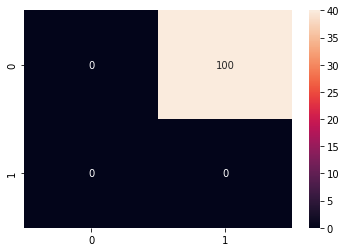

In [129]:
sns.heatmap(conf, annot=True, fmt="d", vmax=40)

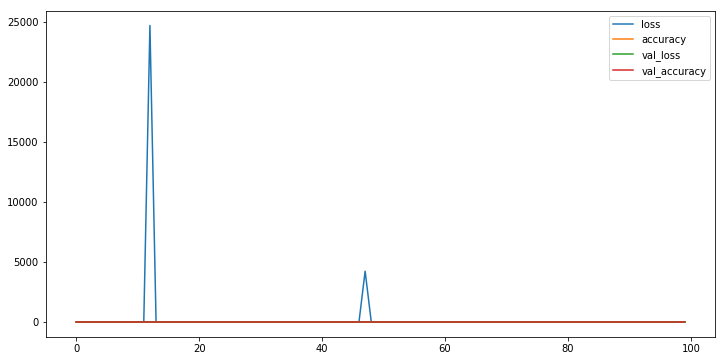

In [130]:
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()